In [1]:
%run algo.py

Loading Model...


/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Test Loss [-6.105562210083008, -6.014453411102295, -6.1024651527404785, -6.080349922180176, -6.1082444190979, -5.996319770812988, -6.154914379119873]
None


In [14]:
%run ppo.py
%run discriminator.py 
logger = Logger()
# discrim = SmallD(logger, s = 11, a = 3)
#discrim = SmallD_S(logger, s = 11)
# ppo  = PPO(logger, bc_loss = "MSE", parallel = 2000, horizon = 10)
#ppo.train_bc(e_states,e_actions, geometric = True, train_step = 1500, progress = True)
#evaluate(ppo.policy, env)
#rollout_single_ppo(ppo, model, discrim, e_states, states, logger)
# algo2(ppo, discrim, model, env, states, e_states,e_actions, logger, s_a = True)
#algo1(ppo, discrim, env, obs,acts)

#including buffer states
logger = Logger()
discrim = SmallD_S(logger, s = 11,lipschitz = 0.05, loss = 'linear')
ppo  = PPO(logger,state_dim = 17, action_dim = 6, bc_loss = "logprob", parallel = 5000, horizon = 10, geometric = True,
bc_ppo_train_step = 1)
for i in range(30):
    ppo  = PPO(logger,state_dim = 17, action_dim = 6, bc_loss = "MSE", parallel = 5000, horizon = 10, geometric = False,
    bc_ppo_train_step = 1)
    ppo.train_bc(e_states, e_actions, progress = True, train_step= 3000)
    print(evaluate(ppo.policy, env))


  0%|          | 14/3000 [00:00<00:22, 134.85it/s]

  0%|          | 14/3000 [00:00<00:21, 138.42it/s]

(61.00284342659196, 1000.0)


  0%|          | 14/3000 [00:00<00:22, 135.59it/s]

(126.84928938060186, 1000.0)


  0%|          | 15/3000 [00:00<00:20, 144.88it/s]

(-206.86401255241927, 1000.0)


  0%|          | 13/3000 [00:00<00:23, 129.55it/s]

(15.429297077934283, 1000.0)


  0%|          | 14/3000 [00:00<00:22, 134.90it/s]

(-152.67551610805293, 1000.0)


  0%|          | 14/3000 [00:00<00:22, 135.25it/s]

(-106.6837901903073, 1000.0)


  0%|          | 14/3000 [00:00<00:22, 132.58it/s]

(378.3096757486783, 1000.0)


  0%|          | 14/3000 [00:00<00:21, 139.39it/s]

(-271.1855977940721, 1000.0)


  0%|          | 14/3000 [00:00<00:21, 136.18it/s]

(-241.87133631917146, 1000.0)


  0%|          | 14/3000 [00:00<00:22, 134.70it/s]

(-152.83261809002414, 1000.0)


  0%|          | 15/3000 [00:00<00:21, 141.08it/s]

(140.28923014792807, 1000.0)


  0%|          | 14/3000 [00:00<00:23, 129.39it/s]

(768.4848643030128, 1000.0)


  0%|          | 14/3000 [00:00<00:21, 136.02it/s]

(-234.5384314791911, 1000.0)


  0%|          | 15/3000 [00:00<00:21, 140.53it/s]

(313.846787496478, 1000.0)


  0%|          | 14/3000 [00:00<00:21, 138.52it/s]

(794.7597621221836, 1000.0)


  0%|          | 14/3000 [00:00<00:22, 134.95it/s]

(157.09699600007883, 1000.0)


  0%|          | 14/3000 [00:00<00:21, 135.85it/s]

(-169.13130119528677, 1000.0)


  0%|          | 13/3000 [00:00<00:22, 129.96it/s]

(82.12015186198404, 1000.0)


  0%|          | 14/3000 [00:00<00:22, 132.91it/s]

(-146.64420507827438, 1000.0)


  0%|          | 15/3000 [00:00<00:21, 141.32it/s]

(-270.28034680994864, 1000.0)


  0%|          | 15/3000 [00:00<00:20, 142.20it/s]

(146.75081144799734, 1000.0)


  0%|          | 14/3000 [00:00<00:21, 139.13it/s]

(-298.9606377677465, 1000.0)


  0%|          | 14/3000 [00:00<00:21, 137.03it/s]

(-162.97458359064603, 1000.0)


  0%|          | 14/3000 [00:00<00:22, 134.16it/s]

(12.638108957502904, 1000.0)


  0%|          | 14/3000 [00:00<00:21, 136.02it/s]

(33.82996322600574, 1000.0)


  0%|          | 14/3000 [00:00<00:21, 138.85it/s]

(154.54914004018013, 1000.0)


  0%|          | 14/3000 [00:00<00:21, 138.14it/s]

(222.5738234516312, 1000.0)


  0%|          | 14/3000 [00:00<00:21, 136.92it/s]

(64.88822415699843, 1000.0)


  0%|          | 15/3000 [00:00<00:20, 142.31it/s]

(169.0083064784173, 1000.0)


100%|██████████| 3000/3000 [00:21<00:00, 138.19it/s]


(37.46962944291548, 1000.0)


In [10]:
ppo.logger.plot_nb()

BC loss 2.7212330136299134
bc grad 3.718507578481538


In [13]:
#what I'm curious, is that if I train a whole bunch of ensemble policies, can the 
#discriminator trained from the model catch that? 

(2000, 10, 11)

In [95]:
def check_ftrl(agents, model, discrim, states, bad_states, logger, env):
    """
    First see if the discriminator trained on these samples can spot which
    agents are good, i.e if the discriminator score corresponds to the actual 
    score 
    """
    total_states, total_actions = [],[]
    scores = []
    for i, agent in enumerate(agents):
        rollout_single_ppo(agent, model, discrim, states, bad_states, logger, env, s_a = True,
                          start_state = 'good')
        agent_states, agent_actions = (torch.FloatTensor(agent.buffer.states.reshape(-1, e_states.shape[1])),
                                 torch.FloatTensor(agent.buffer.actions.reshape(-1, e_actions.shape[1])))
        total_states.append(agent_states)
        total_actions.append(agent_actions)
        score = discrim(agent_states,agent_actions).detach()
        scores.append(score.mean().item())
        print(scores)
        agent.buffer.clear()
        
    return torch.cat(total_states,0), torch.cat(total_actions, 0), scores 


# discrims = [SmallD(logger, s = 11, a = 3, lipschitz = 0.03),
#             SmallD(logger, s=11, a=3, lipschitz = 0.1),
#             SmallD(logger, s=11, a=3, lipschitz = 0.1, loss = 'kl')]
# ppos = [PPO(logger, bc_loss = "logprob", parallel = 2000, horizon = 10) for i in range(30)]
# ppo_rewards = [[] for _ in range(30)]
# for i,ppo in enumerate(ppos):
#     ppo.train_bc(e_states,e_actions, geometric = True, train_step = 1000, progress = True)
#     for i in range(30):
#         rewards, _ = evaluate(ppo.policy, env, num_episodes = 1)
#         ppo_rewards[i].append(rewards)
        
total_discrim_scores = []
for i in range(30):
    discrim_scores = [[] for _ in range(3)]
    for j,discrim in enumerate(discrims):
        print('i')
        agent_states, agent_actions, scores = check_ftrl(ppos, model, discrim, e_states,states, logger, env)
        agent_states = torch.cat([agent_states, torch.FloatTensor(states)[np.random.permutation(states.shape[0])[:agent_states.shape[0]]]], 0)
        agent_actions = torch.cat([agent_actions, torch.FloatTensor(actions)[np.random.permutation(states.shape[0])[:agent_states.shape[0]]]], 0)
        discrim.train_discrim(e_states,e_actions, agent_states, agent_actions, num_steps = 200)
        discrim_scores[j].extend(scores)

    total_discrim_scores.append(discrim_scores)

    

i
Discrim rewards [0.15332612 0.15850666 0.15950428 0.16128695 0.16081089 0.16127218
 0.16053954 0.16179594 0.16356924 0.16532145] 1.6059333
[0.16059333086013794]
Discrim rewards [0.15944839 0.1621357  0.16478182 0.16632105 0.1668266  0.16851586
 0.16890232 0.16867022 0.16827191 0.16914108] 1.6630149
[0.16059333086013794, 0.16630150377750397]
Discrim rewards [0.15702221 0.1604024  0.16131163 0.16114646 0.16123138 0.16111892
 0.16114518 0.16120037 0.16167496 0.16316032] 1.6094139
[0.16059333086013794, 0.16630150377750397, 0.16094136238098145]
Discrim rewards [0.16204116 0.16475311 0.16715954 0.16752817 0.16885373 0.16725601
 0.16805598 0.16789624 0.16783954 0.16855945] 1.6699429
[0.16059333086013794, 0.16630150377750397, 0.16094136238098145, 0.16699428856372833]
Discrim rewards [0.15444632 0.15903269 0.1630336  0.16323186 0.16198868 0.16219248
 0.16087021 0.16149294 0.16167842 0.16263339] 1.6106006
[0.16059333086013794, 0.16630150377750397, 0.16094136238098145, 0.16699428856372833, 0.16

Discrim rewards [0.16111115 0.16250099 0.16334817 0.16508557 0.16482738 0.16754031
 0.1676458  0.16854753 0.16933991 0.170003  ] 1.6599497
[0.16059333086013794, 0.16630150377750397, 0.16094136238098145, 0.16699428856372833, 0.16106006503105164, 0.1673787385225296, 0.16448909044265747, 0.15950119495391846, 0.16358515620231628, 0.15964019298553467, 0.16555523872375488, 0.1613442450761795, 0.15835930407047272, 0.16239826381206512, 0.1652698665857315, 0.16272465884685516, 0.16663120687007904, 0.16272956132888794, 0.16161593794822693, 0.16027666628360748, 0.16663216054439545, 0.16673964262008667, 0.16599497199058533]
Discrim rewards [0.16467714 0.16736576 0.16959539 0.1703953  0.17048816 0.1691629
 0.16793017 0.1664296  0.16665387 0.16745542] 1.6801536
[0.16059333086013794, 0.16630150377750397, 0.16094136238098145, 0.16699428856372833, 0.16106006503105164, 0.1673787385225296, 0.16448909044265747, 0.15950119495391846, 0.16358515620231628, 0.15964019298553467, 0.16555523872375488, 0.161344245

Discrim rewards [0.35328406 0.35861903 0.37019536 0.37738886 0.37198973 0.37423277
 0.3652798  0.36499444 0.35997358 0.3522778 ] 3.6482353
[0.3923005163669586, 0.39451268315315247, 0.3708685040473938, 0.38602715730667114, 0.37707647681236267, 0.38419994711875916, 0.3773670196533203, 0.3866778016090393, 0.36669498682022095, 0.3621847629547119, 0.3846757709980011, 0.3648235499858856]
Discrim rewards [0.35850567 0.37345973 0.37568188 0.38257277 0.37893608 0.37762877
 0.38140643 0.37966028 0.38032553 0.38028312] 3.7684605
[0.3923005163669586, 0.39451268315315247, 0.3708685040473938, 0.38602715730667114, 0.37707647681236267, 0.38419994711875916, 0.3773670196533203, 0.3866778016090393, 0.36669498682022095, 0.3621847629547119, 0.3846757709980011, 0.3648235499858856, 0.37684598565101624]
Discrim rewards [0.363593   0.3771444  0.38217738 0.37937474 0.3880547  0.38278678
 0.37977684 0.3768755  0.37256885 0.375439  ] 3.7777913
[0.3923005163669586, 0.39451268315315247, 0.3708685040473938, 0.386027

Discrim rewards [0.3593061  0.36476898 0.37635925 0.38382265 0.38598302 0.38343474
 0.38252208 0.37994716 0.37899268 0.38201606] 3.7771528
[0.3923005163669586, 0.39451268315315247, 0.3708685040473938, 0.38602715730667114, 0.37707647681236267, 0.38419994711875916, 0.3773670196533203, 0.3866778016090393, 0.36669498682022095, 0.3621847629547119, 0.3846757709980011, 0.3648235499858856, 0.37684598565101624, 0.377779096364975, 0.3804830014705658, 0.3531889021396637, 0.37636294960975647, 0.3793605864048004, 0.3712642192840576, 0.38024553656578064, 0.3865669071674347, 0.3975084722042084, 0.37771669030189514, 0.3619632124900818, 0.3732762634754181, 0.3688875436782837, 0.3732776343822479, 0.3777152895927429]
Discrim rewards [0.36326054 0.36456996 0.3728208  0.3793958  0.3804088  0.36981103
 0.37179404 0.36815995 0.3617871  0.3602599 ] 3.6922681
[0.3923005163669586, 0.39451268315315247, 0.3708685040473938, 0.38602715730667114, 0.37707647681236267, 0.38419994711875916, 0.3773670196533203, 0.386677

Discrim rewards [0.45645916 0.46695352 0.4719223  0.47922483 0.4833964  0.48151293
 0.48494932 0.48679042 0.48891437 0.49210364] 4.7922273
[0.4894261658191681, 0.49730154871940613, 0.4891429543495178, 0.5059756636619568, 0.47629112005233765, 0.48061689734458923, 0.4891372621059418, 0.49595019221305847, 0.4894099533557892, 0.47963276505470276, 0.49612554907798767, 0.49031317234039307, 0.49312978982925415, 0.5011152625083923, 0.5002476572990417, 0.47729307413101196, 0.49023011326789856, 0.5002945065498352, 0.47922271490097046]
Discrim rewards [0.45695123 0.46943974 0.47439355 0.48065117 0.48283812 0.48528746
 0.48319122 0.4858678  0.48575255 0.4855103 ] 4.7898836
[0.4894261658191681, 0.49730154871940613, 0.4891429543495178, 0.5059756636619568, 0.47629112005233765, 0.48061689734458923, 0.4891372621059418, 0.49595019221305847, 0.4894099533557892, 0.47963276505470276, 0.49612554907798767, 0.49031317234039307, 0.49312978982925415, 0.5011152625083923, 0.5002476572990417, 0.47729307413101196, 

Discrim rewards [0.15423147 0.15677445 0.15864484 0.16002116 0.16045037 0.15951592
 0.16011898 0.16046594 0.160611   0.1624414 ] 1.5932755
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655]
Discrim rewards [0.15096195 0.15527454 0.15658447 0.15850018 0.15964563 0.1588154
 0.15946914 0.15787058 0.15901266 0.15878859] 1.5749233
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655, 0.15749232470989227]
Discrim rewards [0.15254171 0.15330969 0.15640864 0.15567172 0.15727001 0.15725198
 0.15624875 0.15757908 0.15742901 0.1579667 ] 1.5616773
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655, 0.15749232470989227, 0.15616773068904877]
Discrim rewards [0.1517193  0.15462115 0.15580907 0.1558306  0.1564079  0.1571885
 0.15662283 0.15699558 0.15845126 0.15937439] 1.5630205
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655, 0.15749232470989227, 0.15616773068904877, 0

Discrim rewards [0.15996814 0.16263026 0.16298349 0.16484317 0.16441438 0.1627392
 0.16339602 0.16394244 0.16480738 0.16401306] 1.6337376
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655, 0.15749232470989227, 0.15616773068904877, 0.1563020795583725, 0.15915244817733765, 0.15846405923366547, 0.1547895073890686, 0.15584684908390045, 0.1590273231267929, 0.15706536173820496, 0.15355154871940613, 0.15847650170326233, 0.15786638855934143, 0.15856632590293884, 0.15353438258171082, 0.15474732220172882, 0.1568584442138672, 0.15957975387573242, 0.15795770287513733, 0.15713907778263092, 0.16337375342845917]
Discrim rewards [0.1595283  0.16211073 0.16360544 0.16595823 0.16419484 0.16446242
 0.16239105 0.16323844 0.16398424 0.16336598] 1.6328396
[0.15776781737804413, 0.15976972877979279, 0.15877151489257812, 0.15932755172252655, 0.15749232470989227, 0.15616773068904877, 0.1563020795583725, 0.15915244817733765, 0.15846405923366547, 0.1547895073890686, 0.15584684908

KeyboardInterrupt: 

In [10]:
np.stack([env.observation_space.sample() for _ in range(100)])

array([[-0.41878785,  1.07735865, -0.94031897, ..., -0.33435156,
         0.26362485, -0.71386033],
       [-0.25035573, -0.71796565,  0.93456789, ...,  0.33080664,
         1.27003101,  1.28050986],
       [ 0.32889653, -0.00591588, -0.81043539, ..., -0.68430285,
        -0.23412421, -1.6308814 ],
       ...,
       [ 0.97730129, -0.64500382,  1.08659879, ...,  0.67841266,
         0.46013114,  1.28207842],
       [-0.1551579 , -1.34103328,  0.69573349, ..., -1.83824571,
        -0.89875746, -0.4466963 ],
       [ 0.62860011, -0.94320105,  0.89467916, ..., -0.10614817,
        -0.06658874,  1.22801038]])

model logprobs 38.236042
model loss -6.488696022132465
model loss std 0.8184461935326264
rollout 0 rew 0.6664468848482881
state mean 0.28711443767100125
state std 2.298929955454095
rollout 1 rew 0.720721646953995
rollout 2 rew 0.7809185324417122
rollout 3 rew 0.834858573754677
rollout 4 rew 0.8761037964992235
rollout 5 rew 0.9054816642374571
rollout 6 rew 0.9255959709350039
rollout 7 rew 0.9391873688391934
rollout 8 rew 0.9482691408965881
rollout 9 rew 0.9535485769869992
avg total rewards -0.20704748
discrim loss -0.12400614784111094
escore 0.09898704796291422
lscore -0.025019099888224445
ppo grad 0.49765686001441684
advantages 0.00015648320589084505
advantages max 2.506207221579552
mseloss 0.06930223151296377
training logprobs -2.739514000463486
state_values -0.00015648357603204204
policy ratio 0.9999480768382549
BC loss 8.428490376432737


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


bc grad 3.3137923860659977
real reward 448.0211344327959


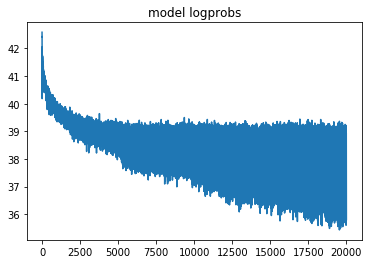

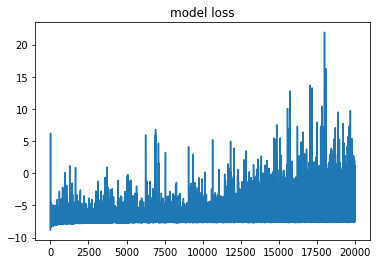

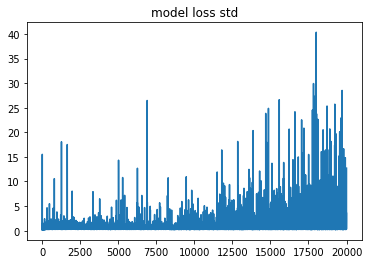

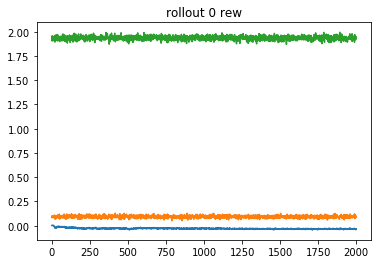

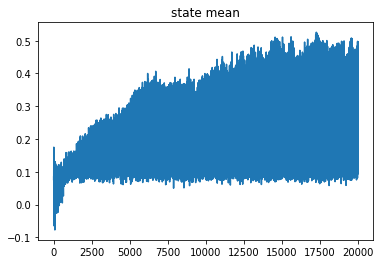

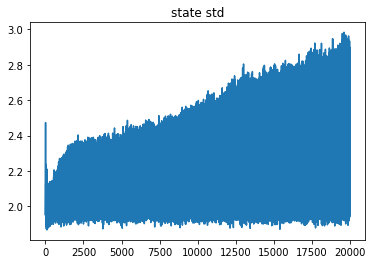

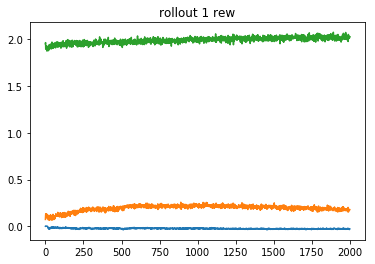

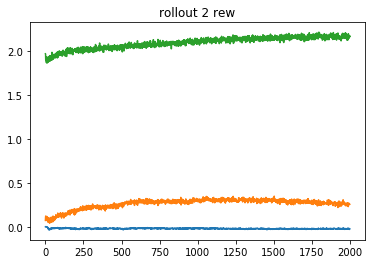

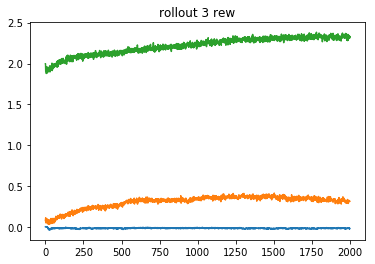

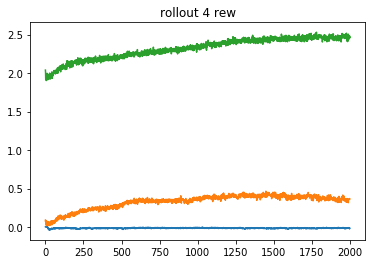

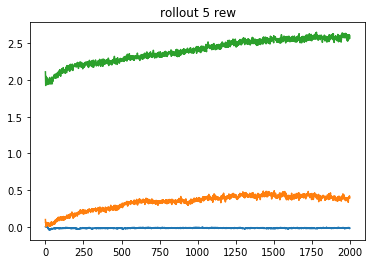

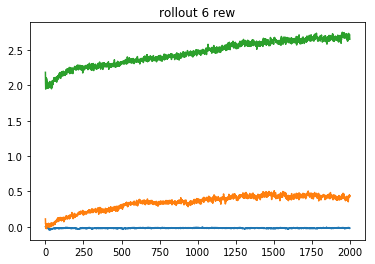

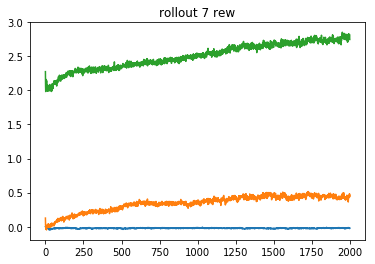

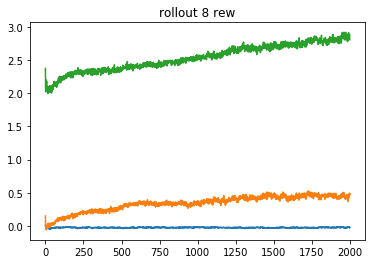

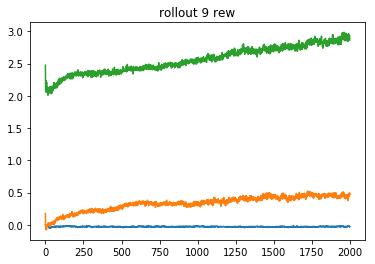

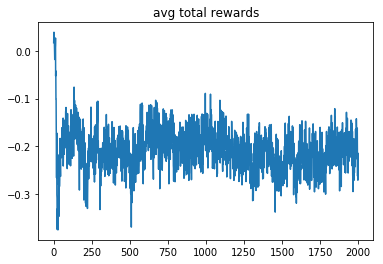

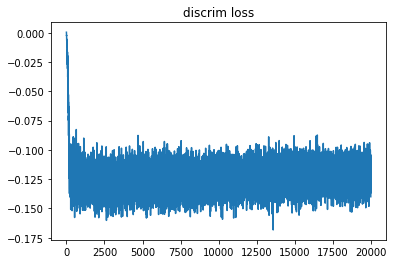

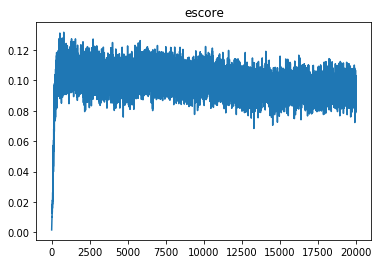

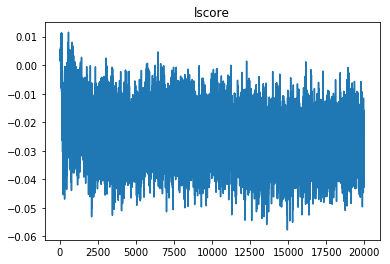

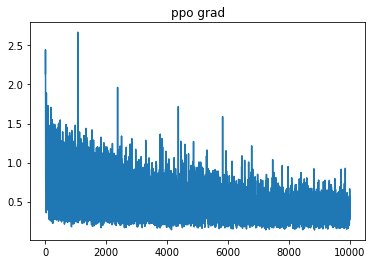

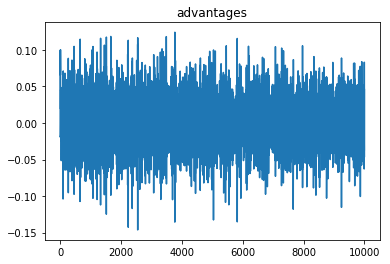

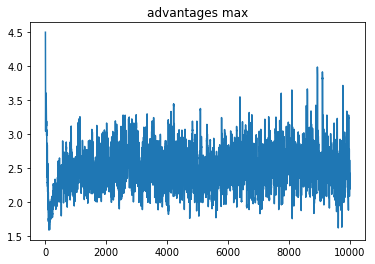

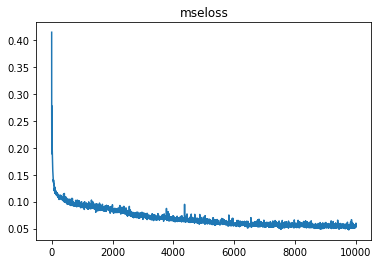

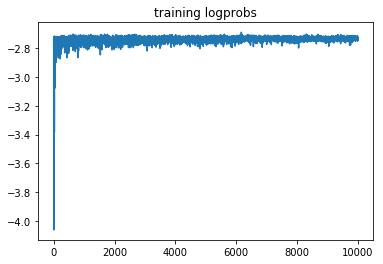

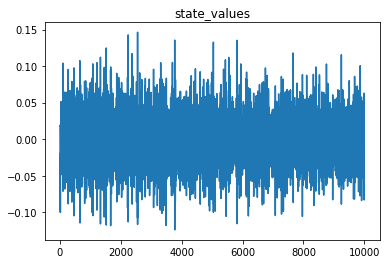

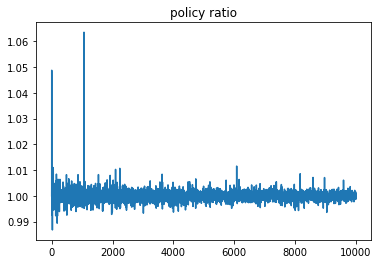

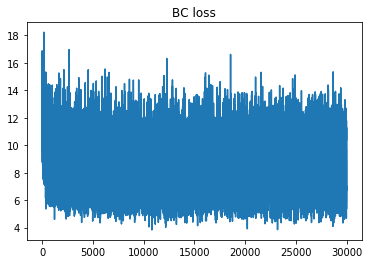

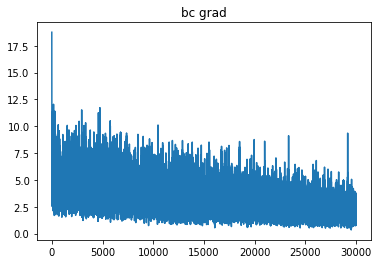

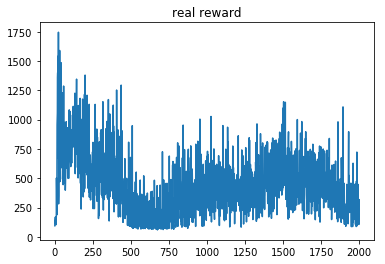

In [5]:
import matplotlib
matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt 
%matplotlib inline

for k,v in ppo.logger.dict.items():
    print(k, np.asarray(v).mean())
    plt.figure()
    plt.title(k)
    plt.plot(v)
    plt.title(k)

    #plt.show()

In [37]:
def get_expert2():
    trajs = pickle.load(open('data/hcexpert2.pkl', 'rb'))
    states, actions = [],[]
    for traj in trajs:
        traj = np.asarray(traj)
        states.append(np.stack(traj[:,0]).astype('float'))
        actions.append(np.stack(traj[:,1]).astype('float'))
    return np.vstack(states), np.vstack(actions)
#     return_next_states = True
#     if return_next_states:

#         traj_states, traj_actions = states, actions
#         states_, actions_, next_states_, next_actions_ = [],[],[], []
#         for states, actions in zip(traj_states, traj_actions):
#             next_states = np.copy(states[1:])
#             next_actions = np.copy(actions[1:])
#             states = states[:-1]
#             actions = actions[:-1]
#             rand = np.random.randint(len(states))
#             assert len(states) == len(next_states) == len(actions)

#             states_.append(states)
#             actions_.append(actions)
#             next_states_.append(next_states)
#             next_actions_.append(next_actions)
  

#     states, actions, next_states, next_actions = (np.vstack(states_), np.vstack(actions_),
#                              np.vstack(next_states_), np.vstack(next_actions_))
#     return states, actions, next_states, next_actions

#e_states2, e_actions2, e_next_states2, _ = get_expert2()
%run algo.py
e_states2, e_actions2 = get_expert2()
class Small_BC(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Linear(17,256),
        nn.ReLU(), nn.Linear(256,256), nn.ReLU(), nn.Linear(256,6)
        )
        self.optim = torch.optim.Adam(self.parameters())
    def forward(self, x):
        if not isinstance(x, torch.Tensor):
            x = torch.FloatTensor(x)
            
        return self.net(x), {},{}
    
    def train_bc(self, e_states, e_actions):
        e_states,e_actions = torch.FloatTensor(e_states), torch.FloatTensor(e_actions)
        from tqdm import trange
        for i in trange(1500):
            idxs = np.random.permutation(e_states.shape[0])[:256]
            es,ea = e_states[idxs], e_actions[idxs]
            out,_,_ = self(es)
            loss = nn.MSELoss()(out, ea)
            
            self.optim.zero_grad()
            loss.backward()
            self.optim.step()
for i in range(10):
    smallbc = Small_BC()
    env = gym.make('HalfCheetah-v2')

    smallbc.train_bc(e_states2[-1000:], e_actions2[-1000:])
    print(evaluate(smallbc, env))

  3%|▎         | 43/1500 [00:00<00:03, 423.05it/s]

(1003.1321257787919, 1000.0, array([ 0.4538295 ,  0.34966436, -0.18373965, ..., -0.71271896,
       -0.16050377, -0.55152386], dtype=float32))


  3%|▎         | 43/1500 [00:00<00:03, 422.11it/s]

(1378.0361615989555, 1000.0, array([ 0.2289488 ,  0.30573848, -0.19964045, ..., -0.12719053,
       -0.13092484, -0.25008565], dtype=float32))


  3%|▎         | 43/1500 [00:00<00:03, 423.55it/s]

(803.6109432487699, 1000.0, array([ 0.16637835,  0.10686165, -0.30077958, ...,  2.1970558 ,
       -0.49211654, -0.02375871], dtype=float32))


  3%|▎         | 42/1500 [00:00<00:03, 416.44it/s]

(2208.3105291472148, 1000.0, array([ 0.33218104,  0.18269533, -0.15720573, ...,  0.34022662,
       -0.5340542 , -0.20975576], dtype=float32))


  3%|▎         | 44/1500 [00:00<00:03, 431.00it/s]

(2602.1121874609516, 1000.0, array([ 0.7337252 ,  0.32863024, -0.32827276, ..., -0.6507997 ,
       -1.0632918 ,  0.1757476 ], dtype=float32))


  3%|▎         | 43/1500 [00:00<00:03, 426.20it/s]

(1028.1537512437942, 1000.0, array([ 0.5156232 ,  0.15977676, -0.31616426, ...,  0.56947184,
       -0.6541383 , -0.7502668 ], dtype=float32))


  3%|▎         | 44/1500 [00:00<00:03, 431.27it/s]

(967.9699926485421, 1000.0, array([ 0.21160437,  0.12446896, -0.3279696 , ...,  2.0612175 ,
       -0.78517514, -0.29132193], dtype=float32))


  3%|▎         | 44/1500 [00:00<00:03, 431.64it/s]

(2006.3547303753428, 1000.0, array([ 0.2754734 ,  0.11065489, -0.15768766, ..., -1.1643956 ,
        0.10621   , -0.6113017 ], dtype=float32))


  3%|▎         | 42/1500 [00:00<00:03, 415.07it/s]

(1265.5451795155045, 1000.0, array([ 0.12743433,  0.14011429, -0.14874634, ..., -0.59119684,
        0.24553142, -0.39915982], dtype=float32))


100%|██████████| 1500/1500 [00:03<00:00, 416.94it/s]


(1470.0121335343183, 1000.0, array([ 0.30011415,  0.08456974, -0.12290633, ...,  1.1110893 ,
        0.36526898,  0.5376041 ], dtype=float32))


In [29]:
evaluate(smallbc, env, num_episodes = 2, render = True)

Creating window glfw
Creating window glfw


(2335.7017672450193,
 1000.0,
 array([ 0.44486994,  0.22853416, -0.21533336, ...,  1.5212777 ,
        -1.3166983 , -0.9136809 ], dtype=float32))

In [40]:

%run actor
%run ppo 
%run utils
logger = Logger()
env = gym.make('HalfCheetah-v2')
# for i in range(1):
#     actor = Actor(None, logger,17,256,6)
#     actor.train_bc(e_states2, e_actions2, num_steps = 1500)
#     print(evaluate(actor, env))
    
for i in range(10):
    ppo = PPO(logger, state_dim = 17, action_dim = 6, bc_loss = 'MSE')
    ppo.train_bc(e_states2[-1000:], e_actions2[-1000:], train_step = 1500, progress = True)
    print(evaluate(ppo.policy, env, num_episodes = 10, render = False))
    

  2%|▏         | 31/1500 [00:00<00:04, 303.00it/s]

  2%|▏         | 32/1500 [00:00<00:04, 318.04it/s]

(500.9946304313453, 1000.0, array([ 0.14248917,  0.16265762, -0.02578609, ...,  0.546533  ,
       -0.09364428, -0.15319419], dtype=float32))


  2%|▏         | 33/1500 [00:00<00:04, 326.23it/s]

(610.227311197956, 1000.0, array([ 0.18578754,  0.05896232, -0.0974854 , ...,  0.6894397 ,
        0.09419289,  0.076978  ], dtype=float32))


  2%|▏         | 32/1500 [00:00<00:04, 312.57it/s]

(353.1109901710937, 1000.0, array([ 0.09789839, -0.19707836,  0.00638396, ...,  0.6556062 ,
       -0.13655697, -0.322016  ], dtype=float32))


  2%|▏         | 33/1500 [00:00<00:04, 325.88it/s]

(751.5178606540054, 1000.0, array([ 0.21112476,  0.09513222, -0.03002396, ...,  0.6208841 ,
       -0.0227431 ,  0.01219033], dtype=float32))


  2%|▏         | 33/1500 [00:00<00:04, 328.32it/s]

(456.4747219339174, 1000.0, array([ 0.04031295, -0.12660922,  0.00967476, ...,  0.30151626,
       -0.11993501, -0.40024242], dtype=float32))


  2%|▏         | 34/1500 [00:00<00:04, 330.15it/s]

(419.14037300997404, 1000.0, array([ 0.14255604,  0.15554199, -0.11659765, ...,  0.69186616,
       -0.09878734, -0.09374389], dtype=float32))


  2%|▏         | 33/1500 [00:00<00:04, 325.76it/s]

(304.74538819966057, 1000.0, array([ 0.08851904, -0.11924739, -0.0140833 , ...,  0.40741107,
       -0.39450845, -0.30298388], dtype=float32))


  2%|▏         | 31/1500 [00:00<00:04, 305.41it/s]

(270.31959008593486, 1000.0, array([ 0.16017798,  0.16967568, -0.04163185, ...,  0.40901688,
       -0.6151632 , -0.50779545], dtype=float32))


  2%|▏         | 31/1500 [00:00<00:04, 301.57it/s]

(292.3248176034217, 1000.0, array([ 0.09571683, -0.08199367,  0.02123204, ...,  0.51888114,
       -0.3016267 , -0.39851382], dtype=float32))


100%|██████████| 1500/1500 [00:04<00:00, 318.71it/s]


(435.955999377224, 1000.0, array([ 0.14628178, -0.14203474,  0.01933319, ...,  0.26652247,
       -0.05171752, -0.2435316 ], dtype=float32))


In [43]:
%run ppo 

for i in range(10):
    ppo = PPO(logger, state_dim = 17, action_dim = 6, bc_loss = 'MSE')
    ppo.train_bc(e_states2[-1000:], e_actions2[-1000:], train_step = 1500, progress = True)
    print(evaluate(ppo.policy, env, num_episodes = 10, render = False))
    

  2%|▏         | 31/1500 [00:00<00:04, 308.19it/s]

  2%|▏         | 33/1500 [00:00<00:04, 323.05it/s]

(896.0013860612128, 1000.0, array([ 0.03634419, -0.15390135, -0.01447252, ..., -0.06423803,
       -0.24186264, -0.11850762], dtype=float32))


  2%|▏         | 32/1500 [00:00<00:04, 318.39it/s]

(913.4505889881253, 1000.0, array([ 0.07411689, -0.10558593, -0.04711035, ...,  0.08765066,
        0.474993  ,  0.17392091], dtype=float32))


  2%|▏         | 33/1500 [00:00<00:04, 328.74it/s]

(1243.0086193444629, 1000.0, array([ 0.22052501, -0.01527103, -0.08329798, ...,  0.3716005 ,
        0.04352948, -0.02079269], dtype=float32))


  2%|▏         | 34/1500 [00:00<00:04, 331.23it/s]

(1843.105295421568, 1000.0, array([ 0.02304472, -0.05688396, -0.09821086, ...,  0.21122918,
       -0.1698935 , -0.07542432], dtype=float32))


  2%|▏         | 32/1500 [00:00<00:04, 315.07it/s]

(1544.8434698845892, 1000.0, array([ 0.16412103, -0.12140024, -0.13464823, ...,  0.22661842,
       -0.01138999, -0.12469341], dtype=float32))


  2%|▏         | 34/1500 [00:00<00:04, 330.91it/s]

(1451.795933558931, 1000.0, array([ 0.18726434, -0.00270779, -0.04088304, ..., -0.10436504,
       -0.08978541, -0.05469223], dtype=float32))


  2%|▏         | 33/1500 [00:00<00:04, 327.36it/s]

(868.7045640863926, 1000.0, array([ 0.08798514,  0.02219591, -0.13652024, ...,  0.8296182 ,
       -0.04213038, -0.18884292], dtype=float32))


  2%|▏         | 33/1500 [00:00<00:04, 323.10it/s]

(1276.2038468624917, 1000.0, array([ 0.09427648, -0.04325111, -0.0167282 , ...,  0.08257567,
       -0.10452515, -0.08088794], dtype=float32))


  2%|▏         | 33/1500 [00:00<00:04, 323.54it/s]

(214.57093145571088, 1000.0, array([ 0.0600335 , -0.00233622, -0.09303989, ...,  0.09911317,
       -0.03951915,  0.09639789], dtype=float32))


100%|██████████| 1500/1500 [00:04<00:00, 329.90it/s]


(1083.0634101459232, 1000.0, array([ 0.10953073, -0.04221091, -0.04998159, ..., -0.56209654,
        0.00066738, -0.5428055 ], dtype=float32))


In [23]:
r,_, bad_actions2 = evaluate(actor, env, num_episodes = 2, render = False, stats = 'no')
r

-906.4707788670619

In [30]:
r,_, good_actions2 = evaluate(ppo.policy, env, num_episodes =2, render = False)
r

66.97250074268851

In [16]:
print(bad_actions.reshape(-1,6).mean(0).mean(), bad_actions.reshape(-1,6).std(0))
good_actions.reshape(-1,6).mean(0).mean(), good_actions.reshape(-1,6).std(0)

0.040459424 [0.03130637 0.04015006 0.03328409 0.04372695 0.04874314 0.04618758]


(0.063060574,
 array([0.7078632 , 0.5701544 , 0.67459667, 0.5767816 , 0.5689708 ,
        0.5247075 ], dtype=float32))

In [25]:
print(bad_actions2.reshape(-1,6).mean(0).mean(), bad_actions2.reshape(-1,6).std(0))
good_actions2.reshape(-1,6).mean(0).mean(), good_actions2.reshape(-1,6).std(0)

-0.07088276 [1.7613535  0.8948259  1.3832432  0.885082   0.96161056 0.8732421 ]


(0.08161659,
 array([0.9136293 , 0.8220333 , 0.93546665, 0.8152398 , 0.84807694,
        0.824223  ], dtype=float32))

BC loss 3.40088939277331


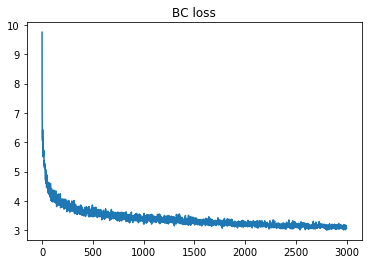

bc grad 6.064442648804599


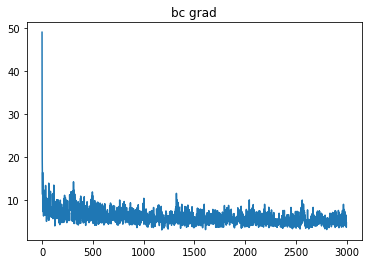

In [90]:
%matplotlib inline

ppo.logger.plot_nb()

In [17]:
def collect_random_rollouts(env_name = 'HalfCheetah-v2'):
    env = gym.make(env_name)
    state = env.reset()
    states, actions, next_states = [],[],[]
    for i in range(100000):
        action = env.action_space.sample()
        next_state,reward,done,_= env.step(action)
        states.append(state)
        actions.append(action)
        next_states.append(next_state)
        
        state = next_state 
        
        if done:
            state = env.reset()
            
    return np.stack(states), np.stack(actions), np.stack(next_states)

r_states,r_actions,r_next_states = collect_random_rollouts()
        

In [14]:
buffer = get_data(env_name = 'HalfCheetah-v2')
states, actions,_, next_states, _ = buffer.sample(len(buffer))
states, 


In [7]:
play_model = Ensemble_Model(state_size = 17, action_size = 6, logger = logger)

In [16]:
inputs = np.concatenate((states, actions), axis = -1)
labels = next_states- states
play_model.train(inputs[3000:4000], labels[3000:4000])


100%|██████████| 8/8 [00:00<00:00, 40.67it/s]

input/holdouts tensor(-5.5867e-09) tensor(-0.0040) tensor(0.9995) tensor(0.9940)
num_holdout, inputshape, holdoutshape 50 950 50



100%|██████████| 8/8 [00:00<00:00, 40.73it/s]

epoch0 Train sample Loss, Val sample Loss, Live Train Loss:  [20.43628692626953, 18.232812881469727, 16.593820571899414, 19.539443969726562, 17.31911849975586, 18.62893295288086, 19.88726806640625] [20.441701889038086, 19.160194396972656, 16.823009490966797, 19.791805267333984, 18.067609786987305, 19.032920837402344, 19.68848419189453] [24.669087886810303, 24.16979742050171, 19.199748039245605, 24.821045875549316, 22.455771684646606, 22.47944164276123, 23.552361488342285]
Updated, epochs_since_update True 0 {0: (0, 20.441701889038086), 1: (0, 19.160194396972656), 2: (0, 16.823009490966797), 3: (0, 19.791805267333984), 4: (0, 18.067609786987305), 5: (0, 19.032920837402344), 6: (0, 19.68848419189453)}



100%|██████████| 8/8 [00:00<00:00, 40.33it/s]

epoch1 Train sample Loss, Val sample Loss, Live Train Loss:  [17.111690521240234, 15.176511764526367, 14.06741714477539, 16.23114776611328, 14.479547500610352, 15.95083236694336, 16.61895179748535] [17.263164520263672, 15.982535362243652, 14.441847801208496, 16.467363357543945, 14.886141777038574, 16.42293930053711, 16.688175201416016] [18.344906330108643, 16.777392268180847, 16.08476710319519, 17.674440383911133, 15.862324118614197, 17.689231157302856, 18.16758644580841]
Updated, epochs_since_update True 0 {0: (1, 17.263164520263672), 1: (1, 15.982535362243652), 2: (1, 14.441847801208496), 3: (1, 16.467363357543945), 4: (1, 14.886141777038574), 5: (1, 16.42293930053711), 6: (1, 16.688175201416016)}



100%|██████████| 8/8 [00:00<00:00, 40.59it/s]

epoch2 Train sample Loss, Val sample Loss, Live Train Loss:  [15.27481460571289, 13.055479049682617, 12.118947982788086, 14.531037330627441, 12.3635835647583, 13.944184303283691, 14.999686241149902] [15.461675643920898, 13.671916007995605, 12.458046913146973, 14.692272186279297, 12.694331169128418, 14.329710960388184, 15.19474983215332] [16.330185770988464, 14.40498673915863, 12.919163703918457, 15.899470925331116, 13.400966048240662, 15.089651346206665, 15.573631644248962]
Updated, epochs_since_update True 0 {0: (2, 15.461675643920898), 1: (2, 13.671916007995605), 2: (2, 12.458046913146973), 3: (2, 14.692272186279297), 4: (2, 12.694331169128418), 5: (2, 14.329710960388184), 6: (2, 15.19474983215332)}



100%|██████████| 8/8 [00:00<00:00, 40.40it/s]

epoch3 Train sample Loss, Val sample Loss, Live Train Loss:  [13.989891052246094, 11.715241432189941, 10.836648941040039, 13.34256362915039, 10.975159645080566, 12.55765438079834, 13.859468460083008] [14.186531066894531, 12.250983238220215, 11.161510467529297, 13.484098434448242, 11.311630249023438, 12.898765563964844, 14.109880447387695] [14.779690384864807, 12.283709526062012, 11.656500101089478, 14.306253552436829, 11.96050214767456, 13.525664925575256, 14.397788405418396]
Updated, epochs_since_update True 0 {0: (3, 14.186531066894531), 1: (3, 12.250983238220215), 2: (3, 11.161510467529297), 3: (3, 13.484098434448242), 4: (3, 11.311630249023438), 5: (3, 12.898765563964844), 6: (3, 14.109880447387695)}



100%|██████████| 8/8 [00:00<00:00, 40.55it/s]

epoch4 Train sample Loss, Val sample Loss, Live Train Loss:  [13.012312889099121, 10.756119728088379, 9.880942344665527, 12.401510238647461, 10.022720336914062, 11.580547332763672, 12.901204109191895] [13.225330352783203, 11.270737648010254, 10.209057807922363, 12.557779312133789, 10.361067771911621, 11.924537658691406, 13.181386947631836] [13.322455883026123, 11.147391080856323, 10.449330806732178, 12.960205674171448, 10.495375752449036, 12.16871690750122, 13.50713849067688]
Updated, epochs_since_update True 0 {0: (4, 13.225330352783203), 1: (4, 11.270737648010254), 2: (4, 10.209057807922363), 3: (4, 12.557779312133789), 4: (4, 10.361067771911621), 5: (4, 11.924537658691406), 6: (4, 13.181386947631836)}



 50%|█████     | 4/8 [00:00<00:00, 38.86it/s]

epoch5 Train sample Loss, Val sample Loss, Live Train Loss:  [12.261698722839355, 10.029136657714844, 9.171334266662598, 11.642175674438477, 9.323956489562988, 10.850285530090332, 12.128904342651367] [12.462969779968262, 10.543339729309082, 9.495453834533691, 11.82591438293457, 9.66841983795166, 11.212871551513672, 12.407660484313965] [12.882601618766785, 10.502451658248901, 9.509357690811157, 12.268541097640991, 9.75310504436493, 11.1782888174057, 13.00426435470581]
Updated, epochs_since_update True 0 {0: (5, 12.462969779968262), 1: (5, 10.543339729309082), 2: (5, 9.495453834533691), 3: (5, 11.82591438293457), 4: (5, 9.66841983795166), 5: (5, 11.212871551513672), 6: (5, 12.407660484313965)}


100%|██████████| 8/8 [00:00<00:00, 39.69it/s]

epoch6 Train sample Loss, Val sample Loss, Live Train Loss:  [11.674299240112305, 9.4698486328125, 8.639759063720703, 11.02616024017334, 8.787402153015137, 10.273463249206543, 11.515151977539062] [11.867061614990234, 9.974270820617676, 8.955728530883789, 11.20501708984375, 9.129897117614746, 10.624981880187988, 11.776334762573242] [11.96914267539978, 9.39102554321289, 8.583522379398346, 11.662251591682434, 8.961638927459717, 10.473170399665833, 12.10484755039215]
Updated, epochs_since_update True 0 {0: (6, 11.867061614990234), 1: (6, 9.974270820617676), 2: (6, 8.955728530883789), 3: (6, 11.20501708984375), 4: (6, 9.129897117614746), 5: (6, 10.624981880187988), 6: (6, 11.776334762573242)}



100%|██████████| 8/8 [00:00<00:00, 40.76it/s]

epoch7 Train sample Loss, Val sample Loss, Live Train Loss:  [11.203423500061035, 9.02085018157959, 8.222036361694336, 10.517998695373535, 8.356054306030273, 9.799580574035645, 11.021939277648926] [11.379859924316406, 9.522843360900879, 8.522146224975586, 10.684226989746094, 8.697676658630371, 10.135725021362305, 11.26083755493164] [11.452928185462952, 9.146284759044647, 8.249354064464569, 11.046070575714111, 8.464686214923859, 9.84906542301178, 10.959349989891052]
Updated, epochs_since_update True 0 {0: (7, 11.379859924316406), 1: (7, 9.522843360900879), 2: (7, 8.522146224975586), 3: (7, 10.684226989746094), 4: (7, 8.697676658630371), 5: (7, 10.135725021362305), 6: (7, 11.26083755493164)}



100%|██████████| 8/8 [00:00<00:00, 40.70it/s]

epoch8 Train sample Loss, Val sample Loss, Live Train Loss:  [10.804841995239258, 8.6515531539917, 7.873466491699219, 10.08792781829834, 7.997097015380859, 9.396016120910645, 10.616297721862793] [10.962387084960938, 9.150125503540039, 8.157254219055176, 10.243157386779785, 8.334952354431152, 9.721426010131836, 10.831684112548828] [10.881006717681885, 9.037055850028992, 7.935146689414978, 10.551717758178711, 8.208220481872559, 9.589442372322083, 11.18733024597168]
Updated, epochs_since_update True 0 {0: (8, 10.962387084960938), 1: (8, 9.150125503540039), 2: (8, 8.157254219055176), 3: (8, 10.243157386779785), 4: (8, 8.334952354431152), 5: (8, 9.721426010131836), 6: (8, 10.831684112548828)}



 50%|█████     | 4/8 [00:00<00:00, 38.45it/s]

epoch9 Train sample Loss, Val sample Loss, Live Train Loss:  [10.454560279846191, 8.32760238647461, 7.5712714195251465, 9.711623191833496, 7.682766437530518, 9.048088073730469, 10.266535758972168] [10.592598915100098, 8.817012786865234, 7.846452236175537, 9.854238510131836, 8.012137413024902, 9.356464385986328, 10.465923309326172] [10.496309638023376, 8.596305012702942, 7.6066306829452515, 9.88363516330719, 7.864600658416748, 9.188250660896301, 10.18668532371521]
Updated, epochs_since_update True 0 {0: (9, 10.592598915100098), 1: (9, 8.817012786865234), 2: (9, 7.846452236175537), 3: (9, 9.854238510131836), 4: (9, 8.012137413024902), 5: (9, 9.356464385986328), 6: (9, 10.465923309326172)}


100%|██████████| 8/8 [00:00<00:00, 40.41it/s]

epoch10 Train sample Loss, Val sample Loss, Live Train Loss:  [10.141622543334961, 8.036956787109375, 7.301111221313477, 9.387517929077148, 7.402629852294922, 8.733780860900879, 9.965911865234375] [10.264633178710938, 8.5211181640625, 7.569952011108398, 9.520359992980957, 7.730348587036133, 9.020317077636719, 10.153465270996094] [10.114173650741577, 7.936517655849457, 7.41568648815155, 9.465384364128113, 7.358887016773224, 8.946251630783081, 9.783222079277039]
Updated, epochs_since_update True 0 {0: (10, 10.264633178710938), 1: (10, 8.5211181640625), 2: (10, 7.569952011108398), 3: (10, 9.520359992980957), 4: (10, 7.730348587036133), 5: (10, 9.020317077636719), 6: (10, 10.153465270996094)}



100%|██████████| 8/8 [00:00<00:00, 40.75it/s]

epoch11 Train sample Loss, Val sample Loss, Live Train Loss:  [9.848065376281738, 7.7728071212768555, 7.057199001312256, 9.102560043334961, 7.1471967697143555, 8.452285766601562, 9.694214820861816] [9.959785461425781, 8.260335922241211, 7.312375068664551, 9.2303466796875, 7.475384712219238, 8.721688270568848, 9.870817184448242] [10.34915006160736, 7.992887437343597, 7.420171856880188, 9.096279382705688, 7.499015808105469, 8.524310231208801, 9.75505781173706]
Updated, epochs_since_update True 0 {0: (11, 9.959785461425781), 1: (11, 8.260335922241211), 2: (11, 7.312375068664551), 3: (11, 9.2303466796875), 4: (11, 7.475384712219238), 5: (11, 8.721688270568848), 6: (11, 9.870817184448242)}



100%|██████████| 8/8 [00:00<00:00, 40.74it/s]

epoch12 Train sample Loss, Val sample Loss, Live Train Loss:  [9.569507598876953, 7.526211738586426, 6.831966876983643, 8.839471817016602, 6.905357360839844, 8.191280364990234, 9.441420555114746] [9.676390647888184, 8.008330345153809, 7.070880889892578, 8.979153633117676, 7.232330799102783, 8.457300186157227, 9.609729766845703] [9.91750419139862, 7.633771657943726, 6.863125026226044, 8.814427256584167, 7.1574296951293945, 8.311307072639465, 9.191175818443298]
Updated, epochs_since_update True 0 {0: (12, 9.676390647888184), 1: (12, 8.008330345153809), 2: (12, 7.070880889892578), 3: (12, 8.979153633117676), 4: (12, 7.232330799102783), 5: (12, 8.457300186157227), 6: (12, 9.609729766845703)}



 38%|███▊      | 3/8 [00:00<00:00, 26.91it/s]

epoch13 Train sample Loss, Val sample Loss, Live Train Loss:  [9.313241958618164, 7.298657417297363, 6.62959098815918, 8.591702461242676, 6.679434776306152, 7.948920249938965, 9.210237503051758] [9.413944244384766, 7.7659831047058105, 6.862016677856445, 8.746708869934082, 7.004003524780273, 8.213831901550293, 9.37897777557373] [9.395140886306763, 7.361784219741821, 6.597736120223999, 8.533062398433685, 6.943133175373077, 8.153443276882172, 9.301746845245361]
Updated, epochs_since_update True 0 {0: (13, 9.413944244384766), 1: (13, 7.7659831047058105), 2: (13, 6.862016677856445), 3: (13, 8.746708869934082), 4: (13, 7.004003524780273), 5: (13, 8.213831901550293), 6: (13, 9.37897777557373)}


100%|██████████| 8/8 [00:00<00:00, 40.85it/s]

epoch14 Train sample Loss, Val sample Loss, Live Train Loss:  [9.074151039123535, 7.090920448303223, 6.441075801849365, 8.356729507446289, 6.472355842590332, 7.7203240394592285, 8.9937744140625] [9.173043251037598, 7.546394348144531, 6.664385795593262, 8.529081344604492, 6.793720722198486, 7.979275703430176, 9.153632164001465] [8.912421226501465, 7.232297837734222, 6.661148488521576, 8.643139839172363, 6.619483649730682, 7.979805290699005, 8.637815833091736]
Updated, epochs_since_update True 0 {0: (14, 9.173043251037598), 1: (14, 7.546394348144531), 2: (14, 6.664385795593262), 3: (14, 8.529081344604492), 4: (14, 6.793720722198486), 5: (14, 7.979275703430176), 6: (14, 9.153632164001465)}



100%|██████████| 8/8 [00:00<00:00, 40.44it/s]

epoch15 Train sample Loss, Val sample Loss, Live Train Loss:  [8.84209156036377, 6.900921821594238, 6.265737533569336, 8.139344215393066, 6.28424596786499, 7.509457588195801, 8.785612106323242] [8.94594955444336, 7.345882892608643, 6.482476711273193, 8.32818603515625, 6.605440139770508, 7.756368637084961, 8.941115379333496] [9.17586100101471, 6.475318193435669, 6.34798526763916, 8.175522446632385, 6.139800786972046, 7.418677568435669, 8.996277928352356]
Updated, epochs_since_update True 0 {0: (15, 8.94594955444336), 1: (15, 7.345882892608643), 2: (15, 6.482476711273193), 3: (15, 8.32818603515625), 4: (15, 6.605440139770508), 5: (15, 7.756368637084961), 6: (15, 8.941115379333496)}



100%|██████████| 8/8 [00:00<00:00, 39.75it/s]

epoch16 Train sample Loss, Val sample Loss, Live Train Loss:  [8.619818687438965, 6.719855785369873, 6.104275226593018, 7.934842109680176, 6.108769416809082, 7.309692859649658, 8.583683013916016] [8.721012115478516, 7.14921760559082, 6.323479175567627, 8.13177490234375, 6.432164192199707, 7.546055793762207, 8.742389678955078] [8.634963393211365, 7.164146542549133, 6.170662105083466, 8.121691882610321, 6.109899163246155, 7.722496390342712, 8.887823700904846]
Updated, epochs_since_update True 0 {0: (16, 8.721012115478516), 1: (16, 7.14921760559082), 2: (16, 6.323479175567627), 3: (16, 8.13177490234375), 4: (16, 6.432164192199707), 5: (16, 7.546055793762207), 6: (16, 8.742389678955078)}



100%|██████████| 8/8 [00:00<00:00, 40.22it/s]

epoch17 Train sample Loss, Val sample Loss, Live Train Loss:  [8.4146089553833, 6.548900127410889, 5.953031539916992, 7.737494468688965, 5.945623397827148, 7.122422218322754, 8.392426490783691] [8.50899600982666, 6.972980976104736, 6.173100471496582, 7.943907737731934, 6.26746940612793, 7.355836868286133, 8.553833961486816] [8.167463183403015, 6.595433831214905, 6.109643340110779, 8.128464043140411, 6.076100409030914, 7.382358908653259, 8.273777663707733]
Updated, epochs_since_update True 0 {0: (17, 8.50899600982666), 1: (17, 6.972980976104736), 2: (17, 6.173100471496582), 3: (17, 7.943907737731934), 4: (17, 6.26746940612793), 5: (17, 7.355836868286133), 6: (17, 8.553833961486816)}



100%|██████████| 8/8 [00:00<00:00, 40.59it/s]

epoch18 Train sample Loss, Val sample Loss, Live Train Loss:  [8.214914321899414, 6.386928558349609, 5.8083295822143555, 7.545739650726318, 5.789508819580078, 6.9445319175720215, 8.214537620544434] [8.30687427520752, 6.8069586753845215, 6.030041694641113, 7.7545013427734375, 6.110631465911865, 7.18574857711792, 8.378266334533691] [8.557143867015839, 6.649418473243713, 5.91696435213089, 7.958168029785156, 5.830701649188995, 6.9171406626701355, 8.184039115905762]
Updated, epochs_since_update True 0 {0: (18, 8.30687427520752), 1: (18, 6.8069586753845215), 2: (18, 6.030041694641113), 3: (18, 7.7545013427734375), 4: (18, 6.110631465911865), 5: (18, 7.18574857711792), 6: (18, 8.378266334533691)}



 50%|█████     | 4/8 [00:00<00:00, 38.58it/s]

epoch19 Train sample Loss, Val sample Loss, Live Train Loss:  [8.023719787597656, 6.230133533477783, 5.670212745666504, 7.36754846572876, 5.641030788421631, 6.781744956970215, 8.039731979370117] [8.116419792175293, 6.643065452575684, 5.890881538391113, 7.576478958129883, 5.962384223937988, 7.029994964599609, 8.205953598022461] [7.936793804168701, 6.329181969165802, 5.682255148887634, 7.473907113075256, 5.911047697067261, 6.429771542549133, 8.227709293365479]
Updated, epochs_since_update True 0 {0: (19, 8.116419792175293), 1: (19, 6.643065452575684), 2: (19, 5.890881538391113), 3: (19, 7.576478958129883), 4: (19, 5.962384223937988), 5: (19, 7.029994964599609), 6: (19, 8.205953598022461)}


100%|██████████| 8/8 [00:00<00:00, 40.57it/s]

epoch20 Train sample Loss, Val sample Loss, Live Train Loss:  [7.844029426574707, 6.082291603088379, 5.540807723999023, 7.200286388397217, 5.500823020935059, 6.627351760864258, 7.872246742248535] [7.939627170562744, 6.496544361114502, 5.76594877243042, 7.416248321533203, 5.8212785720825195, 6.871139049530029, 8.042325019836426] [7.857264339923859, 6.236170768737793, 5.626508831977844, 7.374647080898285, 5.370967507362366, 6.784863173961639, 7.830284237861633]
Updated, epochs_since_update True 0 {0: (20, 7.939627170562744), 1: (20, 6.496544361114502), 2: (20, 5.76594877243042), 3: (20, 7.416248321533203), 4: (20, 5.8212785720825195), 5: (20, 6.871139049530029), 6: (20, 8.042325019836426)}



100%|██████████| 8/8 [00:00<00:00, 40.60it/s]

epoch21 Train sample Loss, Val sample Loss, Live Train Loss:  [7.671757221221924, 5.941303730010986, 5.420056343078613, 7.043902397155762, 5.3702898025512695, 6.480046272277832, 7.707418441772461] [7.771904945373535, 6.35819673538208, 5.639105796813965, 7.259923934936523, 5.689754486083984, 6.720775127410889, 7.879296779632568] [7.584913730621338, 6.131067156791687, 5.229083716869354, 7.227955877780914, 5.333254098892212, 6.475473582744598, 7.822012722492218]
Updated, epochs_since_update True 0 {0: (21, 7.771904945373535), 1: (21, 6.35819673538208), 2: (21, 5.639105796813965), 3: (21, 7.259923934936523), 4: (21, 5.689754486083984), 5: (21, 6.720775127410889), 6: (21, 7.879296779632568)}



100%|██████████| 8/8 [00:00<00:00, 40.24it/s]

epoch22 Train sample Loss, Val sample Loss, Live Train Loss:  [7.505407333374023, 5.806545257568359, 5.306604862213135, 6.890551567077637, 5.249549865722656, 6.342013359069824, 7.549302101135254] [7.619342803955078, 6.226799011230469, 5.529311656951904, 7.1135759353637695, 5.570666313171387, 6.576555252075195, 7.72156286239624] [7.483996033668518, 6.049833357334137, 5.229676067829132, 6.899031698703766, 5.046598851680756, 6.308995842933655, 7.47231912612915]
Updated, epochs_since_update True 0 {0: (22, 7.619342803955078), 1: (22, 6.226799011230469), 2: (22, 5.529311656951904), 3: (22, 7.1135759353637695), 4: (22, 5.570666313171387), 5: (22, 6.576555252075195), 6: (22, 7.72156286239624)}



 50%|█████     | 4/8 [00:00<00:00, 38.61it/s]

epoch23 Train sample Loss, Val sample Loss, Live Train Loss:  [7.347121238708496, 5.679917335510254, 5.1995158195495605, 6.744237899780273, 5.134621620178223, 6.208673000335693, 7.400383472442627] [7.4745001792907715, 6.090461730957031, 5.418536186218262, 6.977010250091553, 5.459861755371094, 6.440725326538086, 7.573930740356445] [7.398914039134979, 5.777359664440155, 5.408016920089722, 7.1056907176971436, 5.211060106754303, 6.142371714115143, 7.311238527297974]
Updated, epochs_since_update True 0 {0: (23, 7.4745001792907715), 1: (23, 6.090461730957031), 2: (23, 5.418536186218262), 3: (23, 6.977010250091553), 4: (23, 5.459861755371094), 5: (23, 6.440725326538086), 6: (23, 7.573930740356445)}


 50%|█████     | 4/8 [00:00<00:00, 38.54it/s]

epoch24 Train sample Loss, Val sample Loss, Live Train Loss:  [7.192628860473633, 5.559942245483398, 5.096856117248535, 6.603845119476318, 5.025363922119141, 6.081195831298828, 7.25537109375] [7.326951503753662, 5.957563400268555, 5.308379650115967, 6.842697620391846, 5.360363006591797, 6.313573837280273, 7.4313249588012695] [7.339614450931549, 5.570172846317291, 5.266127407550812, 6.694197297096252, 5.0797078013420105, 6.37575888633728, 7.5066428780555725]
Updated, epochs_since_update True 0 {0: (24, 7.326951503753662), 1: (24, 5.957563400268555), 2: (24, 5.308379650115967), 3: (24, 6.842697620391846), 4: (24, 5.360363006591797), 5: (24, 6.313573837280273), 6: (24, 7.4313249588012695)}


 50%|█████     | 4/8 [00:00<00:00, 38.34it/s]

epoch25 Train sample Loss, Val sample Loss, Live Train Loss:  [7.040693283081055, 5.447854042053223, 4.997217655181885, 6.469501495361328, 4.920444011688232, 5.961244106292725, 7.115931987762451] [7.182961463928223, 5.848775386810303, 5.2074360847473145, 6.709683418273926, 5.257698059082031, 6.187294960021973, 7.297055244445801] [6.93682736158371, 5.389357328414917, 5.141097724437714, 6.515848755836487, 4.89057844877243, 5.731269717216492, 7.117889046669006]
Updated, epochs_since_update True 0 {0: (25, 7.182961463928223), 1: (25, 5.848775386810303), 2: (25, 5.2074360847473145), 3: (25, 6.709683418273926), 4: (25, 5.257698059082031), 5: (25, 6.187294960021973), 6: (25, 7.297055244445801)}


 50%|█████     | 4/8 [00:00<00:00, 37.65it/s]

epoch26 Train sample Loss, Val sample Loss, Live Train Loss:  [6.89376974105835, 5.340718746185303, 4.902920722961426, 6.3413496017456055, 4.818160057067871, 5.846505165100098, 6.978338241577148] [7.042496681213379, 5.749852657318115, 5.1100544929504395, 6.590065956115723, 5.160017967224121, 6.068292617797852, 7.164636611938477] [7.30327844619751, 5.445518970489502, 4.967064619064331, 6.47034627199173, 5.170251309871674, 6.149679720401764, 7.324876427650452]
Updated, epochs_since_update True 0 {0: (26, 7.042496681213379), 1: (26, 5.749852657318115), 2: (26, 5.1100544929504395), 3: (26, 6.590065956115723), 4: (26, 5.160017967224121), 5: (26, 6.068292617797852), 6: (26, 7.164636611938477)}


 50%|█████     | 4/8 [00:00<00:00, 38.20it/s]

epoch27 Train sample Loss, Val sample Loss, Live Train Loss:  [6.74968957901001, 5.236295700073242, 4.814098358154297, 6.218722820281982, 4.720311164855957, 5.734834671020508, 6.842883110046387] [6.906330108642578, 5.651549339294434, 5.023651123046875, 6.477275848388672, 5.0642523765563965, 5.952035903930664, 7.034516334533691] [6.736024916172028, 5.428419053554535, 4.748561501502991, 6.3071064949035645, 4.7462040185928345, 5.669385254383087, 6.961865067481995]
Updated, epochs_since_update True 0 {0: (27, 6.906330108642578), 1: (27, 5.651549339294434), 2: (27, 5.023651123046875), 3: (27, 6.477275848388672), 4: (27, 5.0642523765563965), 5: (27, 5.952035903930664), 6: (27, 7.034516334533691)}


100%|██████████| 8/8 [00:00<00:00, 40.26it/s]

epoch28 Train sample Loss, Val sample Loss, Live Train Loss:  [6.616058349609375, 5.135128021240234, 4.728416442871094, 6.103282928466797, 4.626909255981445, 5.62766170501709, 6.713010311126709] [6.782742977142334, 5.5518646240234375, 4.933574676513672, 6.367909908294678, 4.97186279296875, 5.844631195068359, 6.907761573791504] [6.482067227363586, 5.190293490886688, 4.7369993925094604, 6.184651017189026, 4.816908836364746, 5.735918819904327, 6.715048909187317]
Updated, epochs_since_update True 0 {0: (28, 6.782742977142334), 1: (28, 5.5518646240234375), 2: (28, 4.933574676513672), 3: (28, 6.367909908294678), 4: (28, 4.97186279296875), 5: (28, 5.844631195068359), 6: (28, 6.907761573791504)}



100%|██████████| 8/8 [00:00<00:00, 40.38it/s]

epoch29 Train sample Loss, Val sample Loss, Live Train Loss:  [6.482973575592041, 5.039889335632324, 4.644662857055664, 5.987864017486572, 4.53684139251709, 5.5251383781433105, 6.592261791229248] [6.656578540802002, 5.447648048400879, 4.849933624267578, 6.264134883880615, 4.8718109130859375, 5.735890865325928, 6.791097164154053] [6.875506341457367, 5.084635257720947, 4.701846480369568, 6.23471200466156, 4.771936744451523, 5.723005950450897, 6.4163713455200195]
Updated, epochs_since_update True 0 {0: (29, 6.656578540802002), 1: (29, 5.447648048400879), 2: (29, 4.849933624267578), 3: (29, 6.264134883880615), 4: (29, 4.8718109130859375), 5: (29, 5.735890865325928), 6: (29, 6.791097164154053)}



 50%|█████     | 4/8 [00:00<00:00, 38.20it/s]

epoch30 Train sample Loss, Val sample Loss, Live Train Loss:  [6.356049060821533, 4.9499897956848145, 4.56443977355957, 5.878649711608887, 4.452335834503174, 5.425748825073242, 6.476424217224121] [6.536512851715088, 5.347000598907471, 4.77714729309082, 6.1573896408081055, 4.77862548828125, 5.630316734313965, 6.683079242706299] [6.325152158737183, 4.96440452337265, 4.5096012353897095, 6.113502740859985, 4.286686718463898, 5.505052745342255, 6.716446340084076]
Updated, epochs_since_update True 0 {0: (30, 6.536512851715088), 1: (30, 5.347000598907471), 2: (30, 4.77714729309082), 3: (30, 6.1573896408081055), 4: (30, 4.77862548828125), 5: (30, 5.630316734313965), 6: (30, 6.683079242706299)}


100%|██████████| 8/8 [00:00<00:00, 40.11it/s]

epoch31 Train sample Loss, Val sample Loss, Live Train Loss:  [6.2328362464904785, 4.862642288208008, 4.487987041473389, 5.773913383483887, 4.37100076675415, 5.329686164855957, 6.36195182800293] [6.415166854858398, 5.258856296539307, 4.708578109741211, 6.054572582244873, 4.691939353942871, 5.527715682983398, 6.570718288421631] [6.462230443954468, 4.93288391828537, 4.564475834369659, 5.873570621013641, 4.584796071052551, 5.377606391906738, 6.643052935600281]
Updated, epochs_since_update True 0 {0: (31, 6.415166854858398), 1: (31, 5.258856296539307), 2: (31, 4.708578109741211), 3: (31, 6.054572582244873), 4: (31, 4.691939353942871), 5: (31, 5.527715682983398), 6: (31, 6.570718288421631)}



100%|██████████| 8/8 [00:00<00:00, 40.64it/s]

epoch32 Train sample Loss, Val sample Loss, Live Train Loss:  [6.114418029785156, 4.777951240539551, 4.413296699523926, 5.673626899719238, 4.2932586669921875, 5.2392120361328125, 6.248785972595215] [6.294384956359863, 5.167340278625488, 4.638331413269043, 5.955450057983398, 4.60882568359375, 5.431116580963135, 6.454710006713867] [6.111466825008392, 4.854612112045288, 4.2917909026145935, 5.647061824798584, 4.2997079491615295, 5.557234108448029, 6.327774941921234]
Updated, epochs_since_update True 0 {0: (32, 6.294384956359863), 1: (32, 5.167340278625488), 2: (32, 4.638331413269043), 3: (32, 5.955450057983398), 4: (32, 4.60882568359375), 5: (32, 5.431116580963135), 6: (32, 6.454710006713867)}



100%|██████████| 8/8 [00:00<00:00, 40.34it/s]

epoch33 Train sample Loss, Val sample Loss, Live Train Loss:  [6.002605438232422, 4.697160720825195, 4.341239929199219, 5.5776567459106445, 4.219532489776611, 5.152251243591309, 6.140579700469971] [6.176426887512207, 5.07875919342041, 4.566090106964111, 5.862212657928467, 4.537537574768066, 5.344267845153809, 6.346511363983154] [5.941375315189362, 4.716040253639221, 4.4273349940776825, 5.617389917373657, 4.065752297639847, 5.173896610736847, 6.34523469209671]
Updated, epochs_since_update True 0 {0: (33, 6.176426887512207), 1: (33, 5.07875919342041), 2: (33, 4.566090106964111), 3: (33, 5.862212657928467), 4: (33, 4.537537574768066), 5: (33, 5.344267845153809), 6: (33, 6.346511363983154)}



100%|██████████| 8/8 [00:00<00:00, 40.27it/s]

epoch34 Train sample Loss, Val sample Loss, Live Train Loss:  [5.894717216491699, 4.6189374923706055, 4.272518157958984, 5.48576545715332, 4.147383213043213, 5.069859504699707, 6.0374579429626465] [6.066834449768066, 4.991804122924805, 4.49009370803833, 5.771744728088379, 4.470423221588135, 5.260642051696777, 6.241353511810303] [6.005841076374054, 4.655196309089661, 4.1952013075351715, 5.654129266738892, 4.391426146030426, 4.945160090923309, 6.005329370498657]
Updated, epochs_since_update True 0 {0: (34, 6.066834449768066), 1: (34, 4.991804122924805), 2: (34, 4.49009370803833), 3: (34, 5.771744728088379), 4: (34, 4.470423221588135), 5: (34, 5.260642051696777), 6: (34, 6.241353511810303)}



100%|██████████| 8/8 [00:00<00:00, 40.18it/s]

epoch35 Train sample Loss, Val sample Loss, Live Train Loss:  [5.790971279144287, 4.5435919761657715, 4.20721960067749, 5.396500587463379, 4.077558994293213, 4.991697311401367, 5.9399094581604] [5.967640399932861, 4.913908958435059, 4.418138027191162, 5.688179016113281, 4.4007768630981445, 5.1800665855407715, 6.144096374511719] [5.855066537857056, 4.601659864187241, 4.1325986087322235, 5.484615921974182, 3.942633181810379, 5.081835210323334, 5.926012992858887]
Updated, epochs_since_update True 0 {0: (35, 5.967640399932861), 1: (35, 4.913908958435059), 2: (35, 4.418138027191162), 3: (35, 5.688179016113281), 4: (35, 4.4007768630981445), 5: (35, 5.1800665855407715), 6: (35, 6.144096374511719)}



100%|██████████| 8/8 [00:00<00:00, 40.24it/s]

epoch36 Train sample Loss, Val sample Loss, Live Train Loss:  [5.689337730407715, 4.470341682434082, 4.142811298370361, 5.309817314147949, 4.010626792907715, 4.916405200958252, 5.843421936035156] [5.874069690704346, 4.835177898406982, 4.34621000289917, 5.610788345336914, 4.329287052154541, 5.107329368591309, 6.046533584594727] [5.615279912948608, 4.681087970733643, 4.227212965488434, 5.300314843654633, 4.104384332895279, 4.971127450466156, 6.03725790977478]
Updated, epochs_since_update True 0 {0: (36, 5.874069690704346), 1: (36, 4.835177898406982), 2: (36, 4.34621000289917), 3: (36, 5.610788345336914), 4: (36, 4.329287052154541), 5: (36, 5.107329368591309), 6: (36, 6.046533584594727)}



100%|██████████| 8/8 [00:00<00:00, 40.26it/s]

epoch37 Train sample Loss, Val sample Loss, Live Train Loss:  [5.592550277709961, 4.398786544799805, 4.079582214355469, 5.2251362800598145, 3.945422649383545, 4.843869686126709, 5.749689102172852] [5.7823262214660645, 4.760564804077148, 4.2825517654418945, 5.52705192565918, 4.257445335388184, 5.038455009460449, 5.952725410461426] [5.412892043590546, 4.3887728452682495, 4.243315249681473, 5.438844621181488, 4.2779605984687805, 4.79584813117981, 5.85964161157608]
Updated, epochs_since_update True 0 {0: (37, 5.7823262214660645), 1: (37, 4.760564804077148), 2: (37, 4.2825517654418945), 3: (37, 5.52705192565918), 4: (37, 4.257445335388184), 5: (37, 5.038455009460449), 6: (37, 5.952725410461426)}



100%|██████████| 8/8 [00:00<00:00, 40.31it/s]

epoch38 Train sample Loss, Val sample Loss, Live Train Loss:  [5.49931526184082, 4.329583644866943, 4.018841743469238, 5.141655921936035, 3.8825650215148926, 4.771799087524414, 5.657770156860352] [5.69687032699585, 4.693848133087158, 4.225495338439941, 5.446311950683594, 4.190167427062988, 4.969450950622559, 5.868171691894531] [5.59212988615036, 4.632213890552521, 4.061113774776459, 5.13580197095871, 3.915105789899826, 4.81028825044632, 5.78076434135437]
Updated, epochs_since_update True 0 {0: (38, 5.69687032699585), 1: (38, 4.693848133087158), 2: (38, 4.225495338439941), 3: (38, 5.446311950683594), 4: (38, 4.190167427062988), 5: (38, 4.969450950622559), 6: (38, 5.868171691894531)}



 50%|█████     | 4/8 [00:00<00:00, 38.36it/s]

epoch39 Train sample Loss, Val sample Loss, Live Train Loss:  [5.407118320465088, 4.262876033782959, 3.9599602222442627, 5.061580657958984, 3.8219833374023438, 4.702340602874756, 5.570499420166016] [5.616143226623535, 4.631865501403809, 4.168144226074219, 5.369109153747559, 4.128588676452637, 4.897452354431152, 5.784265995025635] [5.534929156303406, 4.334445089101791, 4.178524971008301, 5.098660051822662, 3.837977647781372, 4.649434685707092, 5.6308982372283936]
Updated, epochs_since_update True 0 {0: (39, 5.616143226623535), 1: (39, 4.631865501403809), 2: (39, 4.168144226074219), 3: (39, 5.369109153747559), 4: (39, 4.128588676452637), 5: (39, 4.897452354431152), 6: (39, 5.784265995025635)}


100%|██████████| 8/8 [00:00<00:00, 40.30it/s]

epoch40 Train sample Loss, Val sample Loss, Live Train Loss:  [5.3180413246154785, 4.198811054229736, 3.901906967163086, 4.985226154327393, 3.7641777992248535, 4.633333206176758, 5.486020565032959] [5.532506942749023, 4.56751823425293, 4.109210968017578, 5.296453475952148, 4.072115898132324, 4.824342727661133, 5.701816558837891] [5.213940858840942, 4.166050732135773, 4.0094113647937775, 5.047402858734131, 3.507731080055237, 4.851783990859985, 5.618092238903046]
Updated, epochs_since_update True 0 {0: (40, 5.532506942749023), 1: (40, 4.56751823425293), 2: (40, 4.109210968017578), 3: (40, 5.296453475952148), 4: (40, 4.072115898132324), 5: (40, 4.824342727661133), 6: (40, 5.701816558837891)}



100%|██████████| 8/8 [00:00<00:00, 39.84it/s]

epoch41 Train sample Loss, Val sample Loss, Live Train Loss:  [5.231080055236816, 4.137733459472656, 3.846707820892334, 4.910314559936523, 3.7085461616516113, 4.567334175109863, 5.4041900634765625] [5.450984001159668, 4.501634120941162, 4.051827430725098, 5.223691940307617, 4.0211358070373535, 4.75482177734375, 5.619629383087158] [5.376084625720978, 4.1402561366558075, 3.8944052159786224, 5.034973084926605, 3.745754063129425, 4.659751653671265, 5.269760012626648]
Updated, epochs_since_update True 0 {0: (41, 5.450984001159668), 1: (41, 4.501634120941162), 2: (41, 4.051827430725098), 3: (41, 5.223691940307617), 4: (41, 4.0211358070373535), 5: (41, 4.75482177734375), 6: (41, 5.619629383087158)}



100%|██████████| 8/8 [00:00<00:00, 40.05it/s]

epoch42 Train sample Loss, Val sample Loss, Live Train Loss:  [5.146257400512695, 4.077922821044922, 3.7934937477111816, 4.838748931884766, 3.654745578765869, 4.504230499267578, 5.323798656463623] [5.370493412017822, 4.436450481414795, 3.994743824005127, 5.155984401702881, 3.9747843742370605, 4.689422607421875, 5.539022445678711] [4.981468439102173, 4.195974707603455, 3.9333565831184387, 4.734905779361725, 3.6525942385196686, 4.688084840774536, 5.651973605155945]
Updated, epochs_since_update True 0 {0: (42, 5.370493412017822), 1: (42, 4.436450481414795), 2: (42, 3.994743824005127), 3: (42, 5.155984401702881), 4: (42, 3.9747843742370605), 5: (42, 4.689422607421875), 6: (42, 5.539022445678711)}



100%|██████████| 8/8 [00:00<00:00, 40.19it/s]

epoch43 Train sample Loss, Val sample Loss, Live Train Loss:  [5.065097332000732, 4.019275665283203, 3.7426095008850098, 4.77038049697876, 3.6021509170532227, 4.443748474121094, 5.244086742401123] [5.29500675201416, 4.378480911254883, 3.9429874420166016, 5.088693141937256, 3.9263858795166016, 4.626374244689941, 5.458039283752441] [5.2365264892578125, 3.9434334337711334, 3.664990872144699, 4.7383811473846436, 3.6066951155662537, 4.557239890098572, 5.357379853725433]
Updated, epochs_since_update True 0 {0: (43, 5.29500675201416), 1: (43, 4.378480911254883), 2: (43, 3.9429874420166016), 3: (43, 5.088693141937256), 4: (43, 3.9263858795166016), 5: (43, 4.626374244689941), 6: (43, 5.458039283752441)}



100%|██████████| 8/8 [00:00<00:00, 40.74it/s]

epoch44 Train sample Loss, Val sample Loss, Live Train Loss:  [4.985928535461426, 3.9616992473602295, 3.692714214324951, 4.703961372375488, 3.5521130561828613, 4.384056568145752, 5.168597221374512] [5.224928855895996, 4.319277763366699, 3.891903877258301, 5.023160934448242, 3.8779757022857666, 4.56606388092041, 5.380582809448242] [5.139761507511139, 4.220760762691498, 3.567822277545929, 4.461167097091675, 3.4911873042583466, 4.494244545698166, 5.223345637321472]
Updated, epochs_since_update True 0 {0: (44, 5.224928855895996), 1: (44, 4.319277763366699), 2: (44, 3.891903877258301), 3: (44, 5.023160934448242), 4: (44, 3.8779757022857666), 5: (44, 4.56606388092041), 6: (44, 5.380582809448242)}



100%|██████████| 8/8 [00:00<00:00, 40.11it/s]

epoch45 Train sample Loss, Val sample Loss, Live Train Loss:  [4.910011291503906, 3.9053421020507812, 3.64424991607666, 4.6402740478515625, 3.502800226211548, 4.324789047241211, 5.095592498779297] [5.154204845428467, 4.259811878204346, 3.842297077178955, 4.957295894622803, 3.8308849334716797, 4.509711265563965, 5.302958965301514] [4.8350818157196045, 3.951096326112747, 3.6045584678649902, 4.622820675373077, 3.4345682561397552, 4.294546216726303, 5.346348583698273]
Updated, epochs_since_update True 0 {0: (45, 5.154204845428467), 1: (45, 4.259811878204346), 2: (45, 3.842297077178955), 3: (45, 4.957295894622803), 4: (45, 3.8308849334716797), 5: (45, 4.509711265563965), 6: (45, 5.302958965301514)}



100%|██████████| 8/8 [00:00<00:00, 40.21it/s]

epoch46 Train sample Loss, Val sample Loss, Live Train Loss:  [4.835679054260254, 3.8515586853027344, 3.5966310501098633, 4.577956199645996, 3.4549126625061035, 4.268568515777588, 5.024550914764404] [5.082663059234619, 4.203937530517578, 3.7926297187805176, 4.894530773162842, 3.7847986221313477, 4.454905033111572, 5.233193874359131] [5.027760684490204, 3.8074085116386414, 3.680667996406555, 4.654847085475922, 3.4598963856697083, 4.2831509709358215, 5.067420423030853]
Updated, epochs_since_update True 0 {0: (46, 5.082663059234619), 1: (46, 4.203937530517578), 2: (46, 3.7926297187805176), 3: (46, 4.894530773162842), 4: (46, 3.7847986221313477), 5: (46, 4.454905033111572), 6: (46, 5.233193874359131)}



 50%|█████     | 4/8 [00:00<00:00, 38.56it/s]

epoch47 Train sample Loss, Val sample Loss, Live Train Loss:  [4.763915061950684, 3.800410747528076, 3.550236225128174, 4.517502784729004, 3.408256769180298, 4.213812828063965, 4.956059455871582] [5.011422157287598, 4.149205207824707, 3.7491273880004883, 4.832486629486084, 3.7371597290039062, 4.39785623550415, 5.1647138595581055] [4.782232701778412, 3.784758895635605, 3.4973990619182587, 4.327699244022369, 3.445163667201996, 4.353371262550354, 5.054008185863495]
Updated, epochs_since_update True 0 {0: (47, 5.011422157287598), 1: (47, 4.149205207824707), 2: (47, 3.7491273880004883), 3: (47, 4.832486629486084), 4: (47, 3.7371597290039062), 5: (47, 4.39785623550415), 6: (47, 5.1647138595581055)}


100%|██████████| 8/8 [00:00<00:00, 40.65it/s]

epoch48 Train sample Loss, Val sample Loss, Live Train Loss:  [4.694435119628906, 3.7512826919555664, 3.505964756011963, 4.458677291870117, 3.3627676963806152, 4.160277366638184, 4.890859603881836] [4.940832138061523, 4.092927932739258, 3.706784725189209, 4.769476413726807, 3.6885366439819336, 4.3436737060546875, 5.09969425201416] [4.81429249048233, 3.6303829848766327, 3.525998532772064, 4.713940739631653, 3.247250199317932, 4.304732143878937, 4.707030922174454]
Updated, epochs_since_update True 0 {0: (48, 4.940832138061523), 1: (48, 4.092927932739258), 2: (48, 3.706784725189209), 3: (48, 4.769476413726807), 4: (48, 3.6885366439819336), 5: (48, 4.3436737060546875), 6: (48, 5.09969425201416)}



 50%|█████     | 4/8 [00:00<00:00, 36.95it/s]

epoch49 Train sample Loss, Val sample Loss, Live Train Loss:  [4.626835823059082, 3.703195333480835, 3.461672306060791, 4.4006876945495605, 3.319106340408325, 4.1091413497924805, 4.827423095703125] [4.873130798339844, 4.03842306137085, 3.6586861610412598, 4.709920406341553, 3.6420435905456543, 4.29345703125, 5.0409746170043945] [4.718964099884033, 3.753684163093567, 3.664944678544998, 4.433597892522812, 3.4985081255435944, 4.0632849633693695, 4.793799102306366]
Updated, epochs_since_update True 0 {0: (49, 4.873130798339844), 1: (49, 4.03842306137085), 2: (49, 3.6586861610412598), 3: (49, 4.709920406341553), 4: (49, 3.6420435905456543), 5: (49, 4.29345703125), 6: (49, 5.0409746170043945)}


100%|██████████| 8/8 [00:00<00:00, 40.46it/s]

epoch50 Train sample Loss, Val sample Loss, Live Train Loss:  [4.560806751251221, 3.6551947593688965, 3.4188380241394043, 4.344029426574707, 3.276028633117676, 4.059483051300049, 4.765750885009766] [4.808035373687744, 3.9910125732421875, 3.614150047302246, 4.655145645141602, 3.6031851768493652, 4.243499279022217, 4.988633155822754] [4.627529084682465, 3.776514023542404, 3.4206346571445465, 4.20558363199234, 3.3010222017765045, 3.931061953306198, 4.772857189178467]
Updated, epochs_since_update True 0 {0: (50, 4.808035373687744), 1: (50, 3.9910125732421875), 2: (50, 3.614150047302246), 3: (50, 4.655145645141602), 4: (50, 3.6031851768493652), 5: (50, 4.243499279022217), 6: (50, 4.988633155822754)}



100%|██████████| 8/8 [00:00<00:00, 40.78it/s]

epoch51 Train sample Loss, Val sample Loss, Live Train Loss:  [4.497225761413574, 3.6084036827087402, 3.3769052028656006, 4.28936243057251, 3.233769655227661, 4.010359764099121, 4.705627918243408] [4.740009307861328, 3.943848133087158, 3.5757439136505127, 4.601950645446777, 3.5677480697631836, 4.188577175140381, 4.933007717132568] [4.637401729822159, 3.8482551276683807, 3.343753933906555, 4.384102612733841, 3.2987864315509796, 4.0444764494895935, 4.681154131889343]
Updated, epochs_since_update True 0 {0: (51, 4.740009307861328), 1: (51, 3.943848133087158), 2: (51, 3.5757439136505127), 3: (51, 4.601950645446777), 4: (50, 3.6031851768493652), 5: (51, 4.188577175140381), 6: (51, 4.933007717132568)}



100%|██████████| 8/8 [00:00<00:00, 40.46it/s]

epoch52 Train sample Loss, Val sample Loss, Live Train Loss:  [4.435170650482178, 3.5626230239868164, 3.335777759552002, 4.235690116882324, 3.1931328773498535, 3.962771415710449, 4.648716926574707] [4.676399230957031, 3.897557497024536, 3.537285804748535, 4.55014181137085, 3.531519889831543, 4.138080596923828, 4.878403663635254] [4.360471427440643, 3.6111020743846893, 3.298307180404663, 4.251430988311768, 3.129691183567047, 3.8961504101753235, 4.735601603984833]
Updated, epochs_since_update True 0 {0: (52, 4.676399230957031), 1: (52, 3.897557497024536), 2: (52, 3.537285804748535), 3: (52, 4.55014181137085), 4: (52, 3.531519889831543), 5: (52, 4.138080596923828), 6: (52, 4.878403663635254)}



100%|██████████| 8/8 [00:00<00:00, 40.38it/s]

epoch53 Train sample Loss, Val sample Loss, Live Train Loss:  [4.373757839202881, 3.5189387798309326, 3.296806812286377, 4.183113098144531, 3.1541380882263184, 3.9171948432922363, 4.5934553146362305] [4.618282794952393, 3.854503631591797, 3.4984302520751953, 4.496156215667725, 3.493490219116211, 4.087714195251465, 4.818305015563965] [4.588073551654816, 3.4907983541488647, 3.4007193744182587, 4.287447214126587, 3.267001509666443, 3.863126665353775, 4.499600350856781]
Updated, epochs_since_update True 0 {0: (53, 4.618282794952393), 1: (53, 3.854503631591797), 2: (53, 3.4984302520751953), 3: (53, 4.496156215667725), 4: (53, 3.493490219116211), 5: (53, 4.087714195251465), 6: (53, 4.818305015563965)}



100%|██████████| 8/8 [00:00<00:00, 40.85it/s]

epoch54 Train sample Loss, Val sample Loss, Live Train Loss:  [4.31341552734375, 3.4769692420959473, 3.2579493522644043, 4.13163423538208, 3.1158111095428467, 3.871946096420288, 4.53849983215332] [4.55963134765625, 3.806792736053467, 3.456883430480957, 4.440741539001465, 3.4503908157348633, 4.042269229888916, 4.759097099304199] [4.287002980709076, 3.4769472777843475, 3.535685420036316, 4.07579579949379, 3.133160412311554, 3.784625828266144, 4.7349280416965485]
Updated, epochs_since_update True 0 {0: (54, 4.55963134765625), 1: (54, 3.806792736053467), 2: (54, 3.456883430480957), 3: (54, 4.440741539001465), 4: (54, 3.4503908157348633), 5: (54, 4.042269229888916), 6: (54, 4.759097099304199)}



100%|██████████| 8/8 [00:00<00:00, 40.71it/s]

epoch55 Train sample Loss, Val sample Loss, Live Train Loss:  [4.255402088165283, 3.4363436698913574, 3.219667434692383, 4.081071853637695, 3.0787508487701416, 3.827970027923584, 4.484209060668945] [4.505834579467773, 3.7654271125793457, 3.4168217182159424, 4.387648582458496, 3.406949043273926, 4.001254081726074, 4.699840545654297] [4.3394405245780945, 3.607321113348007, 3.195012778043747, 4.180423378944397, 3.14083731174469, 3.9034145772457123, 4.6459813714027405]
Updated, epochs_since_update True 0 {0: (55, 4.505834579467773), 1: (55, 3.7654271125793457), 2: (55, 3.4168217182159424), 3: (55, 4.387648582458496), 4: (55, 3.406949043273926), 5: (55, 4.001254081726074), 6: (55, 4.699840545654297)}



100%|██████████| 8/8 [00:00<00:00, 40.52it/s]

epoch56 Train sample Loss, Val sample Loss, Live Train Loss:  [4.199883937835693, 3.396047353744507, 3.1829891204833984, 4.031859874725342, 3.041998863220215, 3.785281181335449, 4.431449890136719] [4.450930118560791, 3.7287046909332275, 3.3789520263671875, 4.336764335632324, 3.3681087493896484, 3.954601764678955, 4.644280433654785] [4.122461676597595, 3.491683006286621, 3.1852027773857117, 4.026352345943451, 3.252735286951065, 3.9448635280132294, 4.565305948257446]
Updated, epochs_since_update True 0 {0: (56, 4.450930118560791), 1: (55, 3.7654271125793457), 2: (56, 3.3789520263671875), 3: (56, 4.336764335632324), 4: (56, 3.3681087493896484), 5: (56, 3.954601764678955), 6: (56, 4.644280433654785)}



100%|██████████| 8/8 [00:00<00:00, 40.16it/s]

epoch57 Train sample Loss, Val sample Loss, Live Train Loss:  [4.146524429321289, 3.357038974761963, 3.1480729579925537, 3.9851338863372803, 3.0058748722076416, 3.7432332038879395, 4.3795976638793945] [4.396574020385742, 3.691884994506836, 3.345963478088379, 4.285799980163574, 3.332961082458496, 3.9071028232574463, 4.58944034576416] [4.075963735580444, 3.303029716014862, 3.081394463777542, 3.9490157663822174, 2.9242092669010162, 3.8041934072971344, 4.503569424152374]
Updated, epochs_since_update True 0 {0: (57, 4.396574020385742), 1: (57, 3.691884994506836), 2: (56, 3.3789520263671875), 3: (57, 4.285799980163574), 4: (57, 3.332961082458496), 5: (57, 3.9071028232574463), 6: (57, 4.58944034576416)}



 50%|█████     | 4/8 [00:00<00:00, 38.00it/s]

epoch58 Train sample Loss, Val sample Loss, Live Train Loss:  [4.095489501953125, 3.318981170654297, 3.1139414310455322, 3.939113140106201, 2.971574306488037, 3.7013156414031982, 4.329278469085693] [4.343348979949951, 3.656299114227295, 3.312544822692871, 4.2382731437683105, 3.298337459564209, 3.8650894165039062, 4.54094934463501] [4.029098927974701, 3.323749929666519, 2.9810942113399506, 3.9486559331417084, 2.8924865126609802, 3.9039254188537598, 4.097305864095688]
Updated, epochs_since_update True 0 {0: (58, 4.343348979949951), 1: (57, 3.691884994506836), 2: (58, 3.312544822692871), 3: (58, 4.2382731437683105), 4: (58, 3.298337459564209), 5: (58, 3.8650894165039062), 6: (58, 4.54094934463501)}


100%|██████████| 8/8 [00:00<00:00, 40.42it/s]

epoch59 Train sample Loss, Val sample Loss, Live Train Loss:  [4.045519828796387, 3.281852960586548, 3.080479860305786, 3.8935763835906982, 2.9379637241363525, 3.6602725982666016, 4.2805986404418945] [4.293019771575928, 3.6203157901763916, 3.278404951095581, 4.192142009735107, 3.259890556335449, 3.822277545928955, 4.498245716094971] [3.9336045384407043, 3.355237662792206, 3.1610168516635895, 4.166113793849945, 3.036739856004715, 3.5173094868659973, 4.17276605963707]
Updated, epochs_since_update True 0 {0: (59, 4.293019771575928), 1: (59, 3.6203157901763916), 2: (59, 3.278404951095581), 3: (59, 4.192142009735107), 4: (59, 3.259890556335449), 5: (59, 3.822277545928955), 6: (58, 4.54094934463501)}



100%|██████████| 8/8 [00:00<00:00, 40.36it/s]

epoch60 Train sample Loss, Val sample Loss, Live Train Loss:  [3.9952547550201416, 3.2454328536987305, 3.0471556186676025, 3.849818229675293, 2.9048173427581787, 3.620481252670288, 4.232949733734131] [4.2396016120910645, 3.5832676887512207, 3.2435898780822754, 4.148773193359375, 3.2202658653259277, 3.7787723541259766, 4.45332145690918] [3.952159881591797, 3.2347947657108307, 3.0598847568035126, 3.9063409864902496, 2.976230800151825, 3.959754467010498, 4.414770841598511]
Updated, epochs_since_update True 0 {0: (60, 4.2396016120910645), 1: (60, 3.5832676887512207), 2: (60, 3.2435898780822754), 3: (60, 4.148773193359375), 4: (60, 3.2202658653259277), 5: (60, 3.7787723541259766), 6: (60, 4.45332145690918)}



100%|██████████| 8/8 [00:00<00:00, 40.51it/s]

epoch61 Train sample Loss, Val sample Loss, Live Train Loss:  [3.946016311645508, 3.2101852893829346, 3.0151638984680176, 3.807785987854004, 2.8734285831451416, 3.5817618370056152, 4.185685634613037] [4.187925338745117, 3.5464932918548584, 3.2078888416290283, 4.1055450439453125, 3.18015718460083, 3.739271402359009, 4.40836238861084] [3.829474538564682, 3.1985667943954468, 2.895777612924576, 3.823949635028839, 2.8594007790088654, 3.607724368572235, 4.000438094139099]
Updated, epochs_since_update True 0 {0: (61, 4.187925338745117), 1: (61, 3.5464932918548584), 2: (61, 3.2078888416290283), 3: (61, 4.1055450439453125), 4: (61, 3.18015718460083), 5: (61, 3.739271402359009), 6: (61, 4.40836238861084)}



100%|██████████| 8/8 [00:00<00:00, 40.67it/s]

epoch62 Train sample Loss, Val sample Loss, Live Train Loss:  [3.898495674133301, 3.175645112991333, 2.9835009574890137, 3.7656846046447754, 2.84263277053833, 3.544179916381836, 4.140142917633057] [4.138110160827637, 3.5074734687805176, 3.1737170219421387, 4.064655303955078, 3.1422295570373535, 3.704559803009033, 4.363013744354248] [4.022222965955734, 3.227128177881241, 3.2135943472385406, 3.967676192522049, 2.782095342874527, 3.3719030022621155, 4.130080699920654]
Updated, epochs_since_update True 0 {0: (62, 4.138110160827637), 1: (62, 3.5074734687805176), 2: (62, 3.1737170219421387), 3: (61, 4.1055450439453125), 4: (62, 3.1422295570373535), 5: (61, 3.739271402359009), 6: (62, 4.363013744354248)}



 50%|█████     | 4/8 [00:00<00:00, 38.30it/s]

epoch63 Train sample Loss, Val sample Loss, Live Train Loss:  [3.851466178894043, 3.1415085792541504, 2.9527809619903564, 3.7241830825805664, 2.812528610229492, 3.5077409744262695, 4.0956220626831055] [4.087472915649414, 3.4667344093322754, 3.141756057739258, 4.023730754852295, 3.109872817993164, 3.6694207191467285, 4.321890354156494] [3.9279372096061707, 3.2607800662517548, 2.939509481191635, 3.8441164791584015, 2.820052057504654, 3.7979827225208282, 4.16099140048027]
Updated, epochs_since_update True 0 {0: (63, 4.087472915649414), 1: (63, 3.4667344093322754), 2: (63, 3.141756057739258), 3: (63, 4.023730754852295), 4: (63, 3.109872817993164), 5: (63, 3.6694207191467285), 6: (62, 4.363013744354248)}


100%|██████████| 8/8 [00:00<00:00, 40.99it/s]

epoch64 Train sample Loss, Val sample Loss, Live Train Loss:  [3.804870843887329, 3.107725143432617, 2.9224963188171387, 3.68361234664917, 2.783414125442505, 3.472170829772949, 4.052060604095459] [4.037813663482666, 3.430161476135254, 3.110159397125244, 3.985055446624756, 3.078446865081787, 3.6396055221557617, 4.280580520629883] [3.976435422897339, 2.988487720489502, 2.959668308496475, 3.712954133749008, 2.808709293603897, 3.5306025445461273, 4.14524233341217]
Updated, epochs_since_update True 0 {0: (64, 4.037813663482666), 1: (64, 3.430161476135254), 2: (64, 3.110159397125244), 3: (63, 4.023730754852295), 4: (64, 3.078446865081787), 5: (63, 3.6694207191467285), 6: (64, 4.280580520629883)}



100%|██████████| 8/8 [00:00<00:00, 40.47it/s]

epoch65 Train sample Loss, Val sample Loss, Live Train Loss:  [3.759763240814209, 3.075143337249756, 2.8924479484558105, 3.644501209259033, 2.7544002532958984, 3.4370901584625244, 4.0094780921936035] [3.9940762519836426, 3.393807888031006, 3.081965446472168, 3.9461631774902344, 3.0504021644592285, 3.6062870025634766, 4.234500408172607] [3.863787680864334, 3.0918493270874023, 2.9981238543987274, 3.4796206951141357, 2.8005227148532867, 3.4744751155376434, 3.9819674491882324]
Updated, epochs_since_update True 0 {0: (65, 3.9940762519836426), 1: (65, 3.393807888031006), 2: (64, 3.110159397125244), 3: (65, 3.9461631774902344), 4: (64, 3.078446865081787), 5: (65, 3.6062870025634766), 6: (65, 4.234500408172607)}



100%|██████████| 8/8 [00:00<00:00, 40.11it/s]

epoch66 Train sample Loss, Val sample Loss, Live Train Loss:  [3.7153940200805664, 3.0431108474731445, 2.863598585128784, 3.607059955596924, 2.725888252258301, 3.402609348297119, 3.9673690795898438] [3.9557299613952637, 3.357449531555176, 3.0537867546081543, 3.908604621887207, 3.023956537246704, 3.5697073936462402, 4.188499927520752] [3.6749000549316406, 3.0595614910125732, 2.709145188331604, 3.5701657235622406, 2.7659275233745575, 3.575378119945526, 4.265808671712875]
Updated, epochs_since_update True 0 {0: (65, 3.9940762519836426), 1: (66, 3.357449531555176), 2: (66, 3.0537867546081543), 3: (65, 3.9461631774902344), 4: (66, 3.023956537246704), 5: (66, 3.5697073936462402), 6: (66, 4.188499927520752)}



100%|██████████| 8/8 [00:00<00:00, 40.65it/s]

epoch67 Train sample Loss, Val sample Loss, Live Train Loss:  [3.6725869178771973, 3.011326551437378, 2.8354742527008057, 3.5700159072875977, 2.6977908611297607, 3.3695666790008545, 3.9257826805114746] [3.9160075187683105, 3.32552433013916, 3.0235466957092285, 3.8698582649230957, 2.9995436668395996, 3.531740665435791, 4.145786285400391] [3.685923010110855, 3.1669819951057434, 2.9717284739017487, 3.6718874871730804, 2.8461340963840485, 3.41448637843132, 4.00584614276886]
Updated, epochs_since_update True 0 {0: (67, 3.9160075187683105), 1: (66, 3.357449531555176), 2: (66, 3.0537867546081543), 3: (67, 3.8698582649230957), 4: (66, 3.023956537246704), 5: (67, 3.531740665435791), 6: (67, 4.145786285400391)}



 50%|█████     | 4/8 [00:00<00:00, 37.96it/s]

epoch68 Train sample Loss, Val sample Loss, Live Train Loss:  [3.6313271522521973, 2.9809577465057373, 2.808253765106201, 3.533768653869629, 2.670393943786621, 3.336841583251953, 3.8852455615997314] [3.8759899139404297, 3.2947473526000977, 2.995420455932617, 3.8292195796966553, 2.974510669708252, 3.4941911697387695, 4.107773303985596] [3.604809820652008, 2.972628027200699, 2.6437574923038483, 3.5068416595458984, 2.6970581114292145, 3.3869117498397827, 3.9563367068767548]
Updated, epochs_since_update True 0 {0: (68, 3.8759899139404297), 1: (68, 3.2947473526000977), 2: (68, 2.995420455932617), 3: (68, 3.8292195796966553), 4: (68, 2.974510669708252), 5: (68, 3.4941911697387695), 6: (67, 4.145786285400391)}


100%|██████████| 8/8 [00:00<00:00, 40.32it/s]

epoch69 Train sample Loss, Val sample Loss, Live Train Loss:  [3.5905916690826416, 2.951373338699341, 2.7821810245513916, 3.498063564300537, 2.6442039012908936, 3.305192232131958, 3.8463134765625] [3.8348474502563477, 3.266327381134033, 2.9678335189819336, 3.7884836196899414, 2.9498794078826904, 3.459599018096924, 4.067979335784912] [3.784409314393997, 3.0123848617076874, 2.7536697387695312, 3.6234268844127655, 2.724232494831085, 3.443960875272751, 3.921680599451065]
Updated, epochs_since_update True 0 {0: (69, 3.8348474502563477), 1: (68, 3.2947473526000977), 2: (68, 2.995420455932617), 3: (69, 3.7884836196899414), 4: (68, 2.974510669708252), 5: (68, 3.4941911697387695), 6: (69, 4.067979335784912)}



100%|██████████| 8/8 [00:00<00:00, 40.31it/s]

epoch70 Train sample Loss, Val sample Loss, Live Train Loss:  [3.55025053024292, 2.9215917587280273, 2.756324291229248, 3.463430881500244, 2.618849277496338, 3.273268222808838, 3.8090157508850098] [3.7949771881103516, 3.2364606857299805, 2.941225051879883, 3.748793125152588, 2.9250330924987793, 3.4279158115386963, 4.031886100769043] [3.571620285511017, 3.0236889719963074, 2.7285322546958923, 3.354158043861389, 2.622924894094467, 3.459338903427124, 3.847182184457779]
Updated, epochs_since_update True 0 {0: (70, 3.7949771881103516), 1: (70, 3.2364606857299805), 2: (70, 2.941225051879883), 3: (70, 3.748793125152588), 4: (70, 2.9250330924987793), 5: (70, 3.4279158115386963), 6: (69, 4.067979335784912)}



 50%|█████     | 4/8 [00:00<00:00, 37.31it/s]

epoch71 Train sample Loss, Val sample Loss, Live Train Loss:  [3.5115725994110107, 2.893144130706787, 2.7312798500061035, 3.429569721221924, 2.5933749675750732, 3.2414064407348633, 3.77126407623291] [3.7548036575317383, 3.2081298828125, 2.915555000305176, 3.711467742919922, 2.9016990661621094, 3.398092746734619, 3.9898104667663574] [3.47116357088089, 2.8892500400543213, 2.823662132024765, 3.59498530626297, 2.5536822080612183, 3.2549848556518555, 3.843564510345459]
Updated, epochs_since_update True 0 {0: (71, 3.7548036575317383), 1: (70, 3.2364606857299805), 2: (70, 2.941225051879883), 3: (70, 3.748793125152588), 4: (70, 2.9250330924987793), 5: (70, 3.4279158115386963), 6: (71, 3.9898104667663574)}


100%|██████████| 8/8 [00:00<00:00, 40.45it/s]

epoch72 Train sample Loss, Val sample Loss, Live Train Loss:  [3.472797155380249, 2.8650553226470947, 2.7066798210144043, 3.3960225582122803, 2.5687036514282227, 3.2111124992370605, 3.733694314956665] [3.7102065086364746, 3.1805038452148438, 2.8919496536254883, 3.6748523712158203, 2.877018928527832, 3.3684186935424805, 3.952011823654175] [3.7320998311042786, 3.027515858411789, 2.7368367314338684, 3.5226383209228516, 2.588388502597809, 3.1161782443523407, 3.8808574974536896]
Updated, epochs_since_update True 0 {0: (72, 3.7102065086364746), 1: (72, 3.1805038452148438), 2: (72, 2.8919496536254883), 3: (72, 3.6748523712158203), 4: (72, 2.877018928527832), 5: (72, 3.3684186935424805), 6: (71, 3.9898104667663574)}



 50%|█████     | 4/8 [00:00<00:00, 38.69it/s]

epoch73 Train sample Loss, Val sample Loss, Live Train Loss:  [3.4342803955078125, 2.8374686241149902, 2.6820712089538574, 3.363065242767334, 2.544374942779541, 3.182435989379883, 3.696592330932617] [3.665492057800293, 3.148677349090576, 2.869540214538574, 3.6372148990631104, 2.8503289222717285, 3.341531753540039, 3.9188148975372314] [3.49001544713974, 2.889243096113205, 2.8157845437526703, 3.5677466988563538, 2.527963936328888, 3.2148307859897614, 3.869885206222534]
Updated, epochs_since_update True 0 {0: (73, 3.665492057800293), 1: (73, 3.148677349090576), 2: (72, 2.8919496536254883), 3: (73, 3.6372148990631104), 4: (72, 2.877018928527832), 5: (72, 3.3684186935424805), 6: (73, 3.9188148975372314)}


 50%|█████     | 4/8 [00:00<00:00, 38.36it/s]

epoch74 Train sample Loss, Val sample Loss, Live Train Loss:  [3.3972902297973633, 2.8112080097198486, 2.6580848693847656, 3.330980062484741, 2.520263195037842, 3.154278039932251, 3.6600236892700195] [3.6265368461608887, 3.118576765060425, 2.8442306518554688, 3.5997259616851807, 2.824738025665283, 3.3089358806610107, 3.8845722675323486] [3.397029787302017, 2.7416363060474396, 2.5904364585876465, 3.36551097035408, 2.562743902206421, 3.1273913383483887, 3.719267815351486]
Updated, epochs_since_update True 0 {0: (74, 3.6265368461608887), 1: (73, 3.148677349090576), 2: (74, 2.8442306518554688), 3: (74, 3.5997259616851807), 4: (74, 2.824738025665283), 5: (74, 3.3089358806610107), 6: (73, 3.9188148975372314)}


100%|██████████| 8/8 [00:00<00:00, 40.21it/s]

epoch75 Train sample Loss, Val sample Loss, Live Train Loss:  [3.3615634441375732, 2.785613536834717, 2.6351866722106934, 3.299083709716797, 2.496886730194092, 3.126532793045044, 3.6249232292175293] [3.5895519256591797, 3.0903167724609375, 2.821441173553467, 3.5648579597473145, 2.798851251602173, 3.2791600227355957, 3.8527817726135254] [3.3410585522651672, 2.8191149532794952, 2.5189821124076843, 3.3104203045368195, 2.60873544216156, 3.0959293246269226, 3.584669917821884]
Updated, epochs_since_update True 0 {0: (75, 3.5895519256591797), 1: (75, 3.0903167724609375), 2: (74, 2.8442306518554688), 3: (74, 3.5997259616851807), 4: (74, 2.824738025665283), 5: (74, 3.3089358806610107), 6: (75, 3.8527817726135254)}



100%|██████████| 8/8 [00:00<00:00, 40.15it/s]

epoch76 Train sample Loss, Val sample Loss, Live Train Loss:  [3.3271188735961914, 2.760294198989868, 2.6126656532287598, 3.267061710357666, 2.4739091396331787, 3.0991005897521973, 3.5903196334838867] [3.5539870262145996, 3.0644478797912598, 2.793792963027954, 3.5320982933044434, 2.7784128189086914, 3.254119396209717, 3.8199143409729004] [3.269566625356674, 2.791927248239517, 2.6381506621837616, 3.387804687023163, 2.6598322689533234, 3.2102781236171722, 3.7150127291679382]
Updated, epochs_since_update True 0 {0: (75, 3.5895519256591797), 1: (75, 3.0903167724609375), 2: (76, 2.793792963027954), 3: (76, 3.5320982933044434), 4: (76, 2.7784128189086914), 5: (76, 3.254119396209717), 6: (75, 3.8527817726135254)}



100%|██████████| 8/8 [00:00<00:00, 40.44it/s]

epoch77 Train sample Loss, Val sample Loss, Live Train Loss:  [3.293473720550537, 2.7353529930114746, 2.590230703353882, 3.2369112968444824, 2.4511518478393555, 3.072270393371582, 3.556973934173584] [3.519697666168213, 3.037959575653076, 2.767446517944336, 3.5010523796081543, 2.7574691772460938, 3.2284915447235107, 3.7909016609191895] [3.1720294654369354, 2.771511971950531, 2.5000232458114624, 3.2325113713741302, 2.556092143058777, 3.1548776626586914, 3.67824649810791]
Updated, epochs_since_update True 0 {0: (77, 3.519697666168213), 1: (77, 3.037959575653076), 2: (76, 2.793792963027954), 3: (76, 3.5320982933044434), 4: (76, 2.7784128189086914), 5: (76, 3.254119396209717), 6: (77, 3.7909016609191895)}



 50%|█████     | 4/8 [00:00<00:00, 38.05it/s]

epoch78 Train sample Loss, Val sample Loss, Live Train Loss:  [3.260227680206299, 2.711056709289551, 2.5682785511016846, 3.207944869995117, 2.429689884185791, 3.04604434967041, 3.5242953300476074] [3.4875869750976562, 3.0116870403289795, 2.747299909591675, 3.474024772644043, 2.738203525543213, 3.200413465499878, 3.7604284286499023] [3.5214286148548126, 2.7562171518802643, 2.714926302433014, 3.2157211005687714, 2.302955448627472, 3.047933340072632, 3.498917132616043]
Updated, epochs_since_update True 0 {0: (77, 3.519697666168213), 1: (77, 3.037959575653076), 2: (78, 2.747299909591675), 3: (78, 3.474024772644043), 4: (78, 2.738203525543213), 5: (78, 3.200413465499878), 6: (77, 3.7909016609191895)}


100%|██████████| 8/8 [00:00<00:00, 40.25it/s]

epoch79 Train sample Loss, Val sample Loss, Live Train Loss:  [3.227053165435791, 2.6877684593200684, 2.546504259109497, 3.179748058319092, 2.408961772918701, 3.020495891571045, 3.4921865463256836] [3.455930709838867, 2.98819899559021, 2.7269980907440186, 3.442882537841797, 2.718493700027466, 3.1733739376068115, 3.7293992042541504] [3.353312611579895, 2.5505153834819794, 2.420964241027832, 3.1507632732391357, 2.387245237827301, 3.044621706008911, 3.73687207698822]
Updated, epochs_since_update True 0 {0: (79, 3.455930709838867), 1: (79, 2.98819899559021), 2: (78, 2.747299909591675), 3: (78, 3.474024772644043), 4: (78, 2.738203525543213), 5: (78, 3.200413465499878), 6: (79, 3.7293992042541504)}



100%|██████████| 8/8 [00:00<00:00, 40.81it/s]

epoch80 Train sample Loss, Val sample Loss, Live Train Loss:  [3.1944971084594727, 2.6651134490966797, 2.525473117828369, 3.1517326831817627, 2.3886525630950928, 2.9956023693084717, 3.4606003761291504] [3.4251832962036133, 2.9679384231567383, 2.7045035362243652, 3.4126219749450684, 2.698884963989258, 3.1463332176208496, 3.698885440826416] [3.351549983024597, 2.728213369846344, 2.4599938094615936, 3.1139704287052155, 2.262028217315674, 2.9218709468841553, 3.4747447669506073]
Updated, epochs_since_update True 0 {0: (79, 3.455930709838867), 1: (79, 2.98819899559021), 2: (80, 2.7045035362243652), 3: (80, 3.4126219749450684), 4: (80, 2.698884963989258), 5: (80, 3.1463332176208496), 6: (79, 3.7293992042541504)}



100%|██████████| 8/8 [00:00<00:00, 40.29it/s]

epoch81 Train sample Loss, Val sample Loss, Live Train Loss:  [3.1630208492279053, 2.642458915710449, 2.505095958709717, 3.124664306640625, 2.3688573837280273, 2.971034049987793, 3.429497480392456] [3.3944640159606934, 2.9440011978149414, 2.6825079917907715, 3.382768154144287, 2.677849769592285, 3.1189873218536377, 3.66601300239563] [3.160257786512375, 2.5988813936710358, 2.2879945039749146, 3.023042172193527, 2.276852071285248, 3.027698427438736, 3.539625406265259]
Updated, epochs_since_update True 0 {0: (81, 3.3944640159606934), 1: (81, 2.9440011978149414), 2: (80, 2.7045035362243652), 3: (80, 3.4126219749450684), 4: (80, 2.698884963989258), 5: (80, 3.1463332176208496), 6: (81, 3.66601300239563)}



 50%|█████     | 4/8 [00:00<00:00, 38.80it/s]

epoch82 Train sample Loss, Val sample Loss, Live Train Loss:  [3.131920337677002, 2.6208033561706543, 2.485018491744995, 3.0984437465667725, 2.3487813472747803, 2.9470767974853516, 3.399411678314209] [3.3641088008880615, 2.9209887981414795, 2.6653571128845215, 3.355184555053711, 2.655139446258545, 3.0945277214050293, 3.6350698471069336] [3.1074799299240112, 2.508803203701973, 2.573118507862091, 3.1321336030960083, 2.3972558975219727, 2.9556696712970734, 3.3619644343852997]
Updated, epochs_since_update True 0 {0: (81, 3.3944640159606934), 1: (81, 2.9440011978149414), 2: (82, 2.6653571128845215), 3: (82, 3.355184555053711), 4: (82, 2.655139446258545), 5: (82, 3.0945277214050293), 6: (81, 3.66601300239563)}


100%|██████████| 8/8 [00:00<00:00, 40.73it/s]

epoch83 Train sample Loss, Val sample Loss, Live Train Loss:  [3.1019749641418457, 2.599760055541992, 2.4649016857147217, 3.072415828704834, 2.3290042877197266, 2.922975540161133, 3.369597911834717] [3.3341264724731445, 2.898456573486328, 2.6437695026397705, 3.33249568939209, 2.636023998260498, 3.0712850093841553, 3.603262186050415] [3.091870665550232, 2.586199462413788, 2.572867602109909, 2.914733976125717, 2.3242288678884506, 3.1629123985767365, 3.3646828532218933]
Updated, epochs_since_update True 0 {0: (83, 3.3341264724731445), 1: (83, 2.898456573486328), 2: (82, 2.6653571128845215), 3: (82, 3.355184555053711), 4: (82, 2.655139446258545), 5: (82, 3.0945277214050293), 6: (83, 3.603262186050415)}



100%|██████████| 8/8 [00:00<00:00, 40.70it/s]

epoch84 Train sample Loss, Val sample Loss, Live Train Loss:  [3.0728163719177246, 2.578263282775879, 2.445509910583496, 3.047083616256714, 2.309946298599243, 2.899031162261963, 3.3409762382507324] [3.3024239540100098, 2.8748316764831543, 2.6225733757019043, 3.307326078414917, 2.6167054176330566, 3.0447921752929688, 3.5750536918640137] [3.1322221755981445, 2.6224378645420074, 2.5170509815216064, 3.0925435721874237, 2.2669328153133392, 2.823956221342087, 3.446943908929825]
Updated, epochs_since_update True 0 {0: (83, 3.3341264724731445), 1: (83, 2.898456573486328), 2: (84, 2.6225733757019043), 3: (84, 3.307326078414917), 4: (84, 2.6167054176330566), 5: (84, 3.0447921752929688), 6: (83, 3.603262186050415)}



100%|██████████| 8/8 [00:00<00:00, 40.89it/s]

epoch85 Train sample Loss, Val sample Loss, Live Train Loss:  [3.0439352989196777, 2.5569820404052734, 2.4265151023864746, 3.0228288173675537, 2.2909083366394043, 2.876432418823242, 3.3128509521484375] [3.2712535858154297, 2.8503308296203613, 2.5979886054992676, 3.2760066986083984, 2.5975985527038574, 3.019935131072998, 3.5498292446136475] [3.0580350756645203, 2.6384551227092743, 2.3502153754234314, 2.9528871178627014, 2.32756108045578, 2.9145944714546204, 3.338082015514374]
Updated, epochs_since_update True 0 {0: (85, 3.2712535858154297), 1: (85, 2.8503308296203613), 2: (84, 2.6225733757019043), 3: (84, 3.307326078414917), 4: (84, 2.6167054176330566), 5: (84, 3.0447921752929688), 6: (85, 3.5498292446136475)}



100%|██████████| 8/8 [00:00<00:00, 40.38it/s]

epoch86 Train sample Loss, Val sample Loss, Live Train Loss:  [3.01572847366333, 2.5363974571228027, 2.407473564147949, 2.9980618953704834, 2.2721009254455566, 2.854764461517334, 3.2846341133117676] [3.2410502433776855, 2.8279032707214355, 2.574897050857544, 3.2500786781311035, 2.579023838043213, 2.995820999145508, 3.5241785049438477] [2.859883040189743, 2.570594698190689, 2.4248346388339996, 2.910597711801529, 2.329314261674881, 2.7998757660388947, 3.35911026597023]
Updated, epochs_since_update True 0 {0: (85, 3.2712535858154297), 1: (85, 2.8503308296203613), 2: (86, 2.574897050857544), 3: (86, 3.2500786781311035), 4: (86, 2.579023838043213), 5: (86, 2.995820999145508), 6: (85, 3.5498292446136475)}



100%|██████████| 8/8 [00:00<00:00, 40.75it/s]

epoch87 Train sample Loss, Val sample Loss, Live Train Loss:  [2.9879679679870605, 2.5159683227539062, 2.3889646530151367, 2.973341941833496, 2.2538106441497803, 2.8329529762268066, 3.2569875717163086] [3.211735963821411, 2.806241035461426, 2.55698299407959, 3.2277770042419434, 2.559915781021118, 2.9730710983276367, 3.4926042556762695] [2.9715115427970886, 2.5726280510425568, 2.3427287340164185, 3.1315577626228333, 2.27399705350399, 2.7889600694179535, 3.1326144337654114]
Updated, epochs_since_update True 0 {0: (87, 3.211735963821411), 1: (87, 2.806241035461426), 2: (86, 2.574897050857544), 3: (86, 3.2500786781311035), 4: (86, 2.579023838043213), 5: (86, 2.995820999145508), 6: (87, 3.4926042556762695)}



 50%|█████     | 4/8 [00:00<00:00, 39.10it/s]

epoch88 Train sample Loss, Val sample Loss, Live Train Loss:  [2.9609522819519043, 2.4959917068481445, 2.3709897994995117, 2.948916435241699, 2.2359232902526855, 2.8110733032226562, 3.230079412460327] [3.1862401962280273, 2.786287784576416, 2.538405656814575, 3.205044746398926, 2.541679859161377, 2.9517741203308105, 3.4637722969055176] [2.880394548177719, 2.42179311811924, 2.354646161198616, 2.9316504895687103, 2.261314630508423, 2.8769096732139587, 3.2168509662151337]
Updated, epochs_since_update True 0 {0: (87, 3.211735963821411), 1: (87, 2.806241035461426), 2: (88, 2.538405656814575), 3: (88, 3.205044746398926), 4: (88, 2.541679859161377), 5: (88, 2.9517741203308105), 6: (87, 3.4926042556762695)}


100%|██████████| 8/8 [00:00<00:00, 40.53it/s]

epoch89 Train sample Loss, Val sample Loss, Live Train Loss:  [2.9347286224365234, 2.4759888648986816, 2.3534581661224365, 2.9252283573150635, 2.218522548675537, 2.78959059715271, 3.203749418258667] [3.162752389907837, 2.7668957710266113, 2.5230112075805664, 3.1815102100372314, 2.5215020179748535, 2.9271931648254395, 3.436241865158081] [2.889387607574463, 2.5101687610149384, 2.264946863055229, 3.216355800628662, 2.100340813398361, 2.796424776315689, 3.163264811038971]
Updated, epochs_since_update True 0 {0: (89, 3.162752389907837), 1: (89, 2.7668957710266113), 2: (88, 2.538405656814575), 3: (88, 3.205044746398926), 4: (88, 2.541679859161377), 5: (88, 2.9517741203308105), 6: (89, 3.436241865158081)}



100%|██████████| 8/8 [00:00<00:00, 40.52it/s]

epoch90 Train sample Loss, Val sample Loss, Live Train Loss:  [2.9085440635681152, 2.4567513465881348, 2.336061477661133, 2.902008533477783, 2.2017340660095215, 2.7686944007873535, 3.1777732372283936] [3.1362032890319824, 2.747823476791382, 2.5047335624694824, 3.1576313972473145, 2.5055973529815674, 2.906294107437134, 3.4077634811401367] [3.180558294057846, 2.3395881354808807, 2.4197627007961273, 2.7879901826381683, 2.101615771651268, 2.6403788030147552, 3.2222948372364044]
Updated, epochs_since_update True 0 {0: (89, 3.162752389907837), 1: (89, 2.7668957710266113), 2: (90, 2.5047335624694824), 3: (90, 3.1576313972473145), 4: (90, 2.5055973529815674), 5: (90, 2.906294107437134), 6: (89, 3.436241865158081)}



100%|██████████| 8/8 [00:00<00:00, 40.90it/s]

epoch91 Train sample Loss, Val sample Loss, Live Train Loss:  [2.882497787475586, 2.4379053115844727, 2.31882905960083, 2.8788907527923584, 2.185412645339966, 2.7480244636535645, 3.1522271633148193] [3.107213020324707, 2.7286767959594727, 2.4841227531433105, 3.1346595287323, 2.4902634620666504, 2.889387845993042, 3.3779873847961426] [2.8840089440345764, 2.4409047961235046, 2.3073167502880096, 3.0995073914527893, 2.22344534099102, 2.835675686597824, 2.9392012655735016]
Updated, epochs_since_update True 0 {0: (91, 3.107213020324707), 1: (91, 2.7286767959594727), 2: (90, 2.5047335624694824), 3: (90, 3.1576313972473145), 4: (90, 2.5055973529815674), 5: (90, 2.906294107437134), 6: (91, 3.3779873847961426)}



100%|██████████| 8/8 [00:00<00:00, 41.06it/s]

epoch92 Train sample Loss, Val sample Loss, Live Train Loss:  [2.8567867279052734, 2.419525146484375, 2.3021669387817383, 2.856435775756836, 2.168835163116455, 2.7275092601776123, 3.1278061866760254] [3.0775344371795654, 2.7113711833953857, 2.4644246101379395, 3.108855724334717, 2.471778631210327, 2.8705215454101562, 3.349886894226074] [2.965697079896927, 2.400097995996475, 2.1598119735717773, 2.8872774243354797, 2.271181106567383, 2.7992255985736847, 3.139236629009247]
Updated, epochs_since_update True 0 {0: (91, 3.107213020324707), 1: (91, 2.7286767959594727), 2: (92, 2.4644246101379395), 3: (92, 3.108855724334717), 4: (92, 2.471778631210327), 5: (92, 2.8705215454101562), 6: (91, 3.3779873847961426)}



100%|██████████| 8/8 [00:00<00:00, 40.58it/s]

epoch93 Train sample Loss, Val sample Loss, Live Train Loss:  [2.8317084312438965, 2.401780366897583, 2.285630702972412, 2.835064172744751, 2.1522510051727295, 2.7070040702819824, 3.1037211418151855] [3.0511014461517334, 2.6908669471740723, 2.4473419189453125, 3.0872511863708496, 2.4518775939941406, 2.8541691303253174, 3.327455997467041] [2.955125540494919, 2.3812865912914276, 2.4305341988801956, 2.8228045105934143, 2.2706945836544037, 2.6900550425052643, 3.0593302845954895]
Updated, epochs_since_update True 0 {0: (93, 3.0511014461517334), 1: (93, 2.6908669471740723), 2: (92, 2.4644246101379395), 3: (92, 3.108855724334717), 4: (92, 2.471778631210327), 5: (92, 2.8705215454101562), 6: (93, 3.327455997467041)}



100%|██████████| 8/8 [00:00<00:00, 40.75it/s]

epoch94 Train sample Loss, Val sample Loss, Live Train Loss:  [2.8072686195373535, 2.384431838989258, 2.269474506378174, 2.8142409324645996, 2.1360297203063965, 2.6875109672546387, 3.079360008239746] [3.028416156768799, 2.6725821495056152, 2.4310169219970703, 3.0651235580444336, 2.4323203563690186, 2.836724281311035, 3.307081699371338] [2.642145037651062, 2.272776886820793, 2.332955449819565, 2.7524599134922028, 2.122357055544853, 2.7719046771526337, 3.216810554265976]
Updated, epochs_since_update True 0 {0: (93, 3.0511014461517334), 1: (93, 2.6908669471740723), 2: (94, 2.4310169219970703), 3: (94, 3.0651235580444336), 4: (94, 2.4323203563690186), 5: (94, 2.836724281311035), 6: (93, 3.327455997467041)}



100%|██████████| 8/8 [00:00<00:00, 40.23it/s]

epoch95 Train sample Loss, Val sample Loss, Live Train Loss:  [2.783501625061035, 2.367455005645752, 2.2534685134887695, 2.7934329509735107, 2.1200757026672363, 2.6683101654052734, 3.0551600456237793] [3.0068211555480957, 2.6545839309692383, 2.4141645431518555, 3.0429530143737793, 2.41428804397583, 2.8206100463867188, 3.285593271255493] [2.771029055118561, 2.32248055934906, 2.2708645313978195, 2.9580367505550385, 2.1175963431596756, 2.5923019647598267, 2.920523226261139]
Updated, epochs_since_update True 0 {0: (95, 3.0068211555480957), 1: (95, 2.6545839309692383), 2: (94, 2.4310169219970703), 3: (94, 3.0651235580444336), 4: (94, 2.4323203563690186), 5: (94, 2.836724281311035), 6: (95, 3.285593271255493)}



100%|██████████| 8/8 [00:00<00:00, 40.68it/s]

epoch96 Train sample Loss, Val sample Loss, Live Train Loss:  [2.760326862335205, 2.35067081451416, 2.2377657890319824, 2.772653579711914, 2.1049861907958984, 2.6494369506835938, 3.0317301750183105] [2.9837450981140137, 2.636622667312622, 2.39473819732666, 3.0200042724609375, 2.4003396034240723, 2.8024539947509766, 3.263202667236328] [2.714628666639328, 2.4263459742069244, 2.381927490234375, 2.843885362148285, 2.0678443908691406, 2.6453582048416138, 3.0274544060230255]
Updated, epochs_since_update True 0 {0: (95, 3.0068211555480957), 1: (95, 2.6545839309692383), 2: (96, 2.39473819732666), 3: (96, 3.0200042724609375), 4: (96, 2.4003396034240723), 5: (96, 2.8024539947509766), 6: (95, 3.285593271255493)}



100%|██████████| 8/8 [00:00<00:00, 40.27it/s]

epoch97 Train sample Loss, Val sample Loss, Live Train Loss:  [2.737807273864746, 2.3337268829345703, 2.221987724304199, 2.752739906311035, 2.0901174545288086, 2.631185531616211, 3.0089073181152344] [2.959716320037842, 2.618805408477783, 2.3791050910949707, 2.9958884716033936, 2.38388729095459, 2.784343719482422, 3.2411580085754395] [2.704031080007553, 2.2482344061136246, 2.405624121427536, 2.6610300838947296, 2.04094435274601, 2.7164387702941895, 3.0351118445396423]
Updated, epochs_since_update True 0 {0: (97, 2.959716320037842), 1: (97, 2.618805408477783), 2: (96, 2.39473819732666), 3: (96, 3.0200042724609375), 4: (96, 2.4003396034240723), 5: (96, 2.8024539947509766), 6: (97, 3.2411580085754395)}



100%|██████████| 8/8 [00:00<00:00, 40.35it/s]

epoch98 Train sample Loss, Val sample Loss, Live Train Loss:  [2.7152554988861084, 2.3172593116760254, 2.206787109375, 2.732834815979004, 2.0754356384277344, 2.6130380630493164, 2.986262321472168] [2.935932159423828, 2.598917007446289, 2.3647594451904297, 2.971242904663086, 2.367046356201172, 2.7671189308166504, 3.218803644180298] [2.8005644977092743, 2.190959468483925, 2.169479638338089, 2.796989619731903, 2.009278282523155, 2.759762316942215, 2.9921450316905975]
Updated, epochs_since_update True 0 {0: (97, 2.959716320037842), 1: (97, 2.618805408477783), 2: (98, 2.3647594451904297), 3: (98, 2.971242904663086), 4: (98, 2.367046356201172), 5: (98, 2.7671189308166504), 6: (97, 3.2411580085754395)}



100%|██████████| 8/8 [00:00<00:00, 40.73it/s]

epoch99 Train sample Loss, Val sample Loss, Live Train Loss:  [2.6934690475463867, 2.300950527191162, 2.1918587684631348, 2.713066577911377, 2.0611648559570312, 2.595306634902954, 2.9633214473724365] [2.916818141937256, 2.5791964530944824, 2.3501033782958984, 2.9499359130859375, 2.3469667434692383, 2.7512102127075195, 3.1982765197753906] [2.5573258101940155, 2.363968789577484, 2.2755596339702606, 2.765571415424347, 2.1996013820171356, 2.6231002509593964, 3.2197268903255463]
Updated, epochs_since_update True 0 {0: (99, 2.916818141937256), 1: (99, 2.5791964530944824), 2: (98, 2.3647594451904297), 3: (98, 2.971242904663086), 4: (98, 2.367046356201172), 5: (98, 2.7671189308166504), 6: (99, 3.1982765197753906)}



100%|██████████| 8/8 [00:00<00:00, 39.93it/s]

epoch100 Train sample Loss, Val sample Loss, Live Train Loss:  [2.67201566696167, 2.2849788665771484, 2.1771793365478516, 2.693932294845581, 2.0467422008514404, 2.5779526233673096, 2.940675735473633] [2.8972980976104736, 2.563303232192993, 2.3355424404144287, 2.9310994148254395, 2.3260111808776855, 2.735752820968628, 3.178222417831421] [2.5603023171424866, 2.3699758648872375, 2.071074351668358, 2.621946841478348, 2.1906338036060333, 2.4302865266799927, 3.138379395008087]
Updated, epochs_since_update True 0 {0: (99, 2.916818141937256), 1: (99, 2.5791964530944824), 2: (100, 2.3355424404144287), 3: (100, 2.9310994148254395), 4: (100, 2.3260111808776855), 5: (100, 2.735752820968628), 6: (99, 3.1982765197753906)}



100%|██████████| 8/8 [00:00<00:00, 40.19it/s]

epoch101 Train sample Loss, Val sample Loss, Live Train Loss:  [2.651097297668457, 2.2690494060516357, 2.162790298461914, 2.6753432750701904, 2.032069444656372, 2.5609331130981445, 2.9185521602630615] [2.874746799468994, 2.5459890365600586, 2.319802761077881, 2.9102869033813477, 2.30727481842041, 2.7204904556274414, 3.157872438430786] [2.7164465188980103, 2.2498693466186523, 2.201025143265724, 2.755625069141388, 2.3769339323043823, 2.577776849269867, 3.0042118430137634]
Updated, epochs_since_update True 0 {0: (101, 2.874746799468994), 1: (101, 2.5459890365600586), 2: (100, 2.3355424404144287), 3: (100, 2.9310994148254395), 4: (100, 2.3260111808776855), 5: (100, 2.735752820968628), 6: (101, 3.157872438430786)}



100%|██████████| 8/8 [00:00<00:00, 39.99it/s]

epoch102 Train sample Loss, Val sample Loss, Live Train Loss:  [2.63057279586792, 2.253368377685547, 2.1487650871276855, 2.6571760177612305, 2.017745018005371, 2.5441157817840576, 2.897606372833252] [2.852541446685791, 2.529721736907959, 2.3045058250427246, 2.8892769813537598, 2.2903947830200195, 2.7019901275634766, 3.13735294342041] [2.4952523708343506, 2.296456962823868, 2.134850725531578, 2.7308471500873566, 1.9599377512931824, 2.525144785642624, 2.75722536444664]
Updated, epochs_since_update True 0 {0: (101, 2.874746799468994), 1: (101, 2.5459890365600586), 2: (102, 2.3045058250427246), 3: (102, 2.8892769813537598), 4: (102, 2.2903947830200195), 5: (102, 2.7019901275634766), 6: (101, 3.157872438430786)}



100%|██████████| 8/8 [00:00<00:00, 41.02it/s]

epoch103 Train sample Loss, Val sample Loss, Live Train Loss:  [2.610095977783203, 2.238057851791382, 2.1348652839660645, 2.638547420501709, 2.004293918609619, 2.527655601501465, 2.8774495124816895] [2.833866596221924, 2.5136871337890625, 2.2863166332244873, 2.8703856468200684, 2.2753922939300537, 2.685685157775879, 3.117961883544922] [2.686197876930237, 2.193198412656784, 2.203238293528557, 2.572440952062607, 1.9139581322669983, 2.4764793664216995, 2.827606588602066]
Updated, epochs_since_update True 0 {0: (103, 2.833866596221924), 1: (103, 2.5136871337890625), 2: (102, 2.3045058250427246), 3: (102, 2.8892769813537598), 4: (102, 2.2903947830200195), 5: (102, 2.7019901275634766), 6: (103, 3.117961883544922)}



100%|██████████| 8/8 [00:00<00:00, 40.84it/s]

epoch104 Train sample Loss, Val sample Loss, Live Train Loss:  [2.590195894241333, 2.223264217376709, 2.1208155155181885, 2.620443344116211, 1.9908994436264038, 2.511908531188965, 2.8568944931030273] [2.812304973602295, 2.499480724334717, 2.272094249725342, 2.850625514984131, 2.2600014209747314, 2.669804811477661, 3.102226495742798] [2.4520058184862137, 2.203072264790535, 2.2365557104349136, 2.6859373450279236, 2.0850620716810226, 2.4693131148815155, 2.809509664773941]
Updated, epochs_since_update True 0 {0: (103, 2.833866596221924), 1: (103, 2.5136871337890625), 2: (104, 2.272094249725342), 3: (104, 2.850625514984131), 4: (104, 2.2600014209747314), 5: (104, 2.669804811477661), 6: (103, 3.117961883544922)}



 50%|█████     | 4/8 [00:00<00:00, 37.99it/s]

epoch105 Train sample Loss, Val sample Loss, Live Train Loss:  [2.5704221725463867, 2.2087318897247314, 2.106900691986084, 2.602267265319824, 1.977783203125, 2.4963440895080566, 2.8369522094726562] [2.7912566661834717, 2.4840779304504395, 2.260953664779663, 2.8304924964904785, 2.2444255352020264, 2.65348482131958, 3.08615779876709] [2.6418118476867676, 2.0994096249341965, 2.161504805088043, 2.6293262243270874, 2.0322525948286057, 2.4611511528491974, 2.6135259866714478]
Updated, epochs_since_update True 0 {0: (105, 2.7912566661834717), 1: (105, 2.4840779304504395), 2: (104, 2.272094249725342), 3: (104, 2.850625514984131), 4: (104, 2.2600014209747314), 5: (104, 2.669804811477661), 6: (105, 3.08615779876709)}


100%|██████████| 8/8 [00:00<00:00, 40.14it/s]

epoch106 Train sample Loss, Val sample Loss, Live Train Loss:  [2.551666736602783, 2.194462537765503, 2.093618392944336, 2.584672451019287, 1.9647939205169678, 2.4811034202575684, 2.8176321983337402] [2.7721989154815674, 2.469363212585449, 2.2499938011169434, 2.8110897541046143, 2.2302768230438232, 2.6385438442230225, 3.067145347595215] [2.5260024666786194, 2.288490727543831, 2.1318758577108383, 2.662327915430069, 2.0509156435728073, 2.3033133894205093, 2.736225575208664]
Updated, epochs_since_update True 0 {0: (105, 2.7912566661834717), 1: (105, 2.4840779304504395), 2: (104, 2.272094249725342), 3: (106, 2.8110897541046143), 4: (106, 2.2302768230438232), 5: (106, 2.6385438442230225), 6: (105, 3.08615779876709)}



 50%|█████     | 4/8 [00:00<00:00, 38.15it/s]

epoch107 Train sample Loss, Val sample Loss, Live Train Loss:  [2.5332674980163574, 2.180236339569092, 2.080470323562622, 2.5677967071533203, 1.9522895812988281, 2.4656009674072266, 2.7981104850769043] [2.751615047454834, 2.4553232192993164, 2.2393221855163574, 2.795926809310913, 2.2155232429504395, 2.620922327041626, 3.0488271713256836] [2.484258860349655, 2.0760385990142822, 2.0590333938598633, 2.5421819984912872, 1.8418314307928085, 2.5212482213974, 2.846456080675125]
Updated, epochs_since_update True 0 {0: (107, 2.751615047454834), 1: (107, 2.4553232192993164), 2: (107, 2.2393221855163574), 3: (106, 2.8110897541046143), 4: (106, 2.2302768230438232), 5: (106, 2.6385438442230225), 6: (107, 3.0488271713256836)}


100%|██████████| 8/8 [00:00<00:00, 40.79it/s]

epoch108 Train sample Loss, Val sample Loss, Live Train Loss:  [2.5137572288513184, 2.166309356689453, 2.0675415992736816, 2.5508573055267334, 1.9401527643203735, 2.4502196311950684, 2.778797149658203] [2.7305727005004883, 2.441969394683838, 2.2291276454925537, 2.777751922607422, 2.2033252716064453, 2.602266788482666, 3.0255513191223145] [2.534793972969055, 2.22646264731884, 2.0547740906476974, 2.5026530027389526, 1.9294217228889465, 2.5277023911476135, 2.7614861726760864]
Updated, epochs_since_update True 0 {0: (107, 2.751615047454834), 1: (107, 2.4553232192993164), 2: (107, 2.2393221855163574), 3: (108, 2.777751922607422), 4: (108, 2.2033252716064453), 5: (108, 2.602266788482666), 6: (107, 3.0488271713256836)}



 50%|█████     | 4/8 [00:00<00:00, 37.28it/s]

epoch109 Train sample Loss, Val sample Loss, Live Train Loss:  [2.4958200454711914, 2.1526598930358887, 2.0553016662597656, 2.534048080444336, 1.9280238151550293, 2.435168743133545, 2.759331226348877] [2.7114367485046387, 2.429304361343384, 2.2179105281829834, 2.7592926025390625, 2.191333293914795, 2.585348606109619, 3.007993698120117] [2.5121392011642456, 2.147916868329048, 1.826796531677246, 2.549301117658615, 1.9271485805511475, 2.4642274975776672, 2.654245287179947]
Updated, epochs_since_update True 0 {0: (109, 2.7114367485046387), 1: (109, 2.429304361343384), 2: (107, 2.2393221855163574), 3: (108, 2.777751922607422), 4: (108, 2.2033252716064453), 5: (108, 2.602266788482666), 6: (109, 3.007993698120117)}


100%|██████████| 8/8 [00:00<00:00, 40.79it/s]

epoch110 Train sample Loss, Val sample Loss, Live Train Loss:  [2.477883815765381, 2.139211654663086, 2.0433244705200195, 2.517704963684082, 1.9158774614334106, 2.420499563217163, 2.741250991821289] [2.6911604404449463, 2.415383815765381, 2.204409122467041, 2.745462417602539, 2.1786348819732666, 2.569093942642212, 2.993990898132324] [2.5847594141960144, 2.1996926069259644, 2.0709274262189865, 2.5726074278354645, 1.9891691356897354, 2.3419434279203415, 2.7209117710590363]
Updated, epochs_since_update True 0 {0: (109, 2.7114367485046387), 1: (109, 2.429304361343384), 2: (110, 2.204409122467041), 3: (110, 2.745462417602539), 4: (110, 2.1786348819732666), 5: (110, 2.569093942642212), 6: (109, 3.007993698120117)}



100%|██████████| 8/8 [00:00<00:00, 40.75it/s]

epoch111 Train sample Loss, Val sample Loss, Live Train Loss:  [2.4600725173950195, 2.1260640621185303, 2.031235694885254, 2.501676559448242, 1.9040496349334717, 2.4062271118164062, 2.72308349609375] [2.673185348510742, 2.401310443878174, 2.1913580894470215, 2.728524684906006, 2.1658058166503906, 2.5539073944091797, 2.974490165710449] [2.460821568965912, 2.188061535358429, 2.1487850695848465, 2.45431986451149, 1.933885097503662, 2.3970077335834503, 2.520195811986923]
Updated, epochs_since_update True 0 {0: (111, 2.673185348510742), 1: (111, 2.401310443878174), 2: (110, 2.204409122467041), 3: (110, 2.745462417602539), 4: (110, 2.1786348819732666), 5: (110, 2.569093942642212), 6: (111, 2.974490165710449)}



100%|██████████| 8/8 [00:00<00:00, 40.77it/s]

epoch112 Train sample Loss, Val sample Loss, Live Train Loss:  [2.4427266120910645, 2.11317777633667, 2.0191826820373535, 2.4866511821746826, 1.8926762342453003, 2.391946315765381, 2.7055649757385254] [2.6553025245666504, 2.3893351554870605, 2.178847312927246, 2.7118499279022217, 2.154531240463257, 2.537122964859009, 2.9531774520874023] [2.450415015220642, 2.0984286963939667, 2.076234444975853, 2.4992273151874542, 1.8185445070266724, 2.4085994213819504, 2.766690284013748]
Updated, epochs_since_update True 0 {0: (111, 2.673185348510742), 1: (111, 2.401310443878174), 2: (112, 2.178847312927246), 3: (112, 2.7118499279022217), 4: (112, 2.154531240463257), 5: (112, 2.537122964859009), 6: (111, 2.974490165710449)}



100%|██████████| 8/8 [00:00<00:00, 40.75it/s]

epoch113 Train sample Loss, Val sample Loss, Live Train Loss:  [2.425825595855713, 2.100499153137207, 2.007283926010132, 2.4711804389953613, 1.8814573287963867, 2.378040313720703, 2.6883530616760254] [2.6392781734466553, 2.3776016235351562, 2.1679491996765137, 2.6975045204162598, 2.1436071395874023, 2.5235984325408936, 2.935426712036133] [2.466207802295685, 2.087416186928749, 1.9511392414569855, 2.381715551018715, 1.8109852522611618, 2.2790409326553345, 2.6300699710845947]
Updated, epochs_since_update True 0 {0: (113, 2.6392781734466553), 1: (111, 2.401310443878174), 2: (112, 2.178847312927246), 3: (112, 2.7118499279022217), 4: (112, 2.154531240463257), 5: (112, 2.537122964859009), 6: (113, 2.935426712036133)}



100%|██████████| 8/8 [00:00<00:00, 40.45it/s]

epoch114 Train sample Loss, Val sample Loss, Live Train Loss:  [2.4092321395874023, 2.0880379676818848, 1.9959368705749512, 2.456740379333496, 1.870314359664917, 2.363960027694702, 2.671053886413574] [2.6231179237365723, 2.367077350616455, 2.156923294067383, 2.683703899383545, 2.1331586837768555, 2.5103416442871094, 2.917990207672119] [2.4271421134471893, 2.0271693766117096, 2.1779596507549286, 2.6569259464740753, 1.777979165315628, 2.4117407500743866, 2.6630958914756775]
Updated, epochs_since_update True 0 {0: (113, 2.6392781734466553), 1: (114, 2.367077350616455), 2: (114, 2.156923294067383), 3: (114, 2.683703899383545), 4: (112, 2.154531240463257), 5: (114, 2.5103416442871094), 6: (113, 2.935426712036133)}



100%|██████████| 8/8 [00:00<00:00, 40.52it/s]

epoch115 Train sample Loss, Val sample Loss, Live Train Loss:  [2.392660617828369, 2.0759434700012207, 1.9845279455184937, 2.441314458847046, 1.8592585325241089, 2.3502440452575684, 2.6541247367858887] [2.6049482822418213, 2.3568954467773438, 2.144906997680664, 2.6669468879699707, 2.122176170349121, 2.498349666595459, 2.8967442512512207] [2.3309458196163177, 2.1747754961252213, 1.9428668022155762, 2.5181045830249786, 1.7261984199285507, 2.230208069086075, 2.533758729696274]
Updated, epochs_since_update True 0 {0: (115, 2.6049482822418213), 1: (114, 2.367077350616455), 2: (114, 2.156923294067383), 3: (114, 2.683703899383545), 4: (115, 2.122176170349121), 5: (114, 2.5103416442871094), 6: (115, 2.8967442512512207)}



 50%|█████     | 4/8 [00:00<00:00, 37.98it/s]

epoch116 Train sample Loss, Val sample Loss, Live Train Loss:  [2.376739978790283, 2.063859224319458, 1.9731554985046387, 2.426760196685791, 1.848452091217041, 2.336869478225708, 2.6375484466552734] [2.5864508152008057, 2.345503807067871, 2.1308517456054688, 2.6543526649475098, 2.111539125442505, 2.48551344871521, 2.8756263256073] [2.3727513402700424, 2.0360093116760254, 2.200463652610779, 2.457689732313156, 1.8016266375780106, 2.3658257722854614, 2.6854057908058167]
Updated, epochs_since_update True 0 {0: (115, 2.6049482822418213), 1: (114, 2.367077350616455), 2: (116, 2.1308517456054688), 3: (116, 2.6543526649475098), 4: (115, 2.122176170349121), 5: (114, 2.5103416442871094), 6: (115, 2.8967442512512207)}


 50%|█████     | 4/8 [00:00<00:00, 38.26it/s]

epoch117 Train sample Loss, Val sample Loss, Live Train Loss:  [2.360914468765259, 2.0519602298736572, 1.9619364738464355, 2.412611246109009, 1.8377482891082764, 2.3236441612243652, 2.620791435241699] [2.5695056915283203, 2.330416679382324, 2.116391658782959, 2.642909049987793, 2.1004385948181152, 2.4699325561523438, 2.857435703277588] [2.278159812092781, 2.0732029378414154, 1.8504288792610168, 2.422480434179306, 1.950809121131897, 2.2982356548309326, 2.6416939795017242]
Updated, epochs_since_update True 0 {0: (117, 2.5695056915283203), 1: (117, 2.330416679382324), 2: (116, 2.1308517456054688), 3: (116, 2.6543526649475098), 4: (117, 2.1004385948181152), 5: (117, 2.4699325561523438), 6: (117, 2.857435703277588)}


 50%|█████     | 4/8 [00:00<00:00, 39.31it/s]

epoch118 Train sample Loss, Val sample Loss, Live Train Loss:  [2.344851493835449, 2.0403668880462646, 1.9510087966918945, 2.3984787464141846, 1.8271417617797852, 2.3103528022766113, 2.604586124420166] [2.551236867904663, 2.3162362575531006, 2.1033103466033936, 2.6278038024902344, 2.0908076763153076, 2.455592632293701, 2.8422200679779053] [2.3704116493463516, 2.049956753849983, 1.9915333837270737, 2.3188642114400864, 1.8630332946777344, 2.5501165091991425, 2.6381911039352417]
Updated, epochs_since_update True 0 {0: (117, 2.5695056915283203), 1: (117, 2.330416679382324), 2: (118, 2.1033103466033936), 3: (118, 2.6278038024902344), 4: (117, 2.1004385948181152), 5: (117, 2.4699325561523438), 6: (117, 2.857435703277588)}


100%|██████████| 8/8 [00:00<00:00, 40.76it/s]

epoch119 Train sample Loss, Val sample Loss, Live Train Loss:  [2.3292927742004395, 2.0287256240844727, 1.9402670860290527, 2.3840131759643555, 1.8168542385101318, 2.297210454940796, 2.5886030197143555] [2.53493070602417, 2.3025693893432617, 2.0891387462615967, 2.6145071983337402, 2.080657958984375, 2.4391603469848633, 2.8249053955078125] [2.257195219397545, 2.1020572036504745, 1.9172272384166718, 2.4153107702732086, 1.7845824658870697, 2.407427430152893, 2.5381816029548645]
Updated, epochs_since_update True 0 {0: (119, 2.53493070602417), 1: (119, 2.3025693893432617), 2: (118, 2.1033103466033936), 3: (118, 2.6278038024902344), 4: (117, 2.1004385948181152), 5: (119, 2.4391603469848633), 6: (119, 2.8249053955078125)}



100%|██████████| 8/8 [00:00<00:00, 40.49it/s]

epoch120 Train sample Loss, Val sample Loss, Live Train Loss:  [2.3137965202331543, 2.017091751098633, 1.9297523498535156, 2.370131492614746, 1.8064453601837158, 2.28452730178833, 2.572723865509033] [2.518061637878418, 2.288935661315918, 2.0788097381591797, 2.5986738204956055, 2.068807601928711, 2.4232916831970215, 2.8115344047546387] [2.349725514650345, 1.9463079422712326, 2.007807359099388, 2.472551554441452, 1.8595149666070938, 2.337526857852936, 2.582681179046631]
Updated, epochs_since_update True 0 {0: (119, 2.53493070602417), 1: (119, 2.3025693893432617), 2: (120, 2.0788097381591797), 3: (120, 2.5986738204956055), 4: (120, 2.068807601928711), 5: (119, 2.4391603469848633), 6: (119, 2.8249053955078125)}



100%|██████████| 8/8 [00:00<00:00, 40.47it/s]

epoch121 Train sample Loss, Val sample Loss, Live Train Loss:  [2.2991909980773926, 2.0059595108032227, 1.9192209243774414, 2.356247901916504, 1.7960710525512695, 2.2721686363220215, 2.5571794509887695] [2.501765251159668, 2.278406858444214, 2.067959785461426, 2.582092761993408, 2.0571799278259277, 2.4079837799072266, 2.7984423637390137] [2.407206356525421, 2.1378162503242493, 2.000509947538376, 2.265793487429619, 1.8524117320775986, 2.1652630269527435, 2.597542494535446]
Updated, epochs_since_update True 0 {0: (121, 2.501765251159668), 1: (121, 2.278406858444214), 2: (120, 2.0788097381591797), 3: (120, 2.5986738204956055), 4: (120, 2.068807601928711), 5: (121, 2.4079837799072266), 6: (119, 2.8249053955078125)}



100%|██████████| 8/8 [00:00<00:00, 40.91it/s]

epoch122 Train sample Loss, Val sample Loss, Live Train Loss:  [2.283967971801758, 1.994985818862915, 1.9090839624404907, 2.3431031703948975, 1.7857818603515625, 2.260232925415039, 2.541665554046631] [2.485513687133789, 2.266573190689087, 2.0570285320281982, 2.5669918060302734, 2.046874523162842, 2.3933122158050537, 2.780250310897827] [2.372835800051689, 1.9549943953752518, 1.8233298063278198, 2.3729335367679596, 1.7988849729299545, 2.1909388452768326, 2.682895928621292]
Updated, epochs_since_update True 0 {0: (121, 2.501765251159668), 1: (121, 2.278406858444214), 2: (122, 2.0570285320281982), 3: (122, 2.5669918060302734), 4: (122, 2.046874523162842), 5: (121, 2.4079837799072266), 6: (122, 2.780250310897827)}



100%|██████████| 8/8 [00:00<00:00, 40.60it/s]

epoch123 Train sample Loss, Val sample Loss, Live Train Loss:  [2.268904685974121, 1.9842827320098877, 1.899185061454773, 2.329437732696533, 1.7758384943008423, 2.248443126678467, 2.5267319679260254] [2.470019578933716, 2.2551605701446533, 2.0462846755981445, 2.5499167442321777, 2.036715030670166, 2.379154682159424, 2.76424503326416] [2.218518555164337, 1.929290309548378, 2.0310018062591553, 2.326958864927292, 1.7865238934755325, 2.3493304401636124, 2.5763679146766663]
Updated, epochs_since_update True 0 {0: (123, 2.470019578933716), 1: (123, 2.2551605701446533), 2: (122, 2.0570285320281982), 3: (122, 2.5669918060302734), 4: (122, 2.046874523162842), 5: (123, 2.379154682159424), 6: (122, 2.780250310897827)}



100%|██████████| 8/8 [00:00<00:00, 40.79it/s]

epoch124 Train sample Loss, Val sample Loss, Live Train Loss:  [2.2544174194335938, 1.9739701747894287, 1.889320969581604, 2.3166327476501465, 1.7660410404205322, 2.2365734577178955, 2.511192798614502] [2.4534363746643066, 2.2420706748962402, 2.034628391265869, 2.533965826034546, 2.0263285636901855, 2.367035388946533, 2.7537436485290527] [2.3614362627267838, 1.9014433473348618, 1.895812675356865, 2.4165469110012054, 1.6812397241592407, 2.2530388981103897, 2.6176143884658813]
Updated, epochs_since_update True 0 {0: (123, 2.470019578933716), 1: (123, 2.2551605701446533), 2: (124, 2.034628391265869), 3: (124, 2.533965826034546), 4: (124, 2.0263285636901855), 5: (123, 2.379154682159424), 6: (122, 2.780250310897827)}



 50%|█████     | 4/8 [00:00<00:00, 38.53it/s]

epoch125 Train sample Loss, Val sample Loss, Live Train Loss:  [2.2405409812927246, 1.9635858535766602, 1.8794074058532715, 2.3040082454681396, 1.7565171718597412, 2.2247650623321533, 2.4967293739318848] [2.4375991821289062, 2.227908134460449, 2.0246691703796387, 2.520397901535034, 2.014925479888916, 2.3554561138153076, 2.7407498359680176] [2.2119566798210144, 1.9331022053956985, 1.8886642307043076, 2.329858049750328, 1.6795154064893723, 2.255100756883621, 2.2930632531642914]
Updated, epochs_since_update True 0 {0: (125, 2.4375991821289062), 1: (125, 2.227908134460449), 2: (124, 2.034628391265869), 3: (124, 2.533965826034546), 4: (124, 2.0263285636901855), 5: (123, 2.379154682159424), 6: (125, 2.7407498359680176)}


100%|██████████| 8/8 [00:00<00:00, 40.80it/s]

epoch126 Train sample Loss, Val sample Loss, Live Train Loss:  [2.2267298698425293, 1.9533586502075195, 1.8697556257247925, 2.290855646133423, 1.7468173503875732, 2.213059425354004, 2.481874465942383] [2.421144723892212, 2.214430093765259, 2.0149037837982178, 2.507317066192627, 2.004514694213867, 2.342595100402832, 2.7260286808013916] [2.1796927005052567, 1.8922642916440964, 1.7561277449131012, 2.487640470266342, 1.797368198633194, 2.2929647713899612, 2.495939999818802]
Updated, epochs_since_update True 0 {0: (125, 2.4375991821289062), 1: (125, 2.227908134460449), 2: (124, 2.034628391265869), 3: (126, 2.507317066192627), 4: (126, 2.004514694213867), 5: (126, 2.342595100402832), 6: (125, 2.7407498359680176)}



100%|██████████| 8/8 [00:00<00:00, 40.39it/s]

epoch127 Train sample Loss, Val sample Loss, Live Train Loss:  [2.213684558868408, 1.943164587020874, 1.8605520725250244, 2.2782516479492188, 1.7374132871627808, 2.201406955718994, 2.467358112335205] [2.404710292816162, 2.2025792598724365, 2.0078423023223877, 2.496166229248047, 1.9951711893081665, 2.3298892974853516, 2.7124857902526855] [2.0680928975343704, 1.9785136431455612, 1.7788783460855484, 2.4619407951831818, 1.7162598073482513, 2.41753026843071, 2.6032330989837646]
Updated, epochs_since_update True 0 {0: (127, 2.404710292816162), 1: (127, 2.2025792598724365), 2: (127, 2.0078423023223877), 3: (126, 2.507317066192627), 4: (126, 2.004514694213867), 5: (126, 2.342595100402832), 6: (127, 2.7124857902526855)}



100%|██████████| 8/8 [00:00<00:00, 40.21it/s]

epoch128 Train sample Loss, Val sample Loss, Live Train Loss:  [2.200634717941284, 1.9330410957336426, 1.851398229598999, 2.265838146209717, 1.72822904586792, 2.1901473999023438, 2.4529366493225098] [2.390425205230713, 2.1914258003234863, 2.001100778579712, 2.484016180038452, 1.9846763610839844, 2.3173999786376953, 2.7000296115875244] [2.3273687064647675, 1.8983308672904968, 1.8643470853567123, 2.342946007847786, 1.9050092995166779, 2.1388595402240753, 2.4414088428020477]
Updated, epochs_since_update True 0 {0: (127, 2.404710292816162), 1: (127, 2.2025792598724365), 2: (127, 2.0078423023223877), 3: (126, 2.507317066192627), 4: (126, 2.004514694213867), 5: (128, 2.3173999786376953), 6: (127, 2.7124857902526855)}



100%|██████████| 8/8 [00:00<00:00, 40.31it/s]

epoch129 Train sample Loss, Val sample Loss, Live Train Loss:  [2.1876449584960938, 1.923079490661621, 1.8423480987548828, 2.253236770629883, 1.7189514636993408, 2.179231643676758, 2.4389195442199707] [2.379352331161499, 2.1809117794036865, 1.9937235116958618, 2.4701685905456543, 1.9747307300567627, 2.303593158721924, 2.6865339279174805] [2.145734056830406, 1.8873202502727509, 1.8656928092241287, 2.222908228635788, 1.7194127589464188, 2.1796957701444626, 2.3850370794534683]
Updated, epochs_since_update True 0 {0: (129, 2.379352331161499), 1: (127, 2.2025792598724365), 2: (127, 2.0078423023223877), 3: (129, 2.4701685905456543), 4: (129, 1.9747307300567627), 5: (128, 2.3173999786376953), 6: (127, 2.7124857902526855)}



100%|██████████| 8/8 [00:00<00:00, 40.58it/s]

epoch130 Train sample Loss, Val sample Loss, Live Train Loss:  [2.1746788024902344, 1.9132587909698486, 1.8332939147949219, 2.241360664367676, 1.7099872827529907, 2.168346405029297, 2.4250521659851074] [2.3675031661987305, 2.1705422401428223, 1.9844224452972412, 2.4572858810424805, 1.9637665748596191, 2.2909398078918457, 2.6741018295288086] [2.1956997513771057, 1.9859479665756226, 1.8362857401371002, 2.164856180548668, 1.718133270740509, 2.3027901649475098, 2.56270369887352]
Updated, epochs_since_update True 0 {0: (129, 2.379352331161499), 1: (130, 2.1705422401428223), 2: (130, 1.9844224452972412), 3: (129, 2.4701685905456543), 4: (129, 1.9747307300567627), 5: (130, 2.2909398078918457), 6: (130, 2.6741018295288086)}



100%|██████████| 8/8 [00:00<00:00, 40.51it/s]

epoch131 Train sample Loss, Val sample Loss, Live Train Loss:  [2.1619410514831543, 1.9037210941314697, 1.8243690729141235, 2.2298107147216797, 1.7013599872589111, 2.1574840545654297, 2.4113268852233887] [2.3568718433380127, 2.159153461456299, 1.9739848375320435, 2.4447760581970215, 1.95438551902771, 2.2782745361328125, 2.661223888397217] [2.153590515255928, 1.8738335371017456, 1.8334510624408722, 2.1853298246860504, 1.5144809633493423, 2.210629239678383, 2.422404944896698]
Updated, epochs_since_update True 0 {0: (129, 2.379352331161499), 1: (130, 2.1705422401428223), 2: (130, 1.9844224452972412), 3: (131, 2.4447760581970215), 4: (131, 1.95438551902771), 5: (130, 2.2909398078918457), 6: (130, 2.6741018295288086)}



100%|██████████| 8/8 [00:00<00:00, 40.53it/s]

epoch132 Train sample Loss, Val sample Loss, Live Train Loss:  [2.149152994155884, 1.894222617149353, 1.8155694007873535, 2.2185020446777344, 1.6927434206008911, 2.1470866203308105, 2.3979105949401855] [2.34304141998291, 2.1486308574676514, 1.9642279148101807, 2.4320998191833496, 1.9457496404647827, 2.267076015472412, 2.64686918258667] [2.2697326838970184, 1.8296502381563187, 1.7615566551685333, 1.9385132938623428, 1.7200824916362762, 1.946493610739708, 2.2978329956531525]
Updated, epochs_since_update True 0 {0: (132, 2.34304141998291), 1: (132, 2.1486308574676514), 2: (132, 1.9642279148101807), 3: (131, 2.4447760581970215), 4: (131, 1.95438551902771), 5: (132, 2.267076015472412), 6: (132, 2.64686918258667)}



100%|██████████| 8/8 [00:00<00:00, 40.32it/s]

epoch133 Train sample Loss, Val sample Loss, Live Train Loss:  [2.1367554664611816, 1.8847743272781372, 1.807176947593689, 2.2073798179626465, 1.684119462966919, 2.1367554664611816, 2.3845596313476562] [2.329434871673584, 2.137299060821533, 1.9544157981872559, 2.4205451011657715, 1.936599850654602, 2.2575907707214355, 2.6321945190429688] [2.0646910667419434, 1.7800821512937546, 1.66676464676857, 2.2283805310726166, 1.6291563510894775, 2.3046892136335373, 2.5478759706020355]
Updated, epochs_since_update False 1 {0: (132, 2.34304141998291), 1: (132, 2.1486308574676514), 2: (132, 1.9642279148101807), 3: (131, 2.4447760581970215), 4: (131, 1.95438551902771), 5: (132, 2.267076015472412), 6: (132, 2.64686918258667)}



100%|██████████| 8/8 [00:00<00:00, 40.49it/s]

epoch134 Train sample Loss, Val sample Loss, Live Train Loss:  [2.1247029304504395, 1.8755767345428467, 1.798921823501587, 2.196197986602783, 1.6754634380340576, 2.12662410736084, 2.371105670928955] [2.3166563510894775, 2.1274571418762207, 1.9437768459320068, 2.411032199859619, 1.9271565675735474, 2.2468488216400146, 2.61710262298584] [2.1739317774772644, 1.9411538988351822, 1.8634099215269089, 2.272475242614746, 1.71853668987751, 2.0321564823389053, 2.490370035171509]
Updated, epochs_since_update True 0 {0: (134, 2.3166563510894775), 1: (132, 2.1486308574676514), 2: (134, 1.9437768459320068), 3: (134, 2.411032199859619), 4: (134, 1.9271565675735474), 5: (132, 2.267076015472412), 6: (134, 2.61710262298584)}



100%|██████████| 8/8 [00:00<00:00, 40.53it/s]

epoch135 Train sample Loss, Val sample Loss, Live Train Loss:  [2.112410306930542, 1.8663761615753174, 1.7907592058181763, 2.1849894523620605, 1.6669180393218994, 2.116563081741333, 2.3587870597839355] [2.304443836212158, 2.1194448471069336, 1.9354335069656372, 2.3991918563842773, 1.9211199283599854, 2.2361397743225098, 2.5996527671813965] [2.1218501925468445, 1.8807247281074524, 1.6448265314102173, 2.1801377534866333, 1.697684332728386, 2.0068915635347366, 2.1630815863609314]
Updated, epochs_since_update True 0 {0: (134, 2.3166563510894775), 1: (135, 2.1194448471069336), 2: (134, 1.9437768459320068), 3: (134, 2.411032199859619), 4: (134, 1.9271565675735474), 5: (135, 2.2361397743225098), 6: (134, 2.61710262298584)}



100%|██████████| 8/8 [00:00<00:00, 40.15it/s]

epoch136 Train sample Loss, Val sample Loss, Live Train Loss:  [2.10042142868042, 1.857399582862854, 1.7826355695724487, 2.174184799194336, 1.65861177444458, 2.10652494430542, 2.346140146255493] [2.2913336753845215, 2.1125898361206055, 1.9288907051086426, 2.387152671813965, 1.9131640195846558, 2.2254080772399902, 2.5861382484436035] [2.13741572201252, 1.9158968925476074, 1.7105305939912796, 2.2456022202968597, 1.5925779044628143, 2.117897689342499, 2.3940773010253906]
Updated, epochs_since_update True 0 {0: (136, 2.2913336753845215), 1: (135, 2.1194448471069336), 2: (134, 1.9437768459320068), 3: (134, 2.411032199859619), 4: (134, 1.9271565675735474), 5: (135, 2.2361397743225098), 6: (136, 2.5861382484436035)}



100%|██████████| 8/8 [00:00<00:00, 40.81it/s]

epoch137 Train sample Loss, Val sample Loss, Live Train Loss:  [2.0888333320617676, 1.8483132123947144, 1.7745684385299683, 2.163422107696533, 1.6508287191390991, 2.0967226028442383, 2.333747386932373] [2.2774100303649902, 2.10310697555542, 1.9218765497207642, 2.3747544288635254, 1.9050289392471313, 2.2148473262786865, 2.5794777870178223] [2.051455035805702, 2.004747226834297, 1.7488085329532623, 2.2421507388353348, 1.5657899230718613, 2.089178144931793, 2.4606208205223083]
Updated, epochs_since_update True 0 {0: (136, 2.2913336753845215), 1: (135, 2.1194448471069336), 2: (137, 1.9218765497207642), 3: (137, 2.3747544288635254), 4: (137, 1.9050289392471313), 5: (135, 2.2361397743225098), 6: (136, 2.5861382484436035)}



100%|██████████| 8/8 [00:00<00:00, 40.87it/s]

epoch138 Train sample Loss, Val sample Loss, Live Train Loss:  [2.0772180557250977, 1.8394122123718262, 1.7663743495941162, 2.152940273284912, 1.6430079936981201, 2.0869088172912598, 2.3218791484832764] [2.2641587257385254, 2.0931386947631836, 1.9153023958206177, 2.364356517791748, 1.8958117961883545, 2.2040629386901855, 2.5698790550231934] [2.1958554089069366, 1.8767145872116089, 1.7656623125076294, 2.173399642109871, 1.6758182048797607, 2.1110140830278397, 2.4077452421188354]
Updated, epochs_since_update True 0 {0: (138, 2.2641587257385254), 1: (138, 2.0931386947631836), 2: (137, 1.9218765497207642), 3: (137, 2.3747544288635254), 4: (137, 1.9050289392471313), 5: (138, 2.2040629386901855), 6: (136, 2.5861382484436035)}



100%|██████████| 8/8 [00:00<00:00, 40.78it/s]

epoch139 Train sample Loss, Val sample Loss, Live Train Loss:  [2.065772533416748, 1.83071768283844, 1.758346676826477, 2.1424813270568848, 1.6352638006210327, 2.0774331092834473, 2.3092644214630127] [2.252387762069702, 2.0845913887023926, 1.9085283279418945, 2.353726387023926, 1.888047456741333, 2.1941943168640137, 2.555783271789551] [2.01045960187912, 1.8803335577249527, 1.7717550247907639, 2.2325506508350372, 1.584325447678566, 2.0977597534656525, 2.244949296116829]
Updated, epochs_since_update True 0 {0: (138, 2.2641587257385254), 1: (138, 2.0931386947631836), 2: (137, 1.9218765497207642), 3: (137, 2.3747544288635254), 4: (137, 1.9050289392471313), 5: (138, 2.2040629386901855), 6: (139, 2.555783271789551)}



100%|██████████| 8/8 [00:00<00:00, 41.08it/s]

epoch140 Train sample Loss, Val sample Loss, Live Train Loss:  [2.054457187652588, 1.8222185373306274, 1.750356674194336, 2.131383180618286, 1.6274042129516602, 2.0680289268493652, 2.297725200653076] [2.2414984703063965, 2.075580596923828, 1.9009555578231812, 2.3453946113586426, 1.8793532848358154, 2.1844189167022705, 2.5398707389831543] [2.0773434191942215, 1.870384767651558, 1.8283094465732574, 2.2331093102693558, 1.600134864449501, 2.109116479754448, 2.199166849255562]
Updated, epochs_since_update True 0 {0: (140, 2.2414984703063965), 1: (138, 2.0931386947631836), 2: (140, 1.9009555578231812), 3: (140, 2.3453946113586426), 4: (140, 1.8793532848358154), 5: (138, 2.2040629386901855), 6: (139, 2.555783271789551)}



100%|██████████| 8/8 [00:00<00:00, 40.74it/s]

epoch141 Train sample Loss, Val sample Loss, Live Train Loss:  [2.043189525604248, 1.8138880729675293, 1.7422469854354858, 2.121145725250244, 1.6196131706237793, 2.058631658554077, 2.2856240272521973] [2.229884624481201, 2.0669922828674316, 1.8931617736816406, 2.3372559547424316, 1.8707271814346313, 2.174409866333008, 2.5280590057373047] [2.0933620035648346, 1.9331926107406616, 1.782767802476883, 2.2092077136039734, 1.6891500651836395, 2.0066421180963516, 2.2786534130573273]
Updated, epochs_since_update True 0 {0: (140, 2.2414984703063965), 1: (141, 2.0669922828674316), 2: (140, 1.9009555578231812), 3: (140, 2.3453946113586426), 4: (140, 1.8793532848358154), 5: (141, 2.174409866333008), 6: (141, 2.5280590057373047)}



100%|██████████| 8/8 [00:00<00:00, 40.50it/s]

epoch142 Train sample Loss, Val sample Loss, Live Train Loss:  [2.0323328971862793, 1.8055927753448486, 1.734270453453064, 2.1115174293518066, 1.6118285655975342, 2.049312114715576, 2.2738118171691895] [2.217519760131836, 2.0593161582946777, 1.8863552808761597, 2.32896089553833, 1.8609395027160645, 2.1654722690582275, 2.5171804428100586] [2.009604260325432, 1.9659331738948822, 1.7608543932437897, 2.155296429991722, 1.6266323328018188, 2.1905636489391327, 2.313027083873749]
Updated, epochs_since_update True 0 {0: (142, 2.217519760131836), 1: (141, 2.0669922828674316), 2: (140, 1.9009555578231812), 3: (140, 2.3453946113586426), 4: (140, 1.8793532848358154), 5: (141, 2.174409866333008), 6: (141, 2.5280590057373047)}



100%|██████████| 8/8 [00:00<00:00, 40.56it/s]

epoch143 Train sample Loss, Val sample Loss, Live Train Loss:  [2.021660089492798, 1.7972710132598877, 1.7266594171524048, 2.101412773132324, 1.6042019128799438, 2.0399086475372314, 2.2624335289001465] [2.2055163383483887, 2.050614833831787, 1.880289077758789, 2.316972255706787, 1.8516327142715454, 2.156184673309326, 2.5059876441955566] [2.1138060688972473, 1.9419278353452682, 1.7533842325210571, 2.03321336209774, 1.4896302968263626, 2.0348868519067764, 2.2751872837543488]
Updated, epochs_since_update True 0 {0: (142, 2.217519760131836), 1: (141, 2.0669922828674316), 2: (143, 1.880289077758789), 3: (143, 2.316972255706787), 4: (143, 1.8516327142715454), 5: (141, 2.174409866333008), 6: (141, 2.5280590057373047)}



100%|██████████| 8/8 [00:00<00:00, 40.58it/s]

epoch144 Train sample Loss, Val sample Loss, Live Train Loss:  [2.01094388961792, 1.7890591621398926, 1.7190721035003662, 2.091488838195801, 1.5967744588851929, 2.0308315753936768, 2.251025676727295] [2.1932644844055176, 2.0424232482910156, 1.872175931930542, 2.3049962520599365, 1.8424594402313232, 2.1472785472869873, 2.493004322052002] [2.103131517767906, 1.8008183240890503, 1.7509190887212753, 1.9803397357463837, 1.454738736152649, 2.0742403268814087, 2.3537601828575134]
Updated, epochs_since_update True 0 {0: (144, 2.1932644844055176), 1: (144, 2.0424232482910156), 2: (143, 1.880289077758789), 3: (143, 2.316972255706787), 4: (143, 1.8516327142715454), 5: (144, 2.1472785472869873), 6: (144, 2.493004322052002)}



100%|██████████| 8/8 [00:00<00:00, 40.76it/s]

epoch145 Train sample Loss, Val sample Loss, Live Train Loss:  [2.000474691390991, 1.780815601348877, 1.711600661277771, 2.0817713737487793, 1.5896515846252441, 2.0217955112457275, 2.239877939224243] [2.1816468238830566, 2.0349855422973633, 1.8659336566925049, 2.294644832611084, 1.8345228433609009, 2.138401985168457, 2.4812798500061035] [1.9554924964904785, 1.7683941423892975, 1.7454602420330048, 2.3456705510616302, 1.5358430445194244, 2.1129259169101715, 2.218096509575844]
Updated, epochs_since_update False 1 {0: (144, 2.1932644844055176), 1: (144, 2.0424232482910156), 2: (143, 1.880289077758789), 3: (143, 2.316972255706787), 4: (143, 1.8516327142715454), 5: (144, 2.1472785472869873), 6: (144, 2.493004322052002)}



100%|██████████| 8/8 [00:00<00:00, 40.75it/s]

epoch146 Train sample Loss, Val sample Loss, Live Train Loss:  [1.9904240369796753, 1.7727779150009155, 1.7042577266693115, 2.0719218254089355, 1.5825998783111572, 2.0129096508026123, 2.2282419204711914] [2.1716341972351074, 2.027090549468994, 1.8601160049438477, 2.2832326889038086, 1.8251802921295166, 2.1303389072418213, 2.470867395401001] [1.901826024055481, 1.685958668589592, 1.7404648214578629, 2.091539114713669, 1.518567830324173, 2.0824161916971207, 2.405708909034729]
Updated, epochs_since_update True 0 {0: (144, 2.1932644844055176), 1: (144, 2.0424232482910156), 2: (146, 1.8601160049438477), 3: (146, 2.2832326889038086), 4: (146, 1.8251802921295166), 5: (144, 2.1472785472869873), 6: (144, 2.493004322052002)}



100%|██████████| 8/8 [00:00<00:00, 41.21it/s]

epoch147 Train sample Loss, Val sample Loss, Live Train Loss:  [1.980305790901184, 1.7649998664855957, 1.6970053911209106, 2.0625393390655518, 1.5756407976150513, 2.0044007301330566, 2.21766996383667] [2.1596524715423584, 2.0189194679260254, 1.8532195091247559, 2.273313045501709, 1.8163197040557861, 2.1212639808654785, 2.462271213531494] [2.000896140933037, 1.727002501487732, 1.6881004869937897, 2.045872524380684, 1.5733842849731445, 1.9397157579660416, 2.2703204303979874]
Updated, epochs_since_update True 0 {0: (147, 2.1596524715423584), 1: (147, 2.0189194679260254), 2: (146, 1.8601160049438477), 3: (146, 2.2832326889038086), 4: (146, 1.8251802921295166), 5: (147, 2.1212639808654785), 6: (147, 2.462271213531494)}



 50%|█████     | 4/8 [00:00<00:00, 38.77it/s]

epoch148 Train sample Loss, Val sample Loss, Live Train Loss:  [1.969893217086792, 1.7574011087417603, 1.689780831336975, 2.0532150268554688, 1.568755030632019, 1.9961533546447754, 2.2066752910614014] [2.1468443870544434, 2.0097126960754395, 1.8466918468475342, 2.2614409923553467, 1.8085236549377441, 2.1123557090759277, 2.4511966705322266] [1.9997577518224716, 1.81077940762043, 1.6927889734506607, 2.1078974157571793, 1.6049436926841736, 1.848417043685913, 2.1873973309993744]
Updated, epochs_since_update False 1 {0: (147, 2.1596524715423584), 1: (147, 2.0189194679260254), 2: (146, 1.8601160049438477), 3: (146, 2.2832326889038086), 4: (146, 1.8251802921295166), 5: (147, 2.1212639808654785), 6: (147, 2.462271213531494)}


100%|██████████| 8/8 [00:00<00:00, 40.96it/s]

epoch149 Train sample Loss, Val sample Loss, Live Train Loss:  [1.9601534605026245, 1.7497984170913696, 1.6825371980667114, 2.0440890789031982, 1.5618873834609985, 1.9880316257476807, 2.196244716644287] [2.133915901184082, 1.9999089241027832, 1.838812232017517, 2.2512171268463135, 1.8016084432601929, 2.1027727127075195, 2.440685987472534] [1.9191172868013382, 1.7872059792280197, 1.7012946605682373, 2.009638547897339, 1.4928943514823914, 2.0067630857229233, 2.2805738002061844]
Updated, epochs_since_update True 0 {0: (149, 2.133915901184082), 1: (147, 2.0189194679260254), 2: (149, 1.838812232017517), 3: (149, 2.2512171268463135), 4: (149, 1.8016084432601929), 5: (147, 2.1212639808654785), 6: (147, 2.462271213531494)}



 38%|███▊      | 3/8 [00:00<00:00, 28.93it/s]

epoch150 Train sample Loss, Val sample Loss, Live Train Loss:  [1.9505139589309692, 1.7424780130386353, 1.6754741668701172, 2.0351529121398926, 1.555180549621582, 1.979975700378418, 2.1858139038085938] [2.1239280700683594, 1.990199327468872, 1.832428216934204, 2.241326093673706, 1.7948527336120605, 2.094086170196533, 2.433344602584839] [1.937886580824852, 1.6832017749547958, 1.5798034965991974, 2.0298144072294235, 1.4902577847242355, 1.9252107441425323, 2.1584054231643677]
Updated, epochs_since_update True 0 {0: (149, 2.133915901184082), 1: (150, 1.990199327468872), 2: (149, 1.838812232017517), 3: (149, 2.2512171268463135), 4: (149, 1.8016084432601929), 5: (150, 2.094086170196533), 6: (150, 2.433344602584839)}


100%|██████████| 8/8 [00:00<00:00, 41.02it/s]

epoch151 Train sample Loss, Val sample Loss, Live Train Loss:  [1.9409288167953491, 1.7351593971252441, 1.6685734987258911, 2.0267467498779297, 1.5485165119171143, 1.9718204736709595, 2.175663709640503] [2.113741397857666, 1.981398582458496, 1.8253141641616821, 2.231456756591797, 1.7869186401367188, 2.0859742164611816, 2.426959991455078] [1.851462721824646, 1.748166099190712, 1.7139413058757782, 2.0506636202335358, 1.4899559319019318, 1.9888075143098831, 2.214136481285095]
Updated, epochs_since_update False 1 {0: (149, 2.133915901184082), 1: (150, 1.990199327468872), 2: (149, 1.838812232017517), 3: (149, 2.2512171268463135), 4: (149, 1.8016084432601929), 5: (150, 2.094086170196533), 6: (150, 2.433344602584839)}



100%|██████████| 8/8 [00:00<00:00, 40.63it/s]

epoch152 Train sample Loss, Val sample Loss, Live Train Loss:  [1.9316779375076294, 1.7279561758041382, 1.6619428396224976, 2.017066717147827, 1.5417556762695312, 1.9637415409088135, 2.165297508239746] [2.1039180755615234, 1.9735223054885864, 1.8167942762374878, 2.2254772186279297, 1.7788662910461426, 2.076216459274292, 2.417330503463745] [1.8624507039785385, 1.7285336256027222, 1.6289690136909485, 1.8975110352039337, 1.60955049097538, 1.9843576699495316, 2.0664767622947693]
Updated, epochs_since_update True 0 {0: (152, 2.1039180755615234), 1: (150, 1.990199327468872), 2: (152, 1.8167942762374878), 3: (152, 2.2254772186279297), 4: (152, 1.7788662910461426), 5: (150, 2.094086170196533), 6: (150, 2.433344602584839)}



100%|██████████| 8/8 [00:00<00:00, 40.49it/s]

epoch153 Train sample Loss, Val sample Loss, Live Train Loss:  [1.9226077795028687, 1.7207354307174683, 1.6552186012268066, 2.0086941719055176, 1.535156011581421, 1.9556111097335815, 2.155067205429077] [2.0935661792755127, 1.9669235944747925, 1.8082793951034546, 2.2176456451416016, 1.770342469215393, 2.0669608116149902, 2.4075827598571777] [1.8977753967046738, 1.811954826116562, 1.6385518163442612, 2.0748034566640854, 1.5125600695610046, 1.791247844696045, 2.2445191591978073]
Updated, epochs_since_update True 0 {0: (152, 2.1039180755615234), 1: (153, 1.9669235944747925), 2: (152, 1.8167942762374878), 3: (152, 2.2254772186279297), 4: (152, 1.7788662910461426), 5: (153, 2.0669608116149902), 6: (153, 2.4075827598571777)}



100%|██████████| 8/8 [00:00<00:00, 40.46it/s]

epoch154 Train sample Loss, Val sample Loss, Live Train Loss:  [1.91353440284729, 1.7135719060897827, 1.6487247943878174, 2.0002262592315674, 1.5286781787872314, 1.947492241859436, 2.1449718475341797] [2.0843968391418457, 1.9589502811431885, 1.8003946542739868, 2.2070298194885254, 1.764015555381775, 2.0585193634033203, 2.396160364151001] [1.9063122272491455, 1.6970758587121964, 1.5456711649894714, 1.8845385015010834, 1.626507043838501, 2.035451114177704, 2.3473310470581055]
Updated, epochs_since_update False 1 {0: (152, 2.1039180755615234), 1: (153, 1.9669235944747925), 2: (152, 1.8167942762374878), 3: (152, 2.2254772186279297), 4: (152, 1.7788662910461426), 5: (153, 2.0669608116149902), 6: (153, 2.4075827598571777)}



100%|██████████| 8/8 [00:00<00:00, 40.70it/s]

epoch155 Train sample Loss, Val sample Loss, Live Train Loss:  [1.9043675661087036, 1.706559658050537, 1.6422529220581055, 1.9920523166656494, 1.5222716331481934, 1.9394476413726807, 2.135035991668701] [2.0768260955810547, 1.9512157440185547, 1.7918858528137207, 2.196502208709717, 1.7584712505340576, 2.0499515533447266, 2.3844268321990967] [2.011763110756874, 1.740426242351532, 1.6633031964302063, 2.0245735198259354, 1.5043333917856216, 1.9832149744033813, 2.1002127379179]
Updated, epochs_since_update True 0 {0: (155, 2.0768260955810547), 1: (153, 1.9669235944747925), 2: (155, 1.7918858528137207), 3: (155, 2.196502208709717), 4: (155, 1.7584712505340576), 5: (153, 2.0669608116149902), 6: (153, 2.4075827598571777)}



100%|██████████| 8/8 [00:00<00:00, 40.56it/s]

epoch156 Train sample Loss, Val sample Loss, Live Train Loss:  [1.8953996896743774, 1.6998648643493652, 1.6358264684677124, 1.9837355613708496, 1.5159831047058105, 1.9316436052322388, 2.1252453327178955] [2.068054676055908, 1.9436227083206177, 1.785336971282959, 2.189114570617676, 1.7514528036117554, 2.040832996368408, 2.376145839691162] [1.8024195730686188, 1.7092660516500473, 1.6679001301527023, 2.063826948404312, 1.49343441426754, 2.0369376689195633, 2.0135906040668488]
Updated, epochs_since_update True 0 {0: (155, 2.0768260955810547), 1: (156, 1.9436227083206177), 2: (155, 1.7918858528137207), 3: (155, 2.196502208709717), 4: (155, 1.7584712505340576), 5: (156, 2.040832996368408), 6: (156, 2.376145839691162)}



100%|██████████| 8/8 [00:00<00:00, 41.18it/s]

epoch157 Train sample Loss, Val sample Loss, Live Train Loss:  [1.8865015506744385, 1.6931358575820923, 1.6293913125991821, 1.9755324125289917, 1.5097414255142212, 1.9240508079528809, 2.1158878803253174] [2.059117078781128, 1.9359710216522217, 1.7794657945632935, 2.179664134979248, 1.7439370155334473, 2.032607078552246, 2.368488073348999] [1.8133784085512161, 1.723100706934929, 1.7043426185846329, 2.14425565302372, 1.533142626285553, 1.827916830778122, 2.2520030438899994]
Updated, epochs_since_update False 1 {0: (155, 2.0768260955810547), 1: (156, 1.9436227083206177), 2: (155, 1.7918858528137207), 3: (155, 2.196502208709717), 4: (155, 1.7584712505340576), 5: (156, 2.040832996368408), 6: (156, 2.376145839691162)}



 50%|█████     | 4/8 [00:00<00:00, 34.92it/s]

epoch158 Train sample Loss, Val sample Loss, Live Train Loss:  [1.8779468536376953, 1.686547875404358, 1.6230355501174927, 1.9678421020507812, 1.5035964250564575, 1.9166882038116455, 2.1063899993896484] [2.0516157150268555, 1.9288259744644165, 1.7733736038208008, 2.170478343963623, 1.7360188961029053, 2.0247740745544434, 2.3572001457214355] [1.7916256785392761, 1.7017430663108826, 1.470874935388565, 2.031900644302368, 1.3724633902311325, 1.9726120978593826, 2.194413736462593]
Updated, epochs_since_update True 0 {0: (158, 2.0516157150268555), 1: (156, 1.9436227083206177), 2: (158, 1.7733736038208008), 3: (158, 2.170478343963623), 4: (158, 1.7360188961029053), 5: (156, 2.040832996368408), 6: (156, 2.376145839691162)}


100%|██████████| 8/8 [00:00<00:00, 41.01it/s]

epoch159 Train sample Loss, Val sample Loss, Live Train Loss:  [1.869539737701416, 1.6802756786346436, 1.61692214012146, 1.9597446918487549, 1.4975069761276245, 1.9095102548599243, 2.0972704887390137] [2.044074535369873, 1.922256350517273, 1.7677910327911377, 2.162339210510254, 1.728963017463684, 2.0185179710388184, 2.345964193344116] [1.8652534484863281, 1.7247786223888397, 1.6008317172527313, 1.801521047949791, 1.530372440814972, 1.9930331856012344, 1.989709421992302]
Updated, epochs_since_update True 0 {0: (158, 2.0516157150268555), 1: (159, 1.922256350517273), 2: (158, 1.7733736038208008), 3: (158, 2.170478343963623), 4: (158, 1.7360188961029053), 5: (159, 2.0185179710388184), 6: (159, 2.345964193344116)}



100%|██████████| 8/8 [00:00<00:00, 40.33it/s]

epoch160 Train sample Loss, Val sample Loss, Live Train Loss:  [1.861251950263977, 1.673896074295044, 1.6105737686157227, 1.9519563913345337, 1.4913846254348755, 1.9022105932235718, 2.0883309841156006] [2.034304618835449, 1.9158248901367188, 1.761091709136963, 2.1540486812591553, 1.7229883670806885, 2.0124964714050293, 2.3362855911254883] [1.8521116524934769, 1.680959790945053, 1.6223412305116653, 2.0439165383577347, 1.514669582247734, 2.103849023580551, 2.2346411645412445]
Updated, epochs_since_update False 1 {0: (158, 2.0516157150268555), 1: (159, 1.922256350517273), 2: (158, 1.7733736038208008), 3: (158, 2.170478343963623), 4: (158, 1.7360188961029053), 5: (159, 2.0185179710388184), 6: (159, 2.345964193344116)}



100%|██████████| 8/8 [00:00<00:00, 40.24it/s]

epoch161 Train sample Loss, Val sample Loss, Live Train Loss:  [1.8527884483337402, 1.6676193475723267, 1.6044541597366333, 1.9441779851913452, 1.485485553741455, 1.894777774810791, 2.079245090484619] [2.0232300758361816, 1.9087094068527222, 1.7551310062408447, 2.1461448669433594, 1.7167432308197021, 2.005673408508301, 2.3290319442749023] [1.788836419582367, 1.6996607184410095, 1.5114897936582565, 2.0857107639312744, 1.5783070474863052, 1.8940559327602386, 2.1380041241645813]
Updated, epochs_since_update True 0 {0: (161, 2.0232300758361816), 1: (159, 1.922256350517273), 2: (161, 1.7551310062408447), 3: (161, 2.1461448669433594), 4: (161, 1.7167432308197021), 5: (159, 2.0185179710388184), 6: (159, 2.345964193344116)}



100%|██████████| 8/8 [00:00<00:00, 40.75it/s]

epoch162 Train sample Loss, Val sample Loss, Live Train Loss:  [1.8447046279907227, 1.6614612340927124, 1.5984671115875244, 1.936490535736084, 1.479624629020691, 1.8874104022979736, 2.070542573928833] [2.0137839317321777, 1.9017736911773682, 1.7479267120361328, 2.138939619064331, 1.709368348121643, 1.9974993467330933, 2.3218281269073486] [1.9491188824176788, 1.7050233483314514, 1.574221432209015, 1.7925785779953003, 1.4340418875217438, 1.948180466890335, 2.050507351756096]
Updated, epochs_since_update True 0 {0: (161, 2.0232300758361816), 1: (162, 1.9017736911773682), 2: (161, 1.7551310062408447), 3: (161, 2.1461448669433594), 4: (161, 1.7167432308197021), 5: (162, 1.9974993467330933), 6: (162, 2.3218281269073486)}



100%|██████████| 8/8 [00:00<00:00, 40.59it/s]

epoch163 Train sample Loss, Val sample Loss, Live Train Loss:  [1.8364999294281006, 1.6552321910858154, 1.5925487279891968, 1.9290701150894165, 1.473723292350769, 1.8804455995559692, 2.061854839324951] [2.0047473907470703, 1.895244836807251, 1.7397081851959229, 2.1319844722747803, 1.7024807929992676, 1.9899702072143555, 2.310934543609619] [1.858763575553894, 1.8261981308460236, 1.566772997379303, 1.8693161308765411, 1.5161576122045517, 1.9526412338018417, 2.0138223320245743]
Updated, epochs_since_update False 1 {0: (161, 2.0232300758361816), 1: (162, 1.9017736911773682), 2: (161, 1.7551310062408447), 3: (161, 2.1461448669433594), 4: (161, 1.7167432308197021), 5: (162, 1.9974993467330933), 6: (162, 2.3218281269073486)}



100%|██████████| 8/8 [00:00<00:00, 40.12it/s]

epoch164 Train sample Loss, Val sample Loss, Live Train Loss:  [1.8286768198013306, 1.6490219831466675, 1.5866661071777344, 1.921734094619751, 1.4679410457611084, 1.8735836744308472, 2.0532941818237305] [1.9965543746948242, 1.8893362283706665, 1.733072280883789, 2.125596284866333, 1.6956499814987183, 1.983434796333313, 2.300915241241455] [1.8259040266275406, 1.6353699862957, 1.6293864846229553, 1.8603042513132095, 1.4900662302970886, 1.9101054221391678, 2.1760913729667664]
Updated, epochs_since_update True 0 {0: (164, 1.9965543746948242), 1: (162, 1.9017736911773682), 2: (164, 1.733072280883789), 3: (161, 2.1461448669433594), 4: (164, 1.6956499814987183), 5: (162, 1.9974993467330933), 6: (162, 2.3218281269073486)}



100%|██████████| 8/8 [00:00<00:00, 40.53it/s]

epoch165 Train sample Loss, Val sample Loss, Live Train Loss:  [1.8207467794418335, 1.6428320407867432, 1.5809372663497925, 1.9143500328063965, 1.4623091220855713, 1.8667807579040527, 2.044597625732422] [1.9902170896530151, 1.8833568096160889, 1.7270216941833496, 2.1175639629364014, 1.6898530721664429, 1.9773387908935547, 2.2911922931671143] [1.8370407670736313, 1.6609406024217606, 1.5801374316215515, 1.919533222913742, 1.3941987454891205, 1.8224587887525558, 2.0840836614370346]
Updated, epochs_since_update True 0 {0: (164, 1.9965543746948242), 1: (162, 1.9017736911773682), 2: (164, 1.733072280883789), 3: (165, 2.1175639629364014), 4: (164, 1.6956499814987183), 5: (165, 1.9773387908935547), 6: (165, 2.2911922931671143)}



100%|██████████| 8/8 [00:00<00:00, 40.41it/s]

epoch166 Train sample Loss, Val sample Loss, Live Train Loss:  [1.8126355409622192, 1.6365875005722046, 1.5750739574432373, 1.9071284532546997, 1.456708550453186, 1.8600218296051025, 2.0361924171447754] [1.9822715520858765, 1.8772387504577637, 1.7206268310546875, 2.109987735748291, 1.683523178100586, 1.9713093042373657, 2.282058000564575] [1.8002597093582153, 1.6725915223360062, 1.5908254981040955, 1.8631659746170044, 1.5643554627895355, 1.9590410888195038, 1.9338112771511078]
Updated, epochs_since_update True 0 {0: (164, 1.9965543746948242), 1: (166, 1.8772387504577637), 2: (164, 1.733072280883789), 3: (165, 2.1175639629364014), 4: (164, 1.6956499814987183), 5: (165, 1.9773387908935547), 6: (165, 2.2911922931671143)}



100%|██████████| 8/8 [00:00<00:00, 40.31it/s]

epoch167 Train sample Loss, Val sample Loss, Live Train Loss:  [1.8048415184020996, 1.6305938959121704, 1.569381594657898, 1.9000375270843506, 1.4512637853622437, 1.8532192707061768, 2.027944803237915] [1.9751970767974854, 1.872285008430481, 1.7145476341247559, 2.1025118827819824, 1.6768052577972412, 1.9648423194885254, 2.27392840385437] [1.849774643778801, 1.5022113919258118, 1.554581180214882, 1.9096853733062744, 1.4160367548465729, 1.7836113423109055, 1.9517306983470917]
Updated, epochs_since_update True 0 {0: (167, 1.9751970767974854), 1: (166, 1.8772387504577637), 2: (167, 1.7145476341247559), 3: (165, 2.1175639629364014), 4: (167, 1.6768052577972412), 5: (165, 1.9773387908935547), 6: (165, 2.2911922931671143)}



100%|██████████| 8/8 [00:00<00:00, 40.55it/s]

epoch168 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7973014116287231, 1.6247916221618652, 1.5638989210128784, 1.8928645849227905, 1.4458218812942505, 1.8465710878372192, 2.0198986530303955] [1.9696745872497559, 1.8671185970306396, 1.7072151899337769, 2.096156120300293, 1.6709922552108765, 1.9598658084869385, 2.265141487121582] [1.8923224061727524, 1.5945336073637009, 1.635696828365326, 1.7571248412132263, 1.4259569644927979, 1.8217564970254898, 1.9120173156261444]
Updated, epochs_since_update True 0 {0: (167, 1.9751970767974854), 1: (166, 1.8772387504577637), 2: (167, 1.7145476341247559), 3: (168, 2.096156120300293), 4: (167, 1.6768052577972412), 5: (165, 1.9773387908935547), 6: (168, 2.265141487121582)}



100%|██████████| 8/8 [00:00<00:00, 40.39it/s]

epoch169 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7898659706115723, 1.6188963651657104, 1.5583100318908691, 1.8860021829605103, 1.440472960472107, 1.8400547504425049, 2.0120081901550293] [1.9640194177627563, 1.8611725568771362, 1.7007092237472534, 2.0878889560699463, 1.6659362316131592, 1.9542155265808105, 2.2573976516723633] [1.6463109403848648, 1.612737774848938, 1.5464077442884445, 1.8830434828996658, 1.3755351305007935, 1.8711353093385696, 2.0285421013832092]
Updated, epochs_since_update True 0 {0: (167, 1.9751970767974854), 1: (166, 1.8772387504577637), 2: (167, 1.7145476341247559), 3: (168, 2.096156120300293), 4: (167, 1.6768052577972412), 5: (169, 1.9542155265808105), 6: (168, 2.265141487121582)}



100%|██████████| 8/8 [00:00<00:00, 41.13it/s]

epoch170 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7826098203659058, 1.6131914854049683, 1.5528916120529175, 1.8792235851287842, 1.435062289237976, 1.8334898948669434, 2.0041627883911133] [1.959009051322937, 1.854392647743225, 1.6939886808395386, 2.0782787799835205, 1.6594070196151733, 1.9483751058578491, 2.2486519813537598] [1.8951682895421982, 1.500243604183197, 1.55695641040802, 1.8897213637828827, 1.4212788045406342, 1.8863506019115448, 2.0567758083343506]
Updated, epochs_since_update True 0 {0: (167, 1.9751970767974854), 1: (170, 1.854392647743225), 2: (170, 1.6939886808395386), 3: (168, 2.096156120300293), 4: (170, 1.6594070196151733), 5: (169, 1.9542155265808105), 6: (168, 2.265141487121582)}



100%|██████████| 8/8 [00:00<00:00, 41.07it/s]

epoch171 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7754952907562256, 1.6076817512512207, 1.5473904609680176, 1.872341275215149, 1.4298877716064453, 1.8271104097366333, 1.9963957071304321] [1.9528800249099731, 1.8477460145950317, 1.6875640153884888, 2.0705935955047607, 1.6531367301940918, 1.9430251121520996, 2.2387442588806152] [1.6724428534507751, 1.5511765629053116, 1.5240998715162277, 1.8294264078140259, 1.4318108409643173, 1.7976253181695938, 2.087322920560837]
Updated, epochs_since_update True 0 {0: (171, 1.9528800249099731), 1: (170, 1.854392647743225), 2: (170, 1.6939886808395386), 3: (171, 2.0705935955047607), 4: (170, 1.6594070196151733), 5: (169, 1.9542155265808105), 6: (171, 2.2387442588806152)}



100%|██████████| 8/8 [00:00<00:00, 40.53it/s]

epoch172 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7683849334716797, 1.6022579669952393, 1.542015552520752, 1.8654203414916992, 1.4249881505966187, 1.8208179473876953, 1.9888546466827393] [1.9449782371520996, 1.8416228294372559, 1.6819369792938232, 2.064018726348877, 1.6465398073196411, 1.93596351146698, 2.233250617980957] [1.7967880815267563, 1.545055314898491, 1.6158691197633743, 1.8907014280557632, 1.3063969314098358, 1.842033103108406, 1.9044012427330017]
Updated, epochs_since_update False 1 {0: (171, 1.9528800249099731), 1: (170, 1.854392647743225), 2: (170, 1.6939886808395386), 3: (171, 2.0705935955047607), 4: (170, 1.6594070196151733), 5: (169, 1.9542155265808105), 6: (171, 2.2387442588806152)}



100%|██████████| 8/8 [00:00<00:00, 40.44it/s]

epoch173 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7613078355789185, 1.5968315601348877, 1.5366640090942383, 1.8585429191589355, 1.4200056791305542, 1.8145265579223633, 1.9810904264450073] [1.9367049932479858, 1.8354302644729614, 1.6793853044509888, 2.056936502456665, 1.64033043384552, 1.9283037185668945, 2.2262444496154785] [1.6996191442012787, 1.6091707050800323, 1.5340384542942047, 1.922048658132553, 1.3365456759929657, 1.989547312259674, 2.054357945919037]
Updated, epochs_since_update True 0 {0: (171, 1.9528800249099731), 1: (173, 1.8354302644729614), 2: (170, 1.6939886808395386), 3: (171, 2.0705935955047607), 4: (173, 1.64033043384552), 5: (173, 1.9283037185668945), 6: (171, 2.2387442588806152)}



100%|██████████| 8/8 [00:00<00:00, 40.98it/s]

epoch174 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7543824911117554, 1.5914700031280518, 1.5313087701797485, 1.8518786430358887, 1.4150313138961792, 1.8083404302597046, 1.9730134010314941] [1.9288499355316162, 1.8292932510375977, 1.6765224933624268, 2.049927234649658, 1.63381028175354, 1.920649766921997, 2.2164902687072754] [1.6638021171092987, 1.6403923034667969, 1.6878008991479874, 1.9244811236858368, 1.4922654330730438, 1.7065914869308472, 2.105458587408066]
Updated, epochs_since_update True 0 {0: (174, 1.9288499355316162), 1: (173, 1.8354302644729614), 2: (174, 1.6765224933624268), 3: (171, 2.0705935955047607), 4: (173, 1.64033043384552), 5: (173, 1.9283037185668945), 6: (171, 2.2387442588806152)}



100%|██████████| 8/8 [00:00<00:00, 40.44it/s]

epoch175 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7476392984390259, 1.5861543416976929, 1.526029109954834, 1.845444917678833, 1.410030484199524, 1.8024494647979736, 1.965704321861267] [1.922398328781128, 1.8235217332839966, 1.6722486019134521, 2.0436148643493652, 1.628305196762085, 1.9132025241851807, 2.2091763019561768] [1.7230466306209564, 1.737004816532135, 1.5035730451345444, 1.7354111671447754, 1.342289760708809, 1.7378968298435211, 1.9669426679611206]
Updated, epochs_since_update True 0 {0: (174, 1.9288499355316162), 1: (173, 1.8354302644729614), 2: (174, 1.6765224933624268), 3: (175, 2.0436148643493652), 4: (173, 1.64033043384552), 5: (173, 1.9283037185668945), 6: (175, 2.2091763019561768)}



100%|██████████| 8/8 [00:00<00:00, 40.85it/s]

epoch176 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7410205602645874, 1.5808322429656982, 1.5207575559616089, 1.8390960693359375, 1.4051886796951294, 1.7965168952941895, 1.9578988552093506] [1.9148523807525635, 1.8176095485687256, 1.6678881645202637, 2.0377800464630127, 1.624159574508667, 1.9065972566604614, 2.2041049003601074] [1.782794013619423, 1.5926166623830795, 1.6659923642873764, 1.838174268603325, 1.2991152107715607, 1.772383064031601, 2.0127709954977036]
Updated, epochs_since_update True 0 {0: (174, 1.9288499355316162), 1: (173, 1.8354302644729614), 2: (174, 1.6765224933624268), 3: (175, 2.0436148643493652), 4: (173, 1.64033043384552), 5: (176, 1.9065972566604614), 6: (175, 2.2091763019561768)}



100%|██████████| 8/8 [00:00<00:00, 40.62it/s]

epoch177 Train sample Loss, Val sample Loss, Live Train Loss:  [1.734447717666626, 1.5755081176757812, 1.5155240297317505, 1.8328403234481812, 1.4004907608032227, 1.7905174493789673, 1.9506393671035767] [1.9063280820846558, 1.813218355178833, 1.6622167825698853, 2.031468391418457, 1.6196043491363525, 1.9008876085281372, 2.199476957321167] [1.6590652614831924, 1.628286600112915, 1.4947079569101334, 1.765322983264923, 1.396696925163269, 1.8584992438554764, 2.081829071044922]
Updated, epochs_since_update True 0 {0: (177, 1.9063280820846558), 1: (177, 1.813218355178833), 2: (174, 1.6765224933624268), 3: (175, 2.0436148643493652), 4: (177, 1.6196043491363525), 5: (176, 1.9065972566604614), 6: (175, 2.2091763019561768)}



100%|██████████| 8/8 [00:00<00:00, 40.65it/s]

epoch178 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7277565002441406, 1.5702956914901733, 1.5103992223739624, 1.8266066312789917, 1.3956799507141113, 1.7844843864440918, 1.9433250427246094] [1.8989264965057373, 1.8083264827728271, 1.6566277742385864, 2.025803804397583, 1.6148250102996826, 1.8945385217666626, 2.1924920082092285] [1.7366526573896408, 1.5411537140607834, 1.649230420589447, 1.8295952081680298, 1.5256754159927368, 1.8272945433855057, 1.9997144639492035]
Updated, epochs_since_update True 0 {0: (177, 1.9063280820846558), 1: (177, 1.813218355178833), 2: (178, 1.6566277742385864), 3: (175, 2.0436148643493652), 4: (177, 1.6196043491363525), 5: (176, 1.9065972566604614), 6: (175, 2.2091763019561768)}



100%|██████████| 8/8 [00:00<00:00, 40.98it/s]

epoch179 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7212175130844116, 1.5651558637619019, 1.5053125619888306, 1.8204751014709473, 1.3908627033233643, 1.778526782989502, 1.9360480308532715] [1.8909906148910522, 1.8027077913284302, 1.6518868207931519, 2.0183920860290527, 1.6103326082229614, 1.8881524801254272, 2.1863276958465576] [1.7669670581817627, 1.4924797713756561, 1.5082700848579407, 1.7799431532621384, 1.5404071360826492, 1.8006636798381805, 1.8060893714427948]
Updated, epochs_since_update True 0 {0: (177, 1.9063280820846558), 1: (177, 1.813218355178833), 2: (178, 1.6566277742385864), 3: (179, 2.0183920860290527), 4: (177, 1.6196043491363525), 5: (176, 1.9065972566604614), 6: (179, 2.1863276958465576)}



100%|██████████| 8/8 [00:00<00:00, 40.86it/s]

epoch180 Train sample Loss, Val sample Loss, Live Train Loss:  [1.7148035764694214, 1.5601600408554077, 1.5003290176391602, 1.8143454790115356, 1.3860697746276855, 1.7727503776550293, 1.9292718172073364] [1.883064866065979, 1.7974512577056885, 1.647902488708496, 2.01291561126709, 1.6065675020217896, 1.8826185464859009, 2.1817986965179443] [1.7670797109603882, 1.508779913187027, 1.5005784779787064, 2.1110685914754868, 1.4164268970489502, 1.751204490661621, 1.9683945178985596]
Updated, epochs_since_update True 0 {0: (180, 1.883064866065979), 1: (177, 1.813218355178833), 2: (178, 1.6566277742385864), 3: (179, 2.0183920860290527), 4: (177, 1.6196043491363525), 5: (180, 1.8826185464859009), 6: (179, 2.1863276958465576)}



100%|██████████| 8/8 [00:00<00:00, 40.79it/s]

epoch181 Train sample Loss, Val sample Loss, Live Train Loss:  [1.708408236503601, 1.555191159248352, 1.4954047203063965, 1.8083395957946777, 1.3813222646713257, 1.7671847343444824, 1.92238450050354] [1.8760113716125488, 1.7926695346832275, 1.643338680267334, 2.007830858230591, 1.6017650365829468, 1.8781111240386963, 2.1737771034240723] [1.7053728550672531, 1.4910861104726791, 1.4344605207443237, 1.867571473121643, 1.4516791701316833, 1.7074729651212692, 1.8631091862916946]
Updated, epochs_since_update True 0 {0: (180, 1.883064866065979), 1: (181, 1.7926695346832275), 2: (178, 1.6566277742385864), 3: (179, 2.0183920860290527), 4: (181, 1.6017650365829468), 5: (180, 1.8826185464859009), 6: (179, 2.1863276958465576)}



100%|██████████| 8/8 [00:00<00:00, 40.75it/s]

epoch182 Train sample Loss, Val sample Loss, Live Train Loss:  [1.702005386352539, 1.550352692604065, 1.4906203746795654, 1.8023960590362549, 1.3767335414886475, 1.7617337703704834, 1.915547251701355] [1.8680468797683716, 1.7874860763549805, 1.6378297805786133, 2.0015623569488525, 1.5959597826004028, 1.8734333515167236, 2.165853500366211] [1.7686088979244232, 1.5850737541913986, 1.5246950685977936, 1.7745674401521683, 1.3802047967910767, 1.7157579809427261, 1.91692216694355]
Updated, epochs_since_update True 0 {0: (180, 1.883064866065979), 1: (181, 1.7926695346832275), 2: (182, 1.6378297805786133), 3: (179, 2.0183920860290527), 4: (181, 1.6017650365829468), 5: (180, 1.8826185464859009), 6: (179, 2.1863276958465576)}



100%|██████████| 8/8 [00:00<00:00, 40.68it/s]

epoch183 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6956915855407715, 1.5455924272537231, 1.485954761505127, 1.7969409227371216, 1.3722748756408691, 1.7562390565872192, 1.9089231491088867] [1.8616456985473633, 1.7823787927627563, 1.6321605443954468, 1.995911717414856, 1.5904878377914429, 1.8691407442092896, 2.1593987941741943] [1.7084028869867325, 1.4940875619649887, 1.4711517244577408, 1.740360587835312, 1.3561198711395264, 1.7343568354845047, 1.9874101877212524]
Updated, epochs_since_update True 0 {0: (183, 1.8616456985473633), 1: (181, 1.7926695346832275), 2: (182, 1.6378297805786133), 3: (183, 1.995911717414856), 4: (181, 1.6017650365829468), 5: (180, 1.8826185464859009), 6: (183, 2.1593987941741943)}



100%|██████████| 8/8 [00:00<00:00, 40.89it/s]

epoch184 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6895675659179688, 1.5408661365509033, 1.4812294244766235, 1.7907311916351318, 1.3678016662597656, 1.7507740259170532, 1.9022172689437866] [1.8556877374649048, 1.777040958404541, 1.626720666885376, 1.9913530349731445, 1.5840798616409302, 1.8641313314437866, 2.1545214653015137] [1.6788768023252487, 1.482677772641182, 1.4874121844768524, 1.7289088368415833, 1.3535388261079788, 1.8081825226545334, 1.7742018848657608]
Updated, epochs_since_update True 0 {0: (183, 1.8616456985473633), 1: (181, 1.7926695346832275), 2: (182, 1.6378297805786133), 3: (183, 1.995911717414856), 4: (184, 1.5840798616409302), 5: (180, 1.8826185464859009), 6: (183, 2.1593987941741943)}



100%|██████████| 8/8 [00:00<00:00, 40.87it/s]

epoch185 Train sample Loss, Val sample Loss, Live Train Loss:  [1.683484435081482, 1.5362111330032349, 1.4766038656234741, 1.785111427307129, 1.3632783889770508, 1.7454251050949097, 1.8954262733459473] [1.848557472229004, 1.772597074508667, 1.6215004920959473, 1.9869660139083862, 1.5783041715621948, 1.858352541923523, 2.146162986755371] [1.6864417791366577, 1.5677164047956467, 1.4405864775180817, 1.8217615336179733, 1.407542198896408, 1.7946355193853378, 1.9527765214443207]
Updated, epochs_since_update True 0 {0: (183, 1.8616456985473633), 1: (185, 1.772597074508667), 2: (182, 1.6378297805786133), 3: (183, 1.995911717414856), 4: (184, 1.5840798616409302), 5: (185, 1.858352541923523), 6: (183, 2.1593987941741943)}



100%|██████████| 8/8 [00:00<00:00, 41.03it/s]

epoch186 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6774104833602905, 1.5316531658172607, 1.4719610214233398, 1.7789876461029053, 1.3588427305221558, 1.7401622533798218, 1.888765573501587] [1.8415071964263916, 1.7684568166732788, 1.6157581806182861, 1.9780796766281128, 1.5734477043151855, 1.8526142835617065, 2.1377081871032715] [1.7643138021230698, 1.5831092149019241, 1.4698823690414429, 1.6530121266841888, 1.3101035356521606, 1.8156191259622574, 1.9300361275672913]
Updated, epochs_since_update True 0 {0: (186, 1.8415071964263916), 1: (185, 1.772597074508667), 2: (186, 1.6157581806182861), 3: (183, 1.995911717414856), 4: (184, 1.5840798616409302), 5: (185, 1.858352541923523), 6: (186, 2.1377081871032715)}



100%|██████████| 8/8 [00:00<00:00, 40.69it/s]

epoch187 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6714755296707153, 1.5271176099777222, 1.4674006700515747, 1.7733550071716309, 1.354530692100525, 1.7349376678466797, 1.8821693658828735] [1.835115671157837, 1.7644704580307007, 1.6097934246063232, 1.9711685180664062, 1.5688846111297607, 1.8476935625076294, 2.1300430297851562] [1.7426111698150635, 1.5172766596078873, 1.484763577580452, 1.7765772640705109, 1.2881453335285187, 1.645140990614891, 1.8914881944656372]
Updated, epochs_since_update True 0 {0: (186, 1.8415071964263916), 1: (185, 1.772597074508667), 2: (186, 1.6157581806182861), 3: (187, 1.9711685180664062), 4: (184, 1.5840798616409302), 5: (185, 1.858352541923523), 6: (186, 2.1377081871032715)}



 50%|█████     | 4/8 [00:00<00:00, 38.95it/s]

epoch188 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6654589176177979, 1.522600531578064, 1.4629124402999878, 1.7678200006484985, 1.3503026962280273, 1.7297735214233398, 1.8754565715789795] [1.8289250135421753, 1.7604655027389526, 1.6049808263778687, 1.9659022092819214, 1.5642850399017334, 1.843860387802124, 2.1245200634002686] [1.731695145368576, 1.5908204764127731, 1.5078929662704468, 1.8598638772964478, 1.3667543828487396, 1.6359431594610214, 1.988053560256958]
Updated, epochs_since_update True 0 {0: (186, 1.8415071964263916), 1: (185, 1.772597074508667), 2: (186, 1.6157581806182861), 3: (187, 1.9711685180664062), 4: (188, 1.5642850399017334), 5: (185, 1.858352541923523), 6: (186, 2.1377081871032715)}


100%|██████████| 8/8 [00:00<00:00, 40.52it/s]

epoch189 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6595569849014282, 1.5180503129959106, 1.4585717916488647, 1.7621798515319824, 1.346206545829773, 1.7246003150939941, 1.8689358234405518] [1.8234144449234009, 1.7545397281646729, 1.600740909576416, 1.9585371017456055, 1.56148099899292, 1.8391846418380737, 2.119661808013916] [1.6375162452459335, 1.5958160012960434, 1.3918129652738571, 1.8771766126155853, 1.3454741835594177, 1.7938591539859772, 1.8440673500299454]
Updated, epochs_since_update True 0 {0: (186, 1.8415071964263916), 1: (189, 1.7545397281646729), 2: (186, 1.6157581806182861), 3: (187, 1.9711685180664062), 4: (188, 1.5642850399017334), 5: (189, 1.8391846418380737), 6: (186, 2.1377081871032715)}



100%|██████████| 8/8 [00:00<00:00, 40.55it/s]

epoch190 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6539136171340942, 1.5135788917541504, 1.4543043375015259, 1.7566903829574585, 1.342200517654419, 1.7194632291793823, 1.862593173980713] [1.8179004192352295, 1.7498140335083008, 1.595068335533142, 1.9517055749893188, 1.558543086051941, 1.8336279392242432, 2.1135478019714355] [1.7035935372114182, 1.5539991706609726, 1.2895640581846237, 1.7534519731998444, 1.3622820675373077, 1.7960497587919235, 1.864408940076828]
Updated, epochs_since_update True 0 {0: (190, 1.8179004192352295), 1: (189, 1.7545397281646729), 2: (190, 1.595068335533142), 3: (187, 1.9711685180664062), 4: (188, 1.5642850399017334), 5: (189, 1.8391846418380737), 6: (190, 2.1135478019714355)}



100%|██████████| 8/8 [00:00<00:00, 40.72it/s]

epoch191 Train sample Loss, Val sample Loss, Live Train Loss:  [1.648315668106079, 1.509096622467041, 1.4500558376312256, 1.7513673305511475, 1.3381223678588867, 1.714460849761963, 1.8563151359558105] [1.8113887310028076, 1.7473615407943726, 1.5901398658752441, 1.945897102355957, 1.5541889667510986, 1.8295140266418457, 2.106771945953369] [1.7427625805139542, 1.4688859283924103, 1.5618089437484741, 1.7776420414447784, 1.3593874871730804, 1.705387368798256, 1.6936793625354767]
Updated, epochs_since_update True 0 {0: (190, 1.8179004192352295), 1: (189, 1.7545397281646729), 2: (190, 1.595068335533142), 3: (191, 1.945897102355957), 4: (188, 1.5642850399017334), 5: (189, 1.8391846418380737), 6: (190, 2.1135478019714355)}



100%|██████████| 8/8 [00:00<00:00, 40.26it/s]

epoch192 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6427114009857178, 1.504820466041565, 1.445826530456543, 1.7458935976028442, 1.3339941501617432, 1.709553837776184, 1.8502839803695679] [1.8049558401107788, 1.7437900304794312, 1.584905982017517, 1.9410821199417114, 1.548431158065796, 1.8261229991912842, 2.1007814407348633] [1.7418476790189743, 1.512041300535202, 1.4037120342254639, 1.7282256484031677, 1.1915284544229507, 1.7938008606433868, 1.9070231765508652]
Updated, epochs_since_update True 0 {0: (190, 1.8179004192352295), 1: (189, 1.7545397281646729), 2: (190, 1.595068335533142), 3: (191, 1.945897102355957), 4: (192, 1.548431158065796), 5: (189, 1.8391846418380737), 6: (190, 2.1135478019714355)}



100%|██████████| 8/8 [00:00<00:00, 40.54it/s]

epoch193 Train sample Loss, Val sample Loss, Live Train Loss:  [1.637333631515503, 1.5004175901412964, 1.441550374031067, 1.7407644987106323, 1.329970121383667, 1.7045412063598633, 1.8443886041641235] [1.7999050617218018, 1.7400259971618652, 1.5804190635681152, 1.93638277053833, 1.5430585145950317, 1.8223885297775269, 2.097114086151123] [1.69290392100811, 1.61362823843956, 1.442986011505127, 1.6395905911922455, 1.3397709429264069, 1.6683363765478134, 1.9419449120759964]
Updated, epochs_since_update False 1 {0: (190, 1.8179004192352295), 1: (189, 1.7545397281646729), 2: (190, 1.595068335533142), 3: (191, 1.945897102355957), 4: (192, 1.548431158065796), 5: (189, 1.8391846418380737), 6: (190, 2.1135478019714355)}



100%|██████████| 8/8 [00:00<00:00, 40.74it/s]

epoch194 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6318669319152832, 1.4959838390350342, 1.4372642040252686, 1.7354823350906372, 1.3260124921798706, 1.6997495889663696, 1.8383201360702515] [1.7943326234817505, 1.7351367473602295, 1.577093482017517, 1.9304029941558838, 1.5375937223434448, 1.8183468580245972, 2.0906949043273926] [1.6786241233348846, 1.5305616855621338, 1.5110497772693634, 1.7882010489702225, 1.2035574316978455, 1.591212511062622, 1.9008830040693283]
Updated, epochs_since_update True 0 {0: (194, 1.7943326234817505), 1: (194, 1.7351367473602295), 2: (194, 1.577093482017517), 3: (191, 1.945897102355957), 4: (192, 1.548431158065796), 5: (194, 1.8183468580245972), 6: (194, 2.0906949043273926)}



 50%|█████     | 4/8 [00:00<00:00, 38.46it/s]

epoch195 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6263467073440552, 1.4915595054626465, 1.433077335357666, 1.7302080392837524, 1.3220654726028442, 1.6950249671936035, 1.8326410055160522] [1.788910150527954, 1.7295520305633545, 1.573581337928772, 1.9239858388900757, 1.533510684967041, 1.8138422966003418, 2.0845370292663574] [1.5273415446281433, 1.5230366438627243, 1.3921269178390503, 1.7330987751483917, 1.3289639800786972, 1.6918037831783295, 1.7148683369159698]
Updated, epochs_since_update True 0 {0: (194, 1.7943326234817505), 1: (194, 1.7351367473602295), 2: (194, 1.577093482017517), 3: (195, 1.9239858388900757), 4: (192, 1.548431158065796), 5: (194, 1.8183468580245972), 6: (194, 2.0906949043273926)}


100%|██████████| 8/8 [00:00<00:00, 40.67it/s]

epoch196 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6208586692810059, 1.4873064756393433, 1.4290021657943726, 1.7250479459762573, 1.3180490732192993, 1.690339207649231, 1.8267921209335327] [1.7829762697219849, 1.7239558696746826, 1.5688315629959106, 1.9194505214691162, 1.5284066200256348, 1.8092111349105835, 2.0805771350860596] [1.6634893715381622, 1.526687890291214, 1.4607893079519272, 1.6881262063980103, 1.3281977325677872, 1.7188004851341248, 1.912634938955307]
Updated, epochs_since_update True 0 {0: (194, 1.7943326234817505), 1: (194, 1.7351367473602295), 2: (194, 1.577093482017517), 3: (195, 1.9239858388900757), 4: (196, 1.5284066200256348), 5: (194, 1.8183468580245972), 6: (194, 2.0906949043273926)}



 50%|█████     | 4/8 [00:00<00:00, 38.61it/s]

epoch197 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6155539751052856, 1.4832042455673218, 1.424952745437622, 1.7200525999069214, 1.3140428066253662, 1.6856393814086914, 1.8211603164672852] [1.7772998809814453, 1.718421459197998, 1.5644785165786743, 1.9161723852157593, 1.5232784748077393, 1.804048776626587, 2.0767431259155273] [1.6892638802528381, 1.414364069700241, 1.5207350552082062, 1.7256432622671127, 1.3290280550718307, 1.8400867581367493, 1.6848216950893402]
Updated, epochs_since_update False 1 {0: (194, 1.7943326234817505), 1: (194, 1.7351367473602295), 2: (194, 1.577093482017517), 3: (195, 1.9239858388900757), 4: (196, 1.5284066200256348), 5: (194, 1.8183468580245972), 6: (194, 2.0906949043273926)}


 50%|█████     | 4/8 [00:00<00:00, 38.53it/s]

epoch198 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6104742288589478, 1.4791693687438965, 1.4209097623825073, 1.7149978876113892, 1.3100905418395996, 1.6809808015823364, 1.8156641721725464] [1.7717169523239136, 1.7133795022964478, 1.5608162879943848, 1.9121311902999878, 1.5201690196990967, 1.799420714378357, 2.0715737342834473] [1.6195832639932632, 1.41751267015934, 1.3698900938034058, 1.8285193741321564, 1.305581972002983, 1.6979142725467682, 1.897340089082718]
Updated, epochs_since_update True 0 {0: (198, 1.7717169523239136), 1: (198, 1.7133795022964478), 2: (198, 1.5608162879943848), 3: (195, 1.9239858388900757), 4: (196, 1.5284066200256348), 5: (198, 1.799420714378357), 6: (194, 2.0906949043273926)}


100%|██████████| 8/8 [00:00<00:00, 40.46it/s]

epoch199 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6051706075668335, 1.4751778841018677, 1.4169418811798096, 1.7103723287582397, 1.3062752485275269, 1.6762455701828003, 1.8100632429122925] [1.7663921117782593, 1.7089506387710571, 1.5570554733276367, 1.908805251121521, 1.5178433656692505, 1.7934826612472534, 2.065077543258667] [1.6108536422252655, 1.4399631321430206, 1.4225535839796066, 1.7333928644657135, 1.3307254165410995, 1.717372328042984, 1.7684931457042694]
Updated, epochs_since_update True 0 {0: (198, 1.7717169523239136), 1: (198, 1.7133795022964478), 2: (198, 1.5608162879943848), 3: (195, 1.9239858388900757), 4: (196, 1.5284066200256348), 5: (198, 1.799420714378357), 6: (199, 2.065077543258667)}



100%|██████████| 8/8 [00:00<00:00, 40.51it/s]

epoch200 Train sample Loss, Val sample Loss, Live Train Loss:  [1.6001594066619873, 1.4712040424346924, 1.4129657745361328, 1.7049925327301025, 1.302526831626892, 1.6716150045394897, 1.804546594619751] [1.761144995689392, 1.7052274942398071, 1.553589105606079, 1.9022765159606934, 1.5142379999160767, 1.7885339260101318, 2.059004783630371] [1.7506395876407623, 1.4861734211444855, 1.5080766081809998, 1.8330575227737427, 1.3766630440950394, 1.631880208849907, 1.8019670695066452]
Updated, epochs_since_update True 0 {0: (198, 1.7717169523239136), 1: (198, 1.7133795022964478), 2: (198, 1.5608162879943848), 3: (200, 1.9022765159606934), 4: (196, 1.5284066200256348), 5: (198, 1.799420714378357), 6: (199, 2.065077543258667)}



100%|██████████| 8/8 [00:00<00:00, 40.56it/s]

epoch201 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5949937105178833, 1.4673500061035156, 1.4091289043426514, 1.7002215385437012, 1.2988271713256836, 1.6670560836791992, 1.7990410327911377] [1.7556735277175903, 1.7015039920806885, 1.5502861738204956, 1.8968932628631592, 1.510193943977356, 1.783516764640808, 2.055448532104492] [1.7082450091838837, 1.4737194925546646, 1.3434713333845139, 1.5548029989004135, 1.2404218167066574, 1.5935149639844894, 1.7447398751974106]
Updated, epochs_since_update True 0 {0: (198, 1.7717169523239136), 1: (198, 1.7133795022964478), 2: (198, 1.5608162879943848), 3: (200, 1.9022765159606934), 4: (201, 1.510193943977356), 5: (198, 1.799420714378357), 6: (199, 2.065077543258667)}



100%|██████████| 8/8 [00:00<00:00, 40.73it/s]

epoch202 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5897976160049438, 1.463397741317749, 1.4053285121917725, 1.6954387426376343, 1.2950948476791382, 1.6625776290893555, 1.7935285568237305] [1.7503784894943237, 1.6976840496063232, 1.5467714071273804, 1.8924407958984375, 1.5058884620666504, 1.7772821187973022, 2.0500597953796387] [1.7026813179254532, 1.4745748788118362, 1.4047412425279617, 1.65531724691391, 1.2659611403942108, 1.8344076573848724, 1.8794518262147903]
Updated, epochs_since_update True 0 {0: (202, 1.7503784894943237), 1: (198, 1.7133795022964478), 2: (198, 1.5608162879943848), 3: (200, 1.9022765159606934), 4: (201, 1.510193943977356), 5: (202, 1.7772821187973022), 6: (199, 2.065077543258667)}



100%|██████████| 8/8 [00:00<00:00, 40.87it/s]

epoch203 Train sample Loss, Val sample Loss, Live Train Loss:  [1.584712028503418, 1.459500789642334, 1.4014947414398193, 1.6908849477767944, 1.2914097309112549, 1.6580877304077148, 1.7881951332092285] [1.746010422706604, 1.6933616399765015, 1.5425186157226562, 1.887370228767395, 1.5011727809906006, 1.771859049797058, 2.044072389602661] [1.5601266920566559, 1.4210817366838455, 1.4039731174707413, 1.7858510911464691, 1.2662114948034286, 1.7002437263727188, 1.8168967813253403]
Updated, epochs_since_update True 0 {0: (202, 1.7503784894943237), 1: (203, 1.6933616399765015), 2: (203, 1.5425186157226562), 3: (200, 1.9022765159606934), 4: (201, 1.510193943977356), 5: (202, 1.7772821187973022), 6: (203, 2.044072389602661)}



100%|██████████| 8/8 [00:00<00:00, 40.60it/s]

epoch204 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5796806812286377, 1.4557064771652222, 1.397688388824463, 1.6862276792526245, 1.2878386974334717, 1.6536591053009033, 1.7828463315963745] [1.7413787841796875, 1.6879887580871582, 1.5389004945755005, 1.8820242881774902, 1.4974831342697144, 1.7664799690246582, 2.0397720336914062] [1.6002382934093475, 1.410055324435234, 1.4401350915431976, 1.6906130909919739, 1.2344539165496826, 1.6234868615865707, 1.7379346638917923]
Updated, epochs_since_update True 0 {0: (202, 1.7503784894943237), 1: (203, 1.6933616399765015), 2: (203, 1.5425186157226562), 3: (204, 1.8820242881774902), 4: (201, 1.510193943977356), 5: (202, 1.7772821187973022), 6: (203, 2.044072389602661)}



100%|██████████| 8/8 [00:00<00:00, 40.36it/s]

epoch205 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5749056339263916, 1.4519091844558716, 1.394028663635254, 1.6812094449996948, 1.2843427658081055, 1.6493357419967651, 1.7774752378463745] [1.7364935874938965, 1.6828646659851074, 1.5353626012802124, 1.8766449689865112, 1.492733120918274, 1.7608542442321777, 2.034426212310791] [1.6006392985582352, 1.4503432363271713, 1.3484186083078384, 1.80950428545475, 1.279588669538498, 1.574998915195465, 1.8358459025621414]
Updated, epochs_since_update True 0 {0: (202, 1.7503784894943237), 1: (203, 1.6933616399765015), 2: (203, 1.5425186157226562), 3: (204, 1.8820242881774902), 4: (205, 1.492733120918274), 5: (202, 1.7772821187973022), 6: (203, 2.044072389602661)}



100%|██████████| 8/8 [00:00<00:00, 40.30it/s]

epoch206 Train sample Loss, Val sample Loss, Live Train Loss:  [1.570143699645996, 1.448131799697876, 1.3903874158859253, 1.6763402223587036, 1.2808997631072998, 1.6449452638626099, 1.7721443176269531] [1.7319868803024292, 1.6787288188934326, 1.5306262969970703, 1.8709819316864014, 1.4876694679260254, 1.755375862121582, 2.026360034942627] [1.5487900376319885, 1.510456070303917, 1.4026639014482498, 1.8107700943946838, 1.309650868177414, 1.7783966809511185, 1.8101809322834015]
Updated, epochs_since_update True 0 {0: (206, 1.7319868803024292), 1: (203, 1.6933616399765015), 2: (203, 1.5425186157226562), 3: (204, 1.8820242881774902), 4: (205, 1.492733120918274), 5: (206, 1.755375862121582), 6: (203, 2.044072389602661)}



100%|██████████| 8/8 [00:00<00:00, 40.51it/s]

epoch207 Train sample Loss, Val sample Loss, Live Train Loss:  [1.565443992614746, 1.4444154500961304, 1.3867924213409424, 1.671748161315918, 1.2774180173873901, 1.640647053718567, 1.7670356035232544] [1.726871132850647, 1.6752601861953735, 1.5264692306518555, 1.8659719228744507, 1.48331618309021, 1.7508270740509033, 2.018721342086792] [1.6078317165374756, 1.3994625508785248, 1.3732490837574005, 1.6588652431964874, 1.1854276955127716, 1.567721426486969, 1.7348783165216446]
Updated, epochs_since_update True 0 {0: (206, 1.7319868803024292), 1: (207, 1.6752601861953735), 2: (207, 1.5264692306518555), 3: (204, 1.8820242881774902), 4: (205, 1.492733120918274), 5: (206, 1.755375862121582), 6: (207, 2.018721342086792)}



 50%|█████     | 4/8 [00:00<00:00, 37.87it/s]

epoch208 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5609033107757568, 1.440717339515686, 1.3832299709320068, 1.6672390699386597, 1.273953914642334, 1.6364891529083252, 1.761839509010315] [1.7208247184753418, 1.6714062690734863, 1.52187180519104, 1.8624258041381836, 1.4804213047027588, 1.7466293573379517, 2.0127151012420654] [1.6296803653240204, 1.4875470399856567, 1.344295710325241, 1.6239353120326996, 1.2683817744255066, 1.6097386926412582, 1.9550690948963165]
Updated, epochs_since_update True 0 {0: (206, 1.7319868803024292), 1: (207, 1.6752601861953735), 2: (207, 1.5264692306518555), 3: (208, 1.8624258041381836), 4: (205, 1.492733120918274), 5: (206, 1.755375862121582), 6: (207, 2.018721342086792)}


100%|██████████| 8/8 [00:00<00:00, 39.60it/s]

epoch209 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5563374757766724, 1.437010645866394, 1.3796367645263672, 1.6628109216690063, 1.2706539630889893, 1.632441520690918, 1.7568316459655762] [1.7159920930862427, 1.6669979095458984, 1.518052339553833, 1.8568954467773438, 1.4766778945922852, 1.7419878244400024, 2.0091664791107178] [1.6301797926425934, 1.5966894626617432, 1.5094333589076996, 1.690205231308937, 1.2187010794878006, 1.5897881239652634, 1.7184589803218842]
Updated, epochs_since_update True 0 {0: (206, 1.7319868803024292), 1: (207, 1.6752601861953735), 2: (207, 1.5264692306518555), 3: (208, 1.8624258041381836), 4: (209, 1.4766778945922852), 5: (206, 1.755375862121582), 6: (207, 2.018721342086792)}



 50%|█████     | 4/8 [00:00<00:00, 37.96it/s]

epoch210 Train sample Loss, Val sample Loss, Live Train Loss:  [1.551777720451355, 1.4333771467208862, 1.376123070716858, 1.6585131883621216, 1.2674143314361572, 1.6283830404281616, 1.7520736455917358] [1.7114332914352417, 1.6629962921142578, 1.5149412155151367, 1.851619005203247, 1.4730206727981567, 1.7367799282073975, 2.0052225589752197] [1.6473268419504166, 1.360931009054184, 1.3135763555765152, 1.8572037369012833, 1.2585541754961014, 1.6363138407468796, 1.8978808671236038]
Updated, epochs_since_update True 0 {0: (210, 1.7114332914352417), 1: (207, 1.6752601861953735), 2: (207, 1.5264692306518555), 3: (208, 1.8624258041381836), 4: (209, 1.4766778945922852), 5: (210, 1.7367799282073975), 6: (207, 2.018721342086792)}


 50%|█████     | 4/8 [00:00<00:00, 37.61it/s]

epoch211 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5471796989440918, 1.4298501014709473, 1.3725978136062622, 1.6541975736618042, 1.2641695737838745, 1.6243345737457275, 1.747071385383606] [1.706841230392456, 1.659441590309143, 1.5120418071746826, 1.847219705581665, 1.469490647315979, 1.7314887046813965, 1.9991614818572998] [1.6164089739322662, 1.406507447361946, 1.4262169897556305, 1.6812407076358795, 1.3030911535024643, 1.5906419605016708, 1.677336186170578]
Updated, epochs_since_update False 1 {0: (210, 1.7114332914352417), 1: (207, 1.6752601861953735), 2: (207, 1.5264692306518555), 3: (208, 1.8624258041381836), 4: (209, 1.4766778945922852), 5: (210, 1.7367799282073975), 6: (207, 2.018721342086792)}


 50%|█████     | 4/8 [00:00<00:00, 38.24it/s]

epoch212 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5427606105804443, 1.4263510704040527, 1.3691272735595703, 1.649938941001892, 1.2608760595321655, 1.6203018426895142, 1.742231011390686] [1.702837586402893, 1.6553963422775269, 1.5090612173080444, 1.8430391550064087, 1.465598225593567, 1.727368712425232, 1.9947789907455444] [1.5285518020391464, 1.4576809853315353, 1.3363889902830124, 1.7195470184087753, 1.1401652097702026, 1.5856359601020813, 1.724895179271698]
Updated, epochs_since_update True 0 {0: (210, 1.7114332914352417), 1: (212, 1.6553963422775269), 2: (212, 1.5090612173080444), 3: (212, 1.8430391550064087), 4: (209, 1.4766778945922852), 5: (210, 1.7367799282073975), 6: (212, 1.9947789907455444)}


 50%|█████     | 4/8 [00:00<00:00, 37.29it/s]

epoch213 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5383312702178955, 1.4228521585464478, 1.3656805753707886, 1.645886778831482, 1.257648229598999, 1.6163690090179443, 1.7372558116912842] [1.6975765228271484, 1.6516307592391968, 1.5051971673965454, 1.8401678800582886, 1.461979866027832, 1.7238622903823853, 1.9892123937606812] [1.6658554375171661, 1.4045890122652054, 1.3345513939857483, 1.445138394832611, 1.250648021697998, 1.6276811361312866, 1.7268094271421432]
Updated, epochs_since_update False 1 {0: (210, 1.7114332914352417), 1: (212, 1.6553963422775269), 2: (212, 1.5090612173080444), 3: (212, 1.8430391550064087), 4: (209, 1.4766778945922852), 5: (210, 1.7367799282073975), 6: (212, 1.9947789907455444)}


100%|██████████| 8/8 [00:00<00:00, 40.56it/s]

epoch214 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5338218212127686, 1.4194915294647217, 1.3621559143066406, 1.6421066522598267, 1.254391074180603, 1.6125438213348389, 1.7325105667114258] [1.6918511390686035, 1.6474233865737915, 1.5021215677261353, 1.8373116254806519, 1.458414077758789, 1.7208788394927979, 1.9843192100524902] [1.5842990428209305, 1.2561772614717484, 1.481423780322075, 1.6094697564840317, 1.3617923557758331, 1.5339667350053787, 1.674202412366867]
Updated, epochs_since_update True 0 {0: (214, 1.6918511390686035), 1: (212, 1.6553963422775269), 2: (212, 1.5090612173080444), 3: (212, 1.8430391550064087), 4: (214, 1.458414077758789), 5: (210, 1.7367799282073975), 6: (212, 1.9947789907455444)}



100%|██████████| 8/8 [00:00<00:00, 41.00it/s]

epoch215 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5294528007507324, 1.4161884784698486, 1.3587204217910767, 1.6374411582946777, 1.2511720657348633, 1.6087234020233154, 1.7278416156768799] [1.6870290040969849, 1.642760157585144, 1.4983861446380615, 1.8313463926315308, 1.4548219442367554, 1.7181013822555542, 1.9799222946166992] [1.4376545995473862, 1.4398793131113052, 1.3330946266651154, 1.782404974102974, 1.3378184139728546, 1.6470035016536713, 1.6357864439487457]
Updated, epochs_since_update True 0 {0: (214, 1.6918511390686035), 1: (212, 1.6553963422775269), 2: (212, 1.5090612173080444), 3: (212, 1.8430391550064087), 4: (214, 1.458414077758789), 5: (215, 1.7181013822555542), 6: (212, 1.9947789907455444)}



 50%|█████     | 4/8 [00:00<00:00, 37.71it/s]

epoch216 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5252807140350342, 1.4127904176712036, 1.355421543121338, 1.6333078145980835, 1.2480064630508423, 1.6049240827560425, 1.7231740951538086] [1.6825859546661377, 1.6392443180084229, 1.49471914768219, 1.8266805410385132, 1.451743721961975, 1.715011477470398, 1.9754153490066528] [1.591473177075386, 1.521133303642273, 1.3054568469524384, 1.6771411299705505, 1.2965083867311478, 1.7355309873819351, 1.8405644446611404]
Updated, epochs_since_update False 1 {0: (214, 1.6918511390686035), 1: (212, 1.6553963422775269), 2: (212, 1.5090612173080444), 3: (212, 1.8430391550064087), 4: (214, 1.458414077758789), 5: (215, 1.7181013822555542), 6: (212, 1.9947789907455444)}


 50%|█████     | 4/8 [00:00<00:00, 38.75it/s]

epoch217 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5213007926940918, 1.4095001220703125, 1.3521606922149658, 1.6292123794555664, 1.244814157485962, 1.601167917251587, 1.7184603214263916] [1.678390383720398, 1.6365126371383667, 1.490163803100586, 1.8223336935043335, 1.4490742683410645, 1.7109824419021606, 1.9700193405151367] [1.5387119054794312, 1.2306204289197922, 1.375273808836937, 1.5586774349212646, 1.2884808331727982, 1.599210798740387, 1.780208095908165]
Updated, epochs_since_update True 0 {0: (214, 1.6918511390686035), 1: (217, 1.6365126371383667), 2: (217, 1.490163803100586), 3: (217, 1.8223336935043335), 4: (214, 1.458414077758789), 5: (215, 1.7181013822555542), 6: (217, 1.9700193405151367)}


 50%|█████     | 4/8 [00:00<00:00, 37.86it/s]

epoch218 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5169647932052612, 1.4062423706054688, 1.3489891290664673, 1.6253042221069336, 1.241709589958191, 1.5974853038787842, 1.7138930559158325] [1.6738821268081665, 1.6332037448883057, 1.486401081085205, 1.8182235956192017, 1.4460792541503906, 1.706445336341858, 1.9637904167175293] [1.5925999581813812, 1.3584223985671997, 1.3473997861146927, 1.6049803495407104, 1.284811019897461, 1.4254886358976364, 1.761234000325203]
Updated, epochs_since_update True 0 {0: (218, 1.6738821268081665), 1: (217, 1.6365126371383667), 2: (217, 1.490163803100586), 3: (217, 1.8223336935043335), 4: (214, 1.458414077758789), 5: (215, 1.7181013822555542), 6: (217, 1.9700193405151367)}


 50%|█████     | 4/8 [00:00<00:00, 37.28it/s]

epoch219 Train sample Loss, Val sample Loss, Live Train Loss:  [1.512709379196167, 1.403010368347168, 1.3456515073776245, 1.6213998794555664, 1.238553762435913, 1.5939075946807861, 1.7091376781463623] [1.6697301864624023, 1.6298471689224243, 1.4835505485534668, 1.8139817714691162, 1.4436317682266235, 1.7024606466293335, 1.9586117267608643] [1.5565382689237595, 1.2475646138191223, 1.4125049859285355, 1.763453170657158, 1.327137053012848, 1.620561644434929, 1.7883629351854324]
Updated, epochs_since_update True 0 {0: (218, 1.6738821268081665), 1: (217, 1.6365126371383667), 2: (217, 1.490163803100586), 3: (217, 1.8223336935043335), 4: (219, 1.4436317682266235), 5: (215, 1.7181013822555542), 6: (217, 1.9700193405151367)}


 50%|█████     | 4/8 [00:00<00:00, 37.86it/s]

epoch220 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5083057880401611, 1.3997743129730225, 1.3423629999160767, 1.617447853088379, 1.2355083227157593, 1.5902948379516602, 1.7045516967773438] [1.6654942035675049, 1.6260148286819458, 1.4809054136276245, 1.809990406036377, 1.4414165019989014, 1.6977806091308594, 1.9536170959472656] [1.577170878648758, 1.4165841042995453, 1.317862629890442, 1.5623101741075516, 1.2421984523534775, 1.6391381919384003, 1.582583799958229]
Updated, epochs_since_update True 0 {0: (218, 1.6738821268081665), 1: (217, 1.6365126371383667), 2: (217, 1.490163803100586), 3: (217, 1.8223336935043335), 4: (219, 1.4436317682266235), 5: (220, 1.6977806091308594), 6: (217, 1.9700193405151367)}


 50%|█████     | 4/8 [00:00<00:00, 39.05it/s]

epoch221 Train sample Loss, Val sample Loss, Live Train Loss:  [1.5040826797485352, 1.3965682983398438, 1.3391121625900269, 1.613639235496521, 1.2324702739715576, 1.5867689847946167, 1.7000609636306763] [1.66080641746521, 1.6221041679382324, 1.4772820472717285, 1.8051831722259521, 1.4387331008911133, 1.693526268005371, 1.9491732120513916] [1.572690099477768, 1.4117994457483292, 1.3887007236480713, 1.617422491312027, 1.222786694765091, 1.4144179224967957, 1.7537576705217361]
Updated, epochs_since_update True 0 {0: (218, 1.6738821268081665), 1: (217, 1.6365126371383667), 2: (217, 1.490163803100586), 3: (217, 1.8223336935043335), 4: (219, 1.4436317682266235), 5: (220, 1.6977806091308594), 6: (221, 1.9491732120513916)}


 50%|█████     | 4/8 [00:00<00:00, 37.55it/s]

epoch222 Train sample Loss, Val sample Loss, Live Train Loss:  [1.499998688697815, 1.3934792280197144, 1.3359057903289795, 1.6095472574234009, 1.2294796705245972, 1.5833948850631714, 1.69562566280365] [1.6568907499313354, 1.618186116218567, 1.4745739698410034, 1.8015613555908203, 1.4356321096420288, 1.6897764205932617, 1.9459446668624878] [1.4221105873584747, 1.3370850086212158, 1.3906220495700836, 1.7456649839878082, 1.2219959646463394, 1.3497463017702103, 1.9030722975730896]
Updated, epochs_since_update True 0 {0: (222, 1.6568907499313354), 1: (222, 1.618186116218567), 2: (222, 1.4745739698410034), 3: (222, 1.8015613555908203), 4: (219, 1.4436317682266235), 5: (220, 1.6977806091308594), 6: (221, 1.9491732120513916)}


 50%|█████     | 4/8 [00:00<00:00, 36.76it/s]

epoch223 Train sample Loss, Val sample Loss, Live Train Loss:  [1.496124267578125, 1.390372395515442, 1.3327585458755493, 1.605743408203125, 1.2265667915344238, 1.579909324645996, 1.6914440393447876] [1.6535176038742065, 1.6146175861358643, 1.471792221069336, 1.7974927425384521, 1.4325600862503052, 1.6856720447540283, 1.942872405052185] [1.3816027492284775, 1.4565980285406113, 1.268462598323822, 1.6799755543470383, 1.3156096041202545, 1.5568605363368988, 1.7283643782138824]
Updated, epochs_since_update False 1 {0: (222, 1.6568907499313354), 1: (222, 1.618186116218567), 2: (222, 1.4745739698410034), 3: (222, 1.8015613555908203), 4: (219, 1.4436317682266235), 5: (220, 1.6977806091308594), 6: (221, 1.9491732120513916)}


100%|██████████| 8/8 [00:00<00:00, 40.42it/s]

epoch224 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4922364950180054, 1.3871792554855347, 1.3296587467193604, 1.6020269393920898, 1.223683476448059, 1.5764073133468628, 1.6870954036712646] [1.6503218412399292, 1.611252784729004, 1.4675017595291138, 1.7934653759002686, 1.4292919635772705, 1.6813758611679077, 1.9381310939788818] [1.4477758407592773, 1.4194312989711761, 1.366520032286644, 1.4765616059303284, 1.1657326519489288, 1.5866546332836151, 1.6821043938398361]
Updated, epochs_since_update False 2 {0: (222, 1.6568907499313354), 1: (222, 1.618186116218567), 2: (222, 1.4745739698410034), 3: (222, 1.8015613555908203), 4: (219, 1.4436317682266235), 5: (220, 1.6977806091308594), 6: (221, 1.9491732120513916)}



100%|██████████| 8/8 [00:00<00:00, 40.29it/s]

epoch225 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4883959293365479, 1.3841209411621094, 1.3265646696090698, 1.5984008312225342, 1.2208406925201416, 1.572908639907837, 1.6828821897506714] [1.6465181112289429, 1.6076606512069702, 1.463592290878296, 1.7889961004257202, 1.4260365962982178, 1.677858591079712, 1.9342392683029175] [1.4666940718889236, 1.3381097614765167, 1.3231268525123596, 1.5479895621538162, 1.20899498462677, 1.5184883624315262, 1.6553570479154587]
Updated, epochs_since_update True 0 {0: (222, 1.6568907499313354), 1: (222, 1.618186116218567), 2: (222, 1.4745739698410034), 3: (222, 1.8015613555908203), 4: (225, 1.4260365962982178), 5: (225, 1.677858591079712), 6: (221, 1.9491732120513916)}



 50%|█████     | 4/8 [00:00<00:00, 37.92it/s]

epoch226 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4846891164779663, 1.3810817003250122, 1.3235394954681396, 1.5946924686431885, 1.2180185317993164, 1.5695308446884155, 1.6787431240081787] [1.642585277557373, 1.6043846607208252, 1.4608815908432007, 1.7863049507141113, 1.4238096475601196, 1.6746342182159424, 1.9301557540893555] [1.5114692151546478, 1.3330305814743042, 1.3376444578170776, 1.6943957954645157, 1.3205098658800125, 1.5614748895168304, 1.66839399933815]
Updated, epochs_since_update False 1 {0: (222, 1.6568907499313354), 1: (222, 1.618186116218567), 2: (222, 1.4745739698410034), 3: (222, 1.8015613555908203), 4: (225, 1.4260365962982178), 5: (225, 1.677858591079712), 6: (221, 1.9491732120513916)}


100%|██████████| 8/8 [00:00<00:00, 40.26it/s]

epoch227 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4808980226516724, 1.378106713294983, 1.3205846548080444, 1.5911222696304321, 1.2152140140533447, 1.5662345886230469, 1.6746174097061157] [1.6390104293823242, 1.6010299921035767, 1.4581390619277954, 1.7830225229263306, 1.4209301471710205, 1.671440601348877, 1.9255338907241821] [1.5630336850881577, 1.3715156018733978, 1.1955287009477615, 1.5522087663412094, 1.0692250281572342, 1.5760545283555984, 1.645344004034996]
Updated, epochs_since_update True 0 {0: (227, 1.6390104293823242), 1: (227, 1.6010299921035767), 2: (227, 1.4581390619277954), 3: (227, 1.7830225229263306), 4: (225, 1.4260365962982178), 5: (225, 1.677858591079712), 6: (227, 1.9255338907241821)}



 50%|█████     | 4/8 [00:00<00:00, 38.02it/s]

epoch228 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4771419763565063, 1.375157356262207, 1.3176802396774292, 1.5875051021575928, 1.2123914957046509, 1.5629490613937378, 1.6704131364822388] [1.6355634927749634, 1.597710371017456, 1.4550819396972656, 1.7800742387771606, 1.4180997610092163, 1.6681216955184937, 1.9223833084106445] [1.3300000429153442, 1.2813083976507187, 1.2752328664064407, 1.6975093632936478, 1.2167588621377945, 1.5640778243541718, 1.8251787424087524]
Updated, epochs_since_update False 1 {0: (227, 1.6390104293823242), 1: (227, 1.6010299921035767), 2: (227, 1.4581390619277954), 3: (227, 1.7830225229263306), 4: (225, 1.4260365962982178), 5: (225, 1.677858591079712), 6: (227, 1.9255338907241821)}


100%|██████████| 8/8 [00:00<00:00, 40.21it/s]

epoch229 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4734891653060913, 1.372240424156189, 1.3147008419036865, 1.583740234375, 1.209577202796936, 1.5596214532852173, 1.6662769317626953] [1.632193684577942, 1.5942329168319702, 1.451796293258667, 1.775499939918518, 1.415886402130127, 1.6648529767990112, 1.9192560911178589] [1.3511743992567062, 1.4066563695669174, 1.376030072569847, 1.6883753389120102, 1.198152795433998, 1.5265195816755295, 1.4947403967380524]
Updated, epochs_since_update False 2 {0: (227, 1.6390104293823242), 1: (227, 1.6010299921035767), 2: (227, 1.4581390619277954), 3: (227, 1.7830225229263306), 4: (225, 1.4260365962982178), 5: (225, 1.677858591079712), 6: (227, 1.9255338907241821)}



100%|██████████| 8/8 [00:00<00:00, 40.41it/s]

epoch230 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4699199199676514, 1.369343876838684, 1.3117648363113403, 1.5801125764846802, 1.206833004951477, 1.5563195943832397, 1.6623684167861938] [1.6283038854599, 1.5919679403305054, 1.4486722946166992, 1.7704010009765625, 1.4140567779541016, 1.6612672805786133, 1.9169797897338867] [1.4315874576568604, 1.2418224513530731, 1.3011908382177353, 1.614478960633278, 1.2664778977632523, 1.4482623934745789, 1.5352842211723328]
Updated, epochs_since_update False 3 {0: (227, 1.6390104293823242), 1: (227, 1.6010299921035767), 2: (227, 1.4581390619277954), 3: (227, 1.7830225229263306), 4: (225, 1.4260365962982178), 5: (225, 1.677858591079712), 6: (227, 1.9255338907241821)}



100%|██████████| 8/8 [00:00<00:00, 40.51it/s]

epoch231 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4664103984832764, 1.3665088415145874, 1.3089241981506348, 1.5766171216964722, 1.2041549682617188, 1.5530849695205688, 1.6586050987243652] [1.6240789890289307, 1.5904061794281006, 1.4453253746032715, 1.7673596143722534, 1.41192626953125, 1.657538890838623, 1.9142162799835205] [1.386541485786438, 1.3655242025852203, 1.2229876071214676, 1.542123168706894, 1.252648875117302, 1.5092653185129166, 1.4462173134088516]
Updated, epochs_since_update True 0 {0: (227, 1.6390104293823242), 1: (227, 1.6010299921035767), 2: (227, 1.4581390619277954), 3: (227, 1.7830225229263306), 4: (225, 1.4260365962982178), 5: (231, 1.657538890838623), 6: (227, 1.9255338907241821)}



100%|██████████| 8/8 [00:00<00:00, 40.70it/s]

epoch232 Train sample Loss, Val sample Loss, Live Train Loss:  [1.462973952293396, 1.3635859489440918, 1.3062171936035156, 1.5732121467590332, 1.2014623880386353, 1.5498450994491577, 1.65476393699646] [1.6205987930297852, 1.5878684520721436, 1.4418944120407104, 1.763916015625, 1.4096603393554688, 1.6545171737670898, 1.9104719161987305] [1.4782558232545853, 1.3453461527824402, 1.1917881816625595, 1.6443058848381042, 1.202639177441597, 1.4559474140405655, 1.6576849669218063]
Updated, epochs_since_update True 0 {0: (232, 1.6205987930297852), 1: (227, 1.6010299921035767), 2: (232, 1.4418944120407104), 3: (232, 1.763916015625), 4: (232, 1.4096603393554688), 5: (231, 1.657538890838623), 6: (227, 1.9255338907241821)}



100%|██████████| 8/8 [00:00<00:00, 40.24it/s]

epoch233 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4593006372451782, 1.3607397079467773, 1.3034477233886719, 1.569495677947998, 1.1988176107406616, 1.5467042922973633, 1.6509360074996948] [1.6166871786117554, 1.5847939252853394, 1.4393463134765625, 1.7590861320495605, 1.4076693058013916, 1.6513248682022095, 1.9050753116607666] [1.4456688612699509, 1.4330058693885803, 1.4480296820402145, 1.5661159604787827, 1.2205730378627777, 1.5168126672506332, 1.6986239105463028]
Updated, epochs_since_update True 0 {0: (232, 1.6205987930297852), 1: (233, 1.5847939252853394), 2: (232, 1.4418944120407104), 3: (232, 1.763916015625), 4: (232, 1.4096603393554688), 5: (231, 1.657538890838623), 6: (233, 1.9050753116607666)}



100%|██████████| 8/8 [00:00<00:00, 40.85it/s]

epoch234 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4557486772537231, 1.3579094409942627, 1.3006054162979126, 1.566014289855957, 1.1962233781814575, 1.5435487031936646, 1.6473791599273682] [1.6122214794158936, 1.5814626216888428, 1.4367311000823975, 1.7555618286132812, 1.404932975769043, 1.6477594375610352, 1.9006296396255493] [1.3901237398386002, 1.410407081246376, 1.2751839458942413, 1.5248237699270248, 1.23008693754673, 1.522167682647705, 1.56371109187603]
Updated, epochs_since_update False 1 {0: (232, 1.6205987930297852), 1: (233, 1.5847939252853394), 2: (232, 1.4418944120407104), 3: (232, 1.763916015625), 4: (232, 1.4096603393554688), 5: (231, 1.657538890838623), 6: (233, 1.9050753116607666)}



100%|██████████| 8/8 [00:00<00:00, 40.15it/s]

epoch235 Train sample Loss, Val sample Loss, Live Train Loss:  [1.452290654182434, 1.3551899194717407, 1.2978485822677612, 1.5625030994415283, 1.1936140060424805, 1.5404517650604248, 1.6436439752578735] [1.6076469421386719, 1.5774590969085693, 1.4337667226791382, 1.7513439655303955, 1.4018604755401611, 1.6444809436798096, 1.898244857788086] [1.360743448138237, 1.350587397813797, 1.2639718651771545, 1.7343781888484955, 1.1432463079690933, 1.522973656654358, 1.577524185180664]
Updated, epochs_since_update False 2 {0: (232, 1.6205987930297852), 1: (233, 1.5847939252853394), 2: (232, 1.4418944120407104), 3: (232, 1.763916015625), 4: (232, 1.4096603393554688), 5: (231, 1.657538890838623), 6: (233, 1.9050753116607666)}



 50%|█████     | 4/8 [00:00<00:00, 38.89it/s]

epoch236 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4488844871520996, 1.3525521755218506, 1.2951290607452393, 1.5594277381896973, 1.1910637617111206, 1.53731369972229, 1.6397751569747925] [1.6030099391937256, 1.574193000793457, 1.4308720827102661, 1.7470355033874512, 1.3991817235946655, 1.6417616605758667, 1.8959031105041504] [1.454612284898758, 1.2260608822107315, 1.3012811094522476, 1.6392866373062134, 1.2199010998010635, 1.6324860751628876, 1.6163319200277328]
Updated, epochs_since_update True 0 {0: (236, 1.6030099391937256), 1: (233, 1.5847939252853394), 2: (232, 1.4418944120407104), 3: (232, 1.763916015625), 4: (232, 1.4096603393554688), 5: (231, 1.657538890838623), 6: (233, 1.9050753116607666)}


100%|██████████| 8/8 [00:00<00:00, 40.20it/s]

epoch237 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4455046653747559, 1.3498629331588745, 1.2925221920013428, 1.555739164352417, 1.1885524988174438, 1.534201741218567, 1.6359070539474487] [1.5986162424087524, 1.5716830492019653, 1.4288365840911865, 1.7447667121887207, 1.3960798978805542, 1.6385109424591064, 1.8926451206207275] [1.547451302409172, 1.3754457384347916, 1.1934577375650406, 1.6891155987977982, 1.1106809079647064, 1.4270445257425308, 1.777735397219658]
Updated, epochs_since_update True 0 {0: (236, 1.6030099391937256), 1: (233, 1.5847939252853394), 2: (232, 1.4418944120407104), 3: (237, 1.7447667121887207), 4: (232, 1.4096603393554688), 5: (237, 1.6385109424591064), 6: (233, 1.9050753116607666)}



100%|██████████| 8/8 [00:00<00:00, 40.53it/s]

epoch238 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4421840906143188, 1.3470735549926758, 1.2898708581924438, 1.5525329113006592, 1.1860865354537964, 1.5311459302902222, 1.632130742073059] [1.5951341390609741, 1.5694937705993652, 1.4261417388916016, 1.7428385019302368, 1.3928273916244507, 1.6356093883514404, 1.8909053802490234] [1.3979117274284363, 1.3269071727991104, 1.3851570934057236, 1.5265523493289948, 1.2168863266706467, 1.534305900335312, 1.6128734201192856]
Updated, epochs_since_update True 0 {0: (236, 1.6030099391937256), 1: (233, 1.5847939252853394), 2: (238, 1.4261417388916016), 3: (237, 1.7447667121887207), 4: (238, 1.3928273916244507), 5: (237, 1.6385109424591064), 6: (233, 1.9050753116607666)}



100%|██████████| 8/8 [00:00<00:00, 40.31it/s]

epoch239 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4388729333877563, 1.3442965745925903, 1.2871910333633423, 1.5494734048843384, 1.1835743188858032, 1.5280933380126953, 1.6284083127975464] [1.5924980640411377, 1.567433476448059, 1.4240473508834839, 1.7408570051193237, 1.3901031017303467, 1.6328985691070557, 1.8872696161270142] [1.4081701189279556, 1.42992801964283, 1.3723323792219162, 1.6786123365163803, 1.2617561668157578, 1.5483317375183105, 1.6638864874839783]
Updated, epochs_since_update True 0 {0: (236, 1.6030099391937256), 1: (239, 1.567433476448059), 2: (238, 1.4261417388916016), 3: (237, 1.7447667121887207), 4: (238, 1.3928273916244507), 5: (237, 1.6385109424591064), 6: (233, 1.9050753116607666)}



100%|██████████| 8/8 [00:00<00:00, 40.32it/s]

epoch240 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4355506896972656, 1.3416557312011719, 1.2845263481140137, 1.5461326837539673, 1.1810719966888428, 1.5250978469848633, 1.6246355772018433] [1.589430809020996, 1.565566897392273, 1.4216450452804565, 1.7373826503753662, 1.3875620365142822, 1.6302887201309204, 1.8830811977386475] [1.61123625934124, 1.2332269549369812, 1.3292631208896637, 1.5803015530109406, 1.2271257489919662, 1.536579355597496, 1.637119397521019]
Updated, epochs_since_update True 0 {0: (236, 1.6030099391937256), 1: (239, 1.567433476448059), 2: (238, 1.4261417388916016), 3: (237, 1.7447667121887207), 4: (238, 1.3928273916244507), 5: (237, 1.6385109424591064), 6: (240, 1.8830811977386475)}



100%|██████████| 8/8 [00:00<00:00, 40.66it/s]

epoch241 Train sample Loss, Val sample Loss, Live Train Loss:  [1.432216763496399, 1.339064121246338, 1.2819303274154663, 1.5427674055099487, 1.1786084175109863, 1.522141695022583, 1.621018409729004] [1.585387110710144, 1.5631237030029297, 1.418911099433899, 1.7324715852737427, 1.384916067123413, 1.6272742748260498, 1.8792688846588135] [1.4118711650371552, 1.336660012602806, 1.3643481880426407, 1.5141874998807907, 1.2420610040426254, 1.4398260414600372, 1.487586036324501]
Updated, epochs_since_update True 0 {0: (241, 1.585387110710144), 1: (239, 1.567433476448059), 2: (238, 1.4261417388916016), 3: (237, 1.7447667121887207), 4: (238, 1.3928273916244507), 5: (237, 1.6385109424591064), 6: (240, 1.8830811977386475)}



100%|██████████| 8/8 [00:00<00:00, 40.71it/s]

epoch242 Train sample Loss, Val sample Loss, Live Train Loss:  [1.428924560546875, 1.3365318775177002, 1.2793784141540527, 1.539788842201233, 1.176198959350586, 1.5192539691925049, 1.6173938512802124] [1.581634283065796, 1.5602141618728638, 1.4154458045959473, 1.7288520336151123, 1.3822234869003296, 1.6241016387939453, 1.8748964071273804] [1.5722731202840805, 1.2000008672475815, 1.1576124876737595, 1.591683030128479, 1.1224264651536942, 1.469906434416771, 1.7366157174110413]
Updated, epochs_since_update False 1 {0: (241, 1.585387110710144), 1: (239, 1.567433476448059), 2: (238, 1.4261417388916016), 3: (237, 1.7447667121887207), 4: (238, 1.3928273916244507), 5: (237, 1.6385109424591064), 6: (240, 1.8830811977386475)}



100%|██████████| 8/8 [00:00<00:00, 40.78it/s]

epoch243 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4257469177246094, 1.3340678215026855, 1.2768679857254028, 1.5365333557128906, 1.1738778352737427, 1.516396164894104, 1.6138378381729126] [1.5783240795135498, 1.5576332807540894, 1.4122631549835205, 1.7265573740005493, 1.3794611692428589, 1.6214306354522705, 1.870818853378296] [1.4548661261796951, 1.308686539530754, 1.2561081498861313, 1.4553574323654175, 1.1891180872917175, 1.5175363272428513, 1.6587084382772446]
Updated, epochs_since_update True 0 {0: (241, 1.585387110710144), 1: (239, 1.567433476448059), 2: (238, 1.4261417388916016), 3: (243, 1.7265573740005493), 4: (238, 1.3928273916244507), 5: (243, 1.6214306354522705), 6: (240, 1.8830811977386475)}



100%|██████████| 8/8 [00:00<00:00, 41.09it/s]

epoch244 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4225831031799316, 1.3315805196762085, 1.2743616104125977, 1.5335673093795776, 1.17153799533844, 1.5135064125061035, 1.6102087497711182] [1.574851155281067, 1.5551538467407227, 1.4088170528411865, 1.7235101461410522, 1.3773889541625977, 1.6187626123428345, 1.8685145378112793] [1.4451688826084137, 1.3294328600168228, 1.2094243168830872, 1.4808881878852844, 1.1598165333271027, 1.5846565514802933, 1.6523234099149704]
Updated, epochs_since_update True 0 {0: (241, 1.585387110710144), 1: (239, 1.567433476448059), 2: (244, 1.4088170528411865), 3: (243, 1.7265573740005493), 4: (244, 1.3773889541625977), 5: (243, 1.6214306354522705), 6: (240, 1.8830811977386475)}



100%|██████████| 8/8 [00:00<00:00, 40.23it/s]

epoch245 Train sample Loss, Val sample Loss, Live Train Loss:  [1.419512391090393, 1.3291231393814087, 1.2718507051467896, 1.5306240320205688, 1.1691792011260986, 1.5106121301651, 1.606726050376892] [1.5719834566116333, 1.5524545907974243, 1.405816912651062, 1.7202280759811401, 1.3752539157867432, 1.6163049936294556, 1.8649647235870361] [1.4099036306142807, 1.4205735921859741, 1.2309370934963226, 1.4740920811891556, 1.2048920840024948, 1.5125775635242462, 1.5924628227949142]
Updated, epochs_since_update False 1 {0: (241, 1.585387110710144), 1: (239, 1.567433476448059), 2: (244, 1.4088170528411865), 3: (243, 1.7265573740005493), 4: (244, 1.3773889541625977), 5: (243, 1.6214306354522705), 6: (240, 1.8830811977386475)}



100%|██████████| 8/8 [00:00<00:00, 40.43it/s]

epoch246 Train sample Loss, Val sample Loss, Live Train Loss:  [1.416366457939148, 1.326654076576233, 1.2693923711776733, 1.5276685953140259, 1.1669222116470337, 1.5078067779541016, 1.6034088134765625] [1.568204402923584, 1.549599289894104, 1.4028171300888062, 1.717376708984375, 1.3727350234985352, 1.6134618520736694, 1.8597068786621094] [1.3855866938829422, 1.5199609398841858, 1.1799835860729218, 1.449019119143486, 1.1612568497657776, 1.4242401719093323, 1.5451819598674774]
Updated, epochs_since_update True 0 {0: (246, 1.568204402923584), 1: (246, 1.549599289894104), 2: (244, 1.4088170528411865), 3: (243, 1.7265573740005493), 4: (244, 1.3773889541625977), 5: (243, 1.6214306354522705), 6: (246, 1.8597068786621094)}



100%|██████████| 8/8 [00:00<00:00, 40.53it/s]

epoch247 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4133306741714478, 1.3241140842437744, 1.2670018672943115, 1.524786353111267, 1.1646403074264526, 1.5049664974212646, 1.5999987125396729] [1.5643244981765747, 1.5463131666183472, 1.4003088474273682, 1.715394139289856, 1.3702685832977295, 1.6112686395645142, 1.856696367263794] [1.422813132405281, 1.3196403980255127, 1.1825725138187408, 1.5110956728458405, 1.1861904710531235, 1.527978092432022, 1.5445656925439835]
Updated, epochs_since_update False 1 {0: (246, 1.568204402923584), 1: (246, 1.549599289894104), 2: (244, 1.4088170528411865), 3: (243, 1.7265573740005493), 4: (244, 1.3773889541625977), 5: (243, 1.6214306354522705), 6: (246, 1.8597068786621094)}



100%|██████████| 8/8 [00:00<00:00, 40.74it/s]

epoch248 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4103022813796997, 1.3216534852981567, 1.2646067142486572, 1.5221081972122192, 1.162353515625, 1.5021488666534424, 1.5965903997421265] [1.5609861612319946, 1.543696641921997, 1.3974504470825195, 1.7143912315368652, 1.3680890798568726, 1.6083104610443115, 1.8545572757720947] [1.4275446087121964, 1.2771594375371933, 1.3025637418031693, 1.4490383565425873, 1.164381980895996, 1.5852563679218292, 1.527670294046402]
Updated, epochs_since_update False 2 {0: (246, 1.568204402923584), 1: (246, 1.549599289894104), 2: (244, 1.4088170528411865), 3: (243, 1.7265573740005493), 4: (244, 1.3773889541625977), 5: (243, 1.6214306354522705), 6: (246, 1.8597068786621094)}



100%|██████████| 8/8 [00:00<00:00, 40.34it/s]

epoch249 Train sample Loss, Val sample Loss, Live Train Loss:  [1.407267689704895, 1.3192237615585327, 1.2622452974319458, 1.5194419622421265, 1.1600854396820068, 1.4993972778320312, 1.593343734741211] [1.5579986572265625, 1.541390299797058, 1.3944404125213623, 1.7117605209350586, 1.3663735389709473, 1.6060326099395752, 1.8521782159805298] [1.4894214123487473, 1.303920954465866, 1.1920189261436462, 1.5467941164970398, 1.1355203837156296, 1.468567579984665, 1.6966626197099686]
Updated, epochs_since_update True 0 {0: (246, 1.568204402923584), 1: (246, 1.549599289894104), 2: (249, 1.3944404125213623), 3: (243, 1.7265573740005493), 4: (244, 1.3773889541625977), 5: (243, 1.6214306354522705), 6: (246, 1.8597068786621094)}



100%|██████████| 8/8 [00:00<00:00, 40.42it/s]

epoch250 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4042590856552124, 1.3168448209762573, 1.259941816329956, 1.5160250663757324, 1.157814860343933, 1.4966516494750977, 1.5900499820709229] [1.5547999143600464, 1.53909432888031, 1.3914350271224976, 1.7065727710723877, 1.3643689155578613, 1.6035397052764893, 1.8489426374435425] [1.3564100116491318, 1.3064083009958267, 1.1964415609836578, 1.5448331236839294, 1.1238526552915573, 1.5752828121185303, 1.5568161457777023]
Updated, epochs_since_update True 0 {0: (246, 1.568204402923584), 1: (246, 1.549599289894104), 2: (249, 1.3944404125213623), 3: (250, 1.7065727710723877), 4: (244, 1.3773889541625977), 5: (250, 1.6035397052764893), 6: (246, 1.8597068786621094)}



100%|██████████| 8/8 [00:00<00:00, 40.58it/s]

epoch251 Train sample Loss, Val sample Loss, Live Train Loss:  [1.4013020992279053, 1.3144828081130981, 1.257620096206665, 1.513055443763733, 1.1555486917495728, 1.4939604997634888, 1.5868024826049805] [1.5518473386764526, 1.5360187292099, 1.3893635272979736, 1.7029317617416382, 1.3618730306625366, 1.6004163026809692, 1.8447139263153076] [1.4349487870931625, 1.3692897856235504, 1.2817865461111069, 1.5740647912025452, 1.1073511391878128, 1.3789544999599457, 1.5409903973340988]
Updated, epochs_since_update True 0 {0: (251, 1.5518473386764526), 1: (246, 1.549599289894104), 2: (249, 1.3944404125213623), 3: (250, 1.7065727710723877), 4: (251, 1.3618730306625366), 5: (250, 1.6035397052764893), 6: (246, 1.8597068786621094)}



100%|██████████| 8/8 [00:00<00:00, 40.39it/s]

epoch252 Train sample Loss, Val sample Loss, Live Train Loss:  [1.398383617401123, 1.3120965957641602, 1.2553080320358276, 1.5101449489593506, 1.1533957719802856, 1.4913305044174194, 1.5835636854171753] [1.548546552658081, 1.5333226919174194, 1.3863619565963745, 1.6999644041061401, 1.3597826957702637, 1.5972312688827515, 1.8405134677886963] [1.3569575101137161, 1.4372188597917557, 1.1863249838352203, 1.479211151599884, 1.164875641465187, 1.4544365853071213, 1.6888495683670044]
Updated, epochs_since_update True 0 {0: (251, 1.5518473386764526), 1: (252, 1.5333226919174194), 2: (249, 1.3944404125213623), 3: (250, 1.7065727710723877), 4: (251, 1.3618730306625366), 5: (250, 1.6035397052764893), 6: (252, 1.8405134677886963)}



100%|██████████| 8/8 [00:00<00:00, 40.66it/s]

epoch253 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3954516649246216, 1.3097643852233887, 1.2530121803283691, 1.5073070526123047, 1.1510957479476929, 1.4887648820877075, 1.5803431272506714] [1.5452568531036377, 1.5308588743209839, 1.3834048509597778, 1.6971060037612915, 1.356375813484192, 1.5934523344039917, 1.8371961116790771] [1.4893087595701218, 1.3602543473243713, 1.299772948026657, 1.46875561773777, 1.183143362402916, 1.4488368034362793, 1.4644666910171509]
Updated, epochs_since_update False 1 {0: (251, 1.5518473386764526), 1: (252, 1.5333226919174194), 2: (249, 1.3944404125213623), 3: (250, 1.7065727710723877), 4: (251, 1.3618730306625366), 5: (250, 1.6035397052764893), 6: (252, 1.8405134677886963)}



100%|██████████| 8/8 [00:00<00:00, 40.54it/s]

epoch254 Train sample Loss, Val sample Loss, Live Train Loss:  [1.392512321472168, 1.307445764541626, 1.250659704208374, 1.5045127868652344, 1.1488819122314453, 1.4861682653427124, 1.577165961265564] [1.5423365831375122, 1.5282680988311768, 1.3813191652297974, 1.6943702697753906, 1.3529846668243408, 1.5897431373596191, 1.8339347839355469] [1.419440120458603, 1.3834938406944275, 1.2398356795310974, 1.457883059978485, 1.1968458592891693, 1.6688848733901978, 1.6678777486085892]
Updated, epochs_since_update False 2 {0: (251, 1.5518473386764526), 1: (252, 1.5333226919174194), 2: (249, 1.3944404125213623), 3: (250, 1.7065727710723877), 4: (251, 1.3618730306625366), 5: (250, 1.6035397052764893), 6: (252, 1.8405134677886963)}



100%|██████████| 8/8 [00:00<00:00, 40.80it/s]

epoch255 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3897309303283691, 1.3051397800445557, 1.248407244682312, 1.5018655061721802, 1.1466624736785889, 1.4835445880889893, 1.5741788148880005] [1.5393015146255493, 1.5256712436676025, 1.379106044769287, 1.6914222240447998, 1.3501701354980469, 1.5867242813110352, 1.831822156906128] [1.3010099530220032, 1.2751369178295135, 1.285385251045227, 1.4369348287582397, 1.1993801444768906, 1.4830305129289627, 1.4583664536476135]
Updated, epochs_since_update True 0 {0: (251, 1.5518473386764526), 1: (252, 1.5333226919174194), 2: (255, 1.379106044769287), 3: (250, 1.7065727710723877), 4: (251, 1.3618730306625366), 5: (255, 1.5867242813110352), 6: (252, 1.8405134677886963)}



100%|██████████| 8/8 [00:00<00:00, 40.48it/s]

epoch256 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3869863748550415, 1.3028960227966309, 1.2461302280426025, 1.4990816116333008, 1.1444342136383057, 1.4809942245483398, 1.571203589439392] [1.536209225654602, 1.5232385396957397, 1.3767839670181274, 1.689166784286499, 1.347108006477356, 1.583969235420227, 1.8293421268463135] [1.4139823913574219, 1.2634760588407516, 1.2274222075939178, 1.6439590603113174, 1.2085805386304855, 1.4039359837770462, 1.556720718741417]
Updated, epochs_since_update True 0 {0: (256, 1.536209225654602), 1: (252, 1.5333226919174194), 2: (255, 1.379106044769287), 3: (256, 1.689166784286499), 4: (256, 1.347108006477356), 5: (255, 1.5867242813110352), 6: (252, 1.8405134677886963)}



100%|██████████| 8/8 [00:00<00:00, 40.84it/s]

epoch257 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3841508626937866, 1.3006590604782104, 1.2438715696334839, 1.4962867498397827, 1.142242193222046, 1.478495717048645, 1.5680770874023438] [1.5327801704406738, 1.5209792852401733, 1.375298261642456, 1.6876569986343384, 1.3437122106552124, 1.5812410116195679, 1.8258136510849] [1.3338067829608917, 1.37839475274086, 1.1943993121385574, 1.5827907770872116, 1.1374809741973877, 1.4223903715610504, 1.5611431896686554]
Updated, epochs_since_update False 1 {0: (256, 1.536209225654602), 1: (252, 1.5333226919174194), 2: (255, 1.379106044769287), 3: (256, 1.689166784286499), 4: (256, 1.347108006477356), 5: (255, 1.5867242813110352), 6: (252, 1.8405134677886963)}



 50%|█████     | 4/8 [00:00<00:00, 38.13it/s]

epoch258 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3814074993133545, 1.2984644174575806, 1.2416166067123413, 1.493588924407959, 1.1400939226150513, 1.4759819507598877, 1.5650137662887573] [1.5293242931365967, 1.5188136100769043, 1.3733378648757935, 1.6855814456939697, 1.3406652212142944, 1.5791131258010864, 1.8216150999069214] [1.439626231789589, 1.171962097287178, 1.1983779072761536, 1.4413726180791855, 1.0842049270868301, 1.4497407227754593, 1.5109472274780273]
Updated, epochs_since_update True 0 {0: (256, 1.536209225654602), 1: (252, 1.5333226919174194), 2: (255, 1.379106044769287), 3: (256, 1.689166784286499), 4: (256, 1.347108006477356), 5: (255, 1.5867242813110352), 6: (258, 1.8216150999069214)}


100%|██████████| 8/8 [00:00<00:00, 40.26it/s]

epoch259 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3787823915481567, 1.296328067779541, 1.2394158840179443, 1.4909967184066772, 1.1380112171173096, 1.4735140800476074, 1.5619970560073853] [1.5262458324432373, 1.5163573026657104, 1.371677279472351, 1.6822185516357422, 1.3378173112869263, 1.5768471956253052, 1.8189901113510132] [1.3722761124372482, 1.2945243418216705, 1.3390012681484222, 1.5256963670253754, 1.1671582609415054, 1.433749869465828, 1.4616478979587555]
Updated, epochs_since_update True 0 {0: (256, 1.536209225654602), 1: (259, 1.5163573026657104), 2: (255, 1.379106044769287), 3: (256, 1.689166784286499), 4: (256, 1.347108006477356), 5: (255, 1.5867242813110352), 6: (258, 1.8216150999069214)}



100%|██████████| 8/8 [00:00<00:00, 40.51it/s]

epoch260 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3761667013168335, 1.294262409210205, 1.2372163534164429, 1.4883183240890503, 1.1359175443649292, 1.4710506200790405, 1.5591087341308594] [1.5233582258224487, 1.5137532949447632, 1.3699523210525513, 1.679938793182373, 1.3354074954986572, 1.5747138261795044, 1.8146843910217285] [1.3574956059455872, 1.308068111538887, 1.1834305971860886, 1.515788421034813, 1.1836054772138596, 1.5099804550409317, 1.5623988509178162]
Updated, epochs_since_update False 1 {0: (256, 1.536209225654602), 1: (259, 1.5163573026657104), 2: (255, 1.379106044769287), 3: (256, 1.689166784286499), 4: (256, 1.347108006477356), 5: (255, 1.5867242813110352), 6: (258, 1.8216150999069214)}



100%|██████████| 8/8 [00:00<00:00, 40.30it/s]

epoch261 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3737168312072754, 1.2921887636184692, 1.2350146770477295, 1.485751748085022, 1.1338272094726562, 1.4686400890350342, 1.5563390254974365] [1.5211323499679565, 1.5113332271575928, 1.3681451082229614, 1.6782610416412354, 1.3341543674468994, 1.5728403329849243, 1.8104807138442993] [1.3991245776414871, 1.3324046432971954, 1.3100267201662064, 1.6056849360466003, 1.13065005838871, 1.3409871011972427, 1.5737544894218445]
Updated, epochs_since_update False 2 {0: (256, 1.536209225654602), 1: (259, 1.5163573026657104), 2: (255, 1.379106044769287), 3: (256, 1.689166784286499), 4: (256, 1.347108006477356), 5: (255, 1.5867242813110352), 6: (258, 1.8216150999069214)}



100%|██████████| 8/8 [00:00<00:00, 39.97it/s]

epoch262 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3711183071136475, 1.2900869846343994, 1.232913851737976, 1.4831738471984863, 1.1317908763885498, 1.4662317037582397, 1.5534957647323608] [1.5188831090927124, 1.5087722539901733, 1.3663508892059326, 1.6760432720184326, 1.3327404260635376, 1.5711268186569214, 1.8076636791229248] [1.363076999783516, 1.3761694729328156, 1.1337803602218628, 1.5114784687757492, 1.0655159056186676, 1.364139884710312, 1.566967412829399]
Updated, epochs_since_update True 0 {0: (262, 1.5188831090927124), 1: (259, 1.5163573026657104), 2: (255, 1.379106044769287), 3: (256, 1.689166784286499), 4: (262, 1.3327404260635376), 5: (255, 1.5867242813110352), 6: (258, 1.8216150999069214)}



100%|██████████| 8/8 [00:00<00:00, 40.44it/s]

epoch263 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3684258460998535, 1.2879618406295776, 1.2308170795440674, 1.4805296659469604, 1.1298543214797974, 1.4638566970825195, 1.550581693649292] [1.515856385231018, 1.5060170888900757, 1.3642655611038208, 1.6734204292297363, 1.3314203023910522, 1.5696157217025757, 1.8052564859390259] [1.2953343093395233, 1.3858179152011871, 1.1981245428323746, 1.4329022914171219, 1.0974367558956146, 1.5324082374572754, 1.585862785577774]
Updated, epochs_since_update True 0 {0: (262, 1.5188831090927124), 1: (259, 1.5163573026657104), 2: (263, 1.3642655611038208), 3: (256, 1.689166784286499), 4: (262, 1.3327404260635376), 5: (263, 1.5696157217025757), 6: (258, 1.8216150999069214)}



100%|██████████| 8/8 [00:00<00:00, 40.99it/s]

epoch264 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3657780885696411, 1.2858628034591675, 1.2287100553512573, 1.478063941001892, 1.127886414527893, 1.4614875316619873, 1.5477855205535889] [1.5124342441558838, 1.5039829015731812, 1.3628778457641602, 1.671133279800415, 1.3296853303909302, 1.5676213502883911, 1.8032941818237305] [1.3669266402721405, 1.2498467415571213, 1.2761611640453339, 1.4395591467618942, 1.1330001056194305, 1.513213887810707, 1.564021810889244]
Updated, epochs_since_update True 0 {0: (262, 1.5188831090927124), 1: (259, 1.5163573026657104), 2: (263, 1.3642655611038208), 3: (264, 1.671133279800415), 4: (262, 1.3327404260635376), 5: (263, 1.5696157217025757), 6: (264, 1.8032941818237305)}



 50%|█████     | 4/8 [00:00<00:00, 38.25it/s]

epoch265 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3632328510284424, 1.2837860584259033, 1.2265732288360596, 1.475590705871582, 1.1258784532546997, 1.459153175354004, 1.5451102256774902] [1.5096006393432617, 1.5015168190002441, 1.3611271381378174, 1.6686506271362305, 1.3279601335525513, 1.5659478902816772, 1.8022369146347046] [1.3370015621185303, 1.2877884358167648, 1.2626787424087524, 1.5393605381250381, 1.2374457865953445, 1.5086384862661362, 1.5538583546876907]
Updated, epochs_since_update False 1 {0: (262, 1.5188831090927124), 1: (259, 1.5163573026657104), 2: (263, 1.3642655611038208), 3: (264, 1.671133279800415), 4: (262, 1.3327404260635376), 5: (263, 1.5696157217025757), 6: (264, 1.8032941818237305)}


 50%|█████     | 4/8 [00:00<00:00, 38.24it/s]

epoch266 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3607136011123657, 1.2817355394363403, 1.2244609594345093, 1.4731173515319824, 1.1238597631454468, 1.4568004608154297, 1.5424790382385254] [1.5074790716171265, 1.4989959001541138, 1.358612060546875, 1.6654177904129028, 1.3257166147232056, 1.5636966228485107, 1.7996255159378052] [1.4278189688920975, 1.3266793489456177, 1.180739626288414, 1.5986425578594208, 1.253513291478157, 1.5480541437864304, 1.4535272121429443]
Updated, epochs_since_update True 0 {0: (262, 1.5188831090927124), 1: (266, 1.4989959001541138), 2: (263, 1.3642655611038208), 3: (264, 1.671133279800415), 4: (262, 1.3327404260635376), 5: (263, 1.5696157217025757), 6: (264, 1.8032941818237305)}


 50%|█████     | 4/8 [00:00<00:00, 38.18it/s]

epoch267 Train sample Loss, Val sample Loss, Live Train Loss:  [1.358152151107788, 1.2796930074691772, 1.222382664680481, 1.470626711845398, 1.1219022274017334, 1.4544627666473389, 1.5395879745483398] [1.5052200555801392, 1.4965873956680298, 1.3563555479049683, 1.6627463102340698, 1.3236178159713745, 1.5615111589431763, 1.7950488328933716] [1.4254712611436844, 1.3792373985052109, 1.2874961644411087, 1.4733652174472809, 1.122618019580841, 1.4694181233644485, 1.5210286527872086]
Updated, epochs_since_update False 1 {0: (262, 1.5188831090927124), 1: (266, 1.4989959001541138), 2: (263, 1.3642655611038208), 3: (264, 1.671133279800415), 4: (262, 1.3327404260635376), 5: (263, 1.5696157217025757), 6: (264, 1.8032941818237305)}


100%|██████████| 8/8 [00:00<00:00, 40.36it/s]

epoch268 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3556698560714722, 1.277661681175232, 1.2203491926193237, 1.4681835174560547, 1.12002432346344, 1.4521948099136353, 1.536842703819275] [1.5024211406707764, 1.4944771528244019, 1.3543572425842285, 1.6603416204452515, 1.3218401670455933, 1.5591158866882324, 1.792380452156067] [1.332492172718048, 1.3862234503030777, 1.0378254055976868, 1.5454195737838745, 1.0702769458293915, 1.2956730872392654, 1.58209927380085]
Updated, epochs_since_update True 0 {0: (268, 1.5024211406707764), 1: (266, 1.4989959001541138), 2: (263, 1.3642655611038208), 3: (264, 1.671133279800415), 4: (262, 1.3327404260635376), 5: (263, 1.5696157217025757), 6: (264, 1.8032941818237305)}



100%|██████████| 8/8 [00:00<00:00, 40.64it/s]

epoch269 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3534413576126099, 1.2756147384643555, 1.2183951139450073, 1.4657055139541626, 1.1181674003601074, 1.4499588012695312, 1.5342100858688354] [1.499991536140442, 1.4920259714126587, 1.3524062633514404, 1.656994104385376, 1.3202424049377441, 1.5566879510879517, 1.790635108947754] [1.4915196001529694, 1.2392577081918716, 1.1475801765918732, 1.4367513060569763, 1.0844588428735733, 1.480995550751686, 1.5157246142625809]
Updated, epochs_since_update False 1 {0: (268, 1.5024211406707764), 1: (266, 1.4989959001541138), 2: (263, 1.3642655611038208), 3: (264, 1.671133279800415), 4: (262, 1.3327404260635376), 5: (263, 1.5696157217025757), 6: (264, 1.8032941818237305)}



 50%|█████     | 4/8 [00:00<00:00, 38.02it/s]

epoch270 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3511751890182495, 1.2736483812332153, 1.2164238691329956, 1.4632638692855835, 1.1163541078567505, 1.4477322101593018, 1.5315754413604736] [1.4972988367080688, 1.4892528057098389, 1.3500646352767944, 1.653967261314392, 1.3190083503723145, 1.5545514822006226, 1.7877877950668335] [1.3418599963188171, 1.254823237657547, 1.3549205213785172, 1.5546492785215378, 0.971593901515007, 1.416078120470047, 1.6921542137861252]
Updated, epochs_since_update True 0 {0: (268, 1.5024211406707764), 1: (266, 1.4989959001541138), 2: (270, 1.3500646352767944), 3: (270, 1.653967261314392), 4: (270, 1.3190083503723145), 5: (263, 1.5696157217025757), 6: (264, 1.8032941818237305)}


 50%|█████     | 4/8 [00:00<00:00, 38.76it/s]

epoch271 Train sample Loss, Val sample Loss, Live Train Loss:  [1.348456859588623, 1.2717516422271729, 1.2144232988357544, 1.4609113931655884, 1.1145004034042358, 1.4455410242080688, 1.5289753675460815] [1.4950275421142578, 1.4868488311767578, 1.348001480102539, 1.6514301300048828, 1.3168179988861084, 1.5526645183563232, 1.785396695137024] [1.341475009918213, 1.2448512464761734, 1.0692540556192398, 1.3220162987709045, 1.174356684088707, 1.4181431382894516, 1.340418502688408]
Updated, epochs_since_update True 0 {0: (268, 1.5024211406707764), 1: (266, 1.4989959001541138), 2: (270, 1.3500646352767944), 3: (270, 1.653967261314392), 4: (270, 1.3190083503723145), 5: (271, 1.5526645183563232), 6: (264, 1.8032941818237305)}


100%|██████████| 8/8 [00:00<00:00, 40.30it/s]

epoch272 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3459656238555908, 1.2698897123336792, 1.2124500274658203, 1.4585431814193726, 1.1127053499221802, 1.4433612823486328, 1.5262755155563354] [1.492859125137329, 1.4851208925247192, 1.3461148738861084, 1.650309681892395, 1.3149703741073608, 1.5506325960159302, 1.7818976640701294] [1.2937345653772354, 1.2706248760223389, 1.204712688922882, 1.383815512061119, 1.0898259729146957, 1.395790547132492, 1.4512524902820587]
Updated, epochs_since_update True 0 {0: (268, 1.5024211406707764), 1: (266, 1.4989959001541138), 2: (270, 1.3500646352767944), 3: (270, 1.653967261314392), 4: (270, 1.3190083503723145), 5: (271, 1.5526645183563232), 6: (272, 1.7818976640701294)}



 50%|█████     | 4/8 [00:00<00:00, 38.56it/s]

epoch273 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3436822891235352, 1.2680007219314575, 1.2104756832122803, 1.4562398195266724, 1.1109400987625122, 1.441188931465149, 1.523536205291748] [1.4904483556747437, 1.4830976724624634, 1.3438910245895386, 1.648578405380249, 1.313118577003479, 1.5485655069351196, 1.7780436277389526] [1.2607983648777008, 1.3156562894582748, 1.2822150737047195, 1.5032908916473389, 1.087074652314186, 1.5112156867980957, 1.5271682143211365]
Updated, epochs_since_update True 0 {0: (268, 1.5024211406707764), 1: (273, 1.4830976724624634), 2: (270, 1.3500646352767944), 3: (270, 1.653967261314392), 4: (270, 1.3190083503723145), 5: (271, 1.5526645183563232), 6: (272, 1.7818976640701294)}


 50%|█████     | 4/8 [00:00<00:00, 38.51it/s]

epoch274 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3413842916488647, 1.26610267162323, 1.2085213661193848, 1.453900933265686, 1.1092039346694946, 1.4390298128128052, 1.5209685564041138] [1.4876865148544312, 1.4813244342803955, 1.341338872909546, 1.646209716796875, 1.3109536170959473, 1.5466432571411133, 1.7746801376342773] [1.1986190229654312, 1.2999096065759659, 1.193807139992714, 1.4194887280464172, 1.0019183605909348, 1.3975343704223633, 1.5426521599292755]
Updated, epochs_since_update False 1 {0: (268, 1.5024211406707764), 1: (273, 1.4830976724624634), 2: (270, 1.3500646352767944), 3: (270, 1.653967261314392), 4: (270, 1.3190083503723145), 5: (271, 1.5526645183563232), 6: (272, 1.7818976640701294)}


100%|██████████| 8/8 [00:00<00:00, 40.60it/s]

epoch275 Train sample Loss, Val sample Loss, Live Train Loss:  [1.339143991470337, 1.264228343963623, 1.2065844535827637, 1.4516862630844116, 1.1074557304382324, 1.436867356300354, 1.5184128284454346] [1.4846782684326172, 1.47966730594635, 1.3387374877929688, 1.6448997259140015, 1.3086259365081787, 1.5448946952819824, 1.7722995281219482] [1.2845261991024017, 1.231038823723793, 1.182579755783081, 1.391025334596634, 1.1170084476470947, 1.4549128264188766, 1.5927207618951797]
Updated, epochs_since_update True 0 {0: (275, 1.4846782684326172), 1: (273, 1.4830976724624634), 2: (270, 1.3500646352767944), 3: (270, 1.653967261314392), 4: (270, 1.3190083503723145), 5: (271, 1.5526645183563232), 6: (272, 1.7818976640701294)}



100%|██████████| 8/8 [00:00<00:00, 40.57it/s]

epoch276 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3368810415267944, 1.2624057531356812, 1.2047080993652344, 1.4493945837020874, 1.1057208776474, 1.4347593784332275, 1.5157980918884277] [1.4818289279937744, 1.4778242111206055, 1.3370966911315918, 1.642435908317566, 1.3067662715911865, 1.5430976152420044, 1.7701036930084229] [1.4133416563272476, 1.2033841609954834, 1.1369287371635437, 1.5001354962587357, 1.192942887544632, 1.3225855827331543, 1.490891918540001]
Updated, epochs_since_update False 1 {0: (275, 1.4846782684326172), 1: (273, 1.4830976724624634), 2: (270, 1.3500646352767944), 3: (270, 1.653967261314392), 4: (270, 1.3190083503723145), 5: (271, 1.5526645183563232), 6: (272, 1.7818976640701294)}



100%|██████████| 8/8 [00:00<00:00, 40.41it/s]

epoch277 Train sample Loss, Val sample Loss, Live Train Loss:  [1.334726095199585, 1.260603904724121, 1.2028617858886719, 1.4471378326416016, 1.1039540767669678, 1.4326564073562622, 1.5132659673690796] [1.4784899950027466, 1.4758188724517822, 1.3354756832122803, 1.6397984027862549, 1.304512858390808, 1.5409672260284424, 1.7679336071014404] [1.380947396159172, 1.2600301951169968, 1.2482848465442657, 1.4606392532587051, 1.1726645976305008, 1.5040876269340515, 1.3904433697462082]
Updated, epochs_since_update True 0 {0: (275, 1.4846782684326172), 1: (273, 1.4830976724624634), 2: (277, 1.3354756832122803), 3: (270, 1.653967261314392), 4: (277, 1.304512858390808), 5: (271, 1.5526645183563232), 6: (272, 1.7818976640701294)}



 50%|█████     | 4/8 [00:00<00:00, 38.00it/s]

epoch278 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3325022459030151, 1.2587487697601318, 1.2010388374328613, 1.4449468851089478, 1.1021697521209717, 1.4305716753005981, 1.5108340978622437] [1.4755851030349731, 1.4734891653060913, 1.333514928817749, 1.6375311613082886, 1.3022884130477905, 1.53860604763031, 1.766068458557129] [1.3117791265249252, 1.3224536180496216, 1.1978541910648346, 1.3886147886514664, 0.9642808586359024, 1.4978301525115967, 1.582559585571289]
Updated, epochs_since_update False 1 {0: (275, 1.4846782684326172), 1: (273, 1.4830976724624634), 2: (277, 1.3354756832122803), 3: (270, 1.653967261314392), 4: (277, 1.304512858390808), 5: (271, 1.5526645183563232), 6: (272, 1.7818976640701294)}


100%|██████████| 8/8 [00:00<00:00, 41.10it/s]

epoch279 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3301626443862915, 1.2569231986999512, 1.1992355585098267, 1.4427595138549805, 1.1004140377044678, 1.428538203239441, 1.5083850622177124] [1.4734491109848022, 1.471396565437317, 1.3314311504364014, 1.6353245973587036, 1.2998137474060059, 1.5365805625915527, 1.7631793022155762] [1.4151420146226883, 1.2139345556497574, 1.1454393714666367, 1.4058281481266022, 1.0051272362470627, 1.4578996449708939, 1.47811059653759]
Updated, epochs_since_update True 0 {0: (275, 1.4846782684326172), 1: (273, 1.4830976724624634), 2: (277, 1.3354756832122803), 3: (279, 1.6353245973587036), 4: (277, 1.304512858390808), 5: (279, 1.5365805625915527), 6: (279, 1.7631793022155762)}



100%|██████████| 8/8 [00:00<00:00, 40.39it/s]

epoch280 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3278558254241943, 1.255115270614624, 1.1974289417266846, 1.4406304359436035, 1.0986672639846802, 1.426509141921997, 1.5059754848480225] [1.4717438220977783, 1.4698888063430786, 1.3294994831085205, 1.633386492729187, 1.2973145246505737, 1.534542441368103, 1.7602593898773193] [1.3039554059505463, 1.2631928771734238, 1.1719832867383957, 1.4473933726549149, 1.0922713726758957, 1.4113719165325165, 1.6364116966724396]
Updated, epochs_since_update False 1 {0: (275, 1.4846782684326172), 1: (273, 1.4830976724624634), 2: (277, 1.3354756832122803), 3: (279, 1.6353245973587036), 4: (277, 1.304512858390808), 5: (279, 1.5365805625915527), 6: (279, 1.7631793022155762)}



 50%|█████     | 4/8 [00:00<00:00, 38.46it/s]

epoch281 Train sample Loss, Val sample Loss, Live Train Loss:  [1.325675129890442, 1.253371000289917, 1.1956661939620972, 1.438488483428955, 1.096998929977417, 1.424446702003479, 1.5035651922225952] [1.4705536365509033, 1.4686638116836548, 1.3275290727615356, 1.6310373544692993, 1.2948360443115234, 1.5326206684112549, 1.7573466300964355] [1.3317349404096603, 1.1657221466302872, 1.169555440545082, 1.3725662678480148, 1.0440042316913605, 1.381658896803856, 1.4106427431106567]
Updated, epochs_since_update False 2 {0: (275, 1.4846782684326172), 1: (273, 1.4830976724624634), 2: (277, 1.3354756832122803), 3: (279, 1.6353245973587036), 4: (277, 1.304512858390808), 5: (279, 1.5365805625915527), 6: (279, 1.7631793022155762)}


100%|██████████| 8/8 [00:00<00:00, 40.66it/s]

epoch282 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3235474824905396, 1.2516082525253296, 1.1939399242401123, 1.4363917112350464, 1.0953556299209595, 1.4224286079406738, 1.5011820793151855] [1.468787431716919, 1.4673978090286255, 1.3252298831939697, 1.627993106842041, 1.292543888092041, 1.5309385061264038, 1.754798173904419] [1.2595753818750381, 1.3296566307544708, 1.0653153359889984, 1.4299609661102295, 1.0321791619062424, 1.440675362944603, 1.5646939873695374]
Updated, epochs_since_update True 0 {0: (282, 1.468787431716919), 1: (282, 1.4673978090286255), 2: (277, 1.3354756832122803), 3: (279, 1.6353245973587036), 4: (277, 1.304512858390808), 5: (279, 1.5365805625915527), 6: (279, 1.7631793022155762)}



100%|██████████| 8/8 [00:00<00:00, 40.62it/s]

epoch283 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3214380741119385, 1.2498764991760254, 1.1921674013137817, 1.4343304634094238, 1.0937222242355347, 1.4204837083816528, 1.4987980127334595] [1.4668068885803223, 1.4656931161880493, 1.323302149772644, 1.6250205039978027, 1.290656328201294, 1.529457688331604, 1.7525665760040283] [1.2230726182460785, 1.2738225162029266, 1.2247198969125748, 1.4152516424655914, 1.1583048850297928, 1.4426887929439545, 1.4762615412473679]
Updated, epochs_since_update True 0 {0: (282, 1.468787431716919), 1: (282, 1.4673978090286255), 2: (277, 1.3354756832122803), 3: (279, 1.6353245973587036), 4: (283, 1.290656328201294), 5: (279, 1.5365805625915527), 6: (279, 1.7631793022155762)}



100%|██████████| 8/8 [00:00<00:00, 40.19it/s]

epoch284 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3192638158798218, 1.248173475265503, 1.1903666257858276, 1.432253122329712, 1.0920366048812866, 1.4185715913772583, 1.496528148651123] [1.4646117687225342, 1.463547945022583, 1.3217153549194336, 1.6224268674850464, 1.2892261743545532, 1.5278925895690918, 1.7508798837661743] [1.3302593678236008, 1.2095107734203339, 1.2502285689115524, 1.3296956568956375, 1.109770119190216, 1.466422125697136, 1.5303068310022354]
Updated, epochs_since_update True 0 {0: (282, 1.468787431716919), 1: (282, 1.4673978090286255), 2: (284, 1.3217153549194336), 3: (279, 1.6353245973587036), 4: (283, 1.290656328201294), 5: (279, 1.5365805625915527), 6: (279, 1.7631793022155762)}



100%|██████████| 8/8 [00:00<00:00, 40.19it/s]

epoch285 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3171862363815308, 1.2464730739593506, 1.1885640621185303, 1.4301884174346924, 1.0903655290603638, 1.4166467189788818, 1.4942036867141724] [1.4620801210403442, 1.4610741138458252, 1.320399522781372, 1.6211192607879639, 1.2881525754928589, 1.5262531042099, 1.7486305236816406] [1.161565825343132, 1.3082056492567062, 1.2903149724006653, 1.3537394553422928, 0.8800712525844574, 1.4118589758872986, 1.4872845709323883]
Updated, epochs_since_update False 1 {0: (282, 1.468787431716919), 1: (282, 1.4673978090286255), 2: (284, 1.3217153549194336), 3: (279, 1.6353245973587036), 4: (283, 1.290656328201294), 5: (279, 1.5365805625915527), 6: (279, 1.7631793022155762)}



 50%|█████     | 4/8 [00:00<00:00, 39.02it/s]

epoch286 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3151354789733887, 1.2448030710220337, 1.186771273612976, 1.428204894065857, 1.0887569189071655, 1.4147210121154785, 1.491849422454834] [1.460033655166626, 1.4588854312896729, 1.3189544677734375, 1.6192991733551025, 1.2873586416244507, 1.5245811939239502, 1.7465444803237915] [1.3183269202709198, 1.254873052239418, 1.2114654183387756, 1.2855895161628723, 1.141115427017212, 1.5225120037794113, 1.611921638250351]
Updated, epochs_since_update False 2 {0: (282, 1.468787431716919), 1: (282, 1.4673978090286255), 2: (284, 1.3217153549194336), 3: (279, 1.6353245973587036), 4: (283, 1.290656328201294), 5: (279, 1.5365805625915527), 6: (279, 1.7631793022155762)}


100%|██████████| 8/8 [00:00<00:00, 40.55it/s]

epoch287 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3131020069122314, 1.2431286573410034, 1.1850643157958984, 1.4262068271636963, 1.0871891975402832, 1.4127212762832642, 1.4894866943359375] [1.458282709121704, 1.4570618867874146, 1.3179755210876465, 1.6165038347244263, 1.2862316370010376, 1.5229570865631104, 1.7438740730285645] [1.3186355531215668, 1.1272049099206924, 1.1454138159751892, 1.3420944660902023, 1.0713606774806976, 1.46120485663414, 1.5095700770616531]
Updated, epochs_since_update True 0 {0: (282, 1.468787431716919), 1: (282, 1.4673978090286255), 2: (284, 1.3217153549194336), 3: (287, 1.6165038347244263), 4: (283, 1.290656328201294), 5: (279, 1.5365805625915527), 6: (287, 1.7438740730285645)}



 50%|█████     | 4/8 [00:00<00:00, 38.61it/s]

epoch288 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3110363483428955, 1.241463541984558, 1.1833915710449219, 1.4242790937423706, 1.0856328010559082, 1.4107680320739746, 1.4872695207595825] [1.45554518699646, 1.4554297924041748, 1.3170174360275269, 1.6142652034759521, 1.2848083972930908, 1.520693063735962, 1.7406471967697144] [1.2989220172166824, 1.3287210017442703, 1.1397318840026855, 1.3934958726167679, 1.0508884936571121, 1.4646756052970886, 1.4248646348714828]
Updated, epochs_since_update True 0 {0: (282, 1.468787431716919), 1: (282, 1.4673978090286255), 2: (284, 1.3217153549194336), 3: (287, 1.6165038347244263), 4: (283, 1.290656328201294), 5: (288, 1.520693063735962), 6: (287, 1.7438740730285645)}


100%|██████████| 8/8 [00:00<00:00, 40.68it/s]

epoch289 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3090399503707886, 1.239791750907898, 1.1817312240600586, 1.4222538471221924, 1.0840758085250854, 1.4088997840881348, 1.4850492477416992] [1.4527689218521118, 1.4534873962402344, 1.3159140348434448, 1.61282479763031, 1.2831535339355469, 1.518413782119751, 1.7393583059310913] [1.2986332029104233, 1.2508761435747147, 1.201716110110283, 1.5237350463867188, 1.1982542127370834, 1.3696674704551697, 1.4612001925706863]
Updated, epochs_since_update True 0 {0: (289, 1.4527689218521118), 1: (282, 1.4673978090286255), 2: (284, 1.3217153549194336), 3: (287, 1.6165038347244263), 4: (283, 1.290656328201294), 5: (288, 1.520693063735962), 6: (287, 1.7438740730285645)}



100%|██████████| 8/8 [00:00<00:00, 40.21it/s]

epoch290 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3069757223129272, 1.2381459474563599, 1.1800841093063354, 1.4202395677566528, 1.0825166702270508, 1.407023310661316, 1.4828221797943115] [1.4504528045654297, 1.4514470100402832, 1.3145830631256104, 1.6109535694122314, 1.281423807144165, 1.516090750694275, 1.7369470596313477] [1.3489100635051727, 1.1544256508350372, 1.2380515187978745, 1.4796800911426544, 1.0870654582977295, 1.4552133977413177, 1.479930803179741]
Updated, epochs_since_update True 0 {0: (289, 1.4527689218521118), 1: (290, 1.4514470100402832), 2: (284, 1.3217153549194336), 3: (287, 1.6165038347244263), 4: (283, 1.290656328201294), 5: (288, 1.520693063735962), 6: (287, 1.7438740730285645)}



100%|██████████| 8/8 [00:00<00:00, 40.20it/s]

epoch291 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3049817085266113, 1.236541509628296, 1.1783884763717651, 1.4183067083358765, 1.0809674263000488, 1.405203938484192, 1.480578064918518] [1.4483115673065186, 1.4491592645645142, 1.3126810789108276, 1.6093902587890625, 1.279481053352356, 1.5142544507980347, 1.734210729598999] [1.243274763226509, 1.2665805667638779, 1.206022098660469, 1.353120818734169, 1.1217372864484787, 1.2577901035547256, 1.6234224438667297]
Updated, epochs_since_update False 1 {0: (289, 1.4527689218521118), 1: (290, 1.4514470100402832), 2: (284, 1.3217153549194336), 3: (287, 1.6165038347244263), 4: (283, 1.290656328201294), 5: (288, 1.520693063735962), 6: (287, 1.7438740730285645)}



100%|██████████| 8/8 [00:00<00:00, 40.48it/s]

epoch292 Train sample Loss, Val sample Loss, Live Train Loss:  [1.3030169010162354, 1.2349046468734741, 1.1767315864562988, 1.4164105653762817, 1.0794187784194946, 1.4033918380737305, 1.4783719778060913] [1.4463956356048584, 1.447188377380371, 1.3109980821609497, 1.6073108911514282, 1.278127908706665, 1.51267409324646, 1.7322585582733154] [1.3535149991512299, 1.3744370937347412, 1.25026336312294, 1.4586334824562073, 1.0860783457756042, 1.339478686451912, 1.5424700677394867]
Updated, epochs_since_update False 2 {0: (289, 1.4527689218521118), 1: (290, 1.4514470100402832), 2: (284, 1.3217153549194336), 3: (287, 1.6165038347244263), 4: (283, 1.290656328201294), 5: (288, 1.520693063735962), 6: (287, 1.7438740730285645)}



100%|██████████| 8/8 [00:00<00:00, 41.03it/s]

epoch293 Train sample Loss, Val sample Loss, Live Train Loss:  [1.301056146621704, 1.2332818508148193, 1.1751396656036377, 1.4144917726516724, 1.0778666734695435, 1.4016060829162598, 1.4761487245559692] [1.4443213939666748, 1.4452176094055176, 1.3098307847976685, 1.6050199270248413, 1.2762466669082642, 1.5107852220535278, 1.730712652206421] [1.3431458920240402, 1.3792501986026764, 1.1987306624650955, 1.3300651609897614, 1.0557078570127487, 1.3250219374895096, 1.5440319627523422]
Updated, epochs_since_update True 0 {0: (289, 1.4527689218521118), 1: (290, 1.4514470100402832), 2: (284, 1.3217153549194336), 3: (287, 1.6165038347244263), 4: (293, 1.2762466669082642), 5: (288, 1.520693063735962), 6: (287, 1.7438740730285645)}



100%|██████████| 8/8 [00:00<00:00, 40.53it/s]

epoch294 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2991641759872437, 1.2316380739212036, 1.1735411882400513, 1.4126182794570923, 1.0763260126113892, 1.3998152017593384, 1.474035620689392] [1.4421448707580566, 1.4436800479888916, 1.3083571195602417, 1.6031304597854614, 1.27345871925354, 1.5089304447174072, 1.7289443016052246] [1.2360301613807678, 1.389888048171997, 1.0938079357147217, 1.343036949634552, 1.15809865295887, 1.4167618304491043, 1.5011055320501328]
Updated, epochs_since_update True 0 {0: (289, 1.4527689218521118), 1: (290, 1.4514470100402832), 2: (294, 1.3083571195602417), 3: (287, 1.6165038347244263), 4: (293, 1.2762466669082642), 5: (288, 1.520693063735962), 6: (287, 1.7438740730285645)}



100%|██████████| 8/8 [00:00<00:00, 40.25it/s]

epoch295 Train sample Loss, Val sample Loss, Live Train Loss:  [1.297224760055542, 1.230049729347229, 1.1719595193862915, 1.410709023475647, 1.0747884511947632, 1.3980544805526733, 1.4720048904418945] [1.4403893947601318, 1.4421067237854004, 1.3070248365402222, 1.6009106636047363, 1.2715444564819336, 1.5073890686035156, 1.7260750532150269] [1.336769163608551, 1.134684681892395, 1.1358375251293182, 1.5032902657985687, 1.0324314087629318, 1.426233634352684, 1.405029684305191]
Updated, epochs_since_update True 0 {0: (289, 1.4527689218521118), 1: (290, 1.4514470100402832), 2: (294, 1.3083571195602417), 3: (287, 1.6165038347244263), 4: (293, 1.2762466669082642), 5: (288, 1.520693063735962), 6: (295, 1.7260750532150269)}



100%|██████████| 8/8 [00:00<00:00, 40.56it/s]

epoch296 Train sample Loss, Val sample Loss, Live Train Loss:  [1.295312523841858, 1.2285197973251343, 1.1704120635986328, 1.4088211059570312, 1.0733006000518799, 1.3962719440460205, 1.4700409173965454] [1.4385961294174194, 1.440595269203186, 1.3058291673660278, 1.5990289449691772, 1.270112156867981, 1.5054666996002197, 1.7238553762435913] [1.320093110203743, 1.1811453700065613, 1.1908986270427704, 1.3961674273014069, 1.0647178888320923, 1.3898688107728958, 1.3060635775327682]
Updated, epochs_since_update True 0 {0: (289, 1.4527689218521118), 1: (290, 1.4514470100402832), 2: (294, 1.3083571195602417), 3: (296, 1.5990289449691772), 4: (293, 1.2762466669082642), 5: (296, 1.5054666996002197), 6: (295, 1.7260750532150269)}



100%|██████████| 8/8 [00:00<00:00, 40.63it/s]

epoch297 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2934635877609253, 1.2269824743270874, 1.1688687801361084, 1.4069504737854004, 1.0717979669570923, 1.3945149183273315, 1.4679632186889648] [1.4364259243011475, 1.4388797283172607, 1.3047535419464111, 1.5972211360931396, 1.2691428661346436, 1.5034668445587158, 1.722533941268921] [1.2894651889801025, 1.1929400563240051, 1.1386888474225998, 1.3229365646839142, 1.2641866654157639, 1.4048227220773697, 1.46376134455204]
Updated, epochs_since_update True 0 {0: (297, 1.4364259243011475), 1: (290, 1.4514470100402832), 2: (294, 1.3083571195602417), 3: (296, 1.5990289449691772), 4: (293, 1.2762466669082642), 5: (296, 1.5054666996002197), 6: (295, 1.7260750532150269)}



100%|██████████| 8/8 [00:00<00:00, 40.53it/s]

epoch298 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2916127443313599, 1.2254389524459839, 1.1673287153244019, 1.4050445556640625, 1.0703294277191162, 1.3927642107009888, 1.4659398794174194] [1.4345065355300903, 1.4376565217971802, 1.3034826517105103, 1.5957581996917725, 1.2672688961029053, 1.5015790462493896, 1.7209041118621826] [1.3589029610157013, 1.2152434289455414, 1.082195669412613, 1.4435019940137863, 1.0149289220571518, 1.4832305908203125, 1.3496732860803604]
Updated, epochs_since_update False 1 {0: (297, 1.4364259243011475), 1: (290, 1.4514470100402832), 2: (294, 1.3083571195602417), 3: (296, 1.5990289449691772), 4: (293, 1.2762466669082642), 5: (296, 1.5054666996002197), 6: (295, 1.7260750532150269)}



100%|██████████| 8/8 [00:00<00:00, 40.41it/s]

epoch299 Train sample Loss, Val sample Loss, Live Train Loss:  [1.289747953414917, 1.2239598035812378, 1.1657882928848267, 1.4031884670257568, 1.0689005851745605, 1.3910523653030396, 1.4639215469360352] [1.4324307441711426, 1.435847282409668, 1.3021841049194336, 1.5940992832183838, 1.2659779787063599, 1.4996163845062256, 1.719468116760254] [1.2363521456718445, 1.1172073483467102, 1.1007403284311295, 1.3698817789554596, 1.088183805346489, 1.4099401831626892, 1.4263479858636856]
Updated, epochs_since_update True 0 {0: (297, 1.4364259243011475), 1: (299, 1.435847282409668), 2: (294, 1.3083571195602417), 3: (296, 1.5990289449691772), 4: (293, 1.2762466669082642), 5: (296, 1.5054666996002197), 6: (295, 1.7260750532150269)}



100%|██████████| 8/8 [00:00<00:00, 40.30it/s]

epoch300 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2879154682159424, 1.2224723100662231, 1.1643035411834717, 1.401354432106018, 1.0674644708633423, 1.3893705606460571, 1.4619582891464233] [1.4309519529342651, 1.4340347051620483, 1.3004752397537231, 1.591934084892273, 1.264615774154663, 1.4983254671096802, 1.7175875902175903] [1.3035376071929932, 1.2618851512670517, 1.074381798505783, 1.4397929906845093, 1.0511296093463898, 1.427447035908699, 1.4564725309610367]
Updated, epochs_since_update False 1 {0: (297, 1.4364259243011475), 1: (299, 1.435847282409668), 2: (294, 1.3083571195602417), 3: (296, 1.5990289449691772), 4: (293, 1.2762466669082642), 5: (296, 1.5054666996002197), 6: (295, 1.7260750532150269)}



100%|██████████| 8/8 [00:00<00:00, 40.18it/s]

epoch301 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2860846519470215, 1.2210133075714111, 1.1628632545471191, 1.3995810747146606, 1.0660433769226074, 1.3876813650131226, 1.460047721862793] [1.4297599792480469, 1.4323687553405762, 1.2989684343338013, 1.5894949436187744, 1.263324499130249, 1.496798038482666, 1.716598391532898] [1.3045490682125092, 1.217372104525566, 1.0974565148353577, 1.4545582830905914, 1.1033809036016464, 1.280967429280281, 1.4749788492918015]
Updated, epochs_since_update True 0 {0: (297, 1.4364259243011475), 1: (299, 1.435847282409668), 2: (294, 1.3083571195602417), 3: (296, 1.5990289449691772), 4: (301, 1.263324499130249), 5: (296, 1.5054666996002197), 6: (295, 1.7260750532150269)}



100%|██████████| 8/8 [00:00<00:00, 40.33it/s]

epoch302 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2842845916748047, 1.219519019126892, 1.1614186763763428, 1.3977668285369873, 1.0646146535873413, 1.3859844207763672, 1.4581907987594604] [1.4280613660812378, 1.4309765100479126, 1.2968380451202393, 1.5871739387512207, 1.261452078819275, 1.4953008890151978, 1.7155070304870605] [1.3986694514751434, 1.2610335648059845, 1.061414584517479, 1.424513190984726, 1.003504917025566, 1.3929519355297089, 1.3935203105211258]
Updated, epochs_since_update False 1 {0: (297, 1.4364259243011475), 1: (299, 1.435847282409668), 2: (294, 1.3083571195602417), 3: (296, 1.5990289449691772), 4: (301, 1.263324499130249), 5: (296, 1.5054666996002197), 6: (295, 1.7260750532150269)}



100%|██████████| 8/8 [00:00<00:00, 40.44it/s]

epoch303 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2825111150741577, 1.2180510759353638, 1.1599129438400269, 1.396000862121582, 1.063237190246582, 1.3842986822128296, 1.4562729597091675] [1.4266220331192017, 1.4299238920211792, 1.2951241731643677, 1.585166335105896, 1.259803295135498, 1.4934930801391602, 1.7134268283843994] [1.1452118754386902, 1.1115978211164474, 1.1181239783763885, 1.2584817558526993, 1.0525993555784225, 1.3610820025205612, 1.6000847220420837]
Updated, epochs_since_update True 0 {0: (297, 1.4364259243011475), 1: (299, 1.435847282409668), 2: (303, 1.2951241731643677), 3: (296, 1.5990289449691772), 4: (301, 1.263324499130249), 5: (296, 1.5054666996002197), 6: (295, 1.7260750532150269)}



100%|██████████| 8/8 [00:00<00:00, 40.32it/s]

epoch304 Train sample Loss, Val sample Loss, Live Train Loss:  [1.280843734741211, 1.216620922088623, 1.158449649810791, 1.3942309617996216, 1.0618748664855957, 1.3826369047164917, 1.4543524980545044] [1.4249701499938965, 1.4289747476577759, 1.293419599533081, 1.584220051765442, 1.2579988241195679, 1.4920151233673096, 1.7111865282058716] [1.280860349535942, 1.323219195008278, 1.2265436500310898, 1.367871880531311, 1.1128760278224945, 1.4282976686954498, 1.4860314279794693]
Updated, epochs_since_update False 1 {0: (297, 1.4364259243011475), 1: (299, 1.435847282409668), 2: (303, 1.2951241731643677), 3: (296, 1.5990289449691772), 4: (301, 1.263324499130249), 5: (296, 1.5054666996002197), 6: (295, 1.7260750532150269)}



100%|██████████| 8/8 [00:00<00:00, 40.49it/s]

epoch305 Train sample Loss, Val sample Loss, Live Train Loss:  [1.279131531715393, 1.2152211666107178, 1.156974196434021, 1.392539620399475, 1.0605007410049438, 1.3810003995895386, 1.4524396657943726] [1.4233818054199219, 1.4277234077453613, 1.2921379804611206, 1.5828392505645752, 1.2565308809280396, 1.490551471710205, 1.7093751430511475] [1.2232424169778824, 1.2225436121225357, 1.0705234110355377, 1.3130758553743362, 0.9864142537117004, 1.4516670554876328, 1.3663859516382217]
Updated, epochs_since_update True 0 {0: (297, 1.4364259243011475), 1: (299, 1.435847282409668), 2: (303, 1.2951241731643677), 3: (305, 1.5828392505645752), 4: (301, 1.263324499130249), 5: (296, 1.5054666996002197), 6: (295, 1.7260750532150269)}



100%|██████████| 8/8 [00:00<00:00, 40.04it/s]

epoch306 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2774531841278076, 1.2138921022415161, 1.1555328369140625, 1.3908653259277344, 1.059146523475647, 1.379356026649475, 1.4505430459976196] [1.421870231628418, 1.42587411403656, 1.291316032409668, 1.5815612077713013, 1.2549233436584473, 1.4887930154800415, 1.707282304763794] [1.2017129510641098, 1.2368105500936508, 1.1902761161327362, 1.4258322566747665, 1.0966726690530777, 1.574309080839157, 1.4159126281738281]
Updated, epochs_since_update True 0 {0: (306, 1.421870231628418), 1: (299, 1.435847282409668), 2: (303, 1.2951241731643677), 3: (305, 1.5828392505645752), 4: (301, 1.263324499130249), 5: (306, 1.4887930154800415), 6: (306, 1.707282304763794)}



100%|██████████| 8/8 [00:00<00:00, 40.36it/s]

epoch307 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2757360935211182, 1.2125449180603027, 1.1540968418121338, 1.3891878128051758, 1.0578125715255737, 1.3776761293411255, 1.4486678838729858] [1.4204645156860352, 1.4243152141571045, 1.2895317077636719, 1.5802292823791504, 1.253434419631958, 1.4874016046524048, 1.7047559022903442] [1.235001802444458, 1.3053753972053528, 1.077071487903595, 1.373936504125595, 0.9778424352407455, 1.3755419701337814, 1.3269556164741516]
Updated, epochs_since_update False 1 {0: (306, 1.421870231628418), 1: (299, 1.435847282409668), 2: (303, 1.2951241731643677), 3: (305, 1.5828392505645752), 4: (301, 1.263324499130249), 5: (306, 1.4887930154800415), 6: (306, 1.707282304763794)}



100%|██████████| 8/8 [00:00<00:00, 40.52it/s]

epoch308 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2740811109542847, 1.2111775875091553, 1.1526727676391602, 1.3874918222427368, 1.056484341621399, 1.3759996891021729, 1.44681978225708] [1.4189472198486328, 1.4230180978775024, 1.2879905700683594, 1.5784775018692017, 1.2523101568222046, 1.4855899810791016, 1.7019693851470947] [1.2345208376646042, 1.2729703783988953, 1.1452979147434235, 1.5030836462974548, 1.0360132306814194, 1.447423279285431, 1.452577993273735]
Updated, epochs_since_update False 2 {0: (306, 1.421870231628418), 1: (299, 1.435847282409668), 2: (303, 1.2951241731643677), 3: (305, 1.5828392505645752), 4: (301, 1.263324499130249), 5: (306, 1.4887930154800415), 6: (306, 1.707282304763794)}



100%|██████████| 8/8 [00:00<00:00, 40.37it/s]

epoch309 Train sample Loss, Val sample Loss, Live Train Loss:  [1.272457480430603, 1.2098031044006348, 1.1512694358825684, 1.3858671188354492, 1.0551342964172363, 1.3743656873703003, 1.4450033903121948] [1.4171470403671265, 1.4218783378601074, 1.2862204313278198, 1.576925277709961, 1.2505298852920532, 1.4837002754211426, 1.6993814706802368] [1.3375629931688309, 1.1561733931303024, 1.0518503934144974, 1.3676546066999435, 1.1107019633054733, 1.345837116241455, 1.5033100843429565]
Updated, epochs_since_update True 0 {0: (306, 1.421870231628418), 1: (299, 1.435847282409668), 2: (303, 1.2951241731643677), 3: (305, 1.5828392505645752), 4: (309, 1.2505298852920532), 5: (306, 1.4887930154800415), 6: (306, 1.707282304763794)}



100%|██████████| 8/8 [00:00<00:00, 40.69it/s]

epoch310 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2708487510681152, 1.2084721326828003, 1.1498957872390747, 1.3842284679412842, 1.0537786483764648, 1.3727830648422241, 1.4432440996170044] [1.415281891822815, 1.420343041419983, 1.2845662832260132, 1.5746676921844482, 1.2488352060317993, 1.4823439121246338, 1.697378158569336] [1.2728647142648697, 1.2435869872570038, 1.1530012786388397, 1.3455770611763, 1.1031571477651596, 1.2932945638895035, 1.3039757907390594]
Updated, epochs_since_update True 0 {0: (306, 1.421870231628418), 1: (310, 1.420343041419983), 2: (303, 1.2951241731643677), 3: (305, 1.5828392505645752), 4: (309, 1.2505298852920532), 5: (306, 1.4887930154800415), 6: (306, 1.707282304763794)}



100%|██████████| 8/8 [00:00<00:00, 40.49it/s]

epoch311 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2691874504089355, 1.2071584463119507, 1.1485135555267334, 1.3826584815979004, 1.0524593591690063, 1.371254324913025, 1.4415080547332764] [1.4133453369140625, 1.4186038970947266, 1.2829527854919434, 1.5727734565734863, 1.2474098205566406, 1.4811842441558838, 1.6962461471557617] [1.24443881213665, 1.1984771639108658, 1.2748728692531586, 1.4211022704839706, 1.0265310406684875, 1.2772991061210632, 1.392038255929947]
Updated, epochs_since_update False 1 {0: (306, 1.421870231628418), 1: (310, 1.420343041419983), 2: (303, 1.2951241731643677), 3: (305, 1.5828392505645752), 4: (309, 1.2505298852920532), 5: (306, 1.4887930154800415), 6: (306, 1.707282304763794)}



100%|██████████| 8/8 [00:00<00:00, 40.85it/s]

epoch312 Train sample Loss, Val sample Loss, Live Train Loss:  [1.267606258392334, 1.2058331966400146, 1.1470872163772583, 1.3809964656829834, 1.0511894226074219, 1.3697360754013062, 1.4397579431533813] [1.411595344543457, 1.4172102212905884, 1.281693696975708, 1.5711816549301147, 1.2461565732955933, 1.4798635244369507, 1.694840431213379] [1.342645287513733, 1.1560099869966507, 1.3036726266145706, 1.4603052884340286, 0.9597987085580826, 1.2398106157779694, 1.5379783660173416]
Updated, epochs_since_update True 0 {0: (306, 1.421870231628418), 1: (310, 1.420343041419983), 2: (312, 1.281693696975708), 3: (305, 1.5828392505645752), 4: (309, 1.2505298852920532), 5: (306, 1.4887930154800415), 6: (306, 1.707282304763794)}



100%|██████████| 8/8 [00:00<00:00, 40.25it/s]

epoch313 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2660107612609863, 1.2045094966888428, 1.1457141637802124, 1.379367709159851, 1.049945592880249, 1.368200421333313, 1.4379780292510986] [1.4100278615951538, 1.4159942865371704, 1.2800146341323853, 1.569520354270935, 1.2448946237564087, 1.4785465002059937, 1.6935248374938965] [1.2181304693222046, 1.1906280219554901, 1.1398453414440155, 1.2977100312709808, 1.0128059089183807, 1.3093105107545853, 1.4821196347475052]
Updated, epochs_since_update False 1 {0: (306, 1.421870231628418), 1: (310, 1.420343041419983), 2: (312, 1.281693696975708), 3: (305, 1.5828392505645752), 4: (309, 1.2505298852920532), 5: (306, 1.4887930154800415), 6: (306, 1.707282304763794)}



100%|██████████| 8/8 [00:00<00:00, 40.74it/s]

epoch314 Train sample Loss, Val sample Loss, Live Train Loss:  [1.264359712600708, 1.2031913995742798, 1.1443779468536377, 1.3778209686279297, 1.0487196445465088, 1.3666611909866333, 1.4362480640411377] [1.4085358381271362, 1.4147274494171143, 1.2784394025802612, 1.5674190521240234, 1.2439488172531128, 1.4767138957977295, 1.6924265623092651] [1.240391194820404, 1.1948121786117554, 1.2588573098182678, 1.494262382388115, 0.9589086920022964, 1.4657748192548752, 1.4036907255649567]
Updated, epochs_since_update False 2 {0: (306, 1.421870231628418), 1: (310, 1.420343041419983), 2: (312, 1.281693696975708), 3: (305, 1.5828392505645752), 4: (309, 1.2505298852920532), 5: (306, 1.4887930154800415), 6: (306, 1.707282304763794)}



100%|██████████| 8/8 [00:00<00:00, 40.61it/s]

epoch315 Train sample Loss, Val sample Loss, Live Train Loss:  [1.262658953666687, 1.201875925064087, 1.1430425643920898, 1.3762378692626953, 1.0475093126296997, 1.3651707172393799, 1.4344781637191772] [1.4071625471115112, 1.4135465621948242, 1.2771673202514648, 1.5659708976745605, 1.2427812814712524, 1.4746383428573608, 1.690168857574463] [1.4844280183315277, 1.2988505065441132, 1.111209824681282, 1.2892609685659409, 1.0489148199558258, 1.2825212925672531, 1.275763526558876]
Updated, epochs_since_update True 0 {0: (315, 1.4071625471115112), 1: (310, 1.420343041419983), 2: (312, 1.281693696975708), 3: (315, 1.5659708976745605), 4: (309, 1.2505298852920532), 5: (306, 1.4887930154800415), 6: (315, 1.690168857574463)}



100%|██████████| 8/8 [00:00<00:00, 40.29it/s]

epoch316 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2609955072402954, 1.200561285018921, 1.1417303085327148, 1.3747317790985107, 1.0463165044784546, 1.3637052774429321, 1.432853102684021] [1.4054393768310547, 1.412418007850647, 1.2759596109390259, 1.5643329620361328, 1.2418925762176514, 1.4725124835968018, 1.6876734495162964] [1.2573635131120682, 1.2225797921419144, 1.099380910396576, 1.355285033583641, 0.9648502618074417, 1.413046583533287, 1.5296744853258133]
Updated, epochs_since_update True 0 {0: (315, 1.4071625471115112), 1: (310, 1.420343041419983), 2: (312, 1.281693696975708), 3: (315, 1.5659708976745605), 4: (309, 1.2505298852920532), 5: (316, 1.4725124835968018), 6: (315, 1.690168857574463)}



100%|██████████| 8/8 [00:00<00:00, 40.32it/s]

epoch317 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2594021558761597, 1.1993118524551392, 1.1404086351394653, 1.3730942010879517, 1.0450987815856934, 1.3622325658798218, 1.4309518337249756] [1.4038209915161133, 1.4112119674682617, 1.2744059562683105, 1.563385009765625, 1.2406351566314697, 1.4706007242202759, 1.687574028968811] [1.2249552458524704, 1.1730127036571503, 1.0822628438472748, 1.4004359990358353, 1.0967122912406921, 1.4000450521707535, 1.4809946417808533]
Updated, epochs_since_update False 1 {0: (315, 1.4071625471115112), 1: (310, 1.420343041419983), 2: (312, 1.281693696975708), 3: (315, 1.5659708976745605), 4: (309, 1.2505298852920532), 5: (316, 1.4725124835968018), 6: (315, 1.690168857574463)}



100%|██████████| 8/8 [00:00<00:00, 40.20it/s]

epoch318 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2578809261322021, 1.1980606317520142, 1.1390843391418457, 1.371558666229248, 1.0438377857208252, 1.3607856035232544, 1.4291918277740479] [1.4023977518081665, 1.4100209474563599, 1.2730798721313477, 1.5627753734588623, 1.2396985292434692, 1.4690066576004028, 1.6864242553710938] [1.1533117145299911, 1.293645054101944, 1.0949836075305939, 1.4083840399980545, 1.0614708364009857, 1.2939164638519287, 1.5834909081459045]
Updated, epochs_since_update False 2 {0: (315, 1.4071625471115112), 1: (310, 1.420343041419983), 2: (312, 1.281693696975708), 3: (315, 1.5659708976745605), 4: (309, 1.2505298852920532), 5: (316, 1.4725124835968018), 6: (315, 1.690168857574463)}



100%|██████████| 8/8 [00:00<00:00, 40.32it/s]

epoch319 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2563416957855225, 1.196810245513916, 1.1377965211868286, 1.3701297044754028, 1.0425963401794434, 1.3593565225601196, 1.4274485111236572] [1.4007714986801147, 1.4087772369384766, 1.2720330953598022, 1.5615061521530151, 1.238540768623352, 1.4673197269439697, 1.6848422288894653] [1.1807140856981277, 1.2065886855125427, 1.1072680354118347, 1.2822701334953308, 1.057521492242813, 1.3352935761213303, 1.595563381910324]
Updated, epochs_since_update False 3 {0: (315, 1.4071625471115112), 1: (310, 1.420343041419983), 2: (312, 1.281693696975708), 3: (315, 1.5659708976745605), 4: (309, 1.2505298852920532), 5: (316, 1.4725124835968018), 6: (315, 1.690168857574463)}



100%|██████████| 8/8 [00:00<00:00, 40.20it/s]

epoch320 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2548117637634277, 1.1955772638320923, 1.1365233659744263, 1.3686240911483765, 1.0413944721221924, 1.3579182624816895, 1.4257886409759521] [1.3992738723754883, 1.4073961973190308, 1.2712876796722412, 1.559668779373169, 1.2373173236846924, 1.4657033681869507, 1.6827030181884766] [1.2010165750980377, 1.2237906455993652, 1.1727315336465836, 1.307090401649475, 0.9947555661201477, 1.3385204821825027, 1.3313998728990555]
Updated, epochs_since_update True 0 {0: (315, 1.4071625471115112), 1: (310, 1.420343041419983), 2: (312, 1.281693696975708), 3: (315, 1.5659708976745605), 4: (320, 1.2373173236846924), 5: (316, 1.4725124835968018), 6: (315, 1.690168857574463)}



 50%|█████     | 4/8 [00:00<00:00, 38.14it/s]

epoch321 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2533230781555176, 1.1943475008010864, 1.135260820388794, 1.3671008348464966, 1.040204405784607, 1.3564995527267456, 1.424159288406372] [1.3978651762008667, 1.40613853931427, 1.2702044248580933, 1.557571530342102, 1.2362256050109863, 1.4643300771713257, 1.6814179420471191] [1.228133648633957, 1.2396544218063354, 1.0790720283985138, 1.3360607475042343, 1.1690426915884018, 1.3741498589515686, 1.4559738337993622]
Updated, epochs_since_update True 0 {0: (315, 1.4071625471115112), 1: (321, 1.40613853931427), 2: (312, 1.281693696975708), 3: (315, 1.5659708976745605), 4: (320, 1.2373173236846924), 5: (316, 1.4725124835968018), 6: (315, 1.690168857574463)}


 50%|█████     | 4/8 [00:00<00:00, 38.38it/s]

epoch322 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2518481016159058, 1.1931079626083374, 1.1340200901031494, 1.3655778169631958, 1.0390185117721558, 1.3550801277160645, 1.4225023984909058] [1.396571397781372, 1.4047164916992188, 1.268413782119751, 1.555176019668579, 1.2349143028259277, 1.463077425956726, 1.680176019668579] [1.2596354335546494, 1.1337938904762268, 1.0518271327018738, 1.3174266070127487, 1.0717141926288605, 1.425460010766983, 1.4280376732349396]
Updated, epochs_since_update True 0 {0: (315, 1.4071625471115112), 1: (321, 1.40613853931427), 2: (322, 1.268413782119751), 3: (315, 1.5659708976745605), 4: (320, 1.2373173236846924), 5: (316, 1.4725124835968018), 6: (315, 1.690168857574463)}


100%|██████████| 8/8 [00:00<00:00, 40.06it/s]

epoch323 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2503780126571655, 1.1918869018554688, 1.1328216791152954, 1.3641998767852783, 1.0378234386444092, 1.3536361455917358, 1.4208755493164062] [1.3950668573379517, 1.4036271572113037, 1.2666157484054565, 1.5528483390808105, 1.2333273887634277, 1.461441993713379, 1.6792447566986084] [1.1326644569635391, 1.3037493228912354, 1.008087083697319, 1.4188967943191528, 1.0754270404577255, 1.381622165441513, 1.3289623111486435]
Updated, epochs_since_update False 1 {0: (315, 1.4071625471115112), 1: (321, 1.40613853931427), 2: (322, 1.268413782119751), 3: (315, 1.5659708976745605), 4: (320, 1.2373173236846924), 5: (316, 1.4725124835968018), 6: (315, 1.690168857574463)}



100%|██████████| 8/8 [00:00<00:00, 40.21it/s]

epoch324 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2489194869995117, 1.1906830072402954, 1.1316195726394653, 1.362789273262024, 1.0366528034210205, 1.3521970510482788, 1.4192639589309692] [1.3935383558273315, 1.4025346040725708, 1.2650126218795776, 1.5513842105865479, 1.2314528226852417, 1.4601150751113892, 1.6775497198104858] [1.1739193201065063, 1.1447103023529053, 1.1307754814624786, 1.3573055267333984, 0.9272701889276505, 1.307907149195671, 1.4461040198802948]
Updated, epochs_since_update False 2 {0: (315, 1.4071625471115112), 1: (321, 1.40613853931427), 2: (322, 1.268413782119751), 3: (315, 1.5659708976745605), 4: (320, 1.2373173236846924), 5: (316, 1.4725124835968018), 6: (315, 1.690168857574463)}



100%|██████████| 8/8 [00:00<00:00, 40.52it/s]

epoch325 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2474656105041504, 1.1894934177398682, 1.1304244995117188, 1.3611972332000732, 1.0355184078216553, 1.3508226871490479, 1.4177275896072388] [1.3917083740234375, 1.401408076286316, 1.2631940841674805, 1.5504614114761353, 1.2299425601959229, 1.4583523273468018, 1.6754448413848877] [1.3112499862909317, 1.1441706120967865, 1.0903728604316711, 1.281188815832138, 1.047329142689705, 1.4517707377672195, 1.4534780979156494]
Updated, epochs_since_update True 0 {0: (325, 1.3917083740234375), 1: (321, 1.40613853931427), 2: (322, 1.268413782119751), 3: (315, 1.5659708976745605), 4: (320, 1.2373173236846924), 5: (316, 1.4725124835968018), 6: (315, 1.690168857574463)}



100%|██████████| 8/8 [00:00<00:00, 40.15it/s]

epoch326 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2459954023361206, 1.1883177757263184, 1.1292225122451782, 1.3597966432571411, 1.0343834161758423, 1.3494632244110107, 1.4162161350250244] [1.3898632526397705, 1.399980902671814, 1.2615760564804077, 1.5503904819488525, 1.2284256219863892, 1.4569010734558105, 1.67417573928833] [1.2964102923870087, 1.0783490687608719, 1.1944917142391205, 1.2718330770730972, 1.2217392176389694, 1.492229089140892, 1.4507887810468674]
Updated, epochs_since_update True 0 {0: (325, 1.3917083740234375), 1: (321, 1.40613853931427), 2: (322, 1.268413782119751), 3: (315, 1.5659708976745605), 4: (320, 1.2373173236846924), 5: (326, 1.4569010734558105), 6: (315, 1.690168857574463)}



100%|██████████| 8/8 [00:00<00:00, 40.52it/s]

epoch327 Train sample Loss, Val sample Loss, Live Train Loss:  [1.244531273841858, 1.1871538162231445, 1.1280187368392944, 1.3584271669387817, 1.0332330465316772, 1.3480936288833618, 1.4146782159805298] [1.388364315032959, 1.3987231254577637, 1.2600198984146118, 1.5495797395706177, 1.2271497249603271, 1.455237627029419, 1.6727242469787598] [1.3062725365161896, 1.2885859906673431, 1.0392549186944962, 1.4007456302642822, 0.981013759970665, 1.4145040810108185, 1.3117169290781021]
Updated, epochs_since_update True 0 {0: (325, 1.3917083740234375), 1: (321, 1.40613853931427), 2: (322, 1.268413782119751), 3: (327, 1.5495797395706177), 4: (320, 1.2373173236846924), 5: (326, 1.4569010734558105), 6: (327, 1.6727242469787598)}



100%|██████████| 8/8 [00:00<00:00, 40.38it/s]

epoch328 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2430967092514038, 1.1859718561172485, 1.1268285512924194, 1.3569722175598145, 1.0321056842803955, 1.3467203378677368, 1.413135290145874] [1.3868516683578491, 1.3977535963058472, 1.2583441734313965, 1.5480223894119263, 1.2255109548568726, 1.4536408185958862, 1.6714369058609009] [1.2136073857545853, 1.2851961851119995, 1.1809782683849335, 1.3032593131065369, 1.1021699607372284, 1.263714849948883, 1.3582130074501038]
Updated, epochs_since_update False 1 {0: (325, 1.3917083740234375), 1: (321, 1.40613853931427), 2: (322, 1.268413782119751), 3: (327, 1.5495797395706177), 4: (320, 1.2373173236846924), 5: (326, 1.4569010734558105), 6: (327, 1.6727242469787598)}



 50%|█████     | 4/8 [00:00<00:00, 38.49it/s]

epoch329 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2416967153549194, 1.1848231554031372, 1.1256769895553589, 1.3555611371994019, 1.0309782028198242, 1.3453850746154785, 1.4116532802581787] [1.385312795639038, 1.396877408027649, 1.2569326162338257, 1.5455974340438843, 1.2241785526275635, 1.451891303062439, 1.66993248462677] [1.2486353069543839, 1.1178616881370544, 1.1211587935686111, 1.418179601430893, 1.03949935734272, 1.4125678986310959, 1.4133763015270233]
Updated, epochs_since_update True 0 {0: (325, 1.3917083740234375), 1: (321, 1.40613853931427), 2: (322, 1.268413782119751), 3: (327, 1.5495797395706177), 4: (329, 1.2241785526275635), 5: (326, 1.4569010734558105), 6: (327, 1.6727242469787598)}


100%|██████████| 8/8 [00:00<00:00, 40.49it/s]

epoch330 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2403217554092407, 1.1837084293365479, 1.1245368719100952, 1.3542869091033936, 1.0298434495925903, 1.3440768718719482, 1.410151481628418] [1.3838897943496704, 1.3958231210708618, 1.2560149431228638, 1.5434598922729492, 1.2233139276504517, 1.4503147602081299, 1.6686633825302124] [1.1624002307653427, 1.122161254286766, 1.0837451070547104, 1.3043883293867111, 1.0548548996448517, 1.4559157192707062, 1.3562499731779099]
Updated, epochs_since_update False 1 {0: (325, 1.3917083740234375), 1: (321, 1.40613853931427), 2: (322, 1.268413782119751), 3: (327, 1.5495797395706177), 4: (329, 1.2241785526275635), 5: (326, 1.4569010734558105), 6: (327, 1.6727242469787598)}



100%|██████████| 8/8 [00:00<00:00, 40.20it/s]

epoch331 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2389432191848755, 1.1826070547103882, 1.1233657598495483, 1.3529540300369263, 1.0287338495254517, 1.342768907546997, 1.4086579084396362] [1.3823610544204712, 1.3949241638183594, 1.2549582719802856, 1.5416250228881836, 1.222389578819275, 1.4490412473678589, 1.6669342517852783] [1.3003886044025421, 1.1896237283945084, 1.0483048260211945, 1.3681349754333496, 0.9396081119775772, 1.2602002769708633, 1.3896018117666245]
Updated, epochs_since_update True 0 {0: (325, 1.3917083740234375), 1: (321, 1.40613853931427), 2: (331, 1.2549582719802856), 3: (327, 1.5495797395706177), 4: (329, 1.2241785526275635), 5: (326, 1.4569010734558105), 6: (327, 1.6727242469787598)}



100%|██████████| 8/8 [00:00<00:00, 40.57it/s]

epoch332 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2376141548156738, 1.1815106868743896, 1.1221858263015747, 1.3515504598617554, 1.0276672840118408, 1.341468334197998, 1.4071505069732666] [1.381408452987671, 1.393725037574768, 1.2539499998092651, 1.5404373407363892, 1.2212271690368652, 1.447529911994934, 1.665274739265442] [1.2611875981092453, 1.2987777292728424, 1.0723189115524292, 1.2977149039506912, 1.0228481143712997, 1.3515503406524658, 1.4809072315692902]
Updated, epochs_since_update False 1 {0: (325, 1.3917083740234375), 1: (321, 1.40613853931427), 2: (331, 1.2549582719802856), 3: (327, 1.5495797395706177), 4: (329, 1.2241785526275635), 5: (326, 1.4569010734558105), 6: (327, 1.6727242469787598)}



100%|██████████| 8/8 [00:00<00:00, 40.41it/s]

epoch333 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2361873388290405, 1.1803988218307495, 1.1209906339645386, 1.350209355354309, 1.026623010635376, 1.3401814699172974, 1.4056710004806519] [1.3800463676452637, 1.3924896717071533, 1.2530817985534668, 1.5390337705612183, 1.2199288606643677, 1.4460934400558472, 1.663718581199646] [1.2843741476535797, 1.1625239551067352, 1.1829162389039993, 1.3618779629468918, 1.1384727209806442, 1.3287666589021683, 1.343744918704033]
Updated, epochs_since_update False 2 {0: (325, 1.3917083740234375), 1: (321, 1.40613853931427), 2: (331, 1.2549582719802856), 3: (327, 1.5495797395706177), 4: (329, 1.2241785526275635), 5: (326, 1.4569010734558105), 6: (327, 1.6727242469787598)}



 50%|█████     | 4/8 [00:00<00:00, 38.91it/s]

epoch334 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2348026037216187, 1.1792898178100586, 1.1198025941848755, 1.3488349914550781, 1.0255306959152222, 1.3389424085617065, 1.4041701555252075] [1.3787444829940796, 1.3914719820022583, 1.2523223161697388, 1.5379682779312134, 1.2190313339233398, 1.4449642896652222, 1.6614234447479248] [1.3666139543056488, 1.158039152622223, 1.116367906332016, 1.3578442931175232, 1.0947334468364716, 1.2827119082212448, 1.4171737730503082]
Updated, epochs_since_update True 0 {0: (325, 1.3917083740234375), 1: (334, 1.3914719820022583), 2: (331, 1.2549582719802856), 3: (327, 1.5495797395706177), 4: (329, 1.2241785526275635), 5: (326, 1.4569010734558105), 6: (327, 1.6727242469787598)}


100%|██████████| 8/8 [00:00<00:00, 40.79it/s]

epoch335 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2334319353103638, 1.178215503692627, 1.118658185005188, 1.3474359512329102, 1.024473786354065, 1.3376929759979248, 1.4027289152145386] [1.377553105354309, 1.3903568983078003, 1.2515732049942017, 1.5369216203689575, 1.2178243398666382, 1.4439371824264526, 1.6596912145614624] [1.170003205537796, 1.2509911358356476, 1.071642279624939, 1.4169285893440247, 0.9774073213338852, 1.285131424665451, 1.299861028790474]
Updated, epochs_since_update True 0 {0: (335, 1.377553105354309), 1: (334, 1.3914719820022583), 2: (331, 1.2549582719802856), 3: (327, 1.5495797395706177), 4: (329, 1.2241785526275635), 5: (326, 1.4569010734558105), 6: (327, 1.6727242469787598)}



100%|██████████| 8/8 [00:00<00:00, 40.42it/s]

epoch336 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2321380376815796, 1.1771519184112549, 1.1175676584243774, 1.346079707145691, 1.0234465599060059, 1.3364611864089966, 1.4013521671295166] [1.376280426979065, 1.3891903162002563, 1.2506661415100098, 1.5356396436691284, 1.2165113687515259, 1.442690372467041, 1.657945156097412] [1.2157572507858276, 1.1206132769584656, 1.0630718618631363, 1.389013722538948, 1.025304526090622, 1.3614898771047592, 1.4214344918727875]
Updated, epochs_since_update False 1 {0: (335, 1.377553105354309), 1: (334, 1.3914719820022583), 2: (331, 1.2549582719802856), 3: (327, 1.5495797395706177), 4: (329, 1.2241785526275635), 5: (326, 1.4569010734558105), 6: (327, 1.6727242469787598)}



100%|██████████| 8/8 [00:00<00:00, 40.55it/s]

epoch337 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2309041023254395, 1.1761105060577393, 1.116504430770874, 1.3447463512420654, 1.0224076509475708, 1.3352160453796387, 1.399970293045044] [1.374674677848816, 1.3882876634597778, 1.2496428489685059, 1.5343300104141235, 1.2154415845870972, 1.4414541721343994, 1.6567217111587524] [1.212056502699852, 1.1501292437314987, 1.1138950288295746, 1.3518506288528442, 0.9375677406787872, 1.3219646513462067, 1.3243391811847687]
Updated, epochs_since_update True 0 {0: (335, 1.377553105354309), 1: (334, 1.3914719820022583), 2: (331, 1.2549582719802856), 3: (327, 1.5495797395706177), 4: (329, 1.2241785526275635), 5: (337, 1.4414541721343994), 6: (327, 1.6727242469787598)}



 38%|███▊      | 3/8 [00:00<00:00, 27.20it/s]

epoch338 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2295759916305542, 1.1750673055648804, 1.1154173612594604, 1.343461036682129, 1.021349549293518, 1.3339972496032715, 1.398537516593933] [1.3734323978424072, 1.3874177932739258, 1.2486215829849243, 1.5331456661224365, 1.2143815755844116, 1.4401038885116577, 1.6556165218353271] [1.256370097398758, 1.183389887213707, 1.098307654261589, 1.2326220273971558, 1.0678261071443558, 1.367650181055069, 1.4034359008073807]
Updated, epochs_since_update True 0 {0: (335, 1.377553105354309), 1: (334, 1.3914719820022583), 2: (331, 1.2549582719802856), 3: (338, 1.5331456661224365), 4: (329, 1.2241785526275635), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}


100%|██████████| 8/8 [00:00<00:00, 40.92it/s]

epoch339 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2282788753509521, 1.1740238666534424, 1.114324927330017, 1.3421909809112549, 1.0203118324279785, 1.3327540159225464, 1.397146224975586] [1.3719514608383179, 1.3864798545837402, 1.247361183166504, 1.5322078466415405, 1.213547706604004, 1.43875253200531, 1.654579758644104] [1.2054039537906647, 1.2184468507766724, 1.1362977772951126, 1.396645039319992, 1.0624271631240845, 1.370755672454834, 1.3937527388334274]
Updated, epochs_since_update False 1 {0: (335, 1.377553105354309), 1: (334, 1.3914719820022583), 2: (331, 1.2549582719802856), 3: (338, 1.5331456661224365), 4: (329, 1.2241785526275635), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}



100%|██████████| 8/8 [00:00<00:00, 40.31it/s]

epoch340 Train sample Loss, Val sample Loss, Live Train Loss:  [1.227012276649475, 1.1729719638824463, 1.1132715940475464, 1.3409465551376343, 1.0192822217941284, 1.3315181732177734, 1.3957834243774414] [1.370455265045166, 1.385391116142273, 1.2460705041885376, 1.531324028968811, 1.2125650644302368, 1.4379339218139648, 1.6526820659637451] [1.2104894369840622, 1.2836759090423584, 1.0891578942537308, 1.2696655988693237, 0.9961137026548386, 1.3349565416574478, 1.3742141276597977]
Updated, epochs_since_update False 2 {0: (335, 1.377553105354309), 1: (334, 1.3914719820022583), 2: (331, 1.2549582719802856), 3: (338, 1.5331456661224365), 4: (329, 1.2241785526275635), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}



100%|██████████| 8/8 [00:00<00:00, 40.61it/s]

epoch341 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2257412672042847, 1.1719467639923096, 1.1122184991836548, 1.3396997451782227, 1.018264651298523, 1.3303439617156982, 1.394429087638855] [1.3691695928573608, 1.3840312957763672, 1.2451142072677612, 1.52991783618927, 1.211513876914978, 1.4369606971740723, 1.6509065628051758] [1.2330628335475922, 1.1151276379823685, 1.0798281282186508, 1.279898777604103, 1.067546546459198, 1.3467982858419418, 1.2777145355939865]
Updated, epochs_since_update True 0 {0: (335, 1.377553105354309), 1: (334, 1.3914719820022583), 2: (331, 1.2549582719802856), 3: (338, 1.5331456661224365), 4: (341, 1.211513876914978), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}



 50%|█████     | 4/8 [00:00<00:00, 38.43it/s]

epoch342 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2244811058044434, 1.1709545850753784, 1.111172080039978, 1.338450312614441, 1.0172582864761353, 1.3291590213775635, 1.3930777311325073] [1.3680455684661865, 1.3828461170196533, 1.244206190109253, 1.528590202331543, 1.2105638980865479, 1.436195731163025, 1.6494067907333374] [1.1900036931037903, 1.1935815066099167, 1.1150365322828293, 1.5269341617822647, 1.0368587970733643, 1.304421290755272, 1.373216912150383]
Updated, epochs_since_update False 1 {0: (335, 1.377553105354309), 1: (334, 1.3914719820022583), 2: (331, 1.2549582719802856), 3: (338, 1.5331456661224365), 4: (341, 1.211513876914978), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}


100%|██████████| 8/8 [00:00<00:00, 40.30it/s]

epoch343 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2232224941253662, 1.1699570417404175, 1.110099196434021, 1.3372251987457275, 1.0162644386291504, 1.327979326248169, 1.3917274475097656] [1.3668094873428345, 1.3815979957580566, 1.242832064628601, 1.527540683746338, 1.2098302841186523, 1.4350743293762207, 1.648307204246521] [1.2241991758346558, 1.2276721149682999, 1.0746373385190964, 1.4184843748807907, 1.0298972129821777, 1.335562840104103, 1.405659556388855]
Updated, epochs_since_update False 2 {0: (335, 1.377553105354309), 1: (334, 1.3914719820022583), 2: (331, 1.2549582719802856), 3: (338, 1.5331456661224365), 4: (341, 1.211513876914978), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}



100%|██████████| 8/8 [00:00<00:00, 40.22it/s]

epoch344 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2219622135162354, 1.1689386367797852, 1.1091086864471436, 1.3360495567321777, 1.0152978897094727, 1.3268508911132812, 1.3904138803482056] [1.3656028509140015, 1.3802502155303955, 1.2411645650863647, 1.5264135599136353, 1.209218144416809, 1.4340770244598389, 1.6471116542816162] [1.3237478733062744, 1.3193833380937576, 1.0870801955461502, 1.3242999613285065, 0.976067066192627, 1.2133806347846985, 1.4049851298332214]
Updated, epochs_since_update True 0 {0: (335, 1.377553105354309), 1: (334, 1.3914719820022583), 2: (344, 1.2411645650863647), 3: (338, 1.5331456661224365), 4: (341, 1.211513876914978), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}



 50%|█████     | 4/8 [00:00<00:00, 38.64it/s]

epoch345 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2207304239273071, 1.1679173707962036, 1.1081321239471436, 1.3348251581192017, 1.0143195390701294, 1.3257311582565308, 1.3890385627746582] [1.3644208908081055, 1.3791252374649048, 1.2398278713226318, 1.5246883630752563, 1.2087466716766357, 1.4330753087997437, 1.6464730501174927] [1.1762287020683289, 1.1571863442659378, 1.1258980184793472, 1.2574746161699295, 0.9984163790941238, 1.2773792743682861, 1.3526110500097275]
Updated, epochs_since_update False 1 {0: (335, 1.377553105354309), 1: (334, 1.3914719820022583), 2: (344, 1.2411645650863647), 3: (338, 1.5331456661224365), 4: (341, 1.211513876914978), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}


 50%|█████     | 4/8 [00:00<00:00, 38.78it/s]

epoch346 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2195388078689575, 1.1668885946273804, 1.1070648431777954, 1.3335840702056885, 1.013360619544983, 1.3246031999588013, 1.3877063989639282] [1.363260269165039, 1.378126859664917, 1.2385600805282593, 1.5229597091674805, 1.207779884338379, 1.431909203529358, 1.645993709564209] [1.2639182955026627, 1.1895646005868912, 1.036228135228157, 1.3247832208871841, 1.0500449538230896, 1.3770549148321152, 1.2993092238903046]
Updated, epochs_since_update True 0 {0: (346, 1.363260269165039), 1: (334, 1.3914719820022583), 2: (344, 1.2411645650863647), 3: (338, 1.5331456661224365), 4: (341, 1.211513876914978), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}


 50%|█████     | 4/8 [00:00<00:00, 38.18it/s]

epoch347 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2183488607406616, 1.1658766269683838, 1.105997920036316, 1.332399606704712, 1.012404203414917, 1.3234797716140747, 1.3864130973815918] [1.3620421886444092, 1.377165675163269, 1.237510085105896, 1.5212708711624146, 1.2067285776138306, 1.4311511516571045, 1.6452034711837769] [1.2749680131673813, 1.1407946646213531, 1.0893414914608002, 1.2629558593034744, 0.9957872778177261, 1.3252584487199783, 1.3330673575401306]
Updated, epochs_since_update True 0 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (338, 1.5331456661224365), 4: (341, 1.211513876914978), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}


100%|██████████| 8/8 [00:00<00:00, 40.43it/s]

epoch348 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2171480655670166, 1.1648919582366943, 1.1049904823303223, 1.3312458992004395, 1.0114641189575195, 1.3223459720611572, 1.3850983381271362] [1.360755205154419, 1.3763023614883423, 1.2365621328353882, 1.5201598405838013, 1.205757737159729, 1.4302618503570557, 1.6439297199249268] [1.1972144395112991, 1.043348252773285, 1.1340324431657791, 1.3655065894126892, 0.9999327808618546, 1.3397904187440872, 1.3272915035486221]
Updated, epochs_since_update False 1 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (338, 1.5331456661224365), 4: (341, 1.211513876914978), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}



100%|██████████| 8/8 [00:00<00:00, 40.46it/s]

epoch349 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2159314155578613, 1.1639502048492432, 1.1040325164794922, 1.3300461769104004, 1.0105462074279785, 1.3212287425994873, 1.3838075399398804] [1.3594342470169067, 1.375219464302063, 1.2358450889587402, 1.5185916423797607, 1.2047033309936523, 1.4289393424987793, 1.6429481506347656] [1.219540685415268, 1.1536291241645813, 1.1370768547058105, 1.3167845606803894, 1.0279549062252045, 1.3681571185588837, 1.3009063452482224]
Updated, epochs_since_update False 2 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (338, 1.5331456661224365), 4: (341, 1.211513876914978), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}



100%|██████████| 8/8 [00:00<00:00, 40.23it/s]

epoch350 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2147237062454224, 1.162998080253601, 1.103092908859253, 1.328898549079895, 1.0096205472946167, 1.3201115131378174, 1.3825502395629883] [1.3580859899520874, 1.3740431070327759, 1.2350308895111084, 1.5171960592269897, 1.2033898830413818, 1.427471399307251, 1.6410666704177856] [1.3132018744945526, 1.2200741320848465, 1.1318747252225876, 1.363764375448227, 1.029304787516594, 1.3628115057945251, 1.3224629908800125]
Updated, epochs_since_update True 0 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (350, 1.5171960592269897), 4: (341, 1.211513876914978), 5: (337, 1.4414541721343994), 6: (338, 1.6556165218353271)}



100%|██████████| 8/8 [00:00<00:00, 40.62it/s]

epoch351 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2135637998580933, 1.162061095237732, 1.1021232604980469, 1.3277368545532227, 1.008691668510437, 1.3190089464187622, 1.3813598155975342] [1.3570212125778198, 1.3729703426361084, 1.2343372106552124, 1.516670823097229, 1.2023382186889648, 1.4261361360549927, 1.6390410661697388] [1.1316841393709183, 1.1332946568727493, 1.1401899307966232, 1.2723715752363205, 1.0226186215877533, 1.4124378263950348, 1.4043371826410294]
Updated, epochs_since_update True 0 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (350, 1.5171960592269897), 4: (341, 1.211513876914978), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 41.11it/s]

epoch352 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2124382257461548, 1.1611266136169434, 1.1010886430740356, 1.3267338275909424, 1.0077922344207764, 1.3179386854171753, 1.3800948858261108] [1.3559287786483765, 1.3721060752868652, 1.2332894802093506, 1.5164545774459839, 1.20136559009552, 1.4248052835464478, 1.6384854316711426] [1.1822450459003448, 1.1543537825345993, 1.1679780334234238, 1.295469269156456, 0.9202519953250885, 1.2761234045028687, 1.2763827294111252]
Updated, epochs_since_update False 1 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (350, 1.5171960592269897), 4: (341, 1.211513876914978), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}



 50%|█████     | 4/8 [00:00<00:00, 38.91it/s]

epoch353 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2112789154052734, 1.1602017879486084, 1.100088357925415, 1.3255441188812256, 1.0069293975830078, 1.3168745040893555, 1.3788506984710693] [1.3553119897842407, 1.3712794780731201, 1.2321703433990479, 1.5148181915283203, 1.200204610824585, 1.423505425453186, 1.6380083560943604] [1.3134141266345978, 1.0764855742454529, 1.1625626683235168, 1.3859742879867554, 0.9205469787120819, 1.2157899290323257, 1.3305710405111313]
Updated, epochs_since_update False 2 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (350, 1.5171960592269897), 4: (341, 1.211513876914978), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}


100%|██████████| 8/8 [00:00<00:00, 40.58it/s]

epoch354 Train sample Loss, Val sample Loss, Live Train Loss:  [1.210141658782959, 1.1593142747879028, 1.0991119146347046, 1.3244520425796509, 1.0060575008392334, 1.3158082962036133, 1.3775975704193115] [1.354602336883545, 1.3706333637237549, 1.2312735319137573, 1.5133473873138428, 1.1990240812301636, 1.4223934412002563, 1.6373025178909302] [1.1391275227069855, 1.213770478963852, 1.0850946456193924, 1.3131325095891953, 0.8597608655691147, 1.2822996973991394, 1.5132088959217072]
Updated, epochs_since_update True 0 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 40.45it/s]

epoch355 Train sample Loss, Val sample Loss, Live Train Loss:  [1.209023118019104, 1.1584432125091553, 1.0981476306915283, 1.323401927947998, 1.0051922798156738, 1.3147488832473755, 1.3763575553894043] [1.353398084640503, 1.3698376417160034, 1.2304675579071045, 1.5118589401245117, 1.1978943347930908, 1.4212390184402466, 1.636228322982788] [1.2082257866859436, 1.2273171991109848, 1.2269594073295593, 1.2477326840162277, 0.973505288362503, 1.4322229027748108, 1.3580683320760727]
Updated, epochs_since_update False 1 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 40.23it/s]

epoch356 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2079193592071533, 1.1575366258621216, 1.0971862077713013, 1.3223098516464233, 1.0043262243270874, 1.313718318939209, 1.3751370906829834] [1.3521724939346313, 1.368926763534546, 1.2299911975860596, 1.5105037689208984, 1.1969177722930908, 1.4199568033218384, 1.6345546245574951] [1.194128841161728, 1.2309701144695282, 1.1428980082273483, 1.3850782215595245, 1.0648141354322433, 1.1485803723335266, 1.4622096121311188]
Updated, epochs_since_update False 2 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 40.19it/s]

epoch357 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2068203687667847, 1.1566294431686401, 1.0962663888931274, 1.321181058883667, 1.0034563541412354, 1.3126978874206543, 1.3739913702011108] [1.3510980606079102, 1.36812162399292, 1.2296509742736816, 1.5097802877426147, 1.1964043378829956, 1.4185752868652344, 1.63275146484375] [1.213194578886032, 1.0476984977722168, 1.0182214230298996, 1.3319797813892365, 1.116215705871582, 1.419788047671318, 1.3266605138778687]
Updated, epochs_since_update False 3 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 40.69it/s]

epoch358 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2057420015335083, 1.1557443141937256, 1.0953596830368042, 1.320133090019226, 1.0025948286056519, 1.3116413354873657, 1.3728346824645996] [1.3501927852630615, 1.3673248291015625, 1.2289097309112549, 1.5089704990386963, 1.1958585977554321, 1.417242407798767, 1.6317427158355713] [1.2902421802282333, 1.1458693593740463, 1.1414313167333603, 1.332470178604126, 1.0960627794265747, 1.323906049132347, 1.3959663063287735]
Updated, epochs_since_update False 4 {0: (346, 1.363260269165039), 1: (347, 1.377165675163269), 2: (344, 1.2411645650863647), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}



 50%|█████     | 4/8 [00:00<00:00, 37.18it/s]

epoch359 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2046514749526978, 1.1548792123794556, 1.0944373607635498, 1.3190585374832153, 1.0017192363739014, 1.3105971813201904, 1.3716745376586914] [1.3493318557739258, 1.3666925430297852, 1.228307843208313, 1.5077147483825684, 1.1952104568481445, 1.416020393371582, 1.6311602592468262] [1.3193395286798477, 1.1570370197296143, 1.2070712894201279, 1.257759228348732, 0.9072787910699844, 1.3176986426115036, 1.2577901631593704]
Updated, epochs_since_update True 0 {0: (359, 1.3493318557739258), 1: (347, 1.377165675163269), 2: (359, 1.228307843208313), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}


 50%|█████     | 4/8 [00:00<00:00, 35.99it/s]

epoch360 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2035622596740723, 1.154015302658081, 1.093519687652588, 1.3180036544799805, 1.0008846521377563, 1.3095831871032715, 1.3704935312271118] [1.3485575914382935, 1.3661549091339111, 1.2275604009628296, 1.50657320022583, 1.1945722103118896, 1.415107250213623, 1.6308296918869019] [1.294223964214325, 1.2890969663858414, 1.064774602651596, 1.2411472350358963, 0.915485754609108, 1.3308514207601547, 1.3575931042432785]
Updated, epochs_since_update False 1 {0: (359, 1.3493318557739258), 1: (347, 1.377165675163269), 2: (359, 1.228307843208313), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}


100%|██████████| 8/8 [00:00<00:00, 40.44it/s]

epoch361 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2024987936019897, 1.1531469821929932, 1.0926260948181152, 1.3169533014297485, 1.0000473260879517, 1.3085541725158691, 1.369365930557251] [1.3476178646087646, 1.365400791168213, 1.2266054153442383, 1.5056347846984863, 1.1938743591308594, 1.414218783378601, 1.6307251453399658] [1.1565027981996536, 1.0834792256355286, 1.0623201429843903, 1.3863739669322968, 0.9413491040468216, 1.3821919858455658, 1.4668354392051697]
Updated, epochs_since_update False 2 {0: (359, 1.3493318557739258), 1: (347, 1.377165675163269), 2: (359, 1.228307843208313), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 40.73it/s]

epoch362 Train sample Loss, Val sample Loss, Live Train Loss:  [1.201452374458313, 1.1522963047027588, 1.0917397737503052, 1.315900444984436, 0.9992241859436035, 1.30754816532135, 1.368313193321228] [1.3467766046524048, 1.3645473718643188, 1.2255908250808716, 1.5050081014633179, 1.1930246353149414, 1.4133334159851074, 1.6300023794174194] [1.3378147184848785, 1.026331827044487, 1.231210321187973, 1.3312659412622452, 1.02996926009655, 1.2972460985183716, 1.4156730771064758]
Updated, epochs_since_update False 3 {0: (359, 1.3493318557739258), 1: (347, 1.377165675163269), 2: (359, 1.228307843208313), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 40.90it/s]

epoch363 Train sample Loss, Val sample Loss, Live Train Loss:  [1.2004092931747437, 1.151448369026184, 1.0908602476119995, 1.3148707151412964, 0.9983909130096436, 1.3065520524978638, 1.3671637773513794] [1.3456789255142212, 1.3635507822036743, 1.224693775177002, 1.5043798685073853, 1.1917724609375, 1.4125570058822632, 1.628592610359192] [1.2161310613155365, 1.171519786119461, 1.0878548175096512, 1.373368963599205, 0.9377616345882416, 1.3491470366716385, 1.3613867163658142]
Updated, epochs_since_update False 4 {0: (359, 1.3493318557739258), 1: (347, 1.377165675163269), 2: (359, 1.228307843208313), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (351, 1.4261361360549927), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 40.24it/s]

epoch364 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1993741989135742, 1.1506093740463257, 1.0900086164474487, 1.313859224319458, 0.9975718259811401, 1.3055685758590698, 1.3660051822662354] [1.3447022438049316, 1.362577199935913, 1.2236977815628052, 1.5035761594772339, 1.1906194686889648, 1.4116266965866089, 1.6271061897277832] [1.1515754163265228, 1.125196784734726, 1.0045162588357925, 1.307893916964531, 0.9944521486759186, 1.2742722928524017, 1.3542184382677078]
Updated, epochs_since_update True 0 {0: (359, 1.3493318557739258), 1: (364, 1.362577199935913), 2: (359, 1.228307843208313), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (364, 1.4116266965866089), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 40.44it/s]

epoch365 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1983559131622314, 1.1497883796691895, 1.0891622304916382, 1.312891960144043, 0.9967557191848755, 1.304589033126831, 1.3649020195007324] [1.3437213897705078, 1.3614851236343384, 1.222916603088379, 1.502728819847107, 1.1897112131118774, 1.410857915878296, 1.625777244567871] [1.2032016813755035, 1.0760945826768875, 1.069744423031807, 1.3270676285028458, 0.9016933441162109, 1.461604192852974, 1.3344055861234665]
Updated, epochs_since_update False 1 {0: (359, 1.3493318557739258), 1: (364, 1.362577199935913), 2: (359, 1.228307843208313), 3: (350, 1.5171960592269897), 4: (354, 1.1990240812301636), 5: (364, 1.4116266965866089), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 40.10it/s]

epoch366 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1973681449890137, 1.1489696502685547, 1.0882976055145264, 1.311895489692688, 0.9959661960601807, 1.3036247491836548, 1.3638194799423218] [1.342933177947998, 1.3602898120880127, 1.2224713563919067, 1.501795768737793, 1.1888344287872314, 1.4099466800689697, 1.6243031024932861] [1.1016460955142975, 1.2040463536977768, 1.1108948290348053, 1.2753641903400421, 0.8232406973838806, 1.383845865726471, 1.339300200343132]
Updated, epochs_since_update True 0 {0: (359, 1.3493318557739258), 1: (364, 1.362577199935913), 2: (359, 1.228307843208313), 3: (366, 1.501795768737793), 4: (354, 1.1990240812301636), 5: (364, 1.4116266965866089), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 40.70it/s]

epoch367 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1963762044906616, 1.1481608152389526, 1.0874449014663696, 1.3108667135238647, 0.995179295539856, 1.3026585578918457, 1.3627173900604248] [1.3418643474578857, 1.3593733310699463, 1.2217721939086914, 1.500771164894104, 1.188302993774414, 1.4089276790618896, 1.622888445854187] [1.1854974329471588, 1.0565979182720184, 1.0255561470985413, 1.2324786633253098, 1.0830864161252975, 1.2932095378637314, 1.4499336779117584]
Updated, epochs_since_update False 1 {0: (359, 1.3493318557739258), 1: (364, 1.362577199935913), 2: (359, 1.228307843208313), 3: (366, 1.501795768737793), 4: (354, 1.1990240812301636), 5: (364, 1.4116266965866089), 6: (351, 1.6390410661697388)}



100%|██████████| 8/8 [00:00<00:00, 40.60it/s]

epoch368 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1953586339950562, 1.1473714113235474, 1.0866355895996094, 1.3097981214523315, 0.994401216506958, 1.3017176389694214, 1.361633062362671] [1.3405051231384277, 1.358364462852478, 1.2209091186523438, 1.4991146326065063, 1.1876362562179565, 1.4081203937530518, 1.621512770652771] [1.0688012689352036, 1.2242345958948135, 1.1328095644712448, 1.4244718104600906, 0.8980685919523239, 1.2259377986192703, 1.3580684214830399]
Updated, epochs_since_update True 0 {0: (359, 1.3493318557739258), 1: (364, 1.362577199935913), 2: (359, 1.228307843208313), 3: (366, 1.501795768737793), 4: (354, 1.1990240812301636), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.24it/s]

epoch369 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1943613290786743, 1.1465704441070557, 1.0857899188995361, 1.3087713718414307, 0.9936209917068481, 1.3007807731628418, 1.3605340719223022] [1.3392583131790161, 1.3574484586715698, 1.2202717065811157, 1.4975839853286743, 1.1870059967041016, 1.4072078466415405, 1.6200124025344849] [1.1259130984544754, 1.0683491677045822, 1.0803908556699753, 1.3758853524923325, 0.9641663581132889, 1.2165615111589432, 1.4215327352285385]
Updated, epochs_since_update True 0 {0: (359, 1.3493318557739258), 1: (364, 1.362577199935913), 2: (359, 1.228307843208313), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}



 50%|█████     | 4/8 [00:00<00:00, 38.48it/s]

epoch370 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1934174299240112, 1.1457611322402954, 1.0849312543869019, 1.30781888961792, 0.9928188323974609, 1.2998697757720947, 1.3594753742218018] [1.338171362876892, 1.356654405593872, 1.2195895910263062, 1.496367335319519, 1.1865241527557373, 1.406252384185791, 1.6183381080627441] [1.1044329702854156, 1.2767163068056107, 1.0315182954072952, 1.3221438527107239, 1.0575916171073914, 1.210897907614708, 1.4158049672842026]
Updated, epochs_since_update False 1 {0: (359, 1.3493318557739258), 1: (364, 1.362577199935913), 2: (359, 1.228307843208313), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}


100%|██████████| 8/8 [00:00<00:00, 40.49it/s]

epoch371 Train sample Loss, Val sample Loss, Live Train Loss:  [1.192489504814148, 1.1449532508850098, 1.084096074104309, 1.306837797164917, 0.992053747177124, 1.2989591360092163, 1.358402967453003] [1.3369983434677124, 1.3558475971221924, 1.2189711332321167, 1.495527744293213, 1.1858587265014648, 1.4052462577819824, 1.6171602010726929] [1.172045737504959, 1.220729187130928, 1.0560685396194458, 1.2937704622745514, 0.9703268855810165, 1.4308571815490723, 1.2791900932788849]
Updated, epochs_since_update False 2 {0: (359, 1.3493318557739258), 1: (364, 1.362577199935913), 2: (359, 1.228307843208313), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.84it/s]

epoch372 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1915409564971924, 1.1441748142242432, 1.0832874774932861, 1.305848479270935, 0.9912979602813721, 1.2980417013168335, 1.3573205471038818] [1.3359724283218384, 1.3551450967788696, 1.2182559967041016, 1.4951682090759277, 1.1851012706756592, 1.4042772054672241, 1.6166235208511353] [1.1707976758480072, 1.1306642889976501, 1.0879576951265335, 1.3538434207439423, 1.021442323923111, 1.276149958372116, 1.3065111190080643]
Updated, epochs_since_update False 3 {0: (359, 1.3493318557739258), 1: (364, 1.362577199935913), 2: (359, 1.228307843208313), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.75it/s]

epoch373 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1905627250671387, 1.1434046030044556, 1.0824962854385376, 1.304957389831543, 0.9905514717102051, 1.2971386909484863, 1.3563166856765747] [1.3350739479064941, 1.3545360565185547, 1.2170896530151367, 1.4948667287826538, 1.1842707395553589, 1.403465747833252, 1.6164181232452393] [1.2411444783210754, 1.0981153398752213, 1.0881072729825974, 1.1855301409959793, 0.971667930483818, 1.2591288089752197, 1.2596610635519028]
Updated, epochs_since_update True 0 {0: (373, 1.3350739479064941), 1: (364, 1.362577199935913), 2: (359, 1.228307843208313), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.56it/s]

epoch374 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1895933151245117, 1.1426420211791992, 1.0817011594772339, 1.304036021232605, 0.9898014068603516, 1.296239972114563, 1.3553286790847778] [1.3341600894927979, 1.3539862632751465, 1.2160861492156982, 1.4939756393432617, 1.1838105916976929, 1.402831792831421, 1.6158480644226074] [1.2423099875450134, 1.0490921586751938, 1.0922058671712875, 1.225343033671379, 1.0366784185171127, 1.2504399716854095, 1.2805185467004776]
Updated, epochs_since_update False 1 {0: (373, 1.3350739479064941), 1: (364, 1.362577199935913), 2: (359, 1.228307843208313), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.73it/s]

epoch375 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1886471509933472, 1.141882300376892, 1.0808848142623901, 1.3030800819396973, 0.9890420436859131, 1.2953635454177856, 1.3542901277542114] [1.3331953287124634, 1.3532843589782715, 1.215044379234314, 1.492630958557129, 1.1831921339035034, 1.4021127223968506, 1.6146786212921143] [1.0643149316310883, 1.065534070134163, 1.1971107423305511, 1.2631061971187592, 1.0514152944087982, 1.412027195096016, 1.3805740177631378]
Updated, epochs_since_update True 0 {0: (373, 1.3350739479064941), 1: (364, 1.362577199935913), 2: (375, 1.215044379234314), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.95it/s]

epoch376 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1877073049545288, 1.1411197185516357, 1.080086588859558, 1.3021433353424072, 0.9882780313491821, 1.2944738864898682, 1.3532823324203491] [1.332175850868225, 1.352560043334961, 1.2141138315200806, 1.4912842512130737, 1.182242751121521, 1.4009201526641846, 1.6131805181503296] [1.180702656507492, 1.1708173304796219, 0.9763032644987106, 1.306385651230812, 1.0195595920085907, 1.3561603426933289, 1.3266690522432327]
Updated, epochs_since_update False 1 {0: (373, 1.3350739479064941), 1: (364, 1.362577199935913), 2: (375, 1.215044379234314), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.69it/s]

epoch377 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1867793798446655, 1.1403754949569702, 1.0793079137802124, 1.3012248277664185, 0.9875361919403076, 1.2935847043991089, 1.3522963523864746] [1.331188440322876, 1.3517166376113892, 1.2131234407424927, 1.4903814792633057, 1.1814603805541992, 1.3997496366500854, 1.6123268604278564] [1.15995092689991, 1.11790169775486, 1.0502086132764816, 1.2646919935941696, 0.9416592717170715, 1.166731283068657, 1.2935141921043396]
Updated, epochs_since_update False 2 {0: (373, 1.3350739479064941), 1: (364, 1.362577199935913), 2: (375, 1.215044379234314), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.34it/s]

epoch378 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1858707666397095, 1.1396441459655762, 1.0785547494888306, 1.3003251552581787, 0.9868113994598389, 1.2927169799804688, 1.3513243198394775] [1.3303476572036743, 1.3509185314178467, 1.2123174667358398, 1.4896589517593384, 1.180802583694458, 1.398568034172058, 1.6113485097885132] [1.183133453130722, 1.257955089211464, 1.1245474070310593, 1.1711855083703995, 0.9802320301532745, 1.2647956907749176, 1.2667817622423172]
Updated, epochs_since_update False 3 {0: (373, 1.3350739479064941), 1: (364, 1.362577199935913), 2: (375, 1.215044379234314), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.76it/s]

epoch379 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1849443912506104, 1.1389083862304688, 1.0778056383132935, 1.2994600534439087, 0.9860738515853882, 1.291864275932312, 1.3503504991531372] [1.3292319774627686, 1.350092887878418, 1.2116612195968628, 1.4890609979629517, 1.1799561977386475, 1.3975813388824463, 1.610442042350769] [1.3165499567985535, 1.2191690504550934, 1.109208568930626, 1.2391611337661743, 1.028976485133171, 1.2922408133745193, 1.2898729294538498]
Updated, epochs_since_update False 4 {0: (373, 1.3350739479064941), 1: (364, 1.362577199935913), 2: (375, 1.215044379234314), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (364, 1.4116266965866089), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.83it/s]

epoch380 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1840147972106934, 1.1381566524505615, 1.0770783424377441, 1.2985821962356567, 0.9853572845458984, 1.2910230159759521, 1.3493620157241821] [1.3282428979873657, 1.3492056131362915, 1.210650086402893, 1.4879255294799805, 1.1791530847549438, 1.3965203762054443, 1.6094810962677002] [1.143866553902626, 1.1253474354743958, 1.049011543393135, 1.2283392995595932, 1.0312215238809586, 1.323132872581482, 1.280799999833107]
Updated, epochs_since_update True 0 {0: (373, 1.3350739479064941), 1: (364, 1.362577199935913), 2: (375, 1.215044379234314), 3: (366, 1.501795768737793), 4: (369, 1.1870059967041016), 5: (380, 1.3965203762054443), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.74it/s]

epoch381 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1831214427947998, 1.1374075412750244, 1.076328158378601, 1.2977163791656494, 0.9846231937408447, 1.2901684045791626, 1.3483705520629883] [1.3273946046829224, 1.348246455192566, 1.2097411155700684, 1.486651062965393, 1.178240180015564, 1.3952929973602295, 1.6080399751663208] [1.1728439629077911, 1.1457258015871048, 1.1562956422567368, 1.2097365111112595, 1.0433133393526077, 1.1893255710601807, 1.434326097369194]
Updated, epochs_since_update True 0 {0: (373, 1.3350739479064941), 1: (381, 1.348246455192566), 2: (375, 1.215044379234314), 3: (381, 1.486651062965393), 4: (369, 1.1870059967041016), 5: (380, 1.3965203762054443), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.60it/s]

epoch382 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1822595596313477, 1.1366782188415527, 1.0755529403686523, 1.2968456745147705, 0.9838844537734985, 1.2893180847167969, 1.347382664680481] [1.3266183137893677, 1.3473095893859863, 1.20899498462677, 1.4854847192764282, 1.1772503852844238, 1.3942862749099731, 1.6067291498184204] [1.1380088776350021, 1.126727044582367, 1.1023120880126953, 1.3840120285749435, 1.0177428871393204, 1.3009092211723328, 1.4147031009197235]
Updated, epochs_since_update False 1 {0: (373, 1.3350739479064941), 1: (381, 1.348246455192566), 2: (375, 1.215044379234314), 3: (381, 1.486651062965393), 4: (369, 1.1870059967041016), 5: (380, 1.3965203762054443), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.31it/s]

epoch383 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1814006567001343, 1.1359515190124512, 1.074791669845581, 1.2960153818130493, 0.9831782579421997, 1.2884854078292847, 1.346376895904541] [1.3257595300674438, 1.3466076850891113, 1.208275556564331, 1.4844436645507812, 1.1762886047363281, 1.393367886543274, 1.605802059173584] [1.3025625944137573, 1.158886894583702, 1.1149141043424606, 1.3249527662992477, 0.8945545852184296, 1.381734624505043, 1.3422717452049255]
Updated, epochs_since_update False 2 {0: (373, 1.3350739479064941), 1: (381, 1.348246455192566), 2: (375, 1.215044379234314), 3: (381, 1.486651062965393), 4: (369, 1.1870059967041016), 5: (380, 1.3965203762054443), 6: (368, 1.621512770652771)}



100%|██████████| 8/8 [00:00<00:00, 40.66it/s]

epoch384 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1805155277252197, 1.1352308988571167, 1.0740793943405151, 1.2951838970184326, 0.9824831485748291, 1.2876806259155273, 1.3454066514968872] [1.3246865272521973, 1.3457564115524292, 1.207566261291504, 1.483778715133667, 1.1750818490982056, 1.3924634456634521, 1.6050472259521484] [1.1569756120443344, 1.2181329429149628, 0.9529460966587067, 1.2056497633457184, 0.9502570331096649, 1.3601951748132706, 1.3551430851221085]
Updated, epochs_since_update True 0 {0: (373, 1.3350739479064941), 1: (381, 1.348246455192566), 2: (375, 1.215044379234314), 3: (381, 1.486651062965393), 4: (384, 1.1750818490982056), 5: (380, 1.3965203762054443), 6: (384, 1.6050472259521484)}



100%|██████████| 8/8 [00:00<00:00, 40.46it/s]

epoch385 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1796448230743408, 1.1345287561416626, 1.0733758211135864, 1.294317364692688, 0.9818042516708374, 1.2868739366531372, 1.3444697856903076] [1.3235024213790894, 1.3448939323425293, 1.2069803476333618, 1.4830516576766968, 1.1741527318954468, 1.3914401531219482, 1.6041260957717896] [1.243632584810257, 1.1572299301624298, 1.0578951239585876, 1.2174463868141174, 1.0142496228218079, 1.2178365737199783, 1.3551354855298996]
Updated, epochs_since_update False 1 {0: (373, 1.3350739479064941), 1: (381, 1.348246455192566), 2: (375, 1.215044379234314), 3: (381, 1.486651062965393), 4: (384, 1.1750818490982056), 5: (380, 1.3965203762054443), 6: (384, 1.6050472259521484)}



 50%|█████     | 4/8 [00:00<00:00, 38.21it/s]

epoch386 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1787915229797363, 1.1338298320770264, 1.0726642608642578, 1.2934880256652832, 0.9811352491378784, 1.2860819101333618, 1.3435639142990112] [1.3224327564239502, 1.3441393375396729, 1.206486701965332, 1.4822264909744263, 1.1733561754226685, 1.3904293775558472, 1.603020429611206] [1.0399524420499802, 1.0769910961389542, 1.1683241426944733, 1.2132954150438309, 0.8745572417974472, 1.2466366440057755, 1.2987161874771118]
Updated, epochs_since_update False 2 {0: (373, 1.3350739479064941), 1: (381, 1.348246455192566), 2: (375, 1.215044379234314), 3: (381, 1.486651062965393), 4: (384, 1.1750818490982056), 5: (380, 1.3965203762054443), 6: (384, 1.6050472259521484)}


100%|██████████| 8/8 [00:00<00:00, 40.64it/s]

epoch387 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1779628992080688, 1.1331355571746826, 1.0719367265701294, 1.2926242351531982, 0.980454683303833, 1.2852953672409058, 1.3427122831344604] [1.32135009765625, 1.343537449836731, 1.2061269283294678, 1.4814977645874023, 1.1727343797683716, 1.3893753290176392, 1.6017600297927856] [1.1701189130544662, 0.9840671718120575, 1.0700379759073257, 1.3671512752771378, 1.0720868706703186, 1.3152413666248322, 1.3081043064594269]
Updated, epochs_since_update True 0 {0: (387, 1.32135009765625), 1: (381, 1.348246455192566), 2: (375, 1.215044379234314), 3: (381, 1.486651062965393), 4: (384, 1.1750818490982056), 5: (380, 1.3965203762054443), 6: (384, 1.6050472259521484)}



100%|██████████| 8/8 [00:00<00:00, 40.67it/s]

epoch388 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1770976781845093, 1.1324687004089355, 1.0712051391601562, 1.291788935661316, 0.9797691106796265, 1.2844916582107544, 1.3417779207229614] [1.320216417312622, 1.342768907546997, 1.2058640718460083, 1.480703592300415, 1.171931266784668, 1.3883275985717773, 1.6010258197784424] [1.2273515611886978, 0.9897174090147018, 1.1754527539014816, 1.3970878571271896, 1.0735233575105667, 1.286372423171997, 1.3769579231739044]
Updated, epochs_since_update False 1 {0: (387, 1.32135009765625), 1: (381, 1.348246455192566), 2: (375, 1.215044379234314), 3: (381, 1.486651062965393), 4: (384, 1.1750818490982056), 5: (380, 1.3965203762054443), 6: (384, 1.6050472259521484)}



100%|██████████| 8/8 [00:00<00:00, 40.77it/s]

epoch389 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1762440204620361, 1.1318156719207764, 1.0704936981201172, 1.2909423112869263, 0.979087233543396, 1.2836960554122925, 1.3408429622650146] [1.3191518783569336, 1.3419517278671265, 1.2052772045135498, 1.4797438383102417, 1.1708250045776367, 1.3871668577194214, 1.6003307104110718] [1.1651890575885773, 1.113342359662056, 1.1087867617607117, 1.24866983294487, 1.0279316306114197, 1.267707571387291, 1.2961651682853699]
Updated, epochs_since_update False 2 {0: (387, 1.32135009765625), 1: (381, 1.348246455192566), 2: (375, 1.215044379234314), 3: (381, 1.486651062965393), 4: (384, 1.1750818490982056), 5: (380, 1.3965203762054443), 6: (384, 1.6050472259521484)}



100%|██████████| 8/8 [00:00<00:00, 40.31it/s]

epoch390 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1754295825958252, 1.1311513185501099, 1.069798231124878, 1.2901257276535034, 0.9784249067306519, 1.282915472984314, 1.339944839477539] [1.318180799484253, 1.3412117958068848, 1.2046507596969604, 1.4785319566726685, 1.1697916984558105, 1.3861701488494873, 1.5995479822158813] [1.180992215871811, 1.088090404868126, 1.0550775229930878, 1.2734996378421783, 1.0476212948560715, 1.1634270399808884, 1.2933357208967209]
Updated, epochs_since_update False 3 {0: (387, 1.32135009765625), 1: (381, 1.348246455192566), 2: (375, 1.215044379234314), 3: (381, 1.486651062965393), 4: (384, 1.1750818490982056), 5: (380, 1.3965203762054443), 6: (384, 1.6050472259521484)}



100%|██████████| 8/8 [00:00<00:00, 40.36it/s]

epoch391 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1745997667312622, 1.1304879188537598, 1.069117784500122, 1.289304256439209, 0.9777810573577881, 1.282156229019165, 1.3390183448791504] [1.3171005249023438, 1.3405426740646362, 1.2040263414382935, 1.4778286218643188, 1.1690579652786255, 1.3853247165679932, 1.5990862846374512] [1.2083126306533813, 1.0460027307271957, 0.9309889376163483, 1.2911947071552277, 0.9798720628023148, 1.2312745153903961, 1.343029573559761]
Updated, epochs_since_update False 4 {0: (387, 1.32135009765625), 1: (381, 1.348246455192566), 2: (375, 1.215044379234314), 3: (381, 1.486651062965393), 4: (384, 1.1750818490982056), 5: (380, 1.3965203762054443), 6: (384, 1.6050472259521484)}
epoch392 Train sample Loss, Val sample Loss, Live Train Loss:  [1.1737686395645142, 1.1298128366470337, 1.0684489011764526, 1.2884979248046875, 0.9771243333816528, 1.281385898590088, 1.3381136655807495] [1.316256046295166, 1.339875340461731, 1.2033511400222778, 1.47731006145

In [27]:
inputs = np.concatenate((r_states, r_actions), axis = -1)
labels = r_next_states + (0.001 * np.random.randn(r_next_states.shape[0],r_next_states.shape[1] )) - r_states
play_model.train(inputs[4000:5000], labels[4000:5000])

100%|██████████| 8/8 [00:00<00:00, 41.01it/s]

input/holdouts tensor(-2.4878e-09) tensor(0.0055) tensor(0.9995) tensor(1.0348)
num_holdout, inputshape, holdoutshape 50 950 50



100%|██████████| 8/8 [00:00<00:00, 41.02it/s]

epoch0 Train sample Loss, Val sample Loss, Live Train Loss:  [2.0463297367095947, 1.9405007362365723, 2.095323085784912, 2.2864298820495605, 1.9065759181976318, 2.147097110748291, 2.1982264518737793] [2.1467204093933105, 2.0035250186920166, 2.009819746017456, 2.576693296432495, 1.990339994430542, 2.2480368614196777, 2.4794199466705322] [1.9742313623428345, 1.8877666592597961, 2.177107125520706, 2.258130356669426, 2.0381880551576614, 2.1237779557704926, 2.203941196203232]
Updated, epochs_since_update True 0 {0: (0, 2.1467204093933105), 1: (0, 2.0035250186920166), 2: (0, 2.009819746017456), 3: (0, 2.576693296432495), 4: (0, 1.990339994430542), 5: (0, 2.2480368614196777), 6: (0, 2.4794199466705322)}



 50%|█████     | 4/8 [00:00<00:00, 37.40it/s]

epoch1 Train sample Loss, Val sample Loss, Live Train Loss:  [2.0455446243286133, 1.939721703529358, 2.094456911087036, 2.285593271255493, 1.9057023525238037, 2.1462831497192383, 2.1974635124206543] [2.1459848880767822, 2.0027692317962646, 2.009023666381836, 2.5759782791137695, 1.9896820783615112, 2.2472140789031982, 2.4787120819091797] [1.957470491528511, 1.8743945211172104, 2.142743319272995, 2.293123424053192, 1.8418957144021988, 2.05291086435318, 2.1445006728172302]
Updated, epochs_since_update False 1 {0: (0, 2.1467204093933105), 1: (0, 2.0035250186920166), 2: (0, 2.009819746017456), 3: (0, 2.576693296432495), 4: (0, 1.990339994430542), 5: (0, 2.2480368614196777), 6: (0, 2.4794199466705322)}


100%|██████████| 8/8 [00:00<00:00, 40.43it/s]

epoch2 Train sample Loss, Val sample Loss, Live Train Loss:  [2.0447583198547363, 1.9389444589614868, 2.0935792922973633, 2.2847676277160645, 1.904850721359253, 2.145453929901123, 2.1967010498046875] [2.1452603340148926, 2.002039670944214, 2.0083792209625244, 2.575263261795044, 1.9890395402908325, 2.246379852294922, 2.478076934814453] [1.9811291694641113, 1.8862854987382889, 2.071162983775139, 2.309865191578865, 1.9719859957695007, 2.2823282182216644, 2.0987945050001144]
Updated, epochs_since_update False 2 {0: (0, 2.1467204093933105), 1: (0, 2.0035250186920166), 2: (0, 2.009819746017456), 3: (0, 2.576693296432495), 4: (0, 1.990339994430542), 5: (0, 2.2480368614196777), 6: (0, 2.4794199466705322)}



 50%|█████     | 4/8 [00:00<00:00, 37.23it/s]

epoch3 Train sample Loss, Val sample Loss, Live Train Loss:  [2.0439791679382324, 1.9381577968597412, 2.0927181243896484, 2.283947467803955, 1.9040182828903198, 2.144641399383545, 2.195923328399658] [2.1445250511169434, 2.0013413429260254, 2.0078108310699463, 2.5746326446533203, 1.9884146451950073, 2.2455685138702393, 2.4773807525634766] [1.9909225553274155, 2.080770432949066, 2.1979742646217346, 2.3126537054777145, 1.9468778520822525, 2.2132047712802887, 2.224396750330925]
Updated, epochs_since_update False 3 {0: (0, 2.1467204093933105), 1: (0, 2.0035250186920166), 2: (0, 2.009819746017456), 3: (0, 2.576693296432495), 4: (0, 1.990339994430542), 5: (0, 2.2480368614196777), 6: (0, 2.4794199466705322)}


100%|██████████| 8/8 [00:00<00:00, 40.57it/s]

epoch4 Train sample Loss, Val sample Loss, Live Train Loss:  [2.043201446533203, 1.9373852014541626, 2.091872215270996, 2.2831521034240723, 1.9032038450241089, 2.1438536643981934, 2.195120334625244] [2.143801212310791, 2.0006420612335205, 2.007157564163208, 2.5740461349487305, 1.9877398014068604, 2.2448089122772217, 2.4766733646392822] [2.1217705607414246, 1.9319904744625092, 2.209630072116852, 2.2535560131073, 1.9372750520706177, 2.089707627892494, 2.158299669623375]
Updated, epochs_since_update False 4 {0: (0, 2.1467204093933105), 1: (0, 2.0035250186920166), 2: (0, 2.009819746017456), 3: (0, 2.576693296432495), 4: (0, 1.990339994430542), 5: (0, 2.2480368614196777), 6: (0, 2.4794199466705322)}
epoch5 Train sample Loss, Val sample Loss, Live Train Loss:  [2.042412281036377, 1.9366118907928467, 2.091053009033203, 2.2823901176452637, 1.9024063348770142, 2.143066644668579, 2.1943612098693848] [2.1431164741516113, 1.9999258518218994, 2.0063889026641846, 2.573490858078003, 1.987103700637817

In [44]:
#e_states2, e_actions2, e_next_states2, e_next_actions = get_expert(env_name='HalfCheetah-v2')
inputs = np.concatenate((e_states2, e_actions2), axis = -1)
labels = e_next_states2  - e_states2
play_model.train(inputs, labels)



  5%|▍         | 4/82 [00:00<00:02, 38.00it/s]

input/holdouts tensor(-1.0167e-08) tensor(0.0053) tensor(1.0000) tensor(0.9988)
num_holdout, inputshape, holdoutshape 549 10440 549


  5%|▍         | 4/82 [00:00<00:02, 37.57it/s]

epoch0 Train sample Loss, Val sample Loss, Live Train Loss:  [11.600127220153809, 10.606344223022461, 11.064295768737793, 11.58332633972168, 10.769287109375, 11.54381275177002, 11.574726104736328] [11.658538818359375, 10.721580505371094, 11.152436256408691, 11.6936674118042, 10.889827728271484, 11.618303298950195, 11.660554885864258] [11.683938386963636, 10.93534831302922, 11.149300261241633, 11.782687908265649, 10.735154919508027, 11.667830478854295, 11.659109918082633]
Updated, epochs_since_update True 0 {0: (0, 11.658538818359375), 1: (0, 10.721580505371094), 2: (0, 11.152436256408691), 3: (0, 11.6936674118042), 4: (0, 10.889827728271484), 5: (0, 11.618303298950195), 6: (0, 11.660554885864258)}


  5%|▍         | 4/82 [00:00<00:02, 38.40it/s]

epoch1 Train sample Loss, Val sample Loss, Live Train Loss:  [11.481846809387207, 10.501970291137695, 10.961379051208496, 11.485581398010254, 10.663519859313965, 11.437405586242676, 11.473732948303223] [11.536747932434082, 10.611660957336426, 11.04543399810791, 11.592585563659668, 10.779776573181152, 11.506712913513184, 11.556315422058105] [11.76872137116223, 10.470440306314607, 11.0548074652509, 11.408190936577029, 10.727375135189149, 11.455397047647615, 11.438586537430925]
Updated, epochs_since_update True 0 {0: (1, 11.536747932434082), 1: (1, 10.611660957336426), 2: (0, 11.152436256408691), 3: (0, 11.6936674118042), 4: (1, 10.779776573181152), 5: (0, 11.618303298950195), 6: (0, 11.660554885864258)}


  5%|▍         | 4/82 [00:00<00:02, 36.88it/s]

epoch2 Train sample Loss, Val sample Loss, Live Train Loss:  [11.380704879760742, 10.411347389221191, 10.872956275939941, 11.39978313446045, 10.57303237915039, 11.346365928649902, 11.385696411132812] [11.432477951049805, 10.516267776489258, 10.953476905822754, 11.50387191772461, 10.685651779174805, 11.411112785339355, 11.46540641784668] [11.520673321514595, 10.534698998055807, 11.00697858159135, 11.449192070379489, 10.593703142026575, 11.355174111156929, 11.399309460709734]
Updated, epochs_since_update True 0 {0: (1, 11.536747932434082), 1: (1, 10.611660957336426), 2: (2, 10.953476905822754), 3: (2, 11.50387191772461), 4: (1, 10.779776573181152), 5: (2, 11.411112785339355), 6: (2, 11.46540641784668)}


  5%|▍         | 4/82 [00:00<00:02, 37.53it/s]

epoch3 Train sample Loss, Val sample Loss, Live Train Loss:  [11.293240547180176, 10.330178260803223, 10.794649124145508, 11.322684288024902, 10.492565155029297, 11.265951156616211, 11.306995391845703] [11.34253215789795, 10.430856704711914, 10.872166633605957, 11.424260139465332, 10.601752281188965, 11.326799392700195, 11.384047508239746] [11.2329974407103, 10.497338329873434, 10.733472417040568, 11.502782088954275, 10.568212962732083, 11.234268060544641, 11.34985465538211]
Updated, epochs_since_update True 0 {0: (3, 11.34253215789795), 1: (3, 10.430856704711914), 2: (2, 10.953476905822754), 3: (2, 11.50387191772461), 4: (3, 10.601752281188965), 5: (2, 11.411112785339355), 6: (2, 11.46540641784668)}


  5%|▍         | 4/82 [00:00<00:02, 37.45it/s]

epoch4 Train sample Loss, Val sample Loss, Live Train Loss:  [11.213597297668457, 10.25696086883545, 10.722387313842773, 11.252355575561523, 10.419500350952148, 11.192902565002441, 11.23532485961914] [11.260452270507812, 10.353979110717773, 10.797118186950684, 11.351707458496094, 10.525847434997559, 11.250411987304688, 11.310016632080078] [11.153472388662943, 10.307764867456948, 10.825922023959276, 11.416512989416354, 10.521870153706248, 11.211941381780113, 11.238795303716891]
Updated, epochs_since_update True 0 {0: (3, 11.34253215789795), 1: (3, 10.430856704711914), 2: (4, 10.797118186950684), 3: (4, 11.351707458496094), 4: (3, 10.601752281188965), 5: (4, 11.250411987304688), 6: (4, 11.310016632080078)}


  5%|▍         | 4/82 [00:00<00:02, 38.32it/s]

epoch5 Train sample Loss, Val sample Loss, Live Train Loss:  [11.13866901397705, 10.188739776611328, 10.655376434326172, 11.187421798706055, 10.352376937866211, 11.124551773071289, 11.167837142944336] [11.183286666870117, 10.282241821289062, 10.727513313293457, 11.284809112548828, 10.456159591674805, 11.179099082946777, 11.240480422973633] [11.096468099733679, 10.13318002514723, 10.647145143369348, 11.156950694758718, 10.26391541085592, 11.151079561652207, 11.368949041133973]
Updated, epochs_since_update True 0 {0: (5, 11.183286666870117), 1: (5, 10.282241821289062), 2: (4, 10.797118186950684), 3: (4, 11.351707458496094), 4: (5, 10.456159591674805), 5: (4, 11.250411987304688), 6: (4, 11.310016632080078)}


  5%|▍         | 4/82 [00:00<00:02, 37.37it/s]

epoch6 Train sample Loss, Val sample Loss, Live Train Loss:  [11.06914234161377, 10.124483108520508, 10.593173027038574, 11.12659740447998, 10.288690567016602, 11.061016082763672, 11.105484008789062] [11.111824035644531, 10.214849472045898, 10.663045883178711, 11.222251892089844, 10.389908790588379, 11.112770080566406, 11.176218032836914] [10.972077462731338, 10.150455451593167, 10.6491152716846, 11.149075298774534, 10.280140458083734, 11.030635310382378, 11.103316795535203]
Updated, epochs_since_update True 0 {0: (5, 11.183286666870117), 1: (5, 10.282241821289062), 2: (6, 10.663045883178711), 3: (6, 11.222251892089844), 4: (5, 10.456159591674805), 5: (6, 11.112770080566406), 6: (6, 11.176218032836914)}


  5%|▍         | 4/82 [00:00<00:02, 38.82it/s]

epoch7 Train sample Loss, Val sample Loss, Live Train Loss:  [11.00283145904541, 10.063896179199219, 10.533989906311035, 11.068384170532227, 10.228801727294922, 10.999675750732422, 11.045917510986328] [11.04367733001709, 10.151039123535156, 10.601789474487305, 11.162275314331055, 10.32774543762207, 11.048766136169434, 11.114886283874512] [11.045115610448326, 10.185547549550126, 10.653703957069212, 11.194696484542474, 10.308938945212015, 11.143050833446223, 11.164025097358518]
Updated, epochs_since_update True 0 {0: (7, 11.04367733001709), 1: (7, 10.151039123535156), 2: (6, 10.663045883178711), 3: (6, 11.222251892089844), 4: (7, 10.32774543762207), 5: (6, 11.112770080566406), 6: (6, 11.176218032836914)}


  5%|▍         | 4/82 [00:00<00:02, 37.30it/s]

epoch8 Train sample Loss, Val sample Loss, Live Train Loss:  [10.93902587890625, 10.006341934204102, 10.477831840515137, 11.013290405273438, 10.17107105255127, 10.941583633422852, 10.989250183105469] [10.978155136108398, 10.090723991394043, 10.543438911437988, 11.1054048538208, 10.268022537231445, 10.988109588623047, 11.056495666503906] [11.0127698270286, 10.164848222965148, 10.45392920331257, 10.949403646515638, 10.385213956600282, 11.083794314686845, 11.096741804262487]
Updated, epochs_since_update True 0 {0: (7, 11.04367733001709), 1: (7, 10.151039123535156), 2: (8, 10.543438911437988), 3: (8, 11.1054048538208), 4: (7, 10.32774543762207), 5: (8, 10.988109588623047), 6: (8, 11.056495666503906)}


  5%|▍         | 4/82 [00:00<00:02, 36.82it/s]

epoch9 Train sample Loss, Val sample Loss, Live Train Loss:  [10.878951072692871, 9.951700210571289, 10.424327850341797, 10.960165977478027, 10.11691665649414, 10.886510848999023, 10.935505867004395] [10.916501998901367, 10.03330135345459, 10.487868309020996, 11.050620079040527, 10.211870193481445, 10.930641174316406, 11.001343727111816] [10.766287757129204, 9.841503876011545, 10.445108902163621, 11.001833497024164, 10.130205561475057, 10.96857312830483, 10.908851449082537]
Updated, epochs_since_update True 0 {0: (9, 10.916501998901367), 1: (9, 10.03330135345459), 2: (8, 10.543438911437988), 3: (8, 11.1054048538208), 4: (9, 10.211870193481445), 5: (8, 10.988109588623047), 6: (8, 11.056495666503906)}


  5%|▍         | 4/82 [00:00<00:02, 38.35it/s]

epoch10 Train sample Loss, Val sample Loss, Live Train Loss:  [10.820186614990234, 9.899598121643066, 10.372715950012207, 10.909191131591797, 10.064332962036133, 10.833500862121582, 10.883390426635742] [10.856168746948242, 9.978500366210938, 10.434408187866211, 10.998175621032715, 10.157234191894531, 10.875345230102539, 10.947589874267578] [11.019200476204476, 9.836682098667795, 10.508680076133913, 10.979667919438059, 10.068351222247612, 10.934719957956453, 10.84385321779949]
Updated, epochs_since_update True 0 {0: (9, 10.916501998901367), 1: (9, 10.03330135345459), 2: (10, 10.434408187866211), 3: (8, 11.1054048538208), 4: (9, 10.211870193481445), 5: (10, 10.875345230102539), 6: (8, 11.056495666503906)}


  5%|▍         | 4/82 [00:00<00:02, 37.71it/s]

epoch11 Train sample Loss, Val sample Loss, Live Train Loss:  [10.764641761779785, 9.848655700683594, 10.323556900024414, 10.859564781188965, 10.014031410217285, 10.78211784362793, 10.833701133728027] [10.799169540405273, 9.924980163574219, 10.383513450622559, 10.947040557861328, 10.105062484741211, 10.821651458740234, 10.896476745605469] [10.84701481098082, 9.912920242402611, 10.247072731576315, 10.989890238133873, 10.041166270651468, 10.863997424521097, 10.792698802017584]
Updated, epochs_since_update True 0 {0: (11, 10.799169540405273), 1: (11, 9.924980163574219), 2: (10, 10.434408187866211), 3: (11, 10.947040557861328), 4: (11, 10.105062484741211), 5: (10, 10.875345230102539), 6: (11, 10.896476745605469)}


  5%|▍         | 4/82 [00:00<00:02, 37.99it/s]

epoch12 Train sample Loss, Val sample Loss, Live Train Loss:  [10.711258888244629, 9.799787521362305, 10.275945663452148, 10.812192916870117, 9.964861869812012, 10.732205390930176, 10.78531265258789] [10.744256973266602, 9.87384033203125, 10.334280967712402, 10.898224830627441, 10.054039001464844, 10.769476890563965, 10.846614837646484] [10.653068054013136, 9.902043784536966, 10.256854801643186, 10.86609682222692, 10.051861658328917, 10.754317574384736, 10.931142574403344]
Updated, epochs_since_update False 1 {0: (11, 10.799169540405273), 1: (11, 9.924980163574219), 2: (10, 10.434408187866211), 3: (11, 10.947040557861328), 4: (11, 10.105062484741211), 5: (10, 10.875345230102539), 6: (11, 10.896476745605469)}


  0%|          | 0/82 [00:00<?, ?it/s]

epoch13 Train sample Loss, Val sample Loss, Live Train Loss:  [10.659090995788574, 9.75277042388916, 10.229864120483398, 10.765634536743164, 9.918002128601074, 10.684819221496582, 10.738595008850098] [10.690878868103027, 9.824479103088379, 10.28663444519043, 10.850208282470703, 10.005518913269043, 10.720134735107422, 10.798551559448242] [10.595576018821902, 9.708149322649328, 10.341386434508532, 10.847008612097763, 9.970977376147014, 10.63478961805018, 10.778036826994361]
Updated, epochs_since_update True 0 {0: (13, 10.690878868103027), 1: (13, 9.824479103088379), 2: (13, 10.28663444519043), 3: (11, 10.947040557861328), 4: (11, 10.105062484741211), 5: (13, 10.720134735107422), 6: (11, 10.896476745605469)}


KeyboardInterrupt: 